### **L0AN APPROVAL PREDICTION MODEL 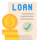**

**Loans play a big role in today's world. People take loans to pay for education, living costs, houses, cars, and many other important needs. Banks also make a major part of their profit by giving out loans.**

**However, not everyone who applies for a loan gets approved. Banks have to carefully check if a person is eligible before approving their request. They consider many factors like the applicant’s income, job stability, credit history, gender, marital status, and more.**

**In this project, I aim to build a machine learning model that can predict whether a loan application will be approved or not. The model will use the applicant’s background information to make smart predictions, helping banks make faster and better decisions.**


##### **DATASET DESCRIPTION**
* The dataset was downloaded from kaggle. where to find it link. **[Loan Prediction Problem Dataset (Kaggle.com)](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)**
* The dataset contains information about laon applications , including various attributes related to applicants ,the dataset contains 13 features



#### **Key Factors Influencing Loan Approval**

- **ApplicantIncome**:  
  Higher applicant income generally suggests a better ability to repay a loan.  
  However, extremely low or extremely high incomes can be a concern.  
  Lenders often set income thresholds to assess loan eligibility.

- **CoapplicantIncome**:  
  If the applicant has a coapplicant (like a spouse or parent), their income can boost the total household income.  
  A higher combined income can improve repayment capacity, positively influencing loan approval chances.

- **LoanAmount**:  
  The amount of loan requested is critical.  
  Lenders assess whether the loan amount is reasonable compared to the applicant’s income and financial situation.

- **Loan_Amount_Term**:  
  The loan term (duration) impacts monthly repayment amounts.  
  - Shorter terms might suggest a quicker ability to repay the loan.  
  - Longer terms may result in lower monthly payments but higher total interest paid over time.

- **Credit_History**:  
  This is one of the most important factors.  
  A strong credit history (such as a score of 1.0) usually increases the chances of loan approval.  
  Lenders rely heavily on credit scores to judge the risk of lending.

- **Property_Area**:  
  The location of the property plays a role in loan decisions.  
  Urban, semi-urban, and rural areas might carry different risk profiles.  
  Banks may have specific rules based on the property's area and its expected market value.


In [1]:
## importing necessary libraries 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats  
import statsmodels.api as sm  
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",30)
from sklearn.model_selection import train_test_split,cross_val_predict ,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier ,XGBRFClassifier 
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,f1_score,recall_score,precision_score,ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
sns.set(style="darkgrid",palette="deep")
plt.rcParams['figure.dpi'] = 300
import shap
import pingouin as pg
from imblearn.over_sampling import SMOTE
np.random.seed(42)
from imblearn.pipeline import Pipeline as ImbPipeline
from lazypredict.Supervised import LazyClassifier
import pickle 
from statsmodels.stats.anova import anova_lm
pd.options.display.float_format = lambda x: f'{x:.4f}'
from joblib import load,dump

#### **loading the data**

In [2]:
##  extract the data  
loan_approval_df = pd.read_csv(r"D:\datasets\Loan_Approval_data\train_u6lujuX_CVtuZ9i.csv")
## showing the first five items 
loan_approval_df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849             0.0000         NaN          360.0000   
1             4583          1508.0000    128.0000          360.0000   
2             3000             0.0000     66.0000          360.0000   
3             2583          2358.0000    120.0000          360.0000   
4             6000             0.0000    141.0000          360.0000   

   Credit_History Property_Area Loan_Status  
0          1.0000         Urban           Y  
1          1.0000         Rural           N  
2          1.0000         Urban           Y  
3          1.0000         Urban           Y  
4          1.0000         Urban           Y

#####  **SECTION A:** **DATA VALIDATION AND CLEANING**

In [3]:
## checking for the shape of the data  
loan_approval_df.shape

(614, 13)

In [4]:
## checking for general information  
loan_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
## checking the column names  
loan_approval_df.columns.to_frame().reset_index(drop=True).rename({0:"Column Names"},axis="columns")

Column Names
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6     ApplicantIncome
7   CoapplicantIncome
8          LoanAmount
9    Loan_Amount_Term
10     Credit_History
11      Property_Area
12        Loan_Status

In [6]:
## checking for missing values  
loan_approval_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## checking for the percentage of missing values  
round(loan_approval_df.isnull().mean()*100,3)

Loan_ID             0.0000
Gender              2.1170
Married             0.4890
Dependents          2.4430
Education           0.0000
Self_Employed       5.2120
ApplicantIncome     0.0000
CoapplicantIncome   0.0000
LoanAmount          3.5830
Loan_Amount_Term    2.2800
Credit_History      8.1430
Property_Area       0.0000
Loan_Status         0.0000
dtype: float64

In [8]:
## checking for duplicates  
loan_approval_df.duplicated().sum()

0

In [9]:
##  checking for descriptive stats   
loan_approval_df.describe(include="number").T

count      mean       std      min       25%       50%  \
ApplicantIncome   614.0000 5403.4593 6109.0417 150.0000 2877.5000 3812.5000   
CoapplicantIncome 614.0000 1621.2458 2926.2484   0.0000    0.0000 1188.5000   
LoanAmount        592.0000  146.4122   85.5873   9.0000  100.0000  128.0000   
Loan_Amount_Term  600.0000  342.0000   65.1204  12.0000  360.0000  360.0000   
Credit_History    564.0000    0.8422    0.3649   0.0000    1.0000    1.0000   

                        75%        max  
ApplicantIncome   5795.0000 81000.0000  
CoapplicantIncome 2297.2500 41667.0000  
LoanAmount         168.0000   700.0000  
Loan_Amount_Term   360.0000   480.0000  
Credit_History       1.0000     1.0000

In [10]:
## printing the unique values in the categorical columns  
for category in loan_approval_df.describe(include="object").columns:  
    if category != "Loan_ID":  
        print(f"Unique values in {category}: {loan_approval_df[category].unique()}")

Unique values in Gender: ['Male' 'Female' nan]
Unique values in Married: ['No' 'Yes' nan]
Unique values in Dependents: ['0' '1' '2' '3+' nan]
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Self_Employed: ['No' 'Yes' nan]
Unique values in Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Status: ['Y' 'N']


##### **HANDLING MISSING VALUES**

In [11]:
## imputting numerical missing values with the median and the categirical missing values with the mode  
## imputting Credit History with the median
loan_approval_df['Credit_History']= loan_approval_df['Credit_History'].fillna(loan_approval_df['Credit_History'].median())
## imputtting LoanAmount with the median
loan_approval_df['LoanAmount'] = loan_approval_df['LoanAmount'].fillna(loan_approval_df['LoanAmount'].median())
## imputting the Loan Amount term with  median  
loan_approval_df['Loan_Amount_Term'] = loan_approval_df['Loan_Amount_Term'].fillna(loan_approval_df['Loan_Amount_Term'].median())
## imputting Gender with the mode  
loan_approval_df['Gender'] = loan_approval_df['Gender'].fillna(loan_approval_df['Gender'].mode()[0])
## imputing the Marrieed column  
loan_approval_df['Married'] = loan_approval_df['Married'].fillna(loan_approval_df['Married'].mode()[0])
## imputing Dependents  
loan_approval_df['Dependents'] = loan_approval_df['Dependents'].fillna(loan_approval_df['Dependents'].mode()[0])
## imputing self Employed
loan_approval_df['Self_Employed'] = loan_approval_df['Self_Employed'].fillna(loan_approval_df['Self_Employed'].mode()[0])

In [12]:
## checking for missing values again  
loan_approval_df.isnull().mean()*100

Loan_ID             0.0000
Gender              0.0000
Married             0.0000
Dependents          0.0000
Education           0.0000
Self_Employed       0.0000
ApplicantIncome     0.0000
CoapplicantIncome   0.0000
LoanAmount          0.0000
Loan_Amount_Term    0.0000
Credit_History      0.0000
Property_Area       0.0000
Loan_Status         0.0000
dtype: float64

In [13]:
## printing the unique values in the categorical columns  
for category in loan_approval_df.describe(include="object").columns:  
    if category != "Loan_ID":  
        print(f"Unique values in {category}: {loan_approval_df[category].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Married: ['No' 'Yes']
Unique values in Dependents: ['0' '1' '2' '3+']
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Self_Employed: ['No' 'Yes']
Unique values in Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Status: ['Y' 'N']


In [14]:
## dropping the Loan ID column 
loan_approval_df.drop(columns='Loan_ID',inplace=True)


In [15]:
## checking the dataset  
loan_approval_df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             0.0000    128.0000          360.0000          1.0000   
1          1508.0000    128.0000          360.0000          1.0000   
2             0.0000     66.0000          360.0000          1.0000   
3          2358.0000    120.0000          360.0000          1.0000   
4             0.0000    141.0000          360.0000          1.0000   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

### **SECTION B**: **EXPLORATORY DATA ANALYSIS**

* **LOAN STATUS**

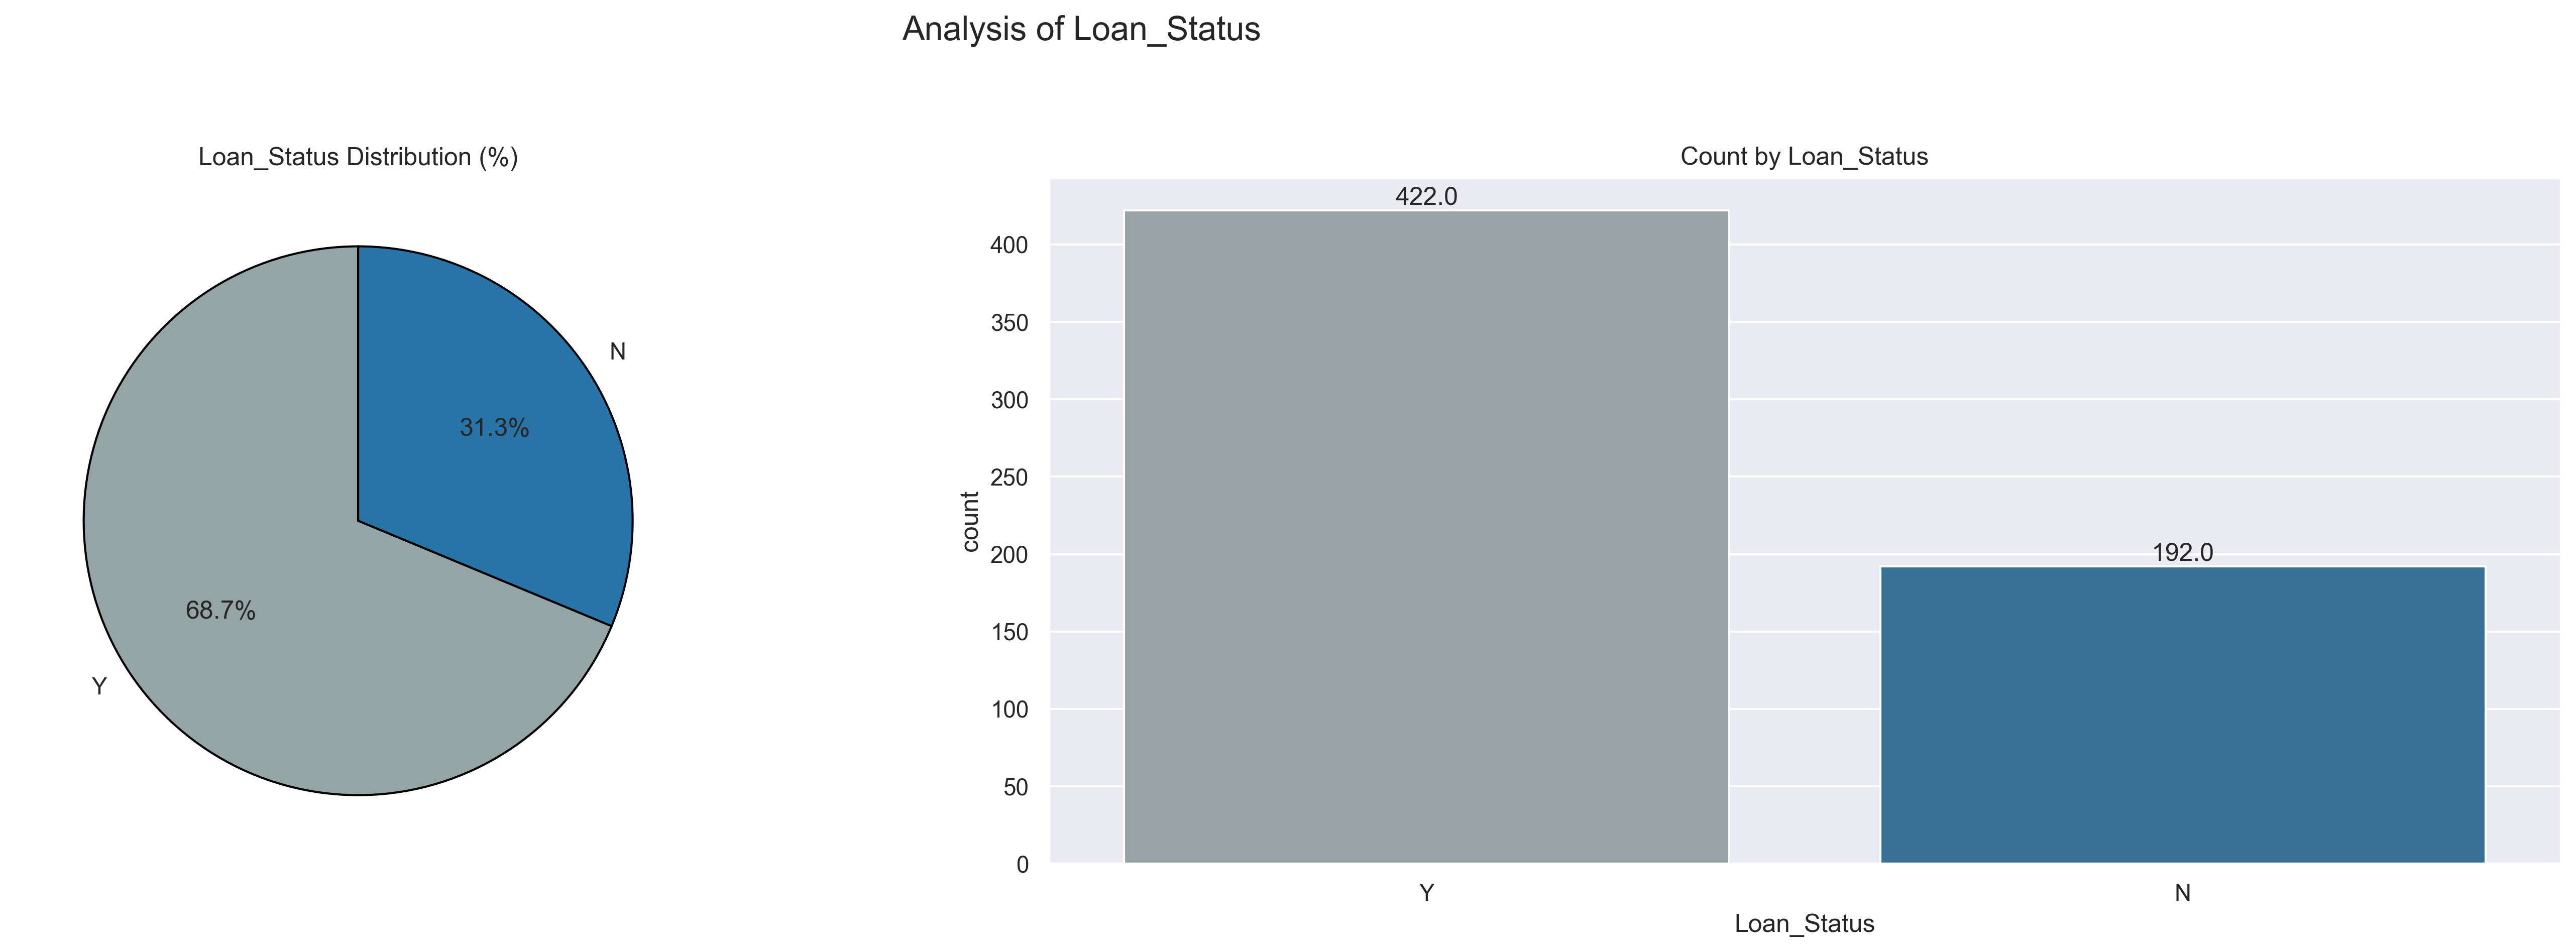

In [16]:
def plot_loan_distribution(data, variable, figsize=(20, 6)):
    
    # Prepare data
    value_counts = data[variable].value_counts()
    percentages = value_counts / value_counts.sum() * 100
    
    # Define colors (using a colormap for flexibility)
    colors = ["#95A5A6","#2874a6"]
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # 1. Pie Chart
    axes[0].pie(
        percentages,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}, 
    
    )
    axes[0].set_title(f'{variable} Distribution (%)')
    
    # 2. Countplot
    sns.countplot(
        x=variable,
        data=data,
        palette=colors,
        ax=axes[1],
        order=value_counts.index  # Maintain same order as pie chart
    )
    
    # Add value labels on bars
    for bar in axes[1].patches:
        axes[1].text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.5,
            f'{bar.get_height()}',
            ha='center',
            va='bottom'
        )
    
    # Formatting
    axes[1].set_title(f'Count by {variable}')
    
    plt.suptitle(f'Analysis of {variable}', y=1.05, fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usages:
plot_loan_distribution(loan_approval_df, 'Loan_Status') 


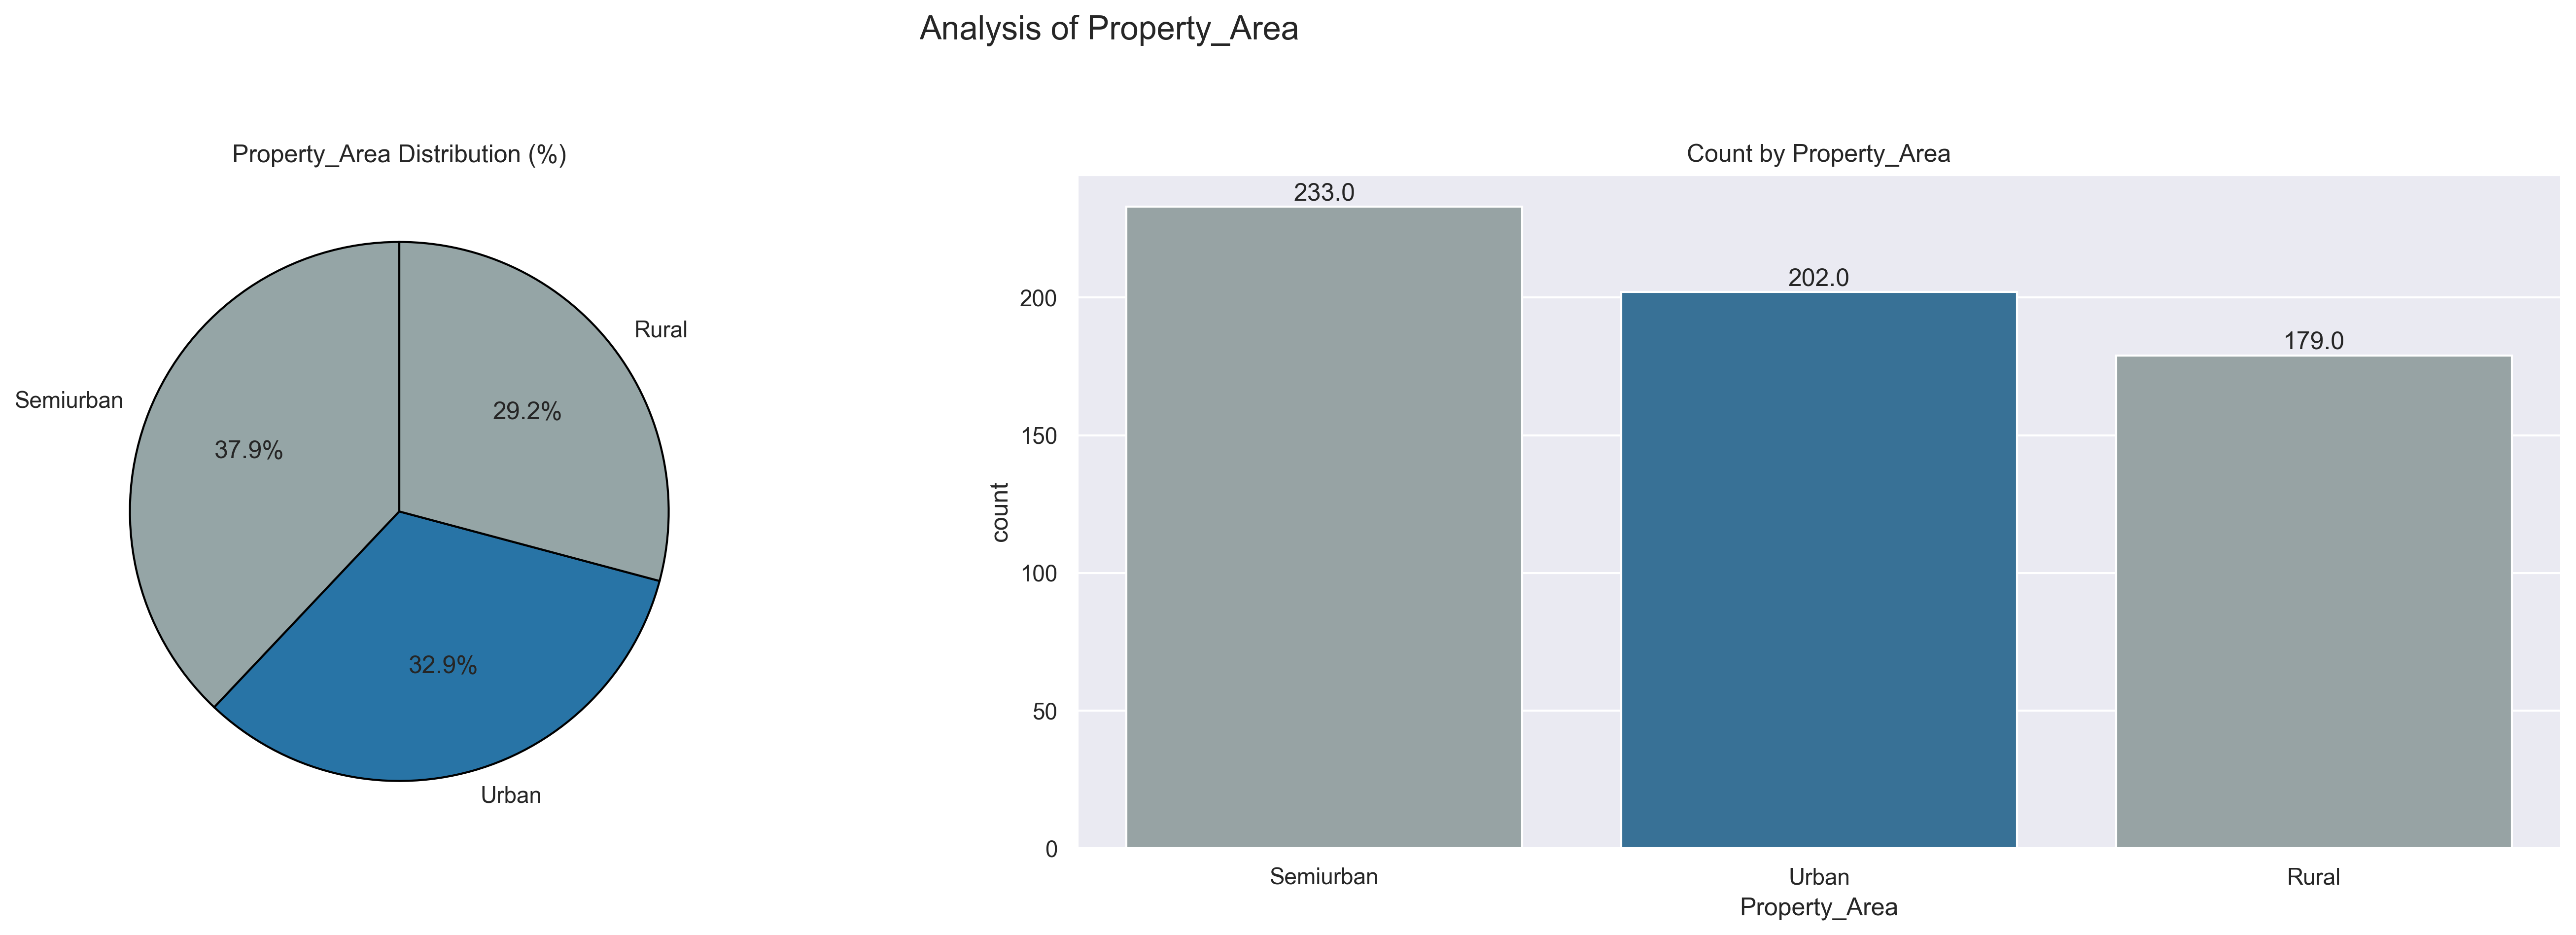

In [17]:
plot_loan_distribution(loan_approval_df, 'Property_Area')

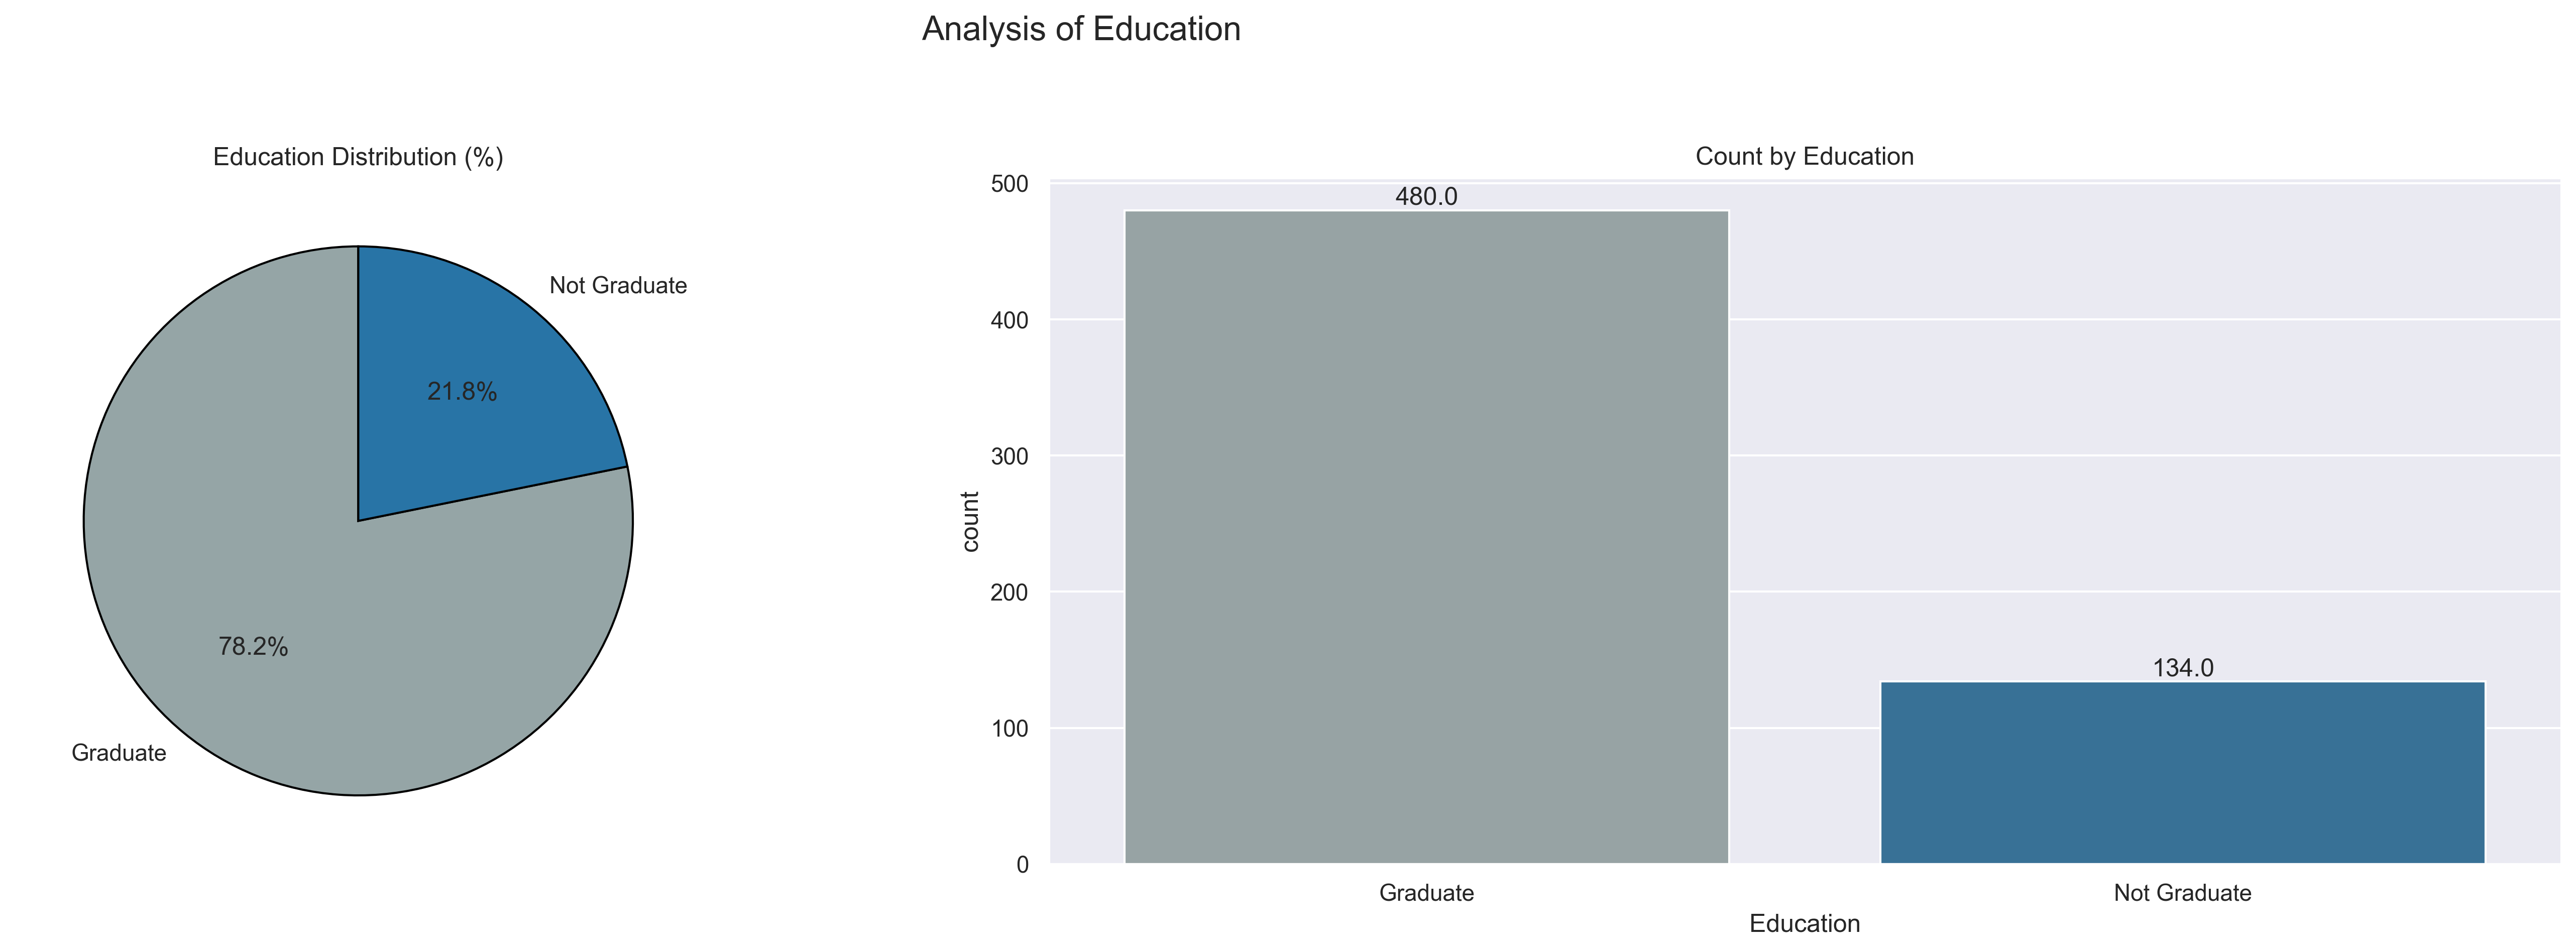

In [18]:
plot_loan_distribution(loan_approval_df, 'Education')

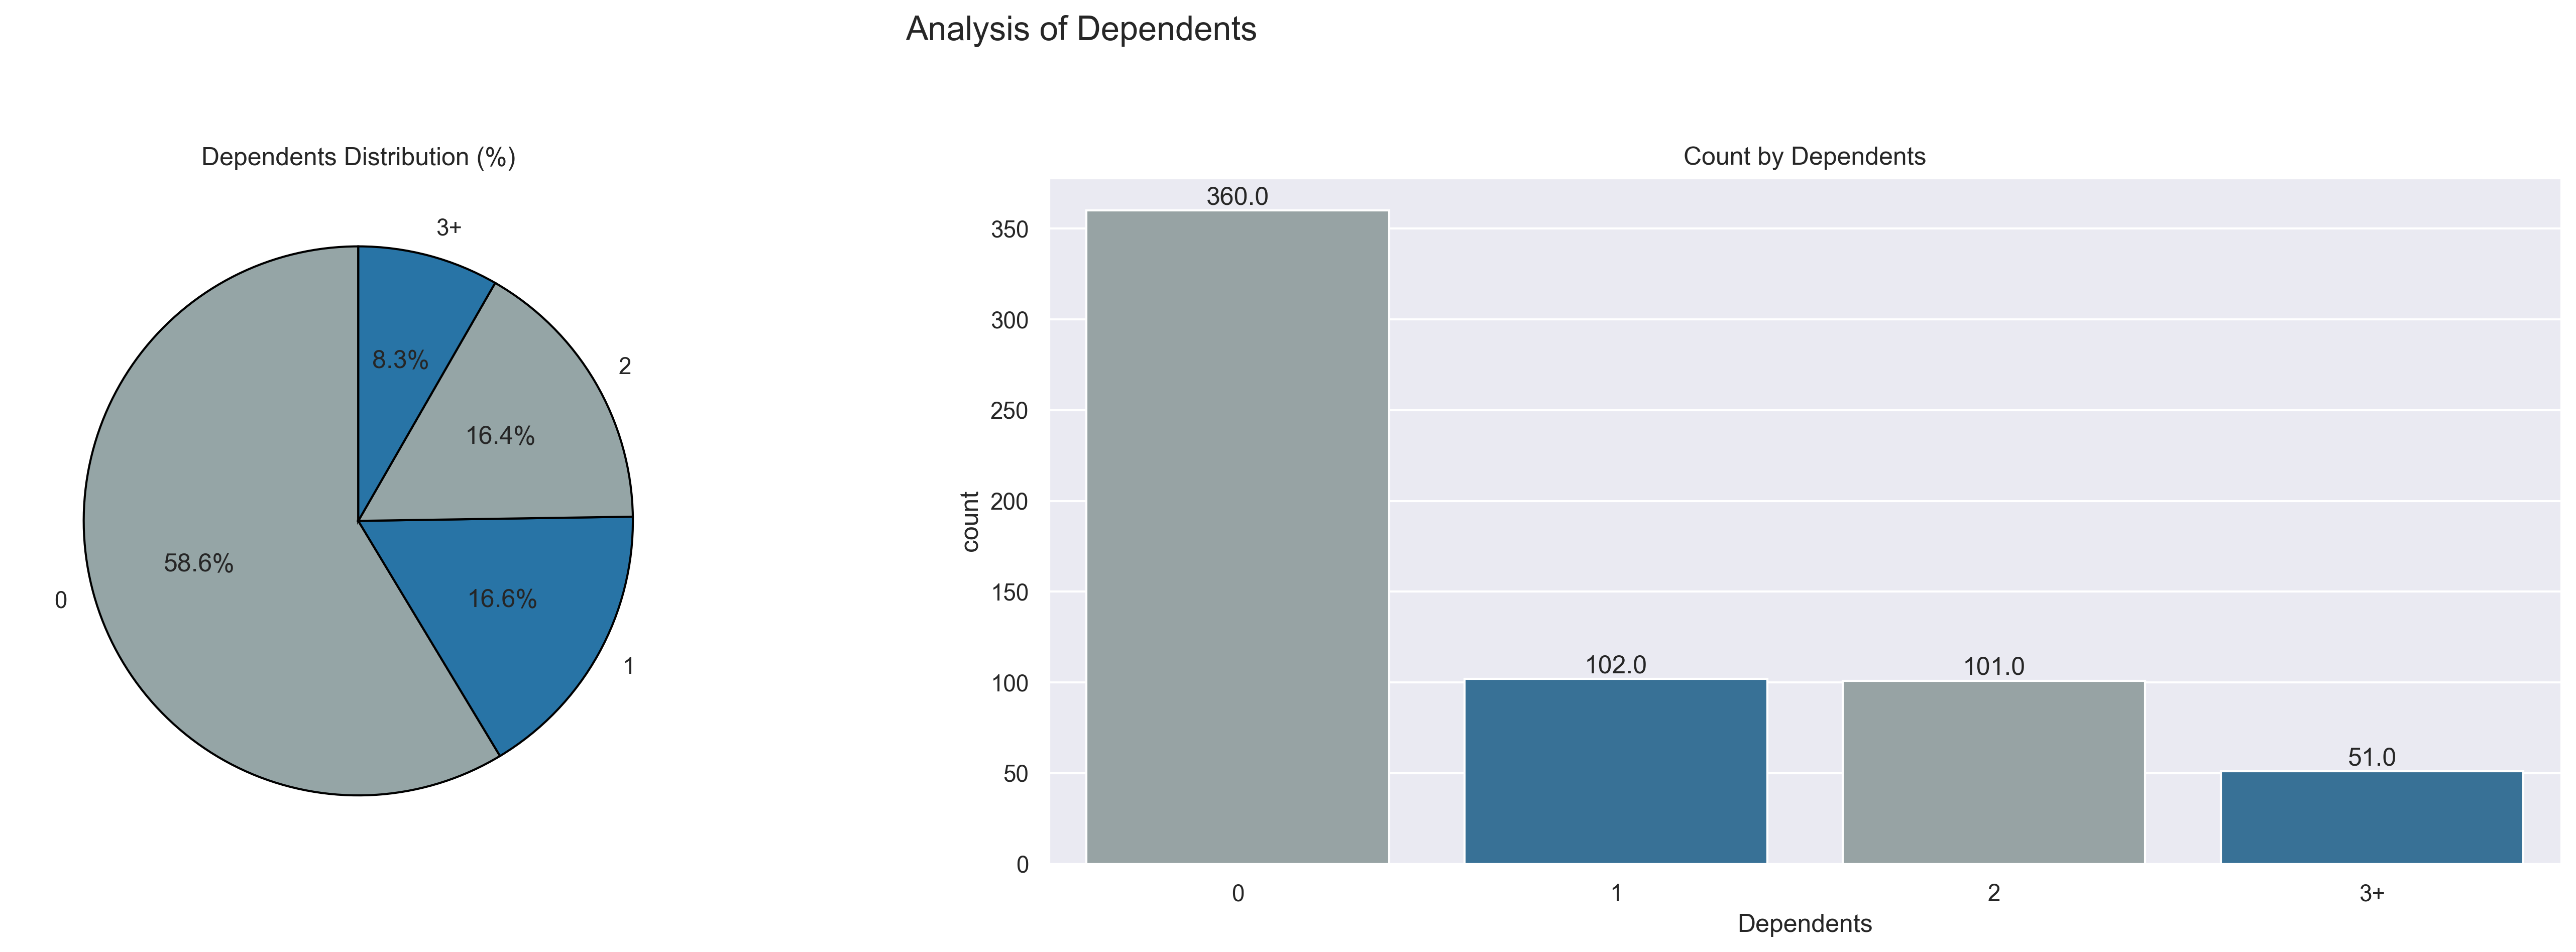

In [19]:
plot_loan_distribution(loan_approval_df, 'Dependents')

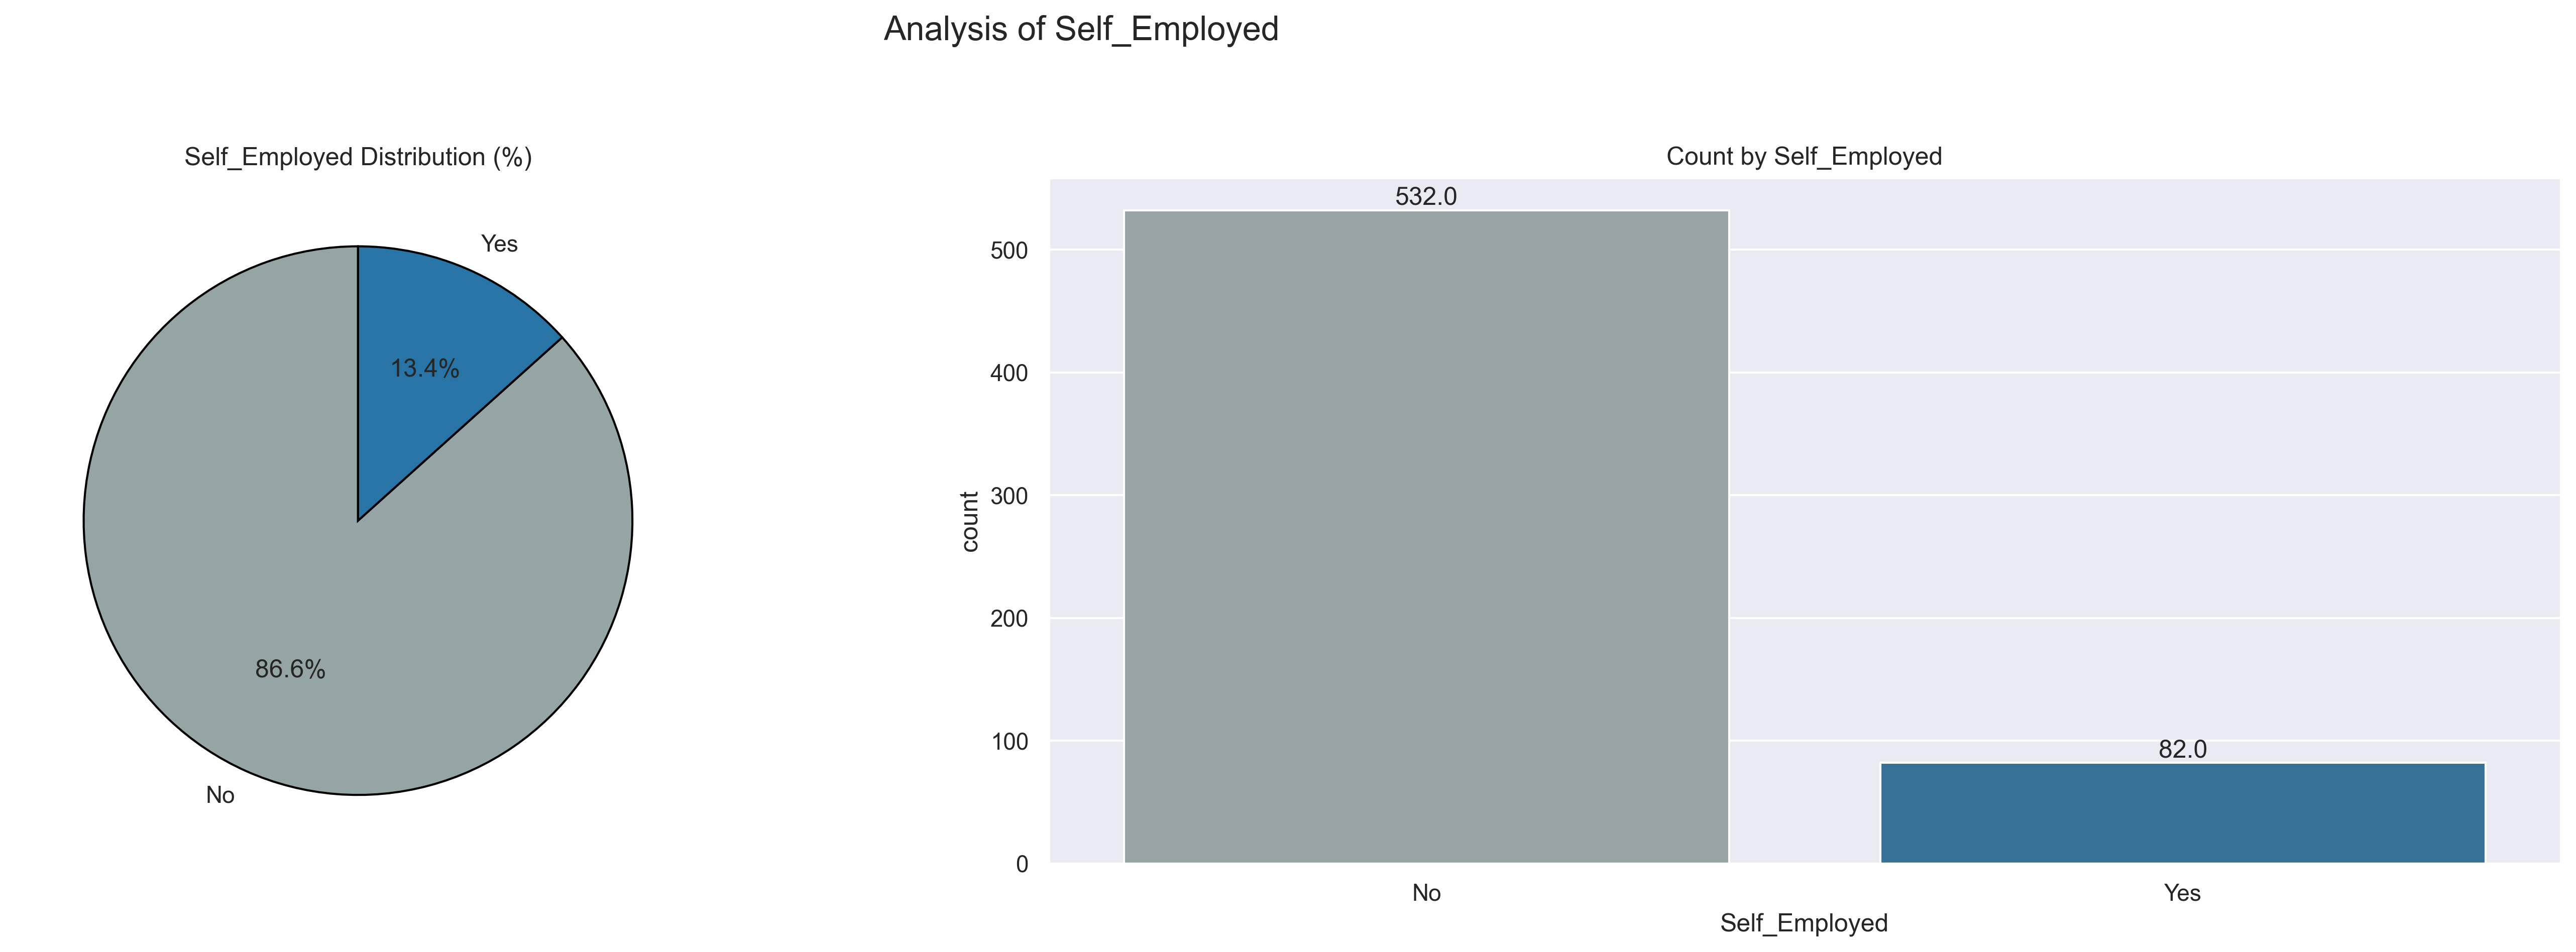

In [20]:
plot_loan_distribution(loan_approval_df, 'Self_Employed')

* **Loan Amount**

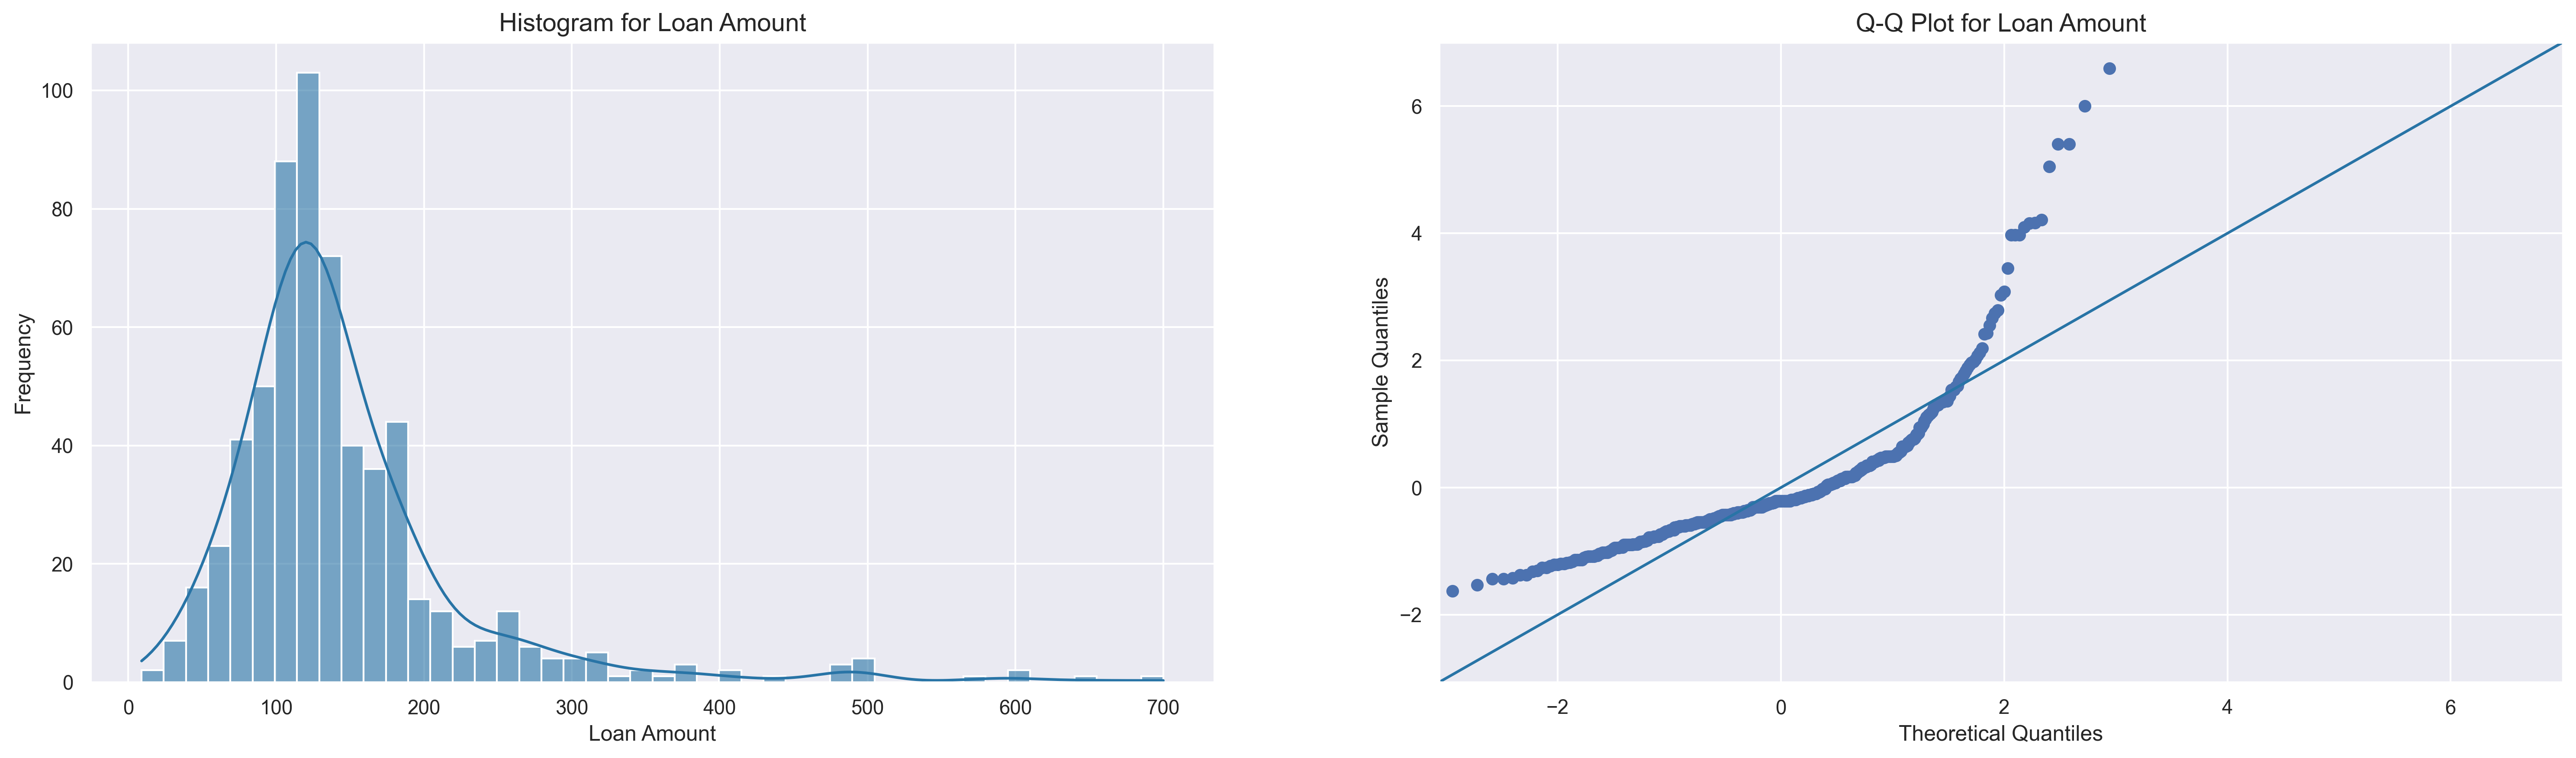

In [21]:
# Create figure and axes with better size
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Histogram with KDE and clearer formatting
sns.histplot(loan_approval_df['LoanAmount'], kde=True, bins="auto", color='#2874a6', ax=ax[0],alpha=0.6)
ax[0].set_title("Histogram for Loan Amount", fontsize=14)
ax[0].set_xlabel("Loan Amount", fontsize=12)
ax[0].set_ylabel("Frequency", fontsize=12)


# Q-Q Plot with proper titles and grid
sm.qqplot(data=loan_approval_df['LoanAmount'], fit=True, line='45', ax=ax[1])
ax[1].set_title("Q-Q Plot for Loan Amount", fontsize=14)
ax[1].grid(True)
for line in ax[1].get_lines():
    line.set_color('#2874a6')
# Tight layout for spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  #
plt.show()

* **Applicant Income**

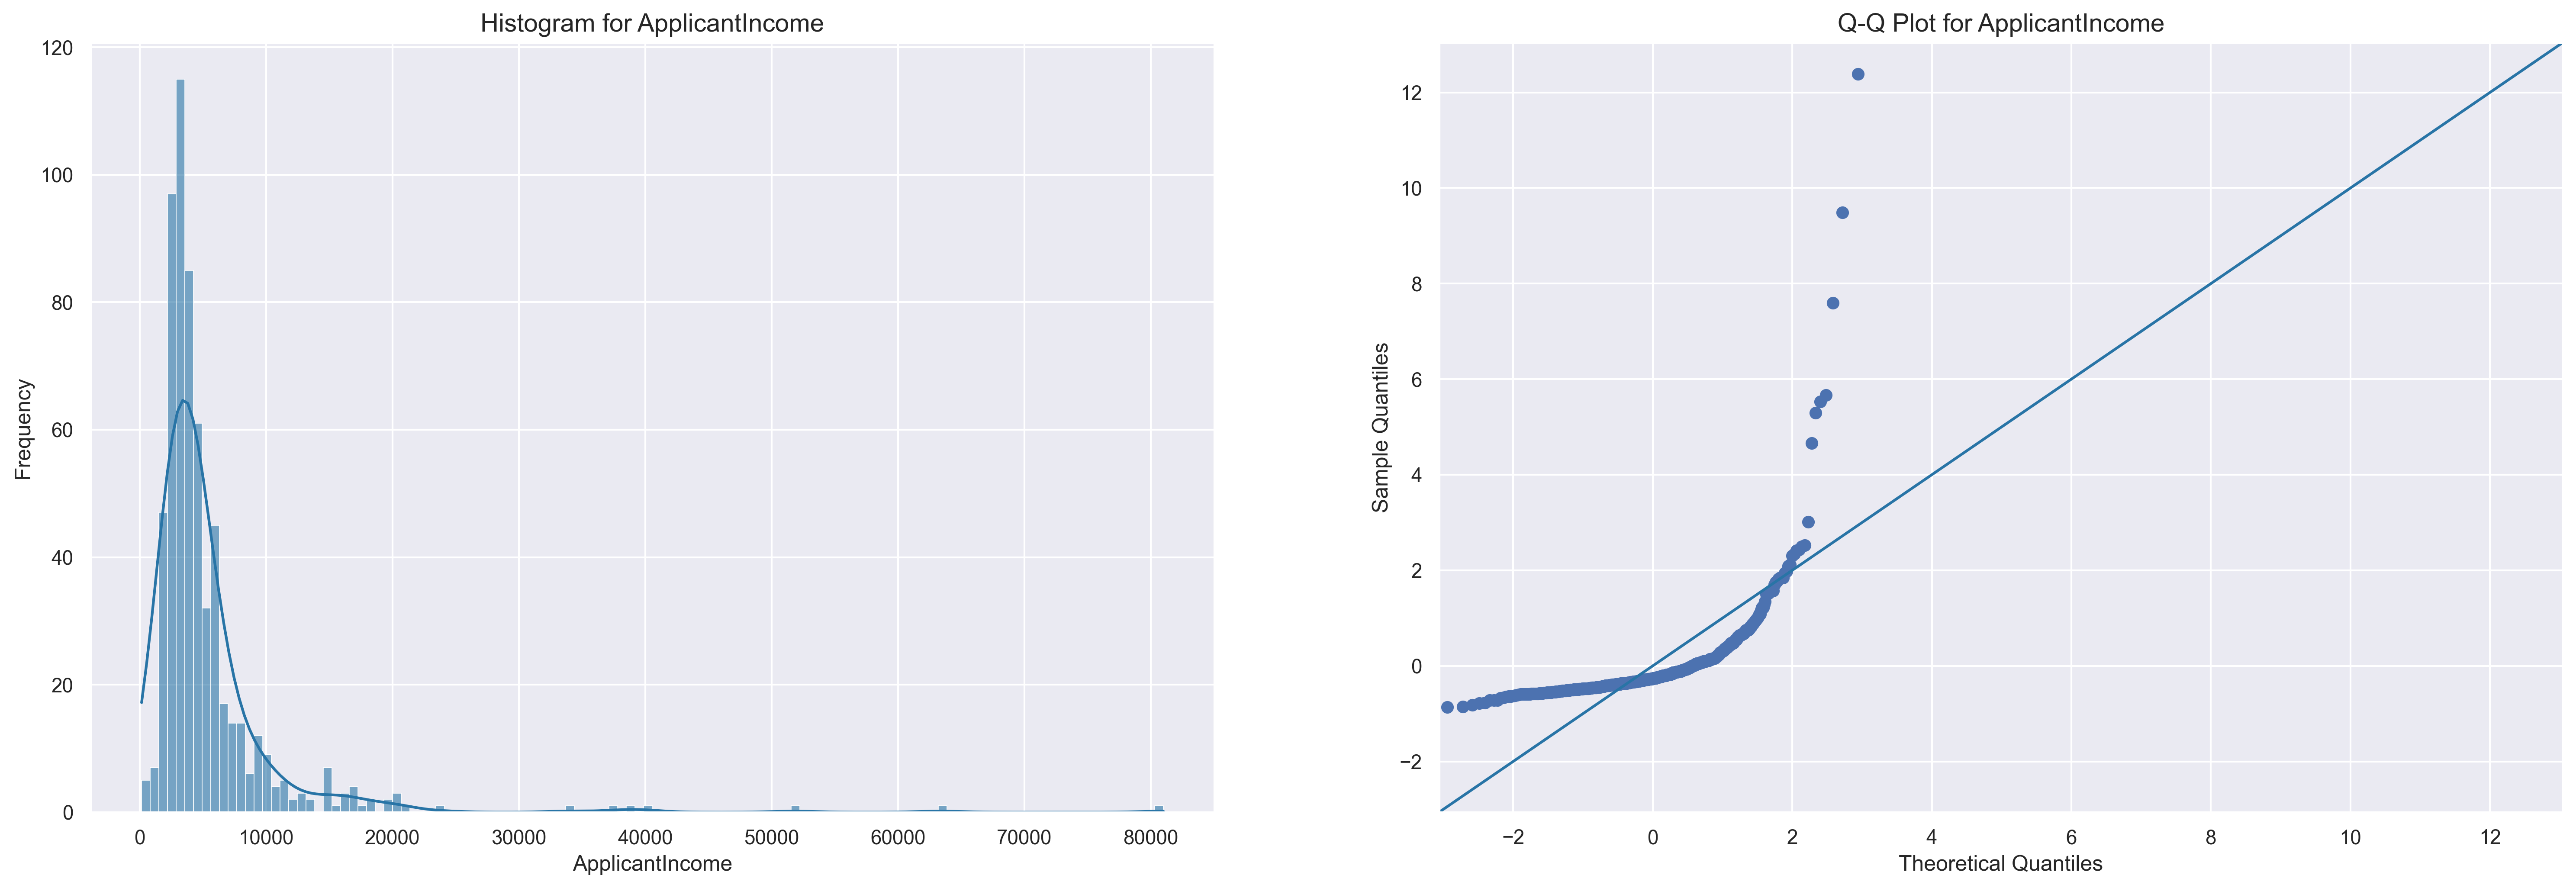

In [22]:
# Create figure and axes with better size
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Histogram with KDE and clearer formatting
sns.histplot(loan_approval_df['ApplicantIncome'], kde=True, bins="auto", color='#2874a6', ax=ax[0],alpha=0.6)
ax[0].set_title("Histogram for ApplicantIncome", fontsize=14)
ax[0].set_xlabel("ApplicantIncome", fontsize=12)
ax[0].set_ylabel("Frequency", fontsize=12)


# Q-Q Plot with proper titles and grid
sm.qqplot(data=loan_approval_df['ApplicantIncome'], fit=True, line='45', ax=ax[1])
ax[1].set_title("Q-Q Plot for ApplicantIncome", fontsize=14)
ax[1].grid(True)
for line in ax[1].get_lines():
    line.set_color('#2874a6')
# Tight layout for spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.2) 
plt.show()

* **CoapplicantIncome**

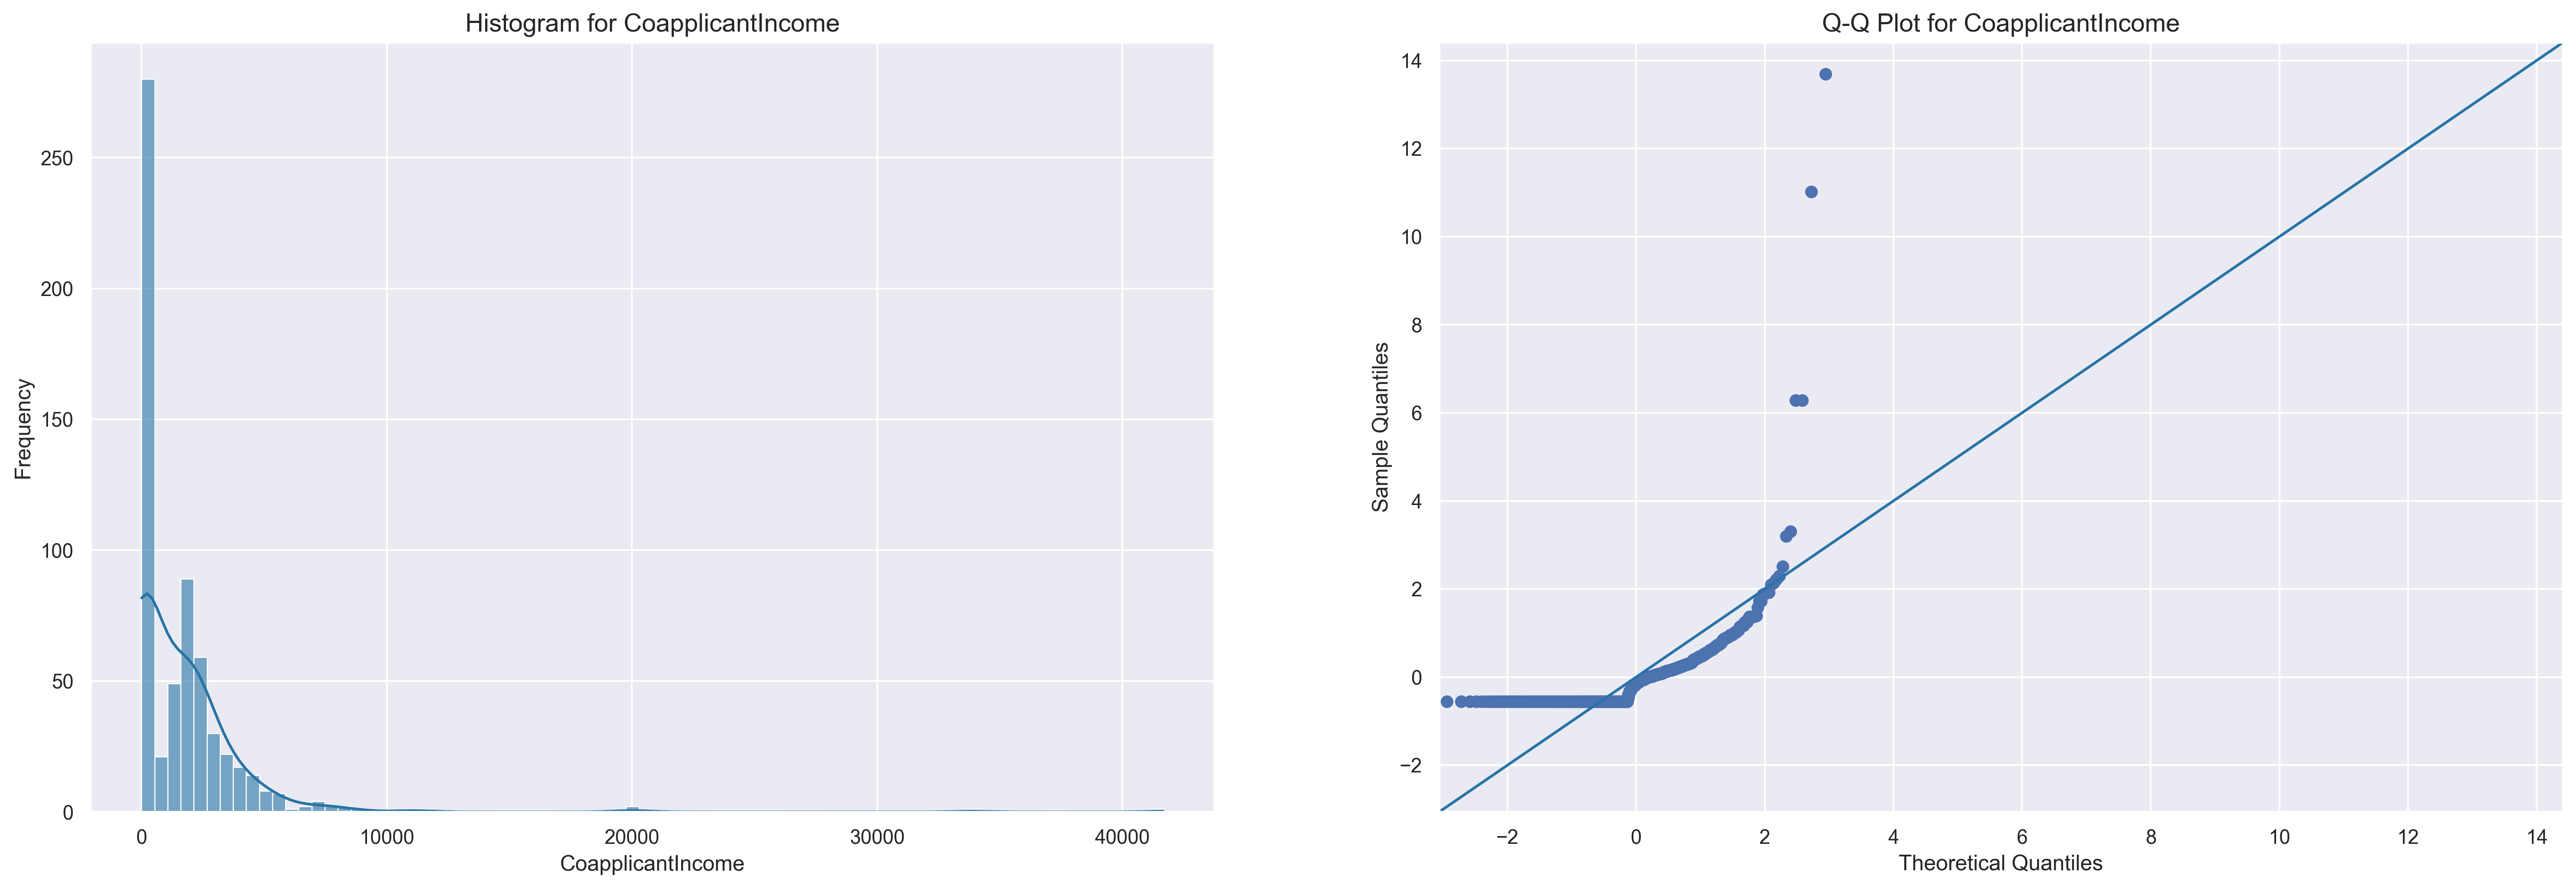

In [23]:
# Create figure and axes with better size
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Histogram with KDE and clearer formatting
sns.histplot(loan_approval_df['CoapplicantIncome'], kde=True, bins="auto", color='#2874a6', ax=ax[0],alpha=0.6)
ax[0].set_title("Histogram for CoapplicantIncome", fontsize=14)
ax[0].set_xlabel("CoapplicantIncome", fontsize=12)
ax[0].set_ylabel("Frequency", fontsize=12)


# Q-Q Plot with proper titles and grid
sm.qqplot(data=loan_approval_df['CoapplicantIncome'], fit=True, line='45', ax=ax[1])
ax[1].set_title("Q-Q Plot for CoapplicantIncome", fontsize=14)
ax[1].grid(True)
for line in ax[1].get_lines():
    line.set_color('#2874a6')
# Tight layout for spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

#### **NUMERICAL VS CATEGORICAL DISTRIBUTION**

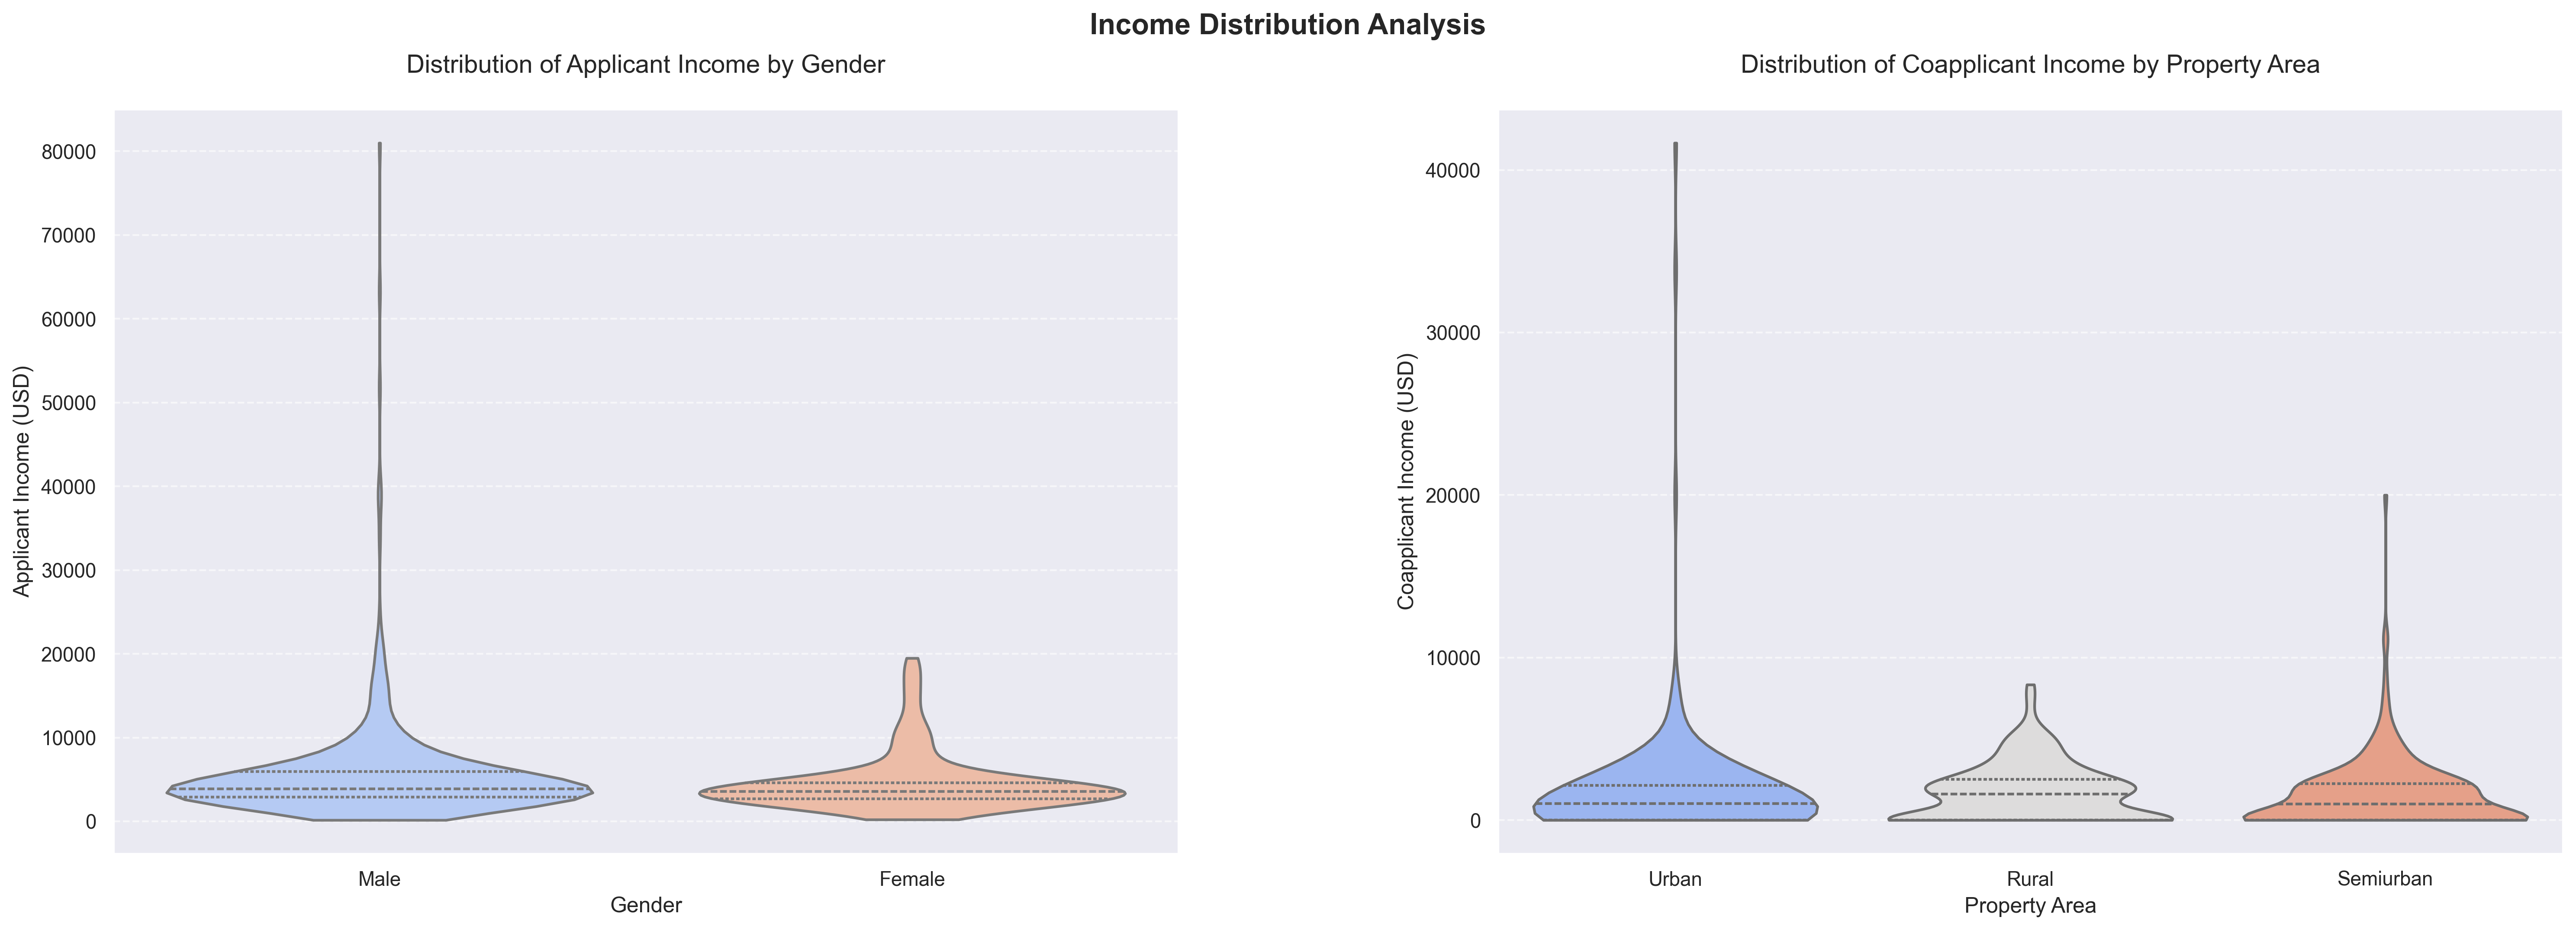

In [24]:


# Create subplots with proper axes handling
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot 1: Applicant Income by Gender
sns.violinplot(
    x='Gender',
    y='ApplicantIncome',
    data=loan_approval_df,
    ax=axes[0],
    palette="coolwarm",
    inner="quartile",  # Show quartile lines inside violins
    cut=0,            # Don't trim violin tails
    linewidth=1.5
)
axes[0].set_title('Distribution of Applicant Income by Gender', pad=20, fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Applicant Income (USD)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot 2: Coapplicant Income by Property Area
sns.violinplot(
    x='Property_Area',
    y='CoapplicantIncome',
    data=loan_approval_df,
    ax=axes[1],
    palette="coolwarm",
    inner="quartile",
    cut=0,
    linewidth=1.5
)
axes[1].set_title('Distribution of Coapplicant Income by Property Area', pad=20, fontsize=14)
axes[1].set_xlabel('Property Area', fontsize=12)
axes[1].set_ylabel('Coapplicant Income (USD)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Increase spacing between plots

# Add overall figure title
fig.suptitle('Income Distribution Analysis', y=1.02, fontsize=16, fontweight='bold')

plt.show()

#### **Categorical Variables**

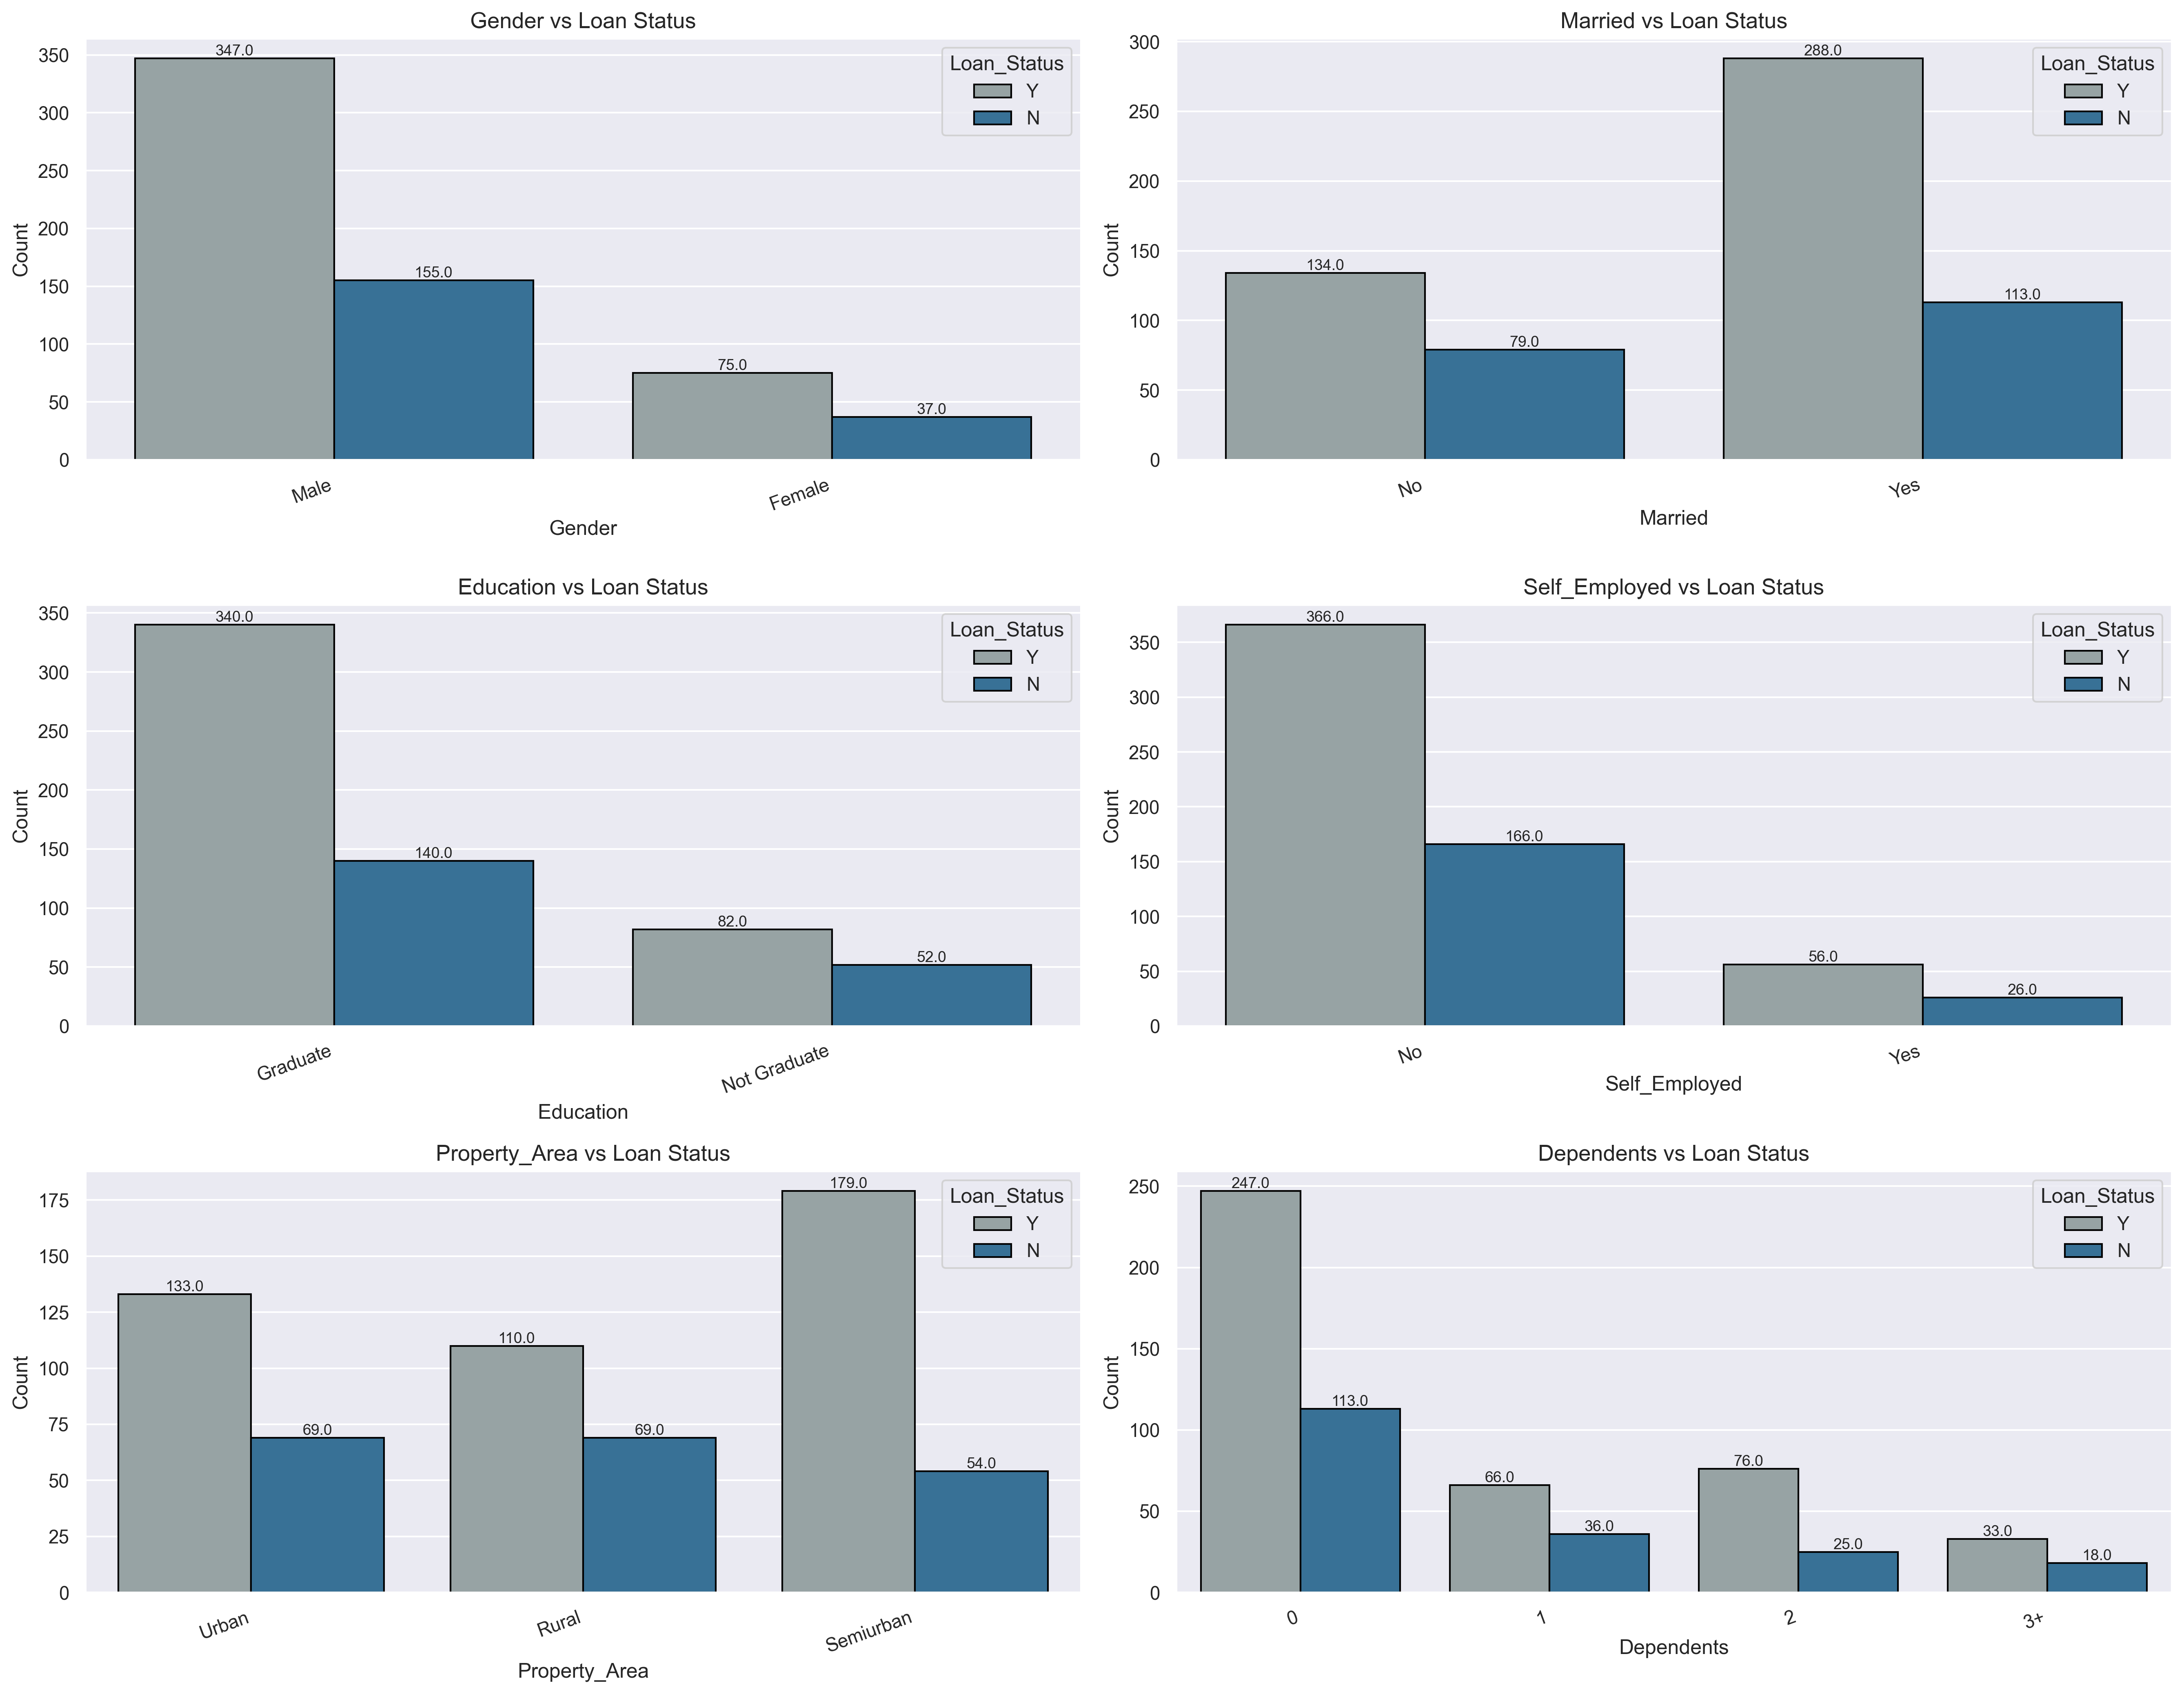

In [25]:



l1 = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
colors = ['#95A5A6', '#2874a6']

# Set plot style
sns.set(style='darkgrid')

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 14))  # Changed layout to 3x2 for 6 variables
axes = axes.flatten()  # Flatten axes array for easier iteration

# Loop through features
for i, col in enumerate(l1):
    ax = axes[i]
    sns.countplot(x=col, data=loan_approval_df, hue='Loan_Status',
                  palette=colors, edgecolor='black', ax=ax)

    # Rotate x-tick labels if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

    # Add value annotations
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9)

    ax.set_title(f'{col} vs Loan Status', fontsize=13)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Remove any unused subplots
for j in range(len(l1), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### **Correlation Analysis**

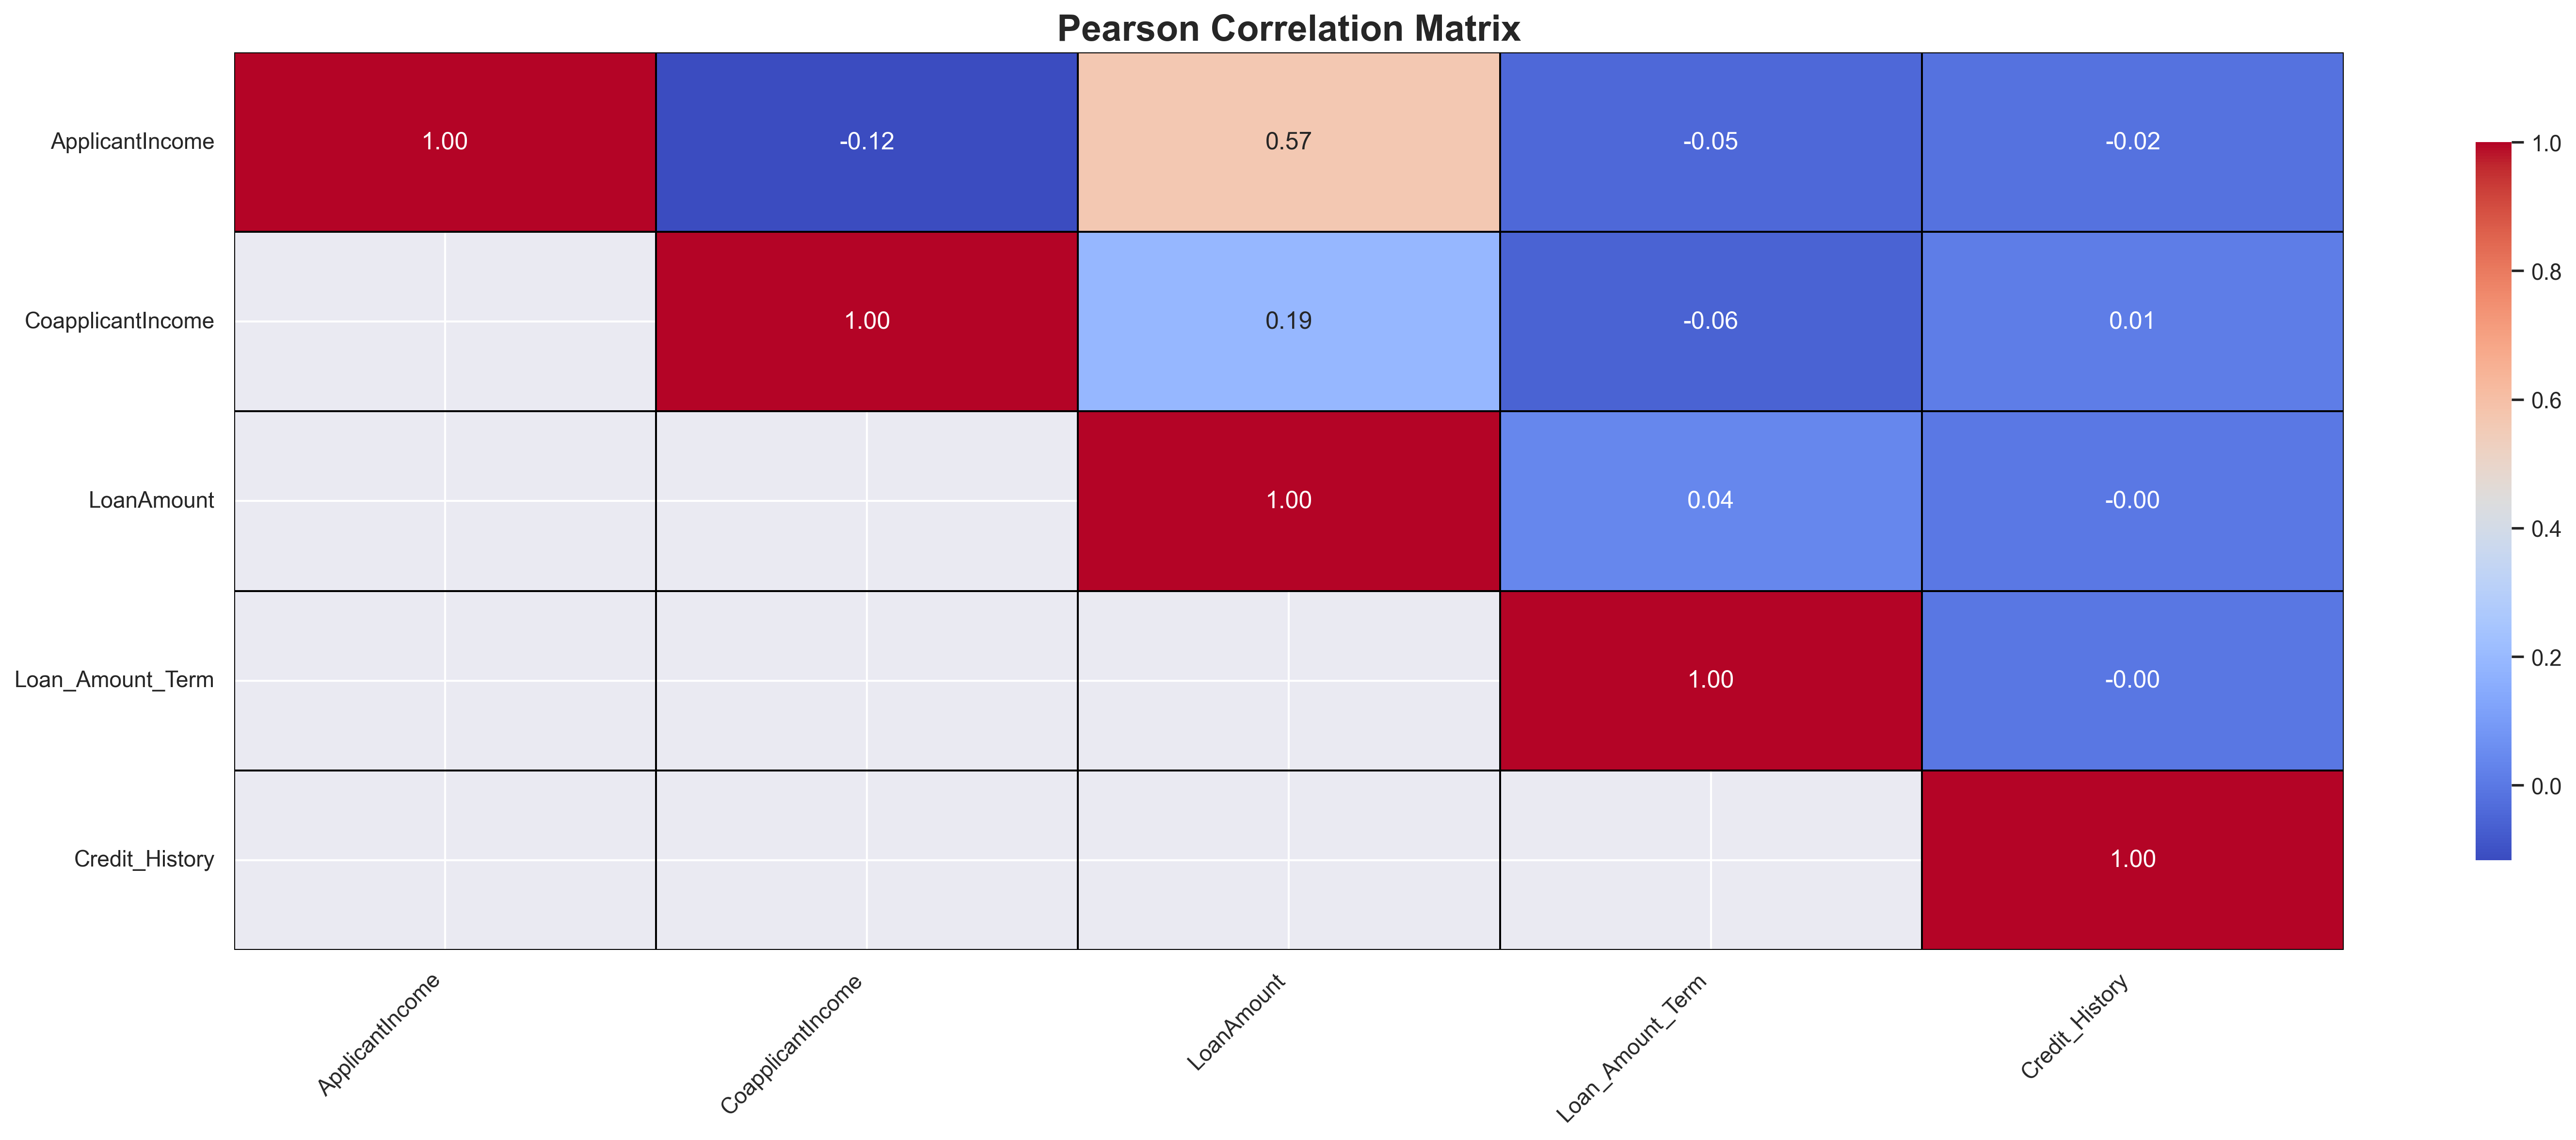

In [26]:
# Correlation matrix
corr = loan_approval_df.corr(method="pearson", numeric_only=True)

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool),k=-1)

# Set figure size large enough for full readability
plt.figure(figsize=(20, 8))

# Draw the heatmap with the mask
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    square=False,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'shrink': 0.8}
)

# Title and formatting
plt.title('Pearson Correlation Matrix', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### **CREDIT HISTORY**
* How credit History Interacts with the target

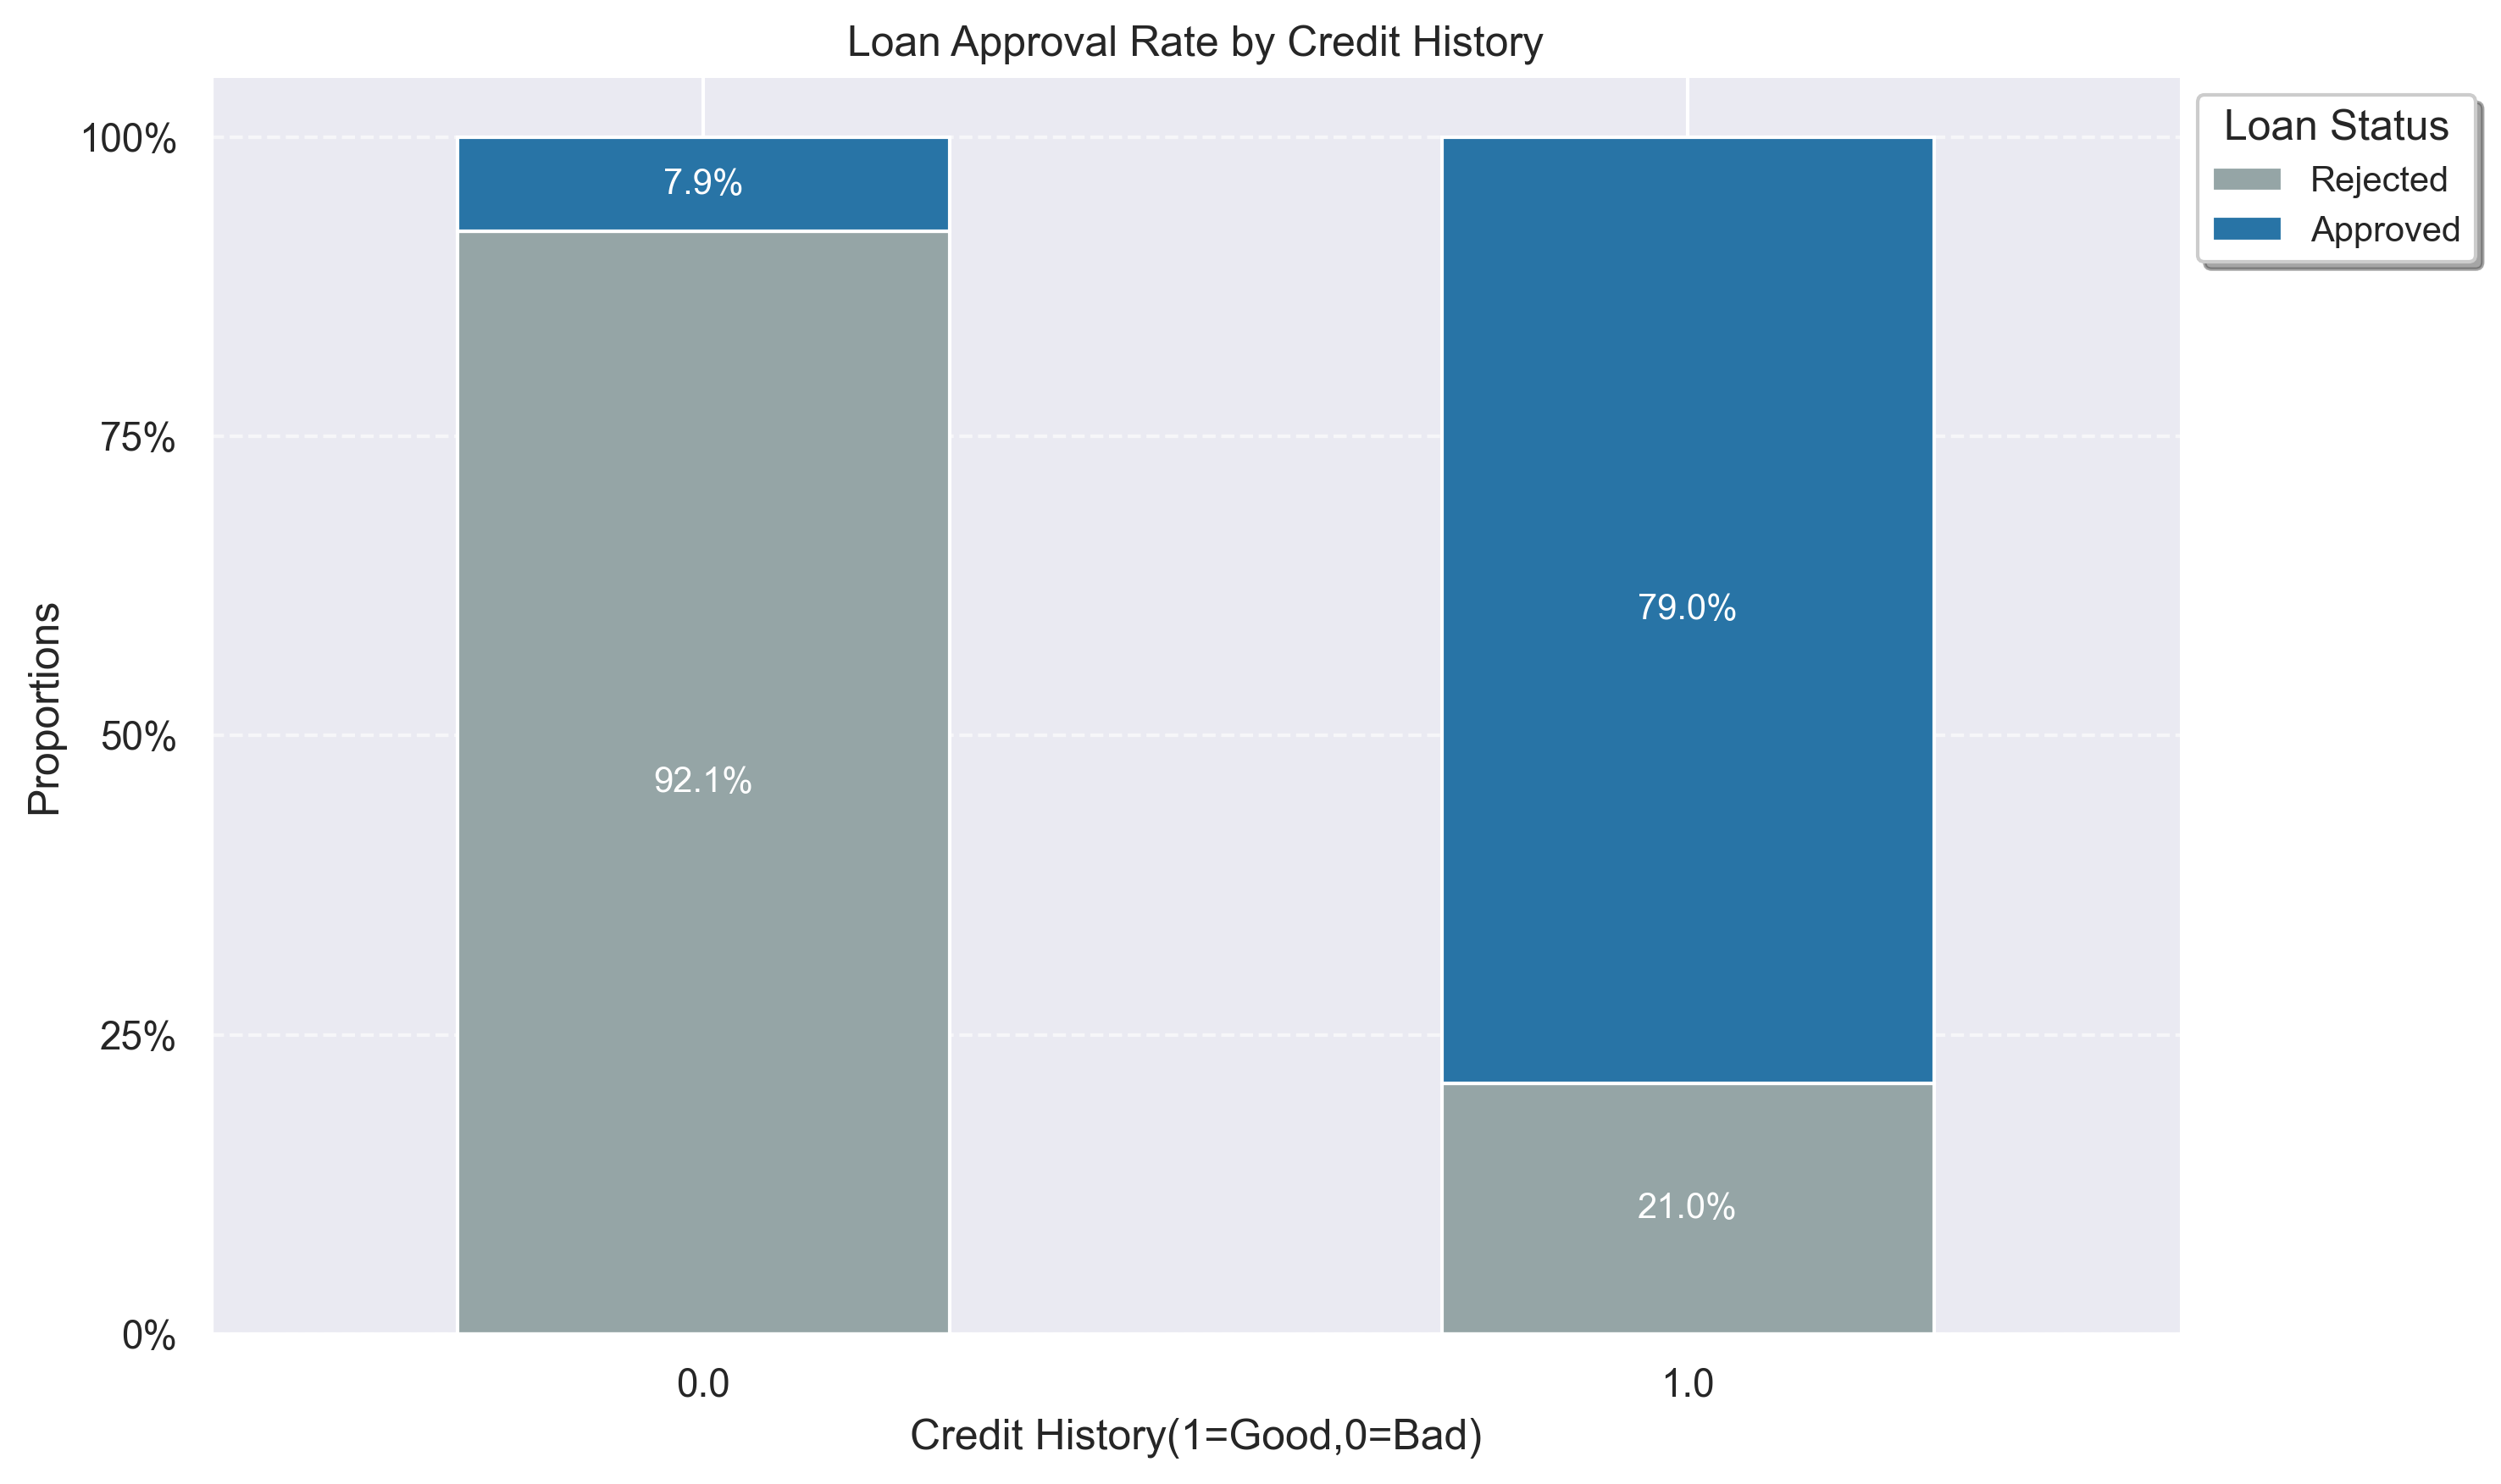

In [27]:
## creating contigency tables  
credit_history_ct = pd.crosstab(loan_approval_df['Credit_History'],loan_approval_df['Loan_Status'])
## Normalizing the credit History  
credit_history_normalized = credit_history_ct.div(credit_history_ct.sum(1),axis=0)
## plotting  
ax = credit_history_normalized.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10,6), 
    title="Loan Approval Rate by Credit History", 
    color=["#95A5A6","#2874a6"]
)
## Adding the proportions  
for p in ax.patches:  
    height = p.get_height()
    if height==0:  
        continue 
    labels = f"{height*100:.1f}%"
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y=p.get_y() + p.get_height()/2, 
        s=labels, 
        ha="center", 
        va="center", 
        fontsize=10, 
        color="white"
    )

## Improving the legend
plt.legend( 
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    loc='best',
    frameon=True,
    shadow=True,
    fancybox=True, 
    labels=["Rejected","Approved"], 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)
for spine in ["top","right"]: 
    ax.spines[spine].set_visible(False)
# Customize grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.xlabel("Credit History(1=Good,0=Bad)")
plt.ylabel("Proportions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Propert Area

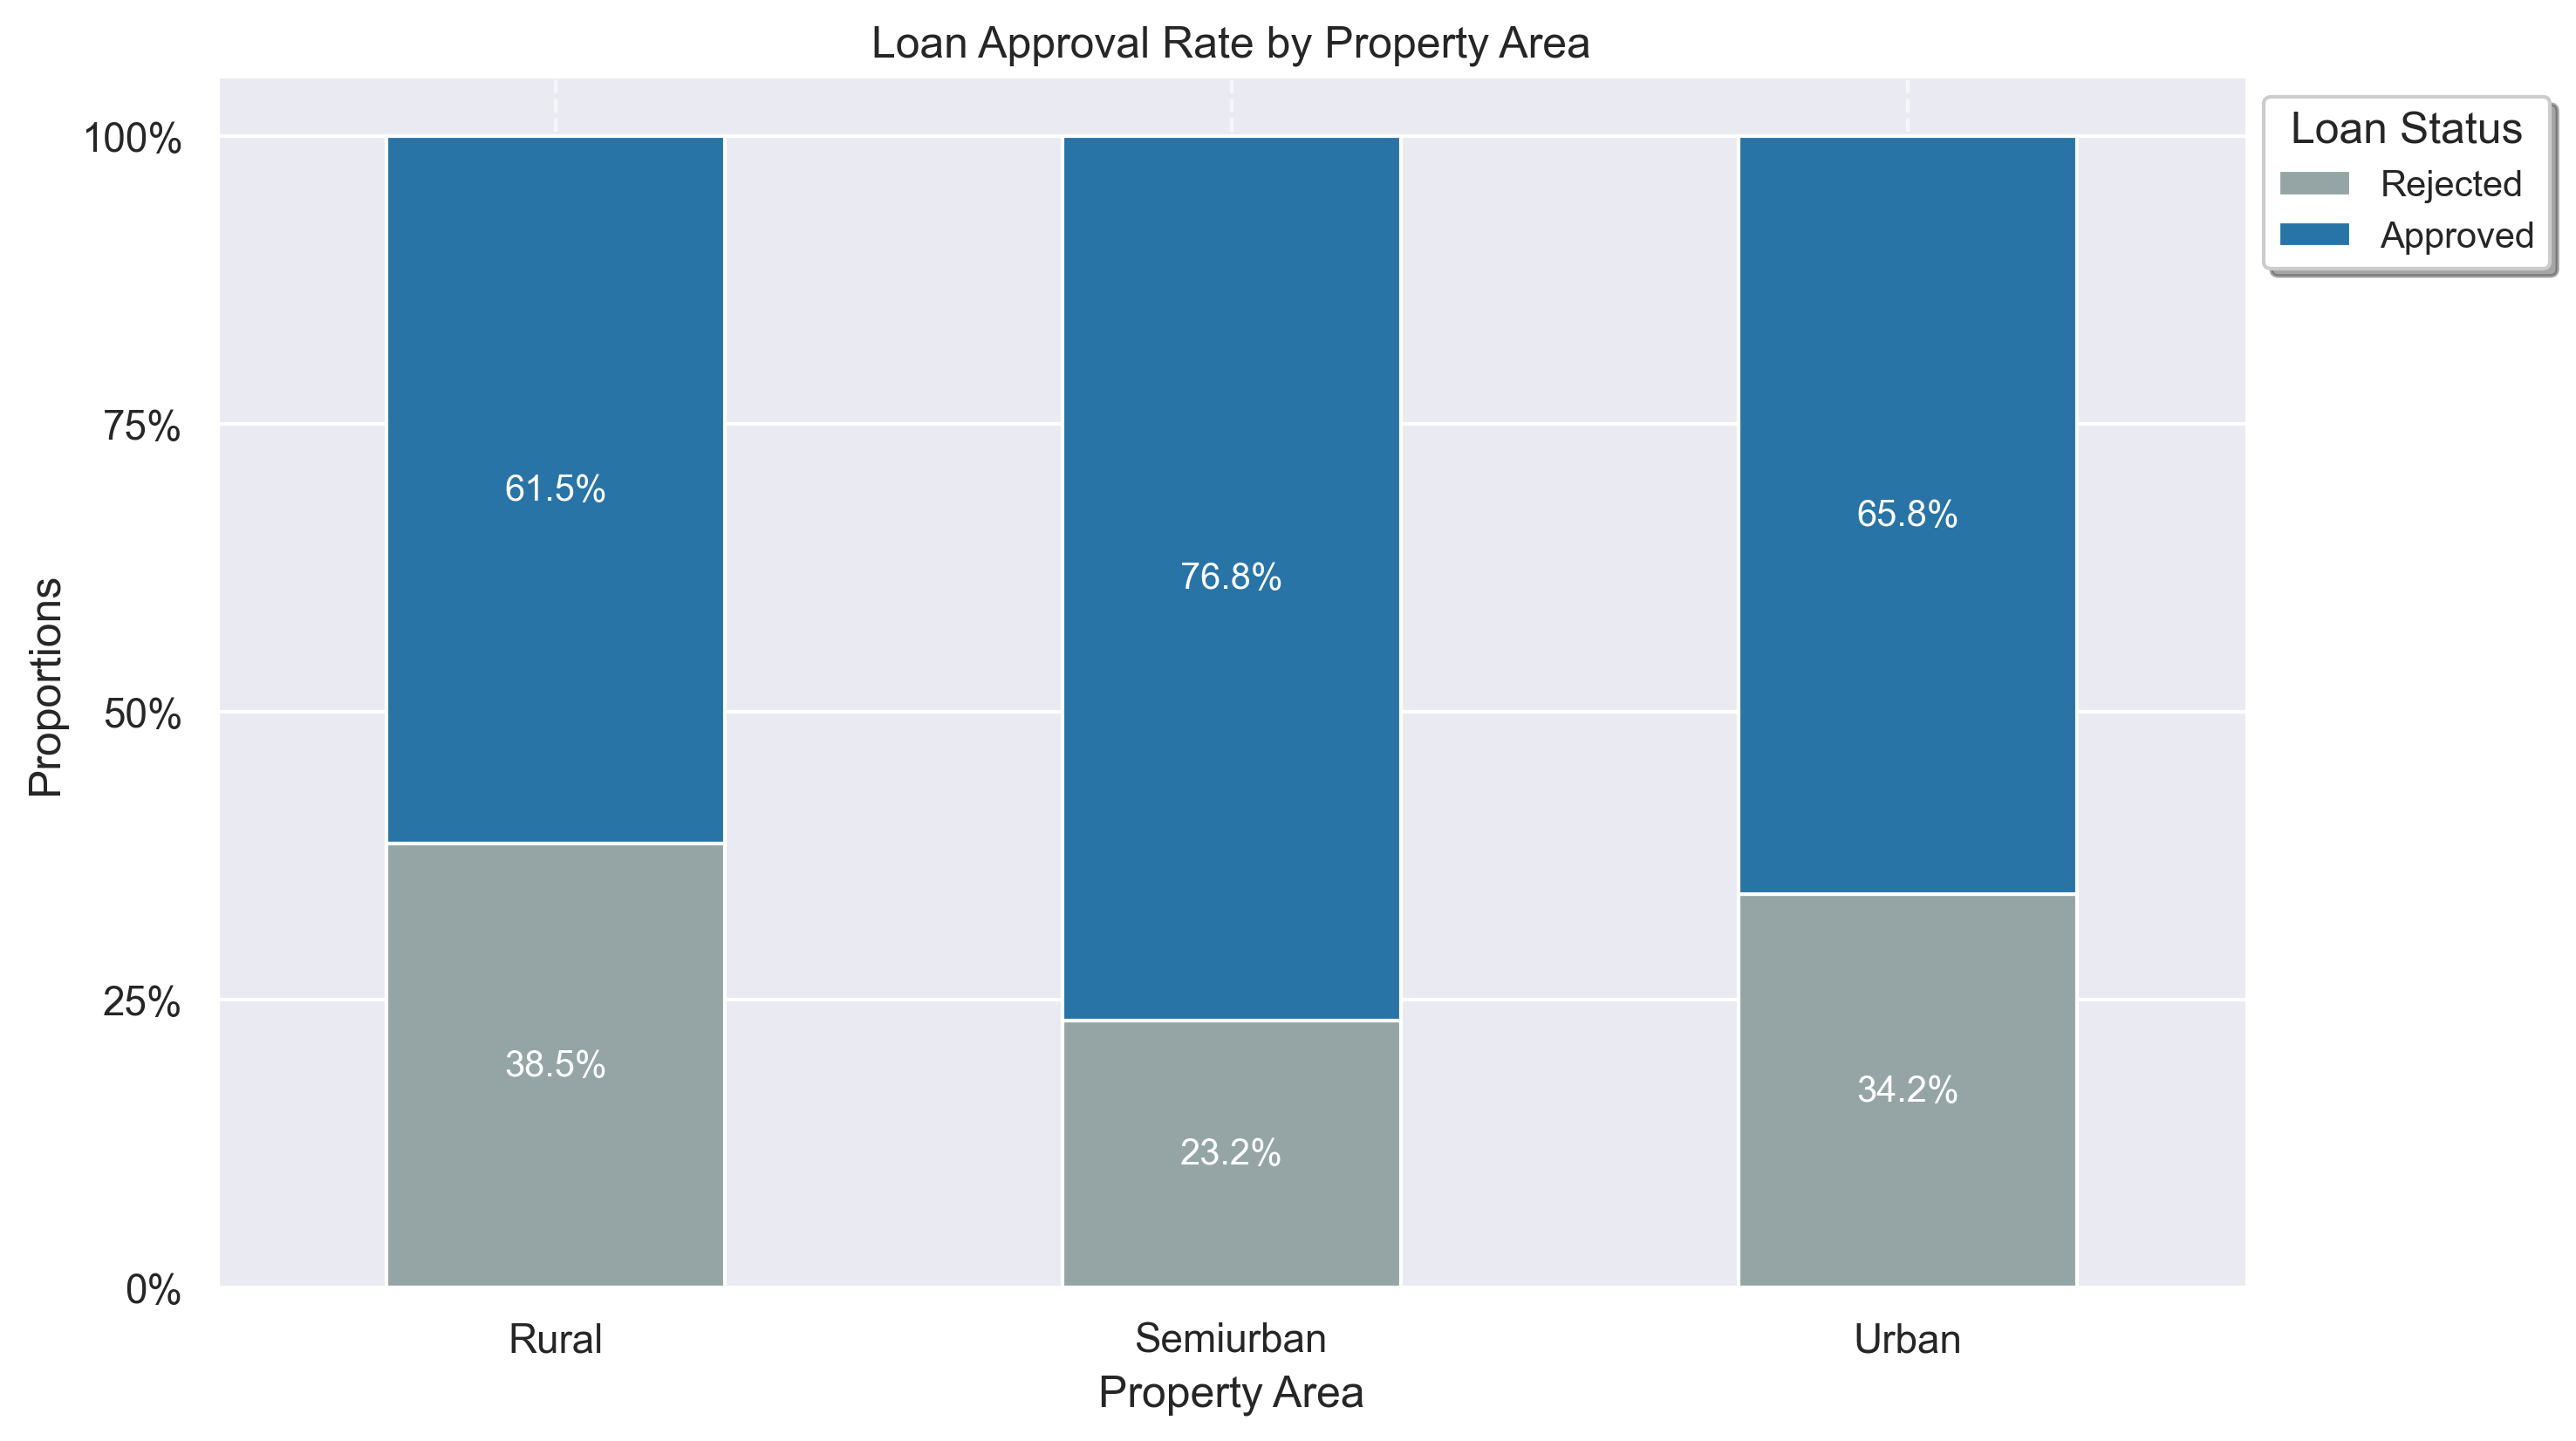

In [28]:

property_area_ct = pd.crosstab(loan_approval_df['Property_Area'], loan_approval_df['Loan_Status'])
## Normailizing the data  
property_area_normalized = property_area_ct.div(property_area_ct.sum(1),axis=0)
## plotting a stacked barchart  
ax = property_area_normalized.plot( 
    kind="bar", 
    figsize=(10,6), 
    stacked=True,  
    color=["#95A5A6","#2874A6"], 
    title="Loan Approval Rate by Property Area"
)
## Adding the proportions  
for p in ax.patches:  
    height = p.get_height()
    if height==0:  
        continue
    labels = f"{height*100:.1f}%"
    ## adding annotations  
    ax.text( 
        x=p.get_x()+p.get_width()/2, 
        y=p.get_y()+p.get_height()/2, 
        s=labels,
        ha="center", 
        va="center", 
        fontsize=10, 
        color="white"

    )
## Improving the legend
plt.legend( 
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    loc='best',
    frameon=True,
    shadow=True,
    fancybox=True, 
    labels=["Rejected","Approved"], 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)
for spine in ["top","right"]: 
    ax.spines[spine].set_visible(False)

# Customize grid and ticks
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

## annotate the figure
plt.xlabel("Property Area")
plt.ylabel("Proportions")
plt.xticks(rotation=0)
plt.show()


   

* **Dependents**

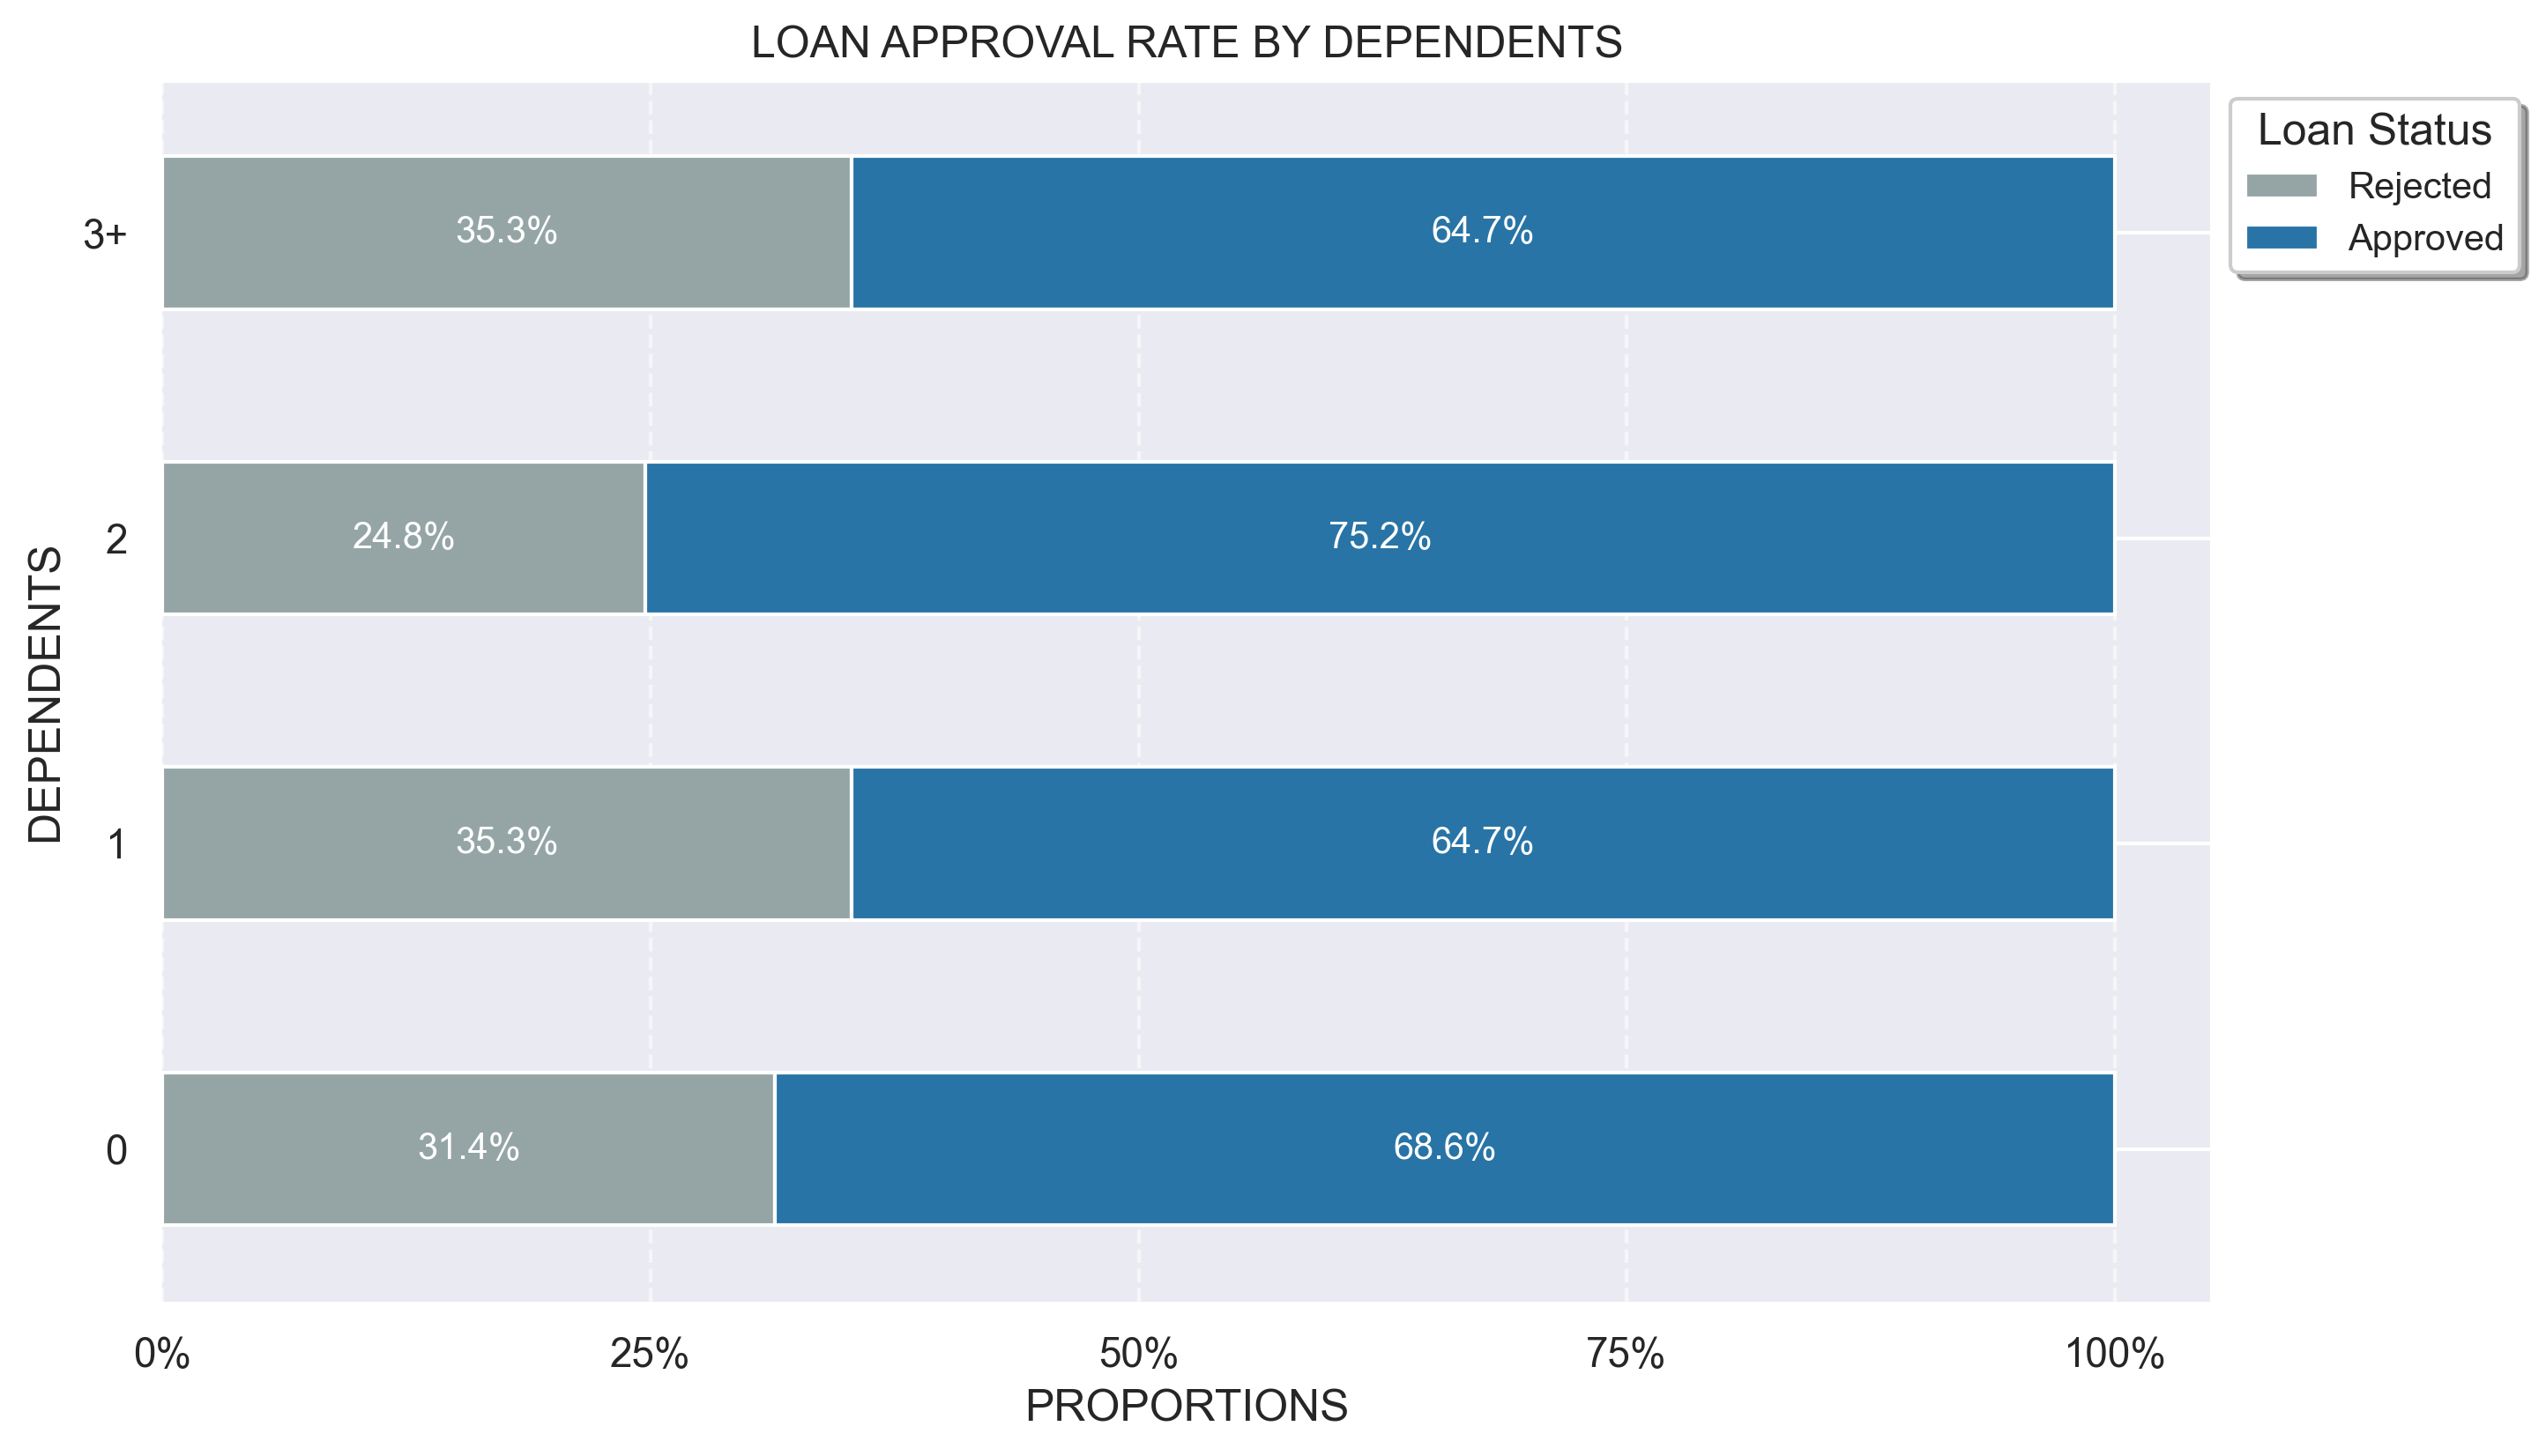

In [29]:
## Dependents  

dependents_ct = pd.crosstab(loan_approval_df['Dependents'],loan_approval_df['Loan_Status'])
## normalizing the data  
dependents_ct_normalized = dependents_ct.div(dependents_ct.sum(1),axis=0)
## plotting  
ax = dependents_ct_normalized.plot( 
    kind="barh", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY DEPENDENTS"
)

## annotations    
for p in ax.patches:  
    width = p.get_width()
    if width==0:  
        continue
    labels = f"{width*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white",
        ha="center",
        va="center"


    )
    ## legend  
    plt.legend( 
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    loc='best',
    frameon=True,
    shadow=True,
    fancybox=True, 
    labels=["Rejected","Approved"], 
    bbox_to_anchor=(1, 1), 
    facecolor="white"

)
# Remove spines for cleaner look
for spine in ["bottom", "left"]:
    ax.spines[spine].set_visible(False)
# Customize grid and ticks
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
## labelling 
plt.xlabel("PROPORTIONS")
plt.ylabel("DEPENDENTS")
plt.xticks(rotation=0)
plt.show()
    



* **Education**

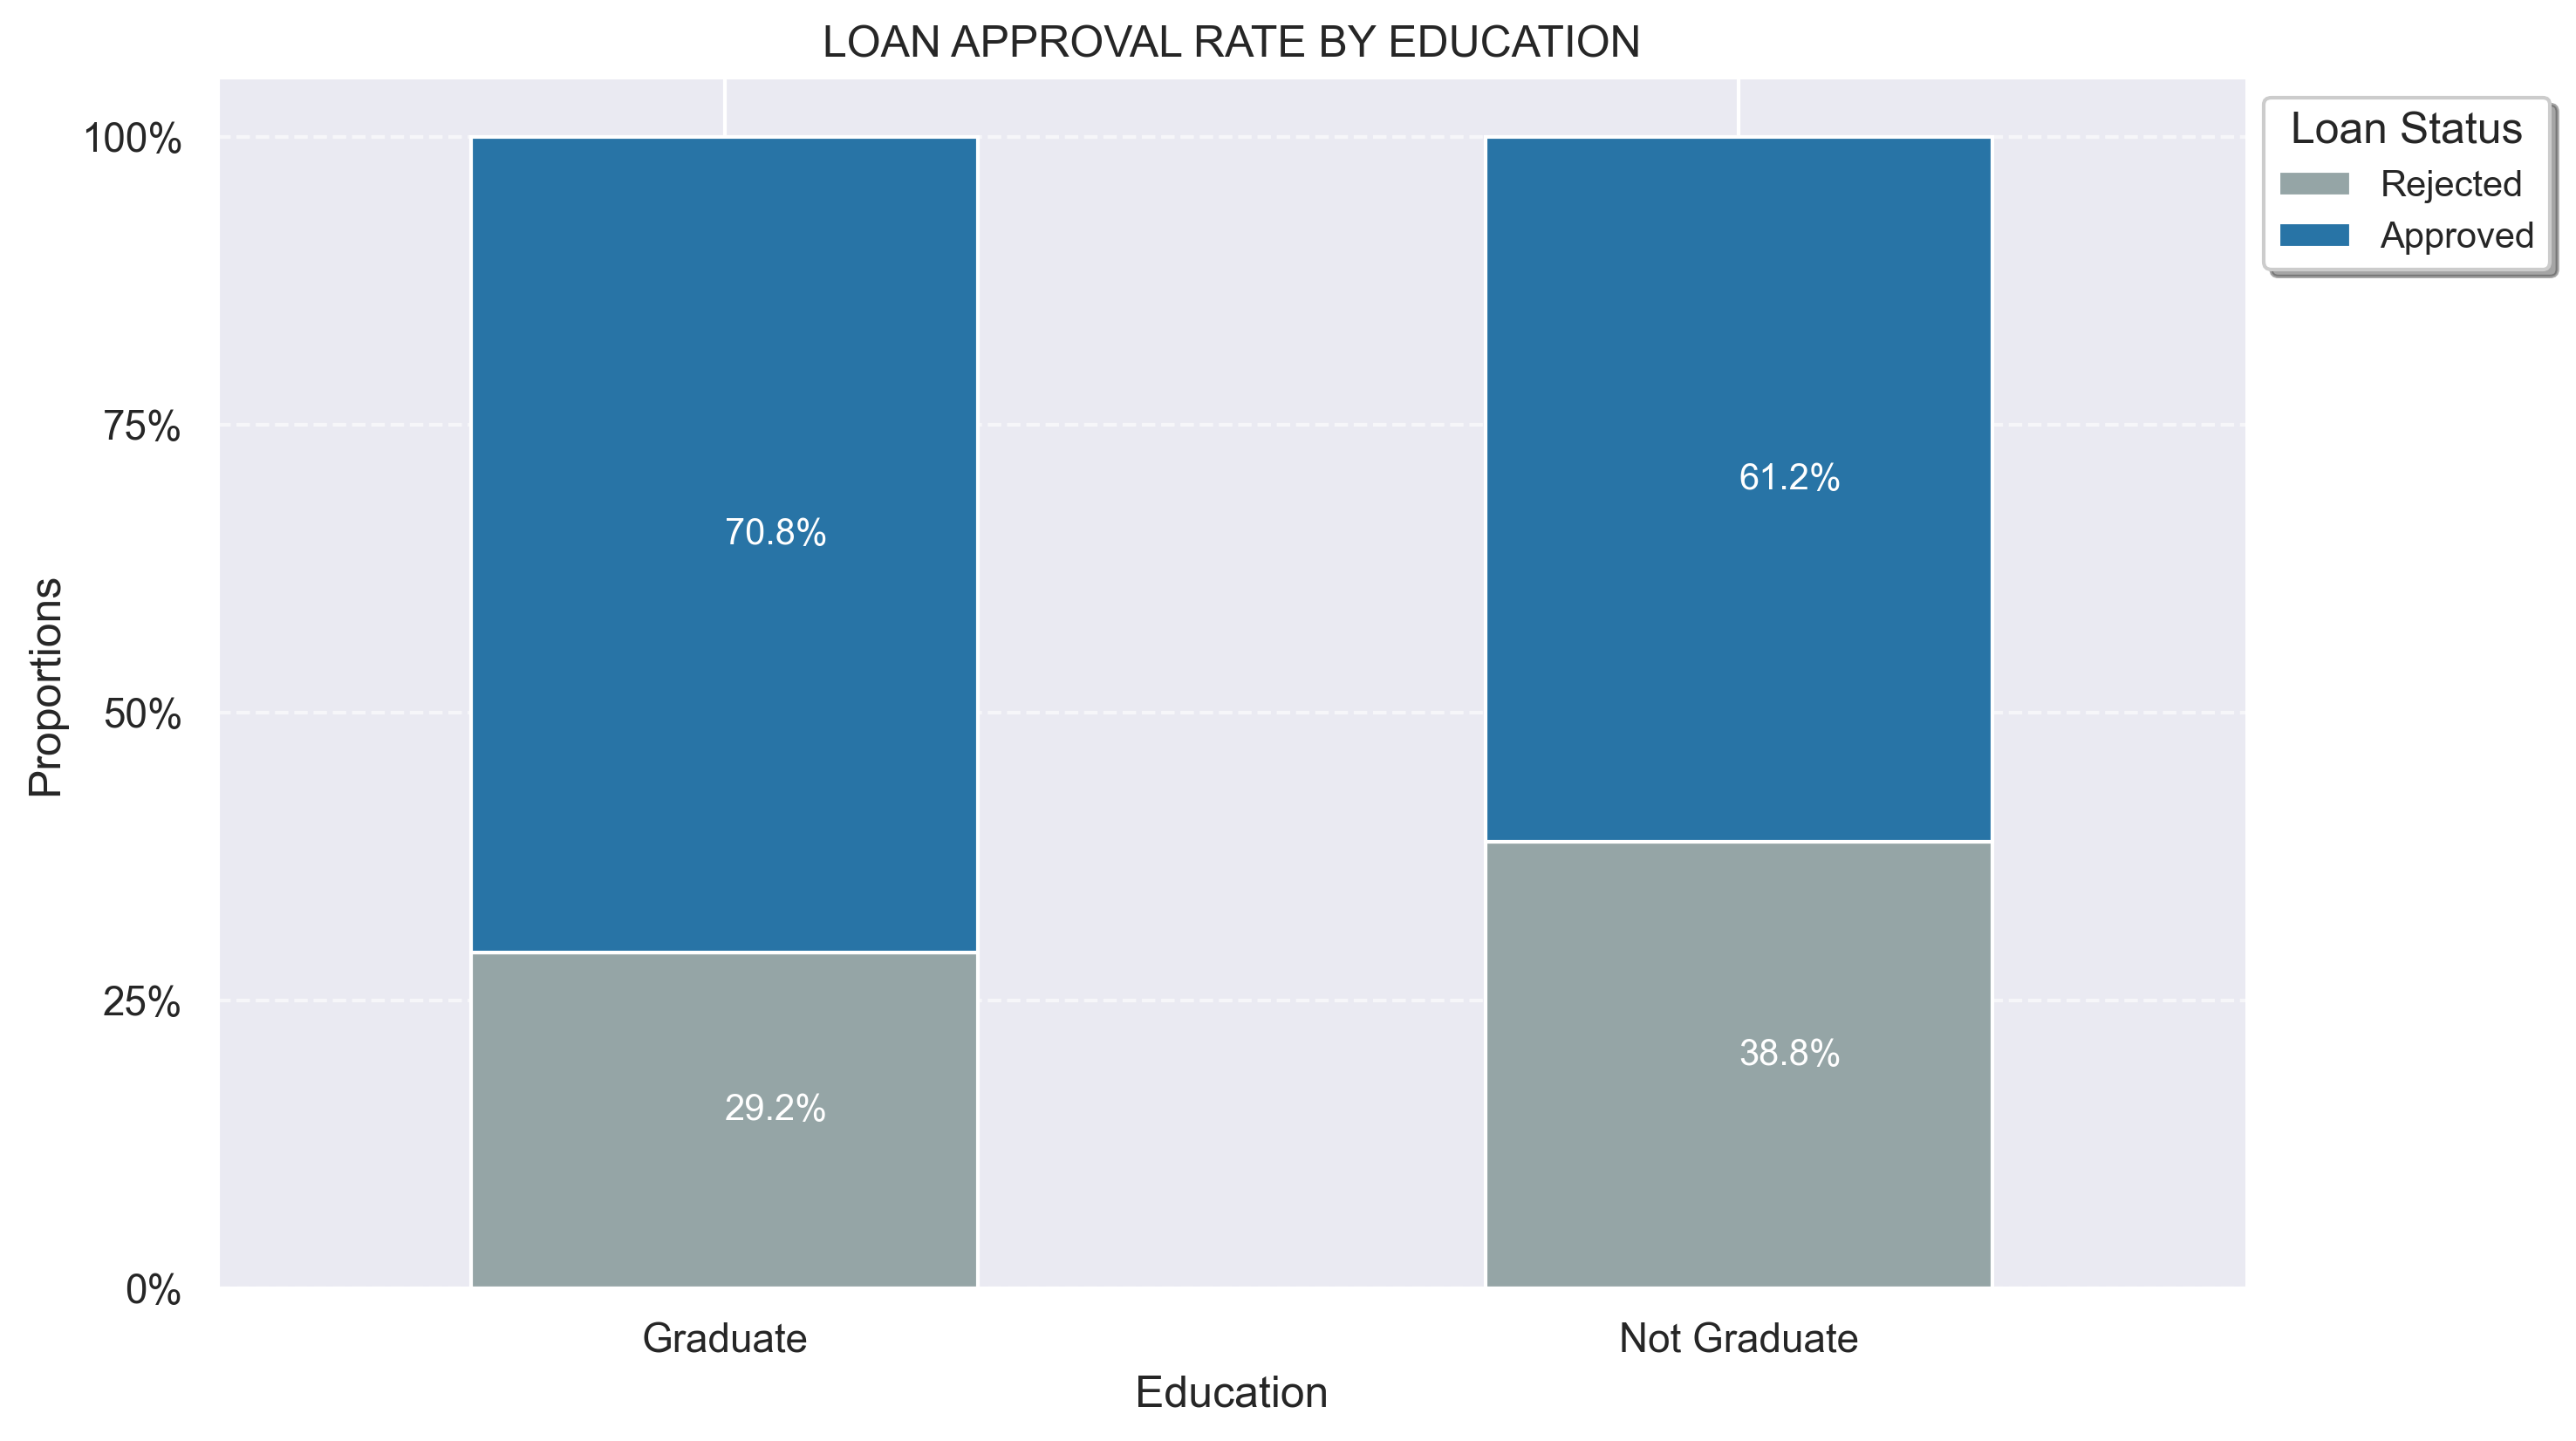

In [30]:
## Dependents  

education_ct = pd.crosstab(loan_approval_df['Education'],loan_approval_df['Loan_Status'])
## normalizing the data  
education_ct_normalized = education_ct.div(education_ct.sum(1),axis=0)
## plotting  
ax = education_ct_normalized.plot( 
    kind="bar", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY EDUCATION"
)

## annotations    
for p in ax.patches:  
    height = p.get_height()
    if height==0:  
        continue
    labels = f"{height*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white"

    )
    ## legend  
    plt.legend( 
    loc="best",
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    labels=['Rejected','Approved'], 
    bbox_to_anchor=(1,1), 
    facecolor="white"
    

)
for spine in ["top","right"]: 
    ax.spines[spine].set_visible(False)
# Customize grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
## labelling 
plt.xlabel("Education")
plt.ylabel("Proportions")
plt.xticks(rotation=0)
plt.show()
    



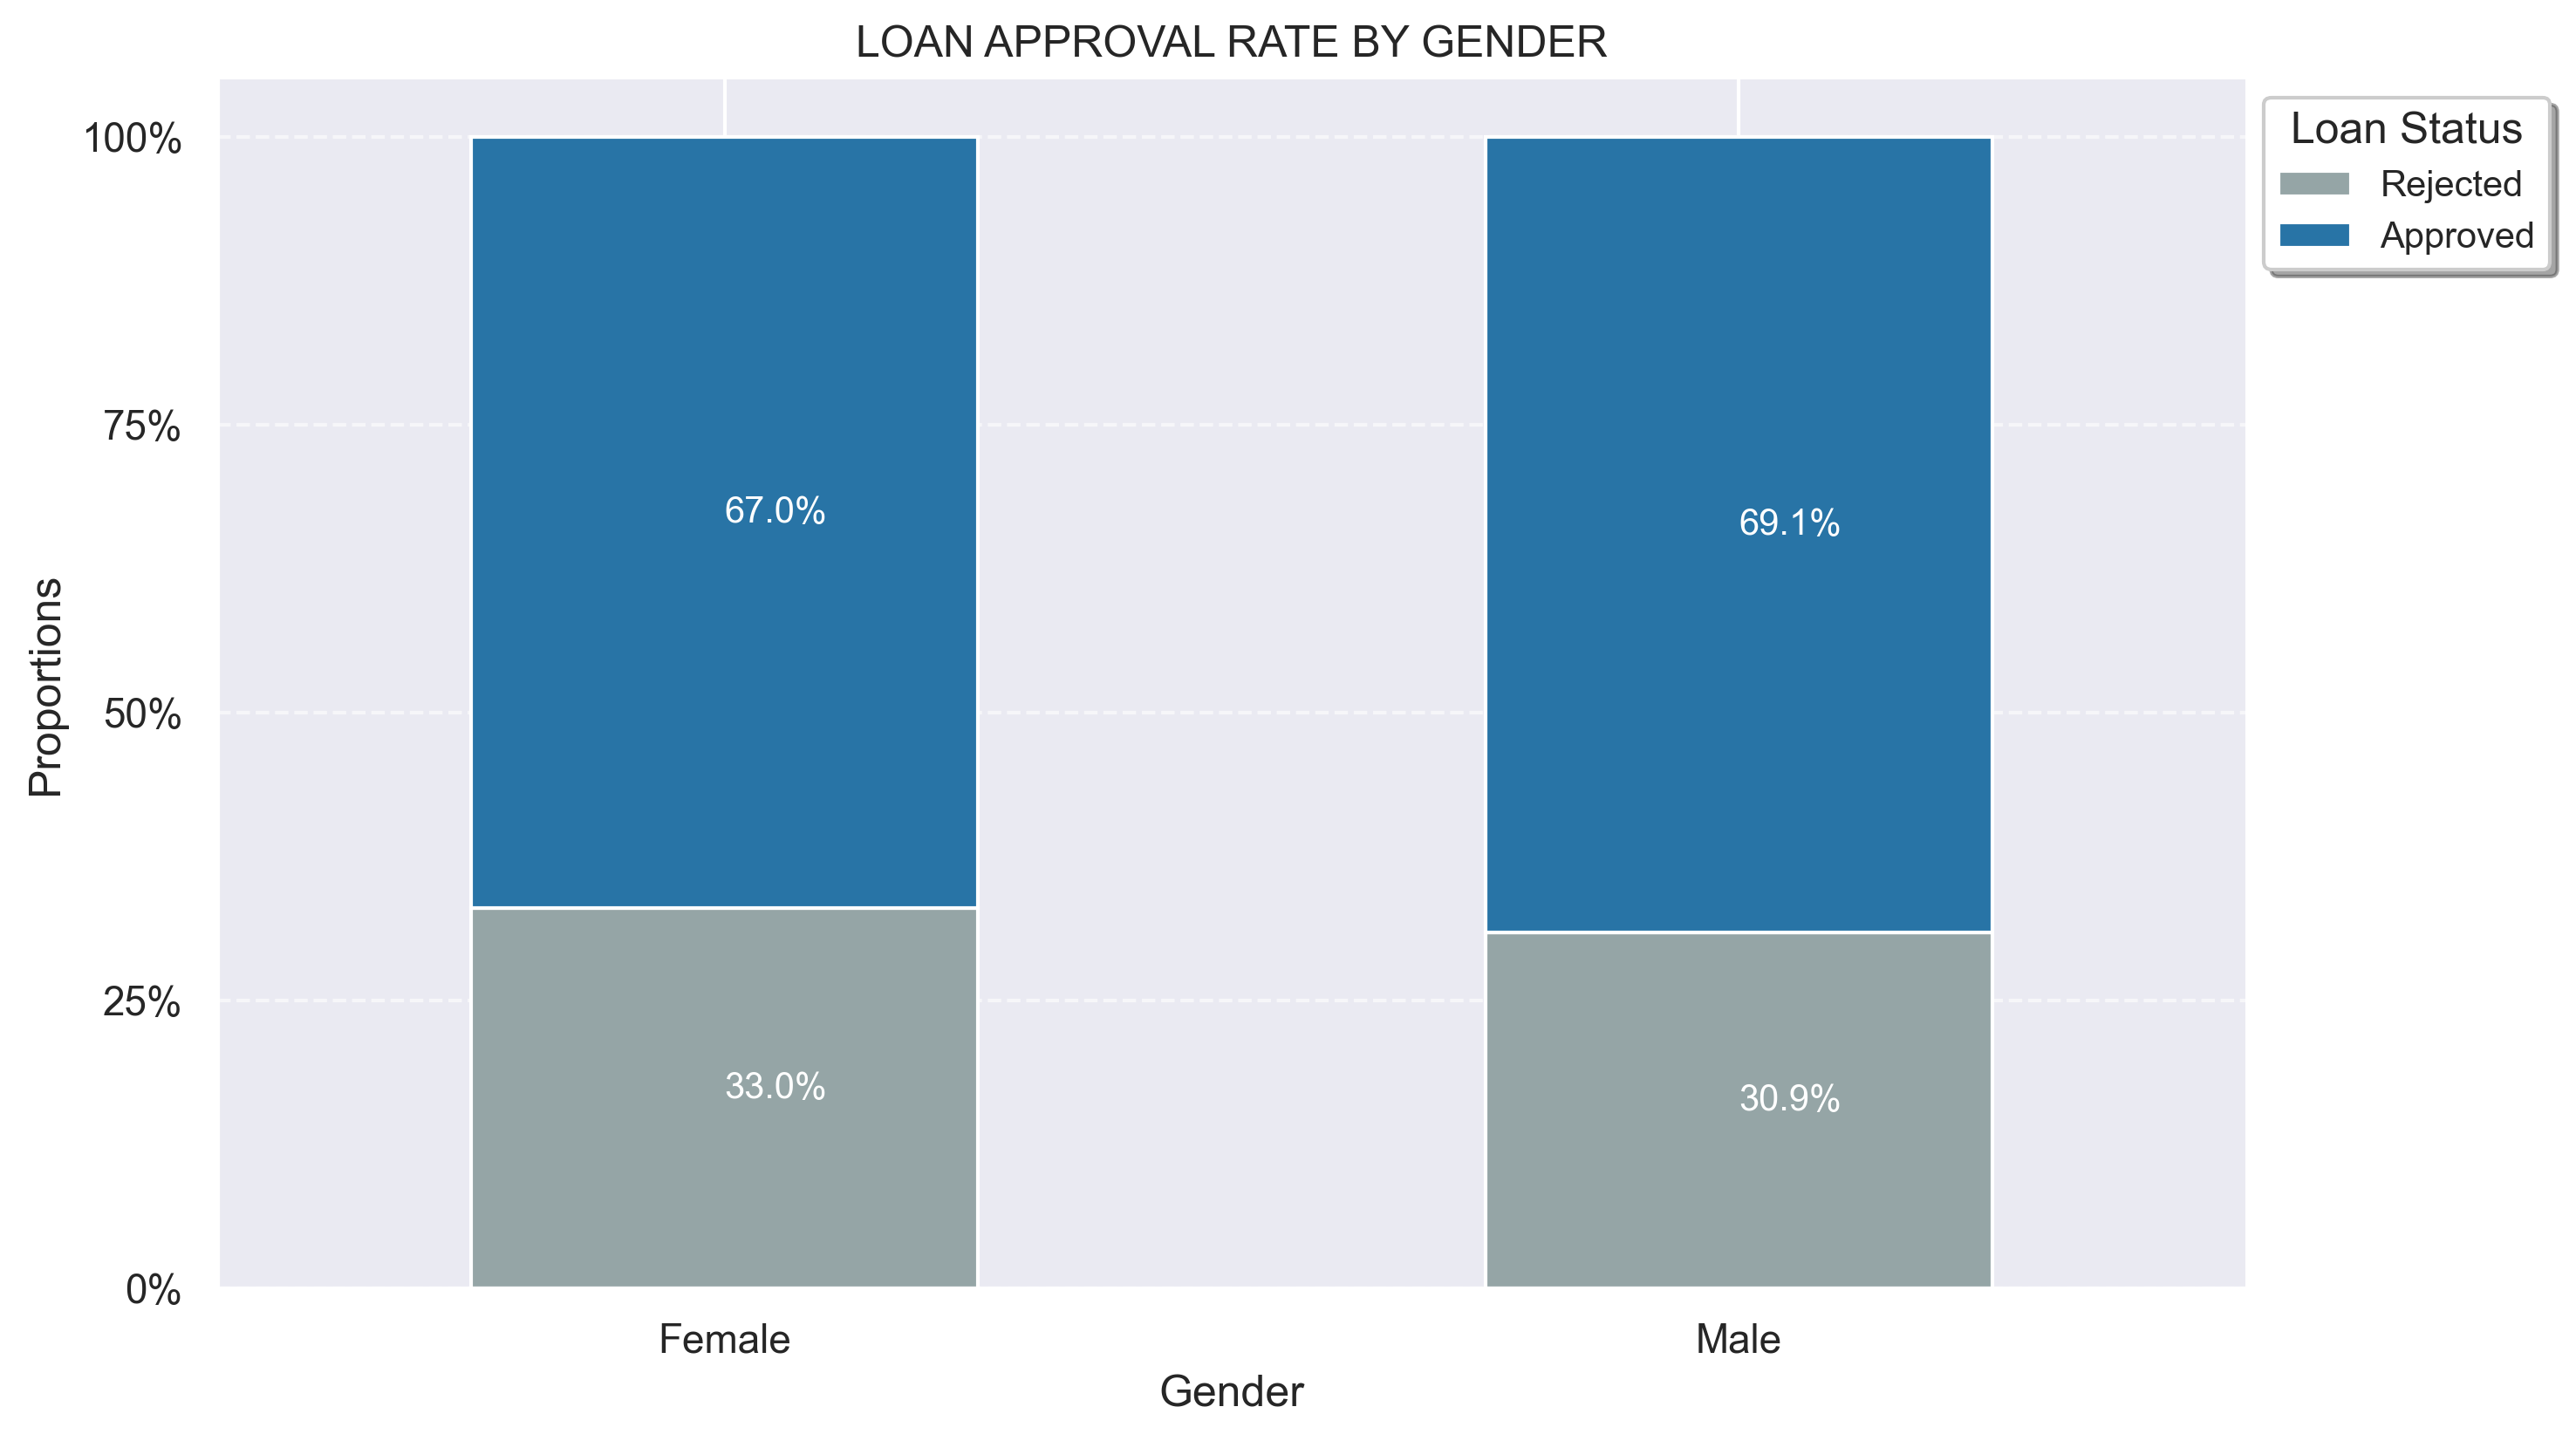

In [31]:
## Dependents  

gender_ct = pd.crosstab(loan_approval_df['Gender'],loan_approval_df['Loan_Status'])
## normalizing the data  
gender_ct_normalized = gender_ct.div(gender_ct.sum(1),axis=0)
## plotting  
ax = gender_ct_normalized.plot( 
    kind="bar", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY GENDER"
)

## annotations    
for p in ax.patches:  
    height = p.get_height()
    if height==0:  
        continue
    labels = f"{height*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white"

    )
    ## legend  
    plt.legend( 
    loc="best",
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    labels=['Rejected','Approved'], 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)
## removing spines  
for spine in ["top","right"]:  
    ax.spines[spine].set_visible(False)
## labelling 
# Customize grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.xlabel("Gender")
plt.ylabel("Proportions")
plt.xticks(rotation=0)

plt.show()
    



In [32]:
## binning 
bin_edges = bins=[0,2500,4000,6000,81000]
bin_labels = ['Low', 'Average', 'High', 'Very High']
loan_approval_df['ApplicantIncome_Category'] = pd.cut(loan_approval_df['ApplicantIncome'], bins=bin_edges, labels=bin_labels)

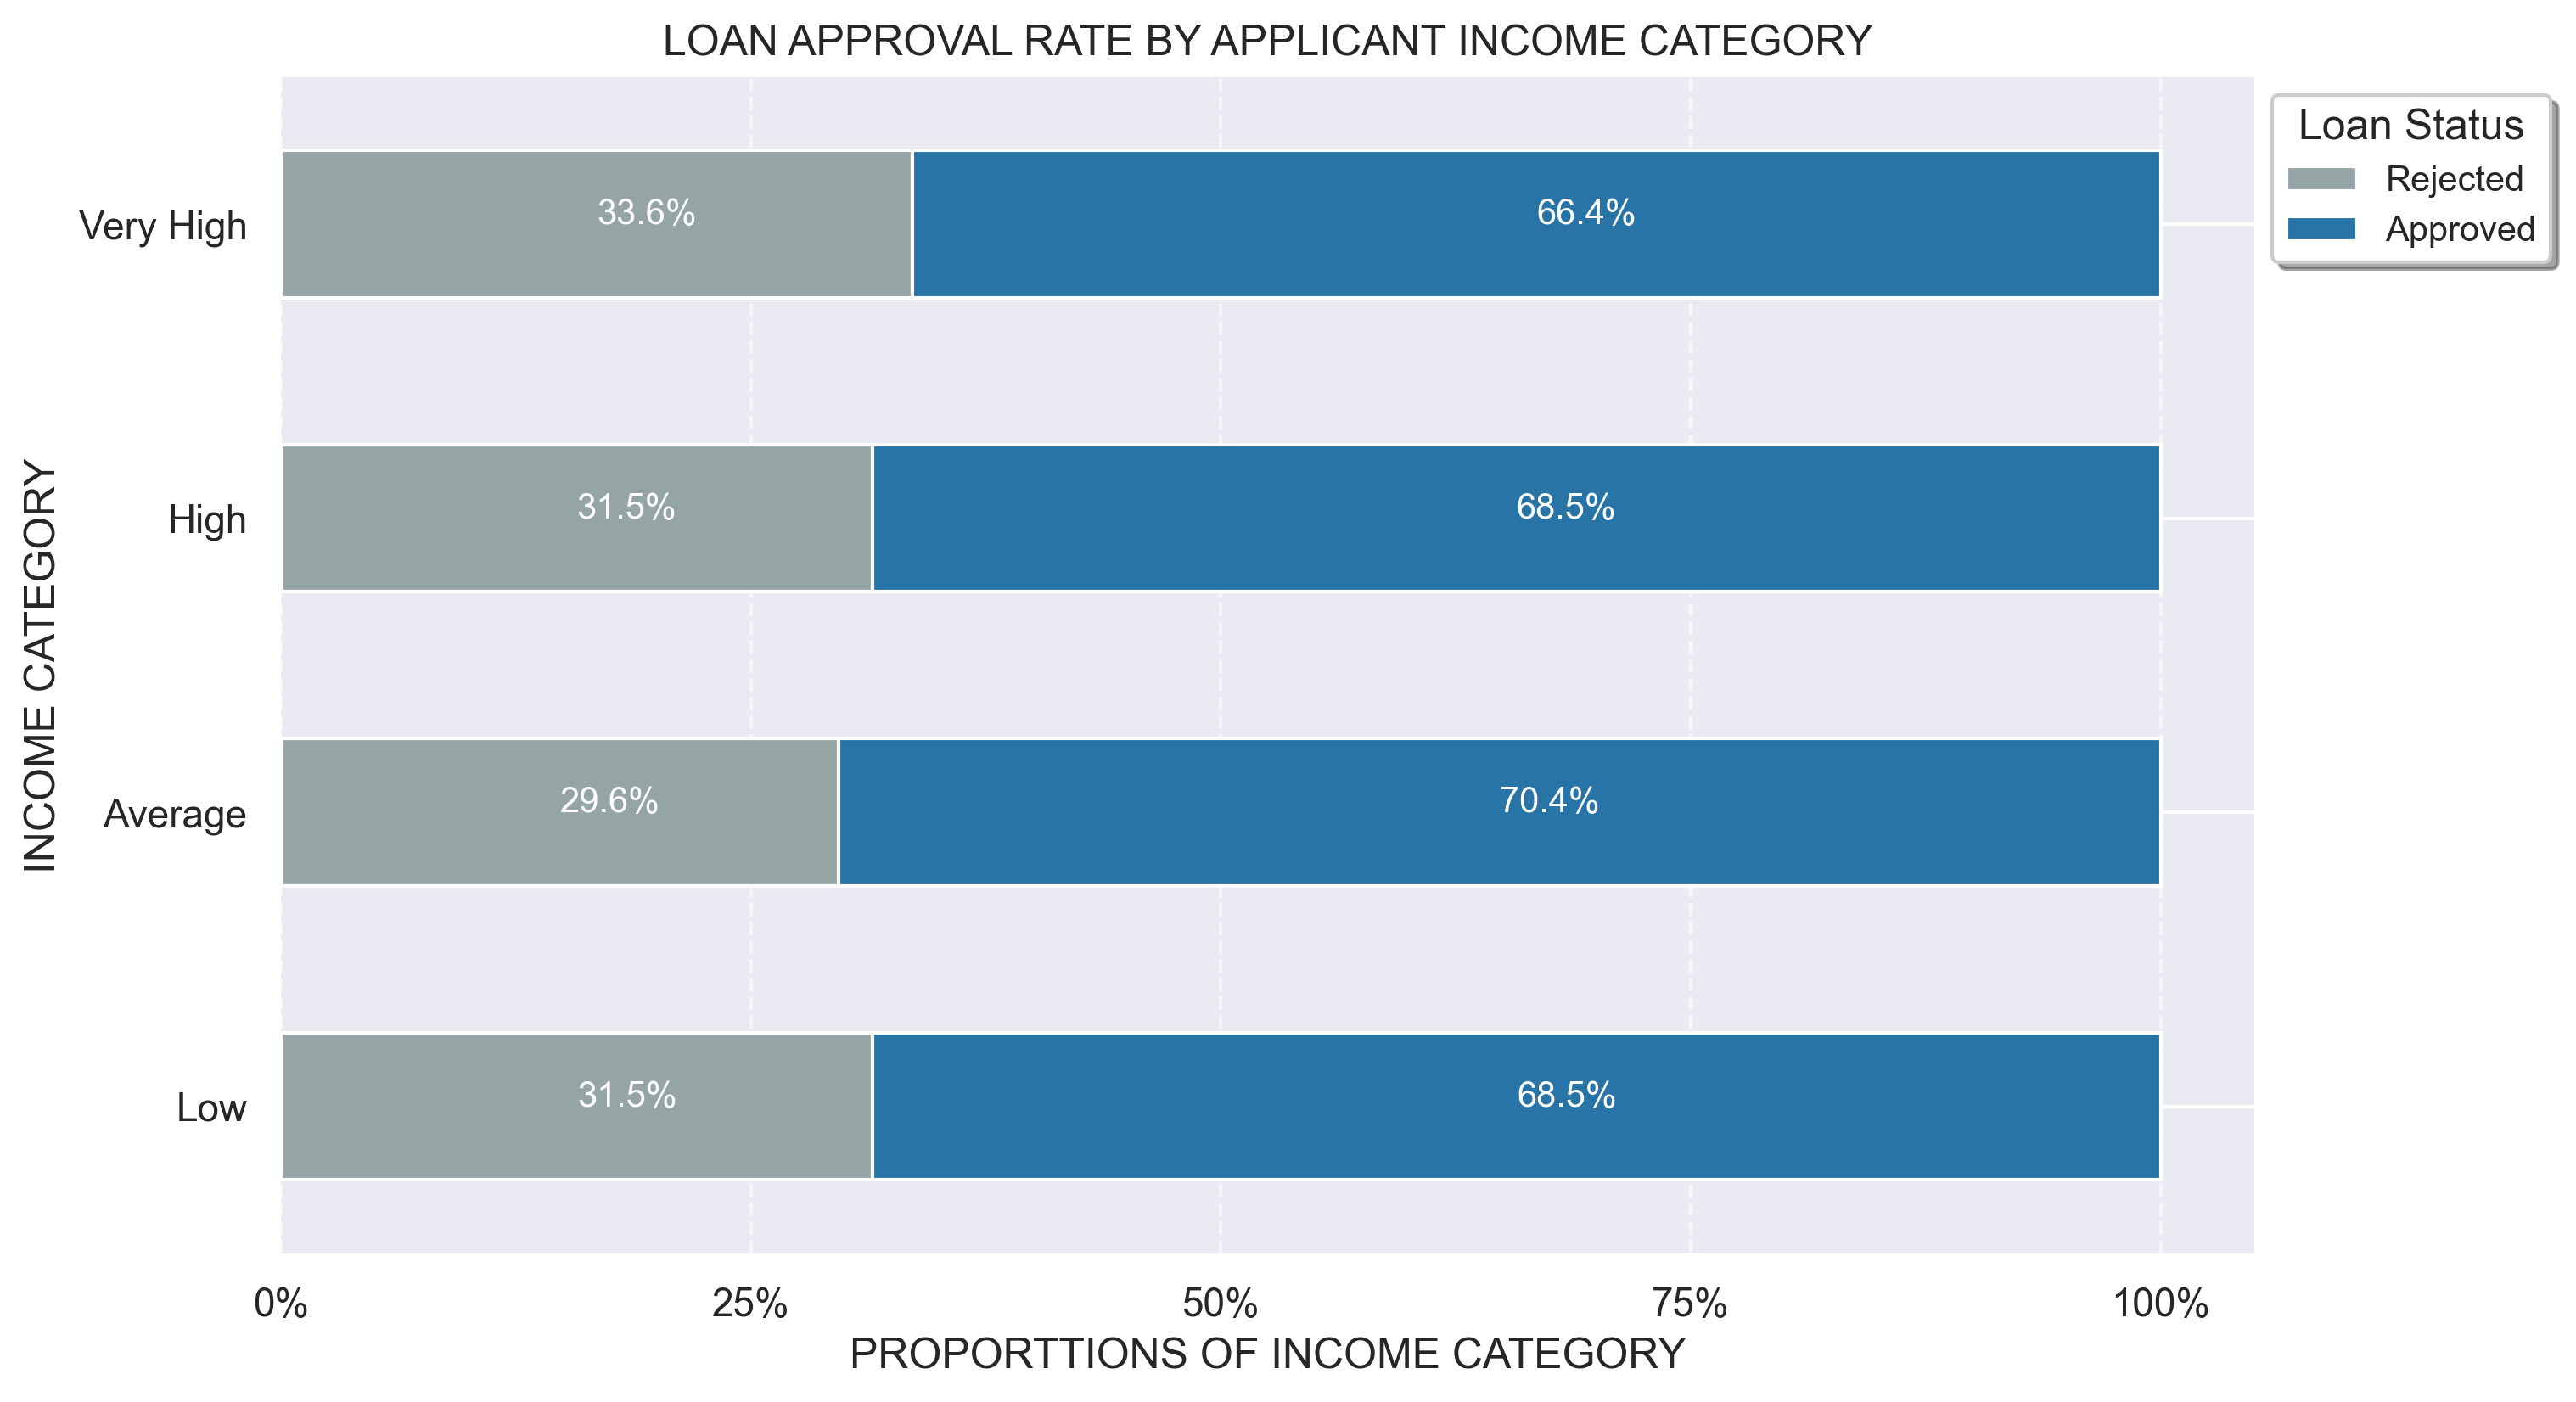

In [33]:
## Dependents  

category_ct = pd.crosstab(loan_approval_df['ApplicantIncome_Category'],loan_approval_df['Loan_Status'])
## normalizing the data  
category_ct_normalized = category_ct.div(category_ct.sum(1),axis=0)
## plotting  
ax = category_ct_normalized.plot( 
    kind="barh", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY APPLICANT INCOME CATEGORY"
)

## annotations    
for p in ax.patches:  
    width = p.get_width()
    if width==0:  
        continue
    labels = f"{width*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white"

    )
    ## legend  
    plt.legend( 
    loc="best",
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    labels=['Rejected','Approved'], 
    bbox_to_anchor =(1,1), 
    facecolor="white"

)
# Customize grid and ticks
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])\

for spine in ["top","right","bottom","left"]:  
    ax.spines[spine].set_visible(False)
## labelling 
plt.xlabel("PROPORTTIONS OF INCOME CATEGORY")
plt.ylabel("INCOME CATEGORY")
plt.xticks(rotation=0)
plt.show()
    



In [34]:
## creating total Income column  
loan_approval_df['TotalIncome'] = loan_approval_df['ApplicantIncome'] + loan_approval_df['CoapplicantIncome']
## creating bins for the total income
bin_edges = bins=[0,2500,4000,6000,81000]
bin_labels = ['Low', 'Average', 'High', 'Very High']
loan_approval_df['TotalIncome_Category'] = pd.cut(loan_approval_df['TotalIncome'], bins=bin_edges, labels=bin_labels)


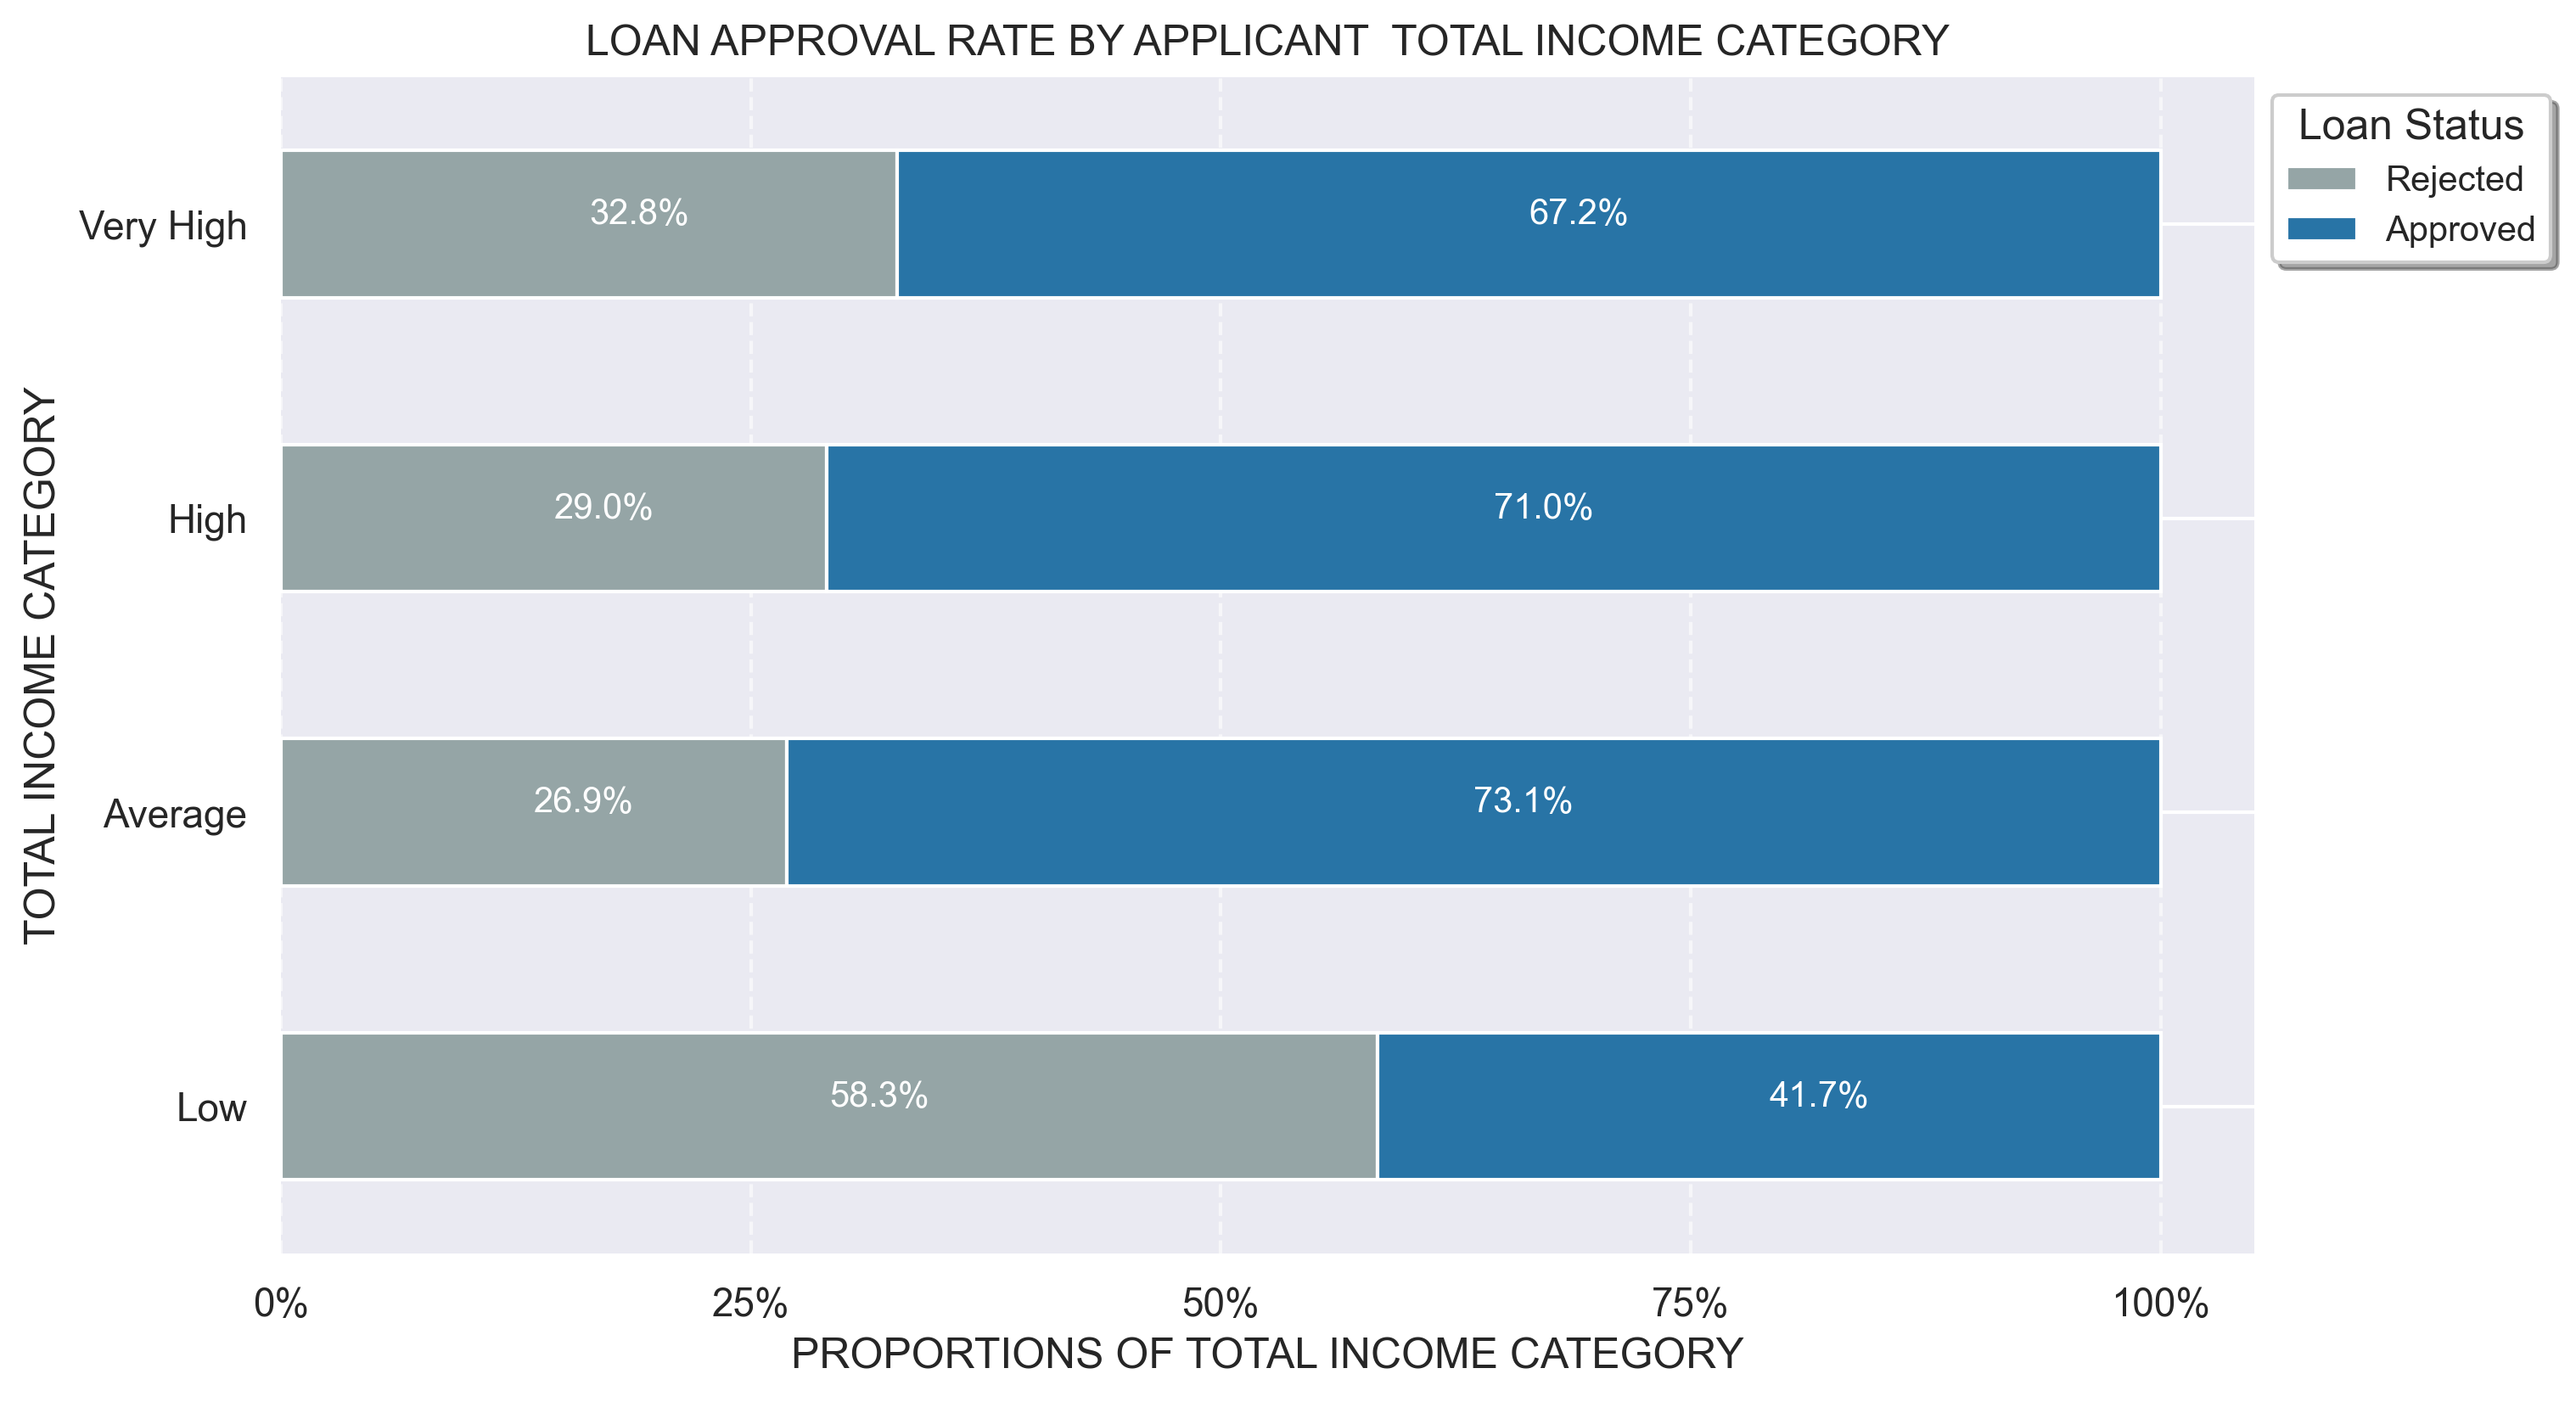

In [35]:
## Dependents  

totalIncome_ct = pd.crosstab(loan_approval_df['TotalIncome_Category'],loan_approval_df['Loan_Status'])
## normalizing the data  
totalIncome_ct_normalized = totalIncome_ct.div(totalIncome_ct.sum(1).astype(float),axis=0)
## plotting  
ax = totalIncome_ct_normalized.plot( 
    kind="barh", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY APPLICANT  TOTAL INCOME CATEGORY" 
)

## annotations    
for p in ax.patches:  
    width = p.get_width()
    if width==0:  
        continue
    labels = f"{width*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white"

    )
    ## legend  
    plt.legend( 
    loc="best",
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    labels=['Rejected','Approved'], 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)
# Customize grid and ticks
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

for spine in ["top","right","bottom","left"]:  
    ax.spines[spine].set_visible(False)
## labelling 
plt.xlabel("PROPORTIONS OF TOTAL INCOME CATEGORY")
plt.ylabel("TOTAL INCOME CATEGORY")
plt.xticks(rotation=0)
plt.show()
    



In [36]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_approval_df['LoanAmount_bin']=pd.cut(loan_approval_df['LoanAmount'],bins,labels=group)

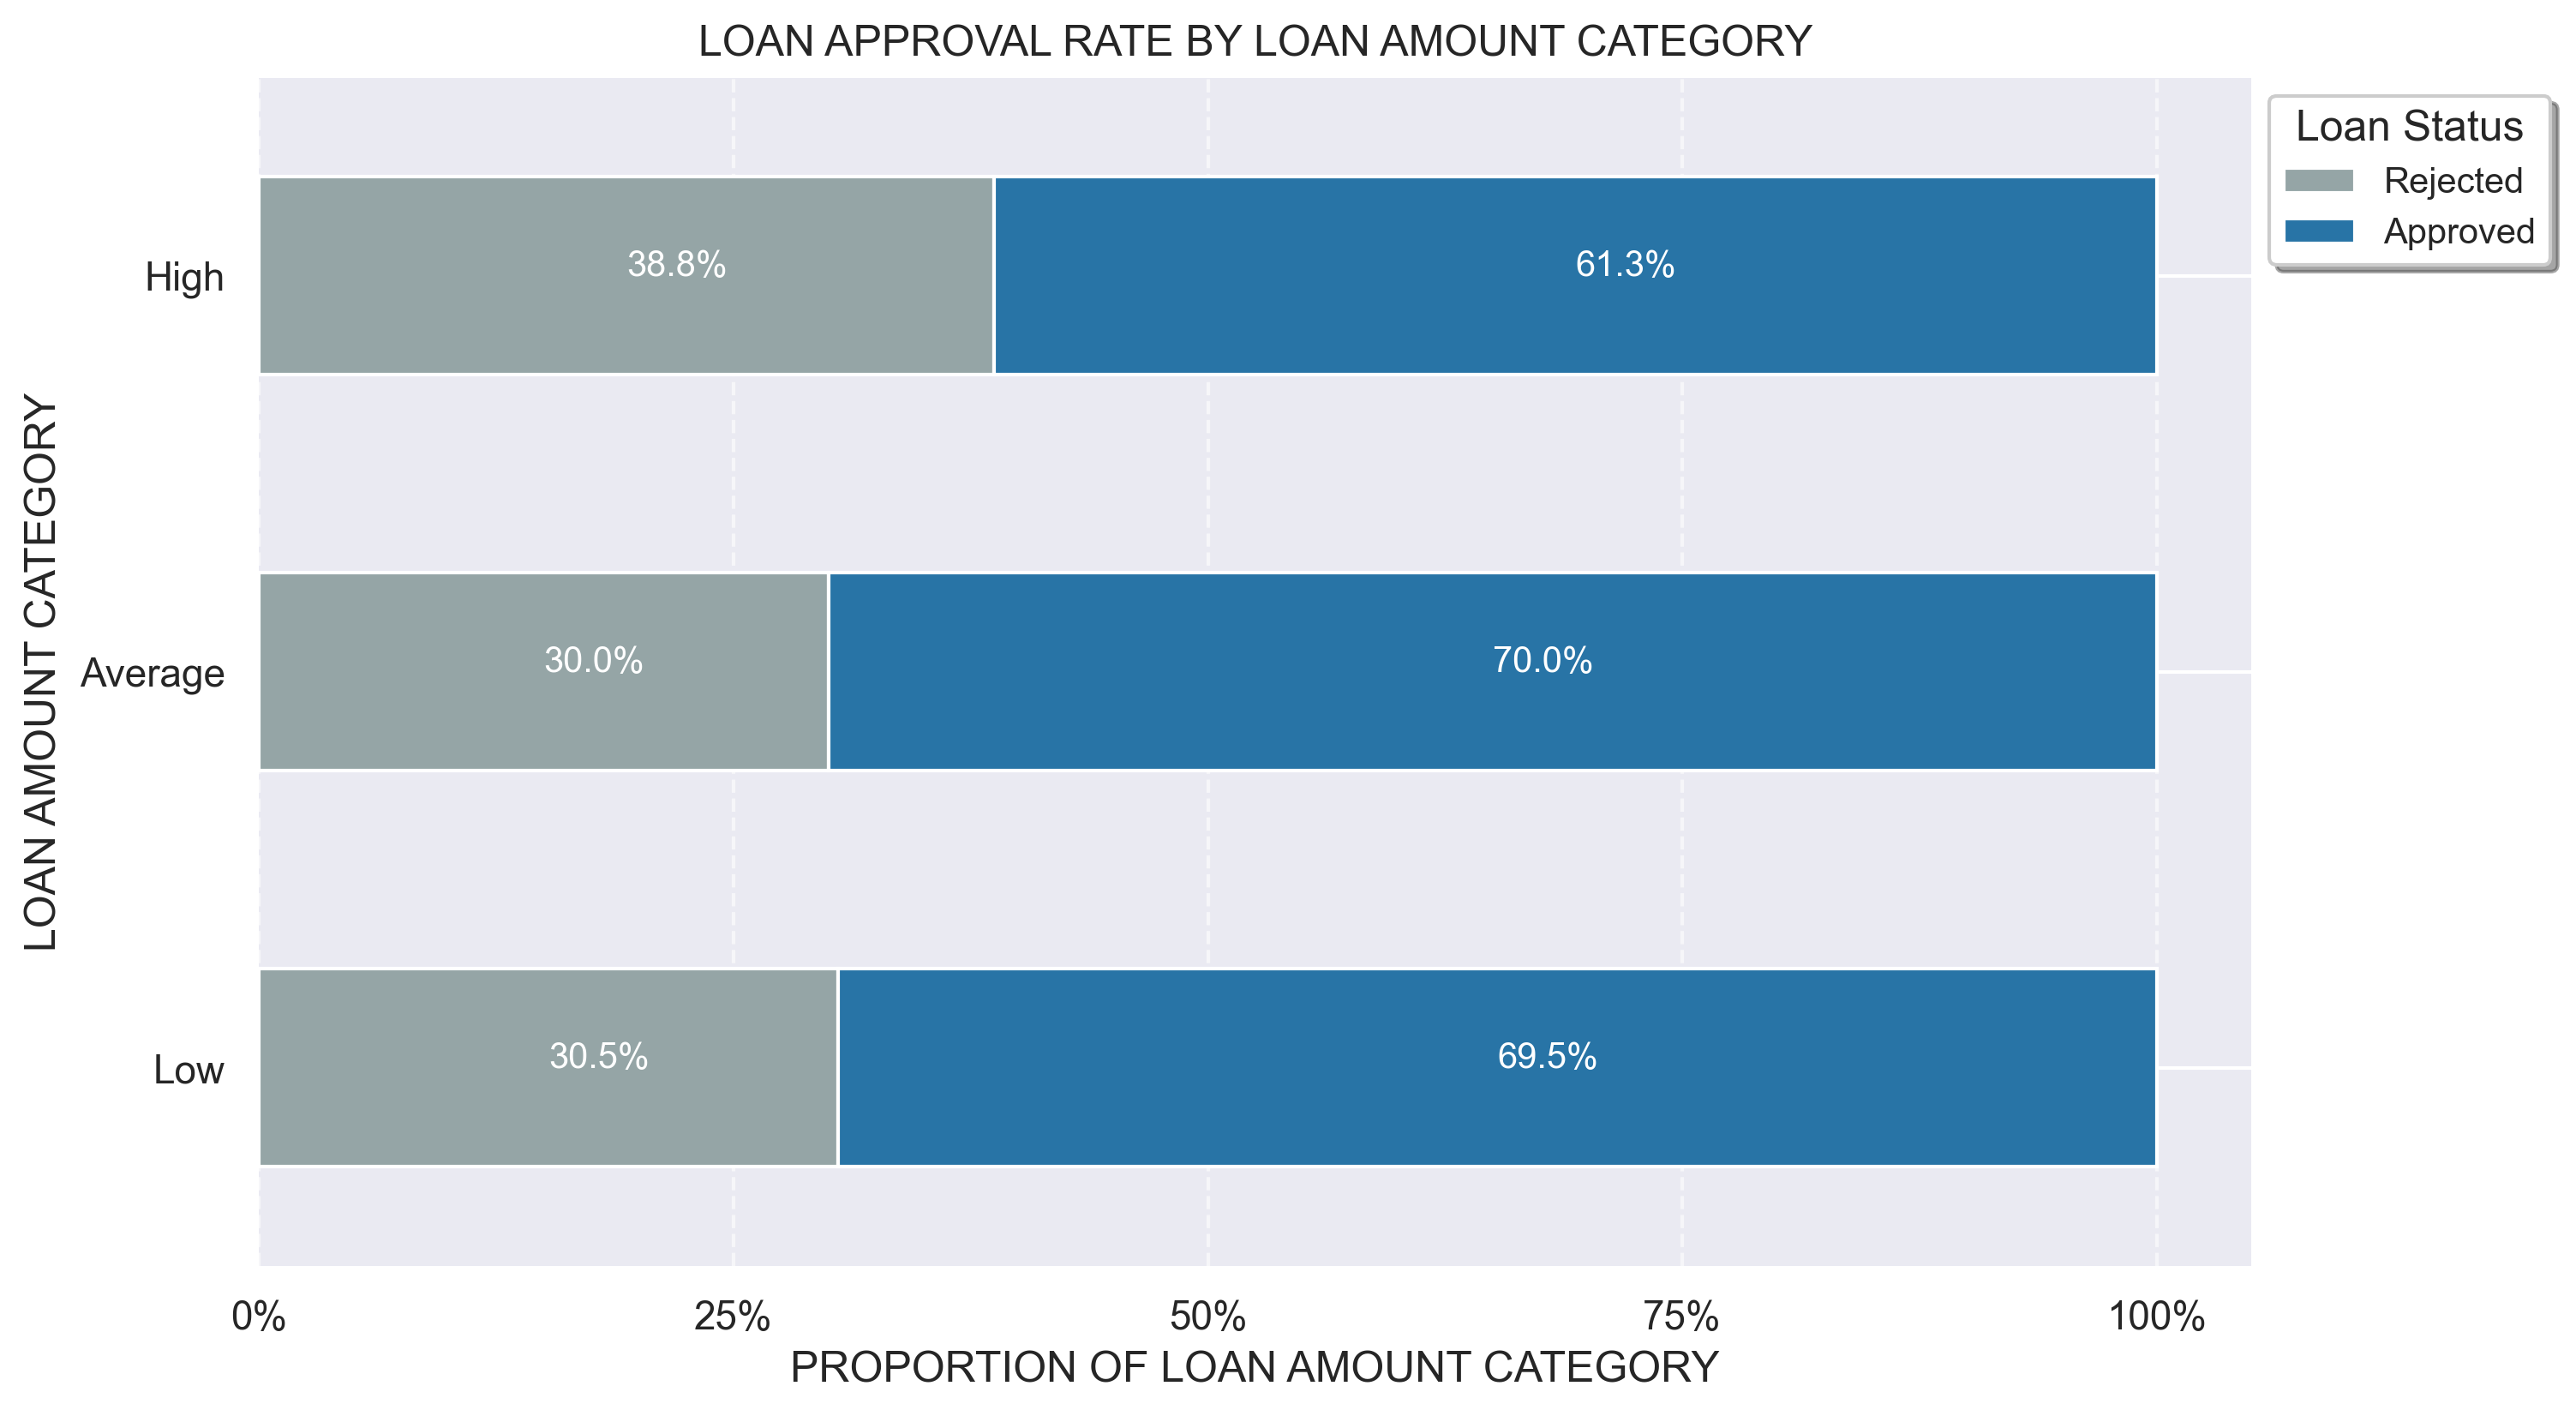

In [37]:
## Dependents  

LoanAmount_ct = pd.crosstab(loan_approval_df['LoanAmount_bin'],loan_approval_df['Loan_Status'])
## normalizing the data  
LoanAmount_ct_normalized = LoanAmount_ct.div(LoanAmount_ct.sum(1).astype(float),axis=0)
## plotting  
ax = LoanAmount_ct_normalized.plot( 
    kind="barh", 
    stacked=True,
    figsize=(10,6), 
    color=["#95A5A6","#2874A6"],  
    title="LOAN APPROVAL RATE BY LOAN AMOUNT CATEGORY" 
)

## annotations    
for p in ax.patches:  
    width = p.get_width()
    if width==0:  
        continue
    labels = f"{width*100:.1f}%"
    ## anotate  
    ax.text( 
        x=p.get_x() + p.get_width()/2, 
        y = p.get_y()+ p.get_height()/2, 
        s=labels, 
        fontsize=10, 
        color="white"

    )
    ## legend  
    plt.legend( 
    loc="best",
    title="Loan Status", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    labels=['Rejected','Approved'], 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)
# Customize grid and ticks
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

for spine in ["top","right","bottom","left"]:  
    ax.spines[spine].set_visible(False)
## labelling 
plt.xlabel("PROPORTION OF LOAN AMOUNT CATEGORY")
plt.ylabel("LOAN AMOUNT CATEGORY")
plt.xticks(rotation=0)
plt.show()
    



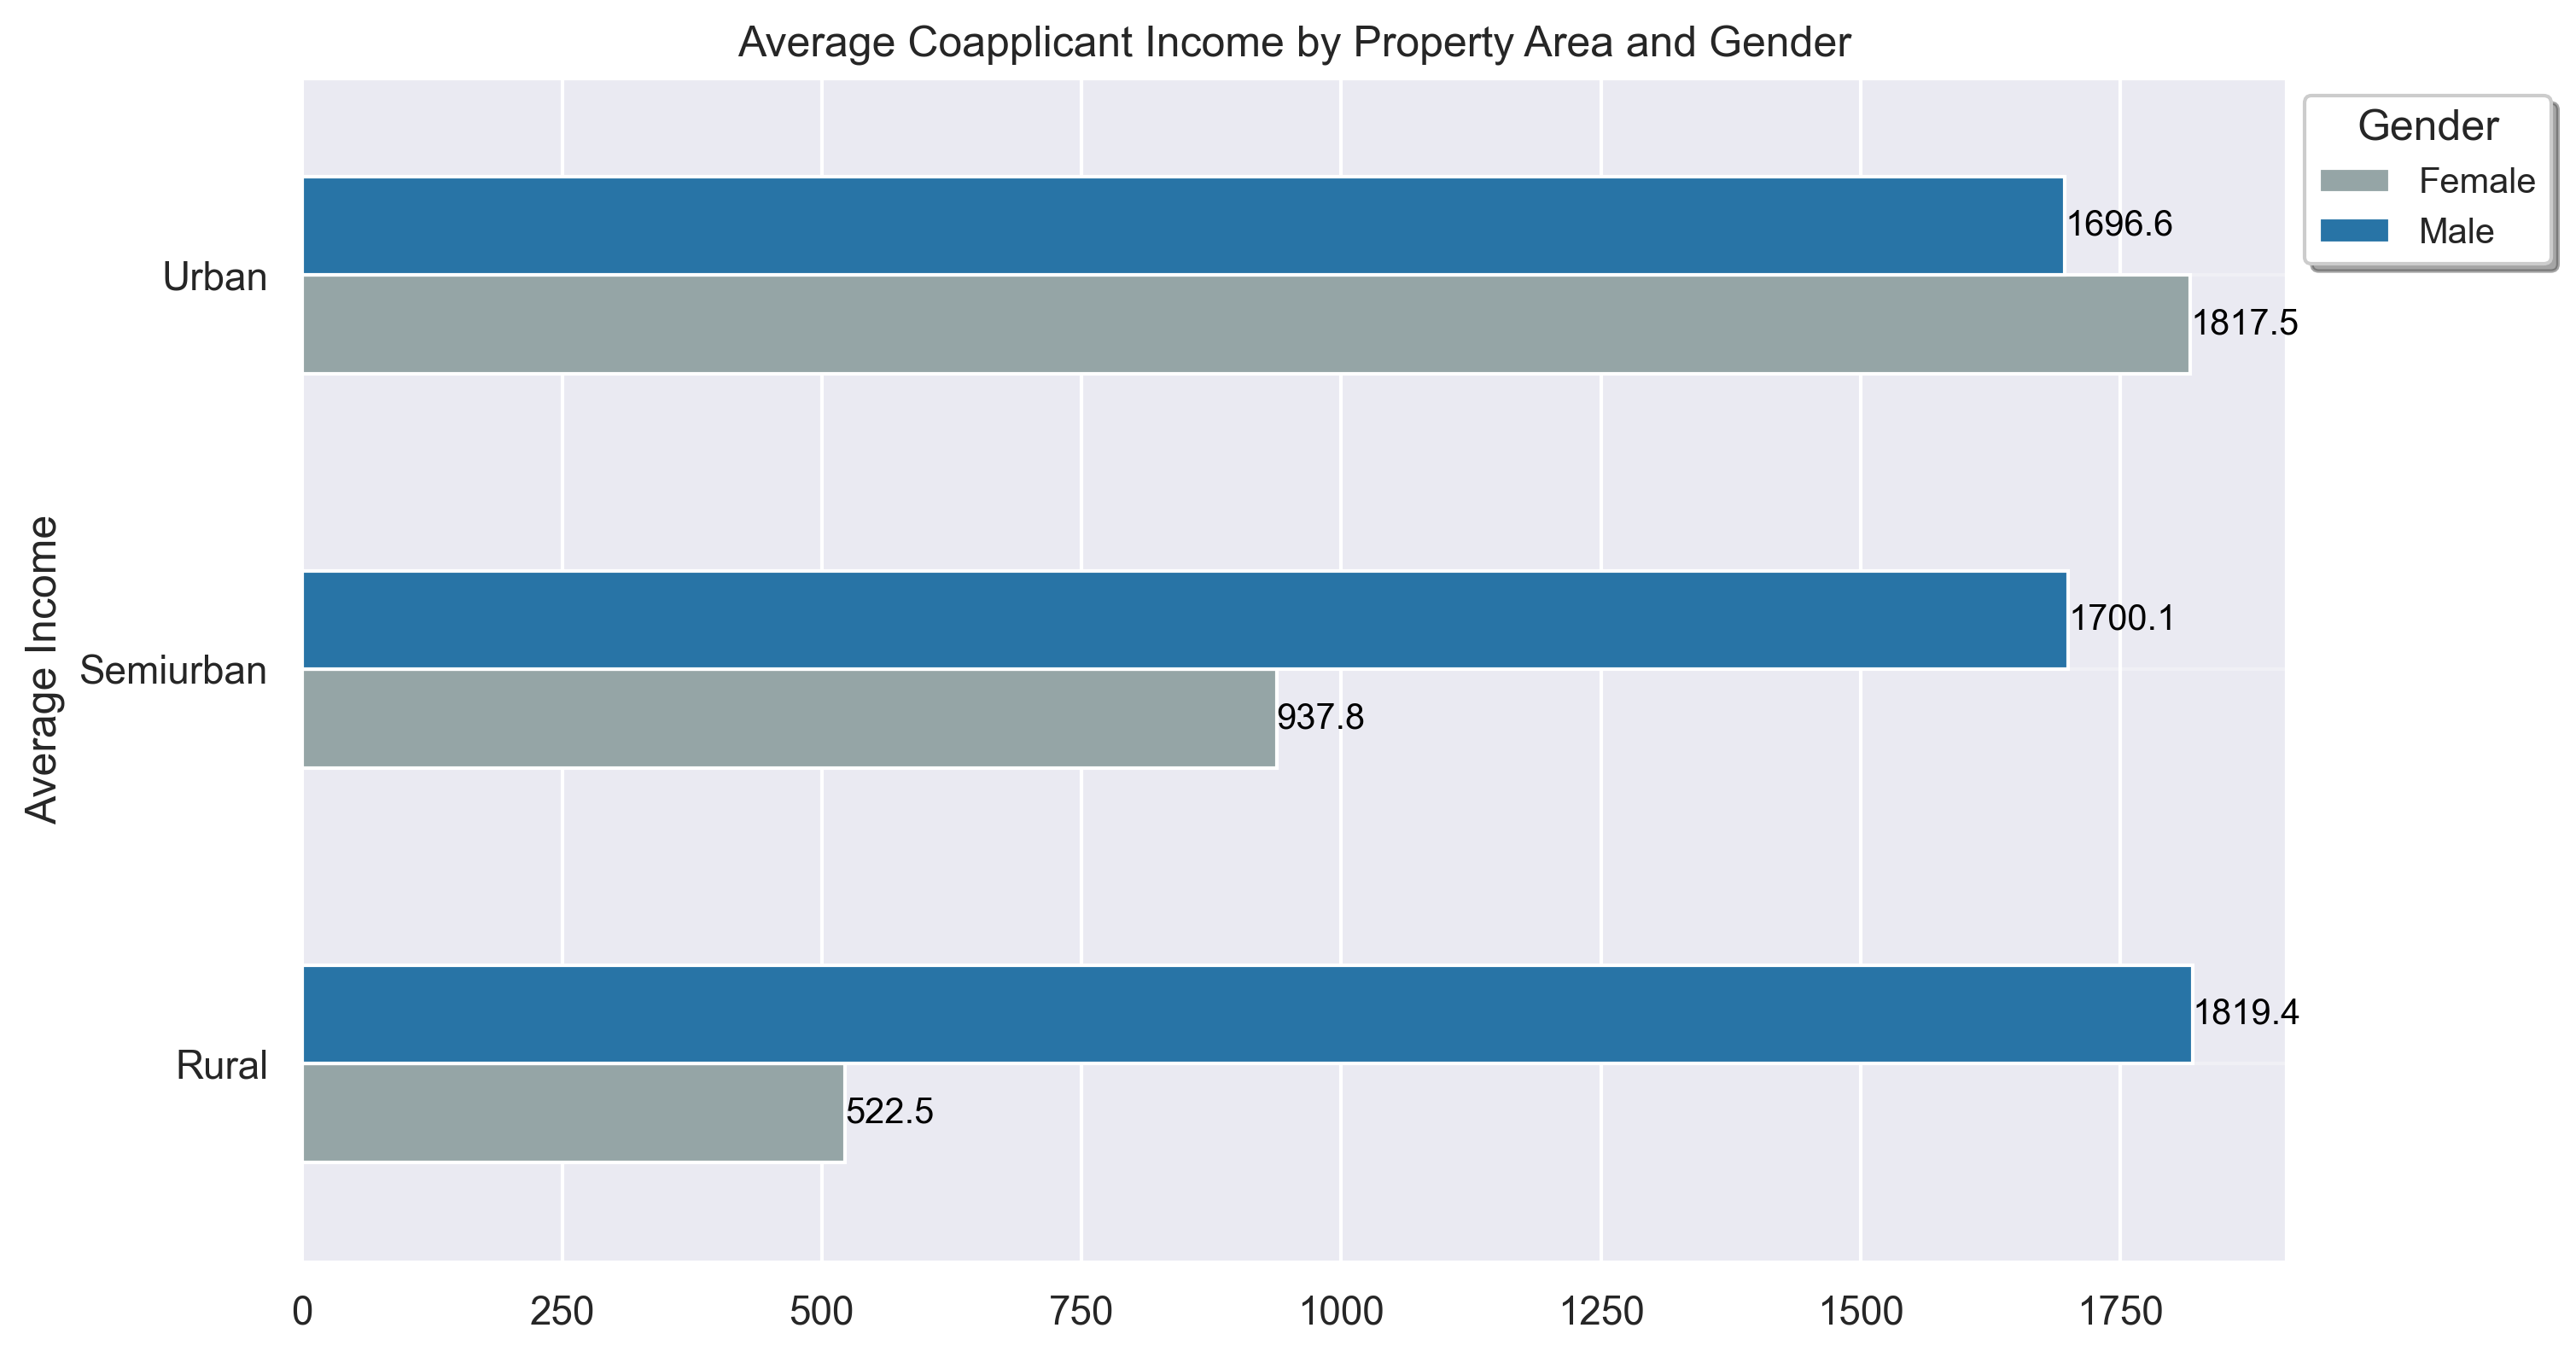

In [38]:
# Calculate MEAN coapplicant income by Property_Area and Gende

income_by_area_gender = pd.crosstab(
    index=loan_approval_df['Property_Area'],
    columns=loan_approval_df['Gender'],
    values=loan_approval_df['CoapplicantIncome'],
    aggfunc='mean'
)

# Plot ABSOLUTE averages (no normalization)
ax = income_by_area_gender.plot(
    kind='barh',
    figsize=(10, 6),
    color=["#95A5A6","#2874A6"],  # Coral/teal for gender
    title='Average Coapplicant Income by Property Area and Gender',
    ylabel='Average Income'
)
## legend  
plt.legend( 
    loc="best",
    title="Gender", 
    title_fontsize=12,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True, 
    bbox_to_anchor=(1,1), 
    facecolor="white"

)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge',fontsize=10, color='black')
for spine in ["bottom","left"]:
    ax.spines[spine].set_visible(False)

plt.grid(axis='y', alpha=0.3)
plt.show()

### **SECTION C:** **STATISTICAL ANALYSIS**

In [39]:
## encoding the categorical variables
loan_approval_df['Loan_Status'] = loan_approval_df['Loan_Status'].map({'Y':1,'N':0})

##### **Logit Model**

In [40]:
## creating a logistic regression model
logit_model = smf.logit(
    formula="Loan_Status ~ ApplicantIncome + Credit_History + C(Education) + C(Gender) + C(Property_Area) + LoanAmount ",
    data=loan_approval_df
).fit()
## printing the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.464544
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 May 2025   Pseudo R-squ.:                  0.2522
Time:                        13:19:01   Log-Likelihood:                -285.23
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 4.593e-38
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.8128      0.523     -5.376      0.

##### **Odd Ratios**

In [41]:
## getting the p-values and exponential values
logit_model.pvalues
logit_model.params
np.exp(logit_model.params)
## getting the odds ratios
odds_ratios = pd.DataFrame(
    np.exp(logit_model.params),
    columns=['Odd Ratios']
)
odds_ratios = odds_ratios.sort_values(by='Odd Ratios', ascending=False)
odds_ratios
## explaining the odds ratios

Odd Ratios
Credit_History                    47.5260
C(Property_Area)[T.Semiurban]      2.4694
C(Gender)[T.Male]                  1.3036
C(Property_Area)[T.Urban]          1.2158
ApplicantIncome                    1.0000
LoanAmount                         0.9978
C(Education)[T.Not Graduate]       0.6997
Intercept                          0.0600

##### **MARGINAL EFFECTS**

In [42]:
## get the marginal effects of the model  
marginal_effects = logit_model.get_margeff(method='dydx',at='overall')
marginal_effects.summary_frame()

dy/dx  Std. Err.       z  Pr(>|z|)  \
C(Education)[T.Not Graduate]  -0.0527     0.0374 -1.4083    0.1590   
C(Gender)[T.Male]              0.0391     0.0401  0.9759    0.3291   
C(Property_Area)[T.Semiurban]  0.1335     0.0386  3.4607    0.0005   
C(Property_Area)[T.Urban]      0.0288     0.0371  0.7776    0.4368   
ApplicantIncome                0.0000     0.0000  0.8763    0.3809   
Credit_History                 0.5701     0.0484 11.7854    0.0000   
LoanAmount                    -0.0003     0.0002 -1.4995    0.1337   

                               Conf. Int. Low  Cont. Int. Hi.  
C(Education)[T.Not Graduate]          -0.1261          0.0206  
C(Gender)[T.Male]                     -0.0395          0.1178  
C(Property_Area)[T.Semiurban]          0.0579          0.2090  
C(Property_Area)[T.Urban]             -0.0439          0.1016  
ApplicantIncome                       -0.0000          0.0000  
Credit_History                         0.4753          0.6649  
LoanAmount                            -0.0008          0.0001

In [43]:
## stating the hypothesis  
hypothesis = "C(Property_Area)[T.Semiurban] = C(Property_Area)[T.Urban] = 0"
## performing the test via the f test
f_test = logit_model.f_test(hypothesis)
## printing the f test result
print(f_test)


<F test: F=6.238864799481236, p=0.00207975954818406, df_denom=606, df_num=2>


#### Probit Model

In [44]:
## The Probit Model
probit_model = smf.probit(
    formula="Loan_Status ~ ApplicantIncome + Credit_History + C(Education) + C(Gender) + C(Property_Area) + LoanAmount ",
    data=loan_approval_df)
probit_model = probit_model.fit()
## printing the summary of the model
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.464550
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                         Probit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 May 2025   Pseudo R-squ.:                  0.2522
Time:                        13:19:02   Log-Likelihood:                -285.23
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 4.609e-38
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.6027      0.277     -5.783      0.

In [45]:
## getting the p-values and exponential values
probit_model.pvalues
probit_model.params
np.exp(probit_model.params)
## getting the odds ratios
odds_ratios = pd.DataFrame(
    np.exp(probit_model.params),
    columns=['Odd Ratios']
)
odds_ratios = odds_ratios.sort_values(by='Odd Ratios', ascending=False)
odds_ratios

Odd Ratios
Credit_History                     9.5014
C(Property_Area)[T.Semiurban]      1.6604
C(Gender)[T.Male]                  1.1634
C(Property_Area)[T.Urban]          1.1147
ApplicantIncome                    1.0000
LoanAmount                         0.9987
C(Education)[T.Not Graduate]       0.8102
Intercept                          0.2014

In [46]:
##g getting the marginal effects of the model
marginal_effects = probit_model.get_margeff(method='dydx',at='overall')
marginal_effects.summary_frame()
#

dy/dx  Std. Err.       z  Pr(>|z|)  \
C(Education)[T.Not Graduate]  -0.0546     0.0380 -1.4369    0.1507   
C(Gender)[T.Male]              0.0392     0.0404  0.9702    0.3320   
C(Property_Area)[T.Semiurban]  0.1315     0.0378  3.4778    0.0005   
C(Property_Area)[T.Urban]      0.0282     0.0381  0.7389    0.4600   
ApplicantIncome                0.0000     0.0000  0.8353    0.4035   
Credit_History                 0.5839     0.0403 14.4997    0.0000   
LoanAmount                    -0.0003     0.0002 -1.4636    0.1433   

                               Conf. Int. Low  Cont. Int. Hi.  
C(Education)[T.Not Graduate]          -0.1290          0.0199  
C(Gender)[T.Male]                     -0.0400          0.1185  
C(Property_Area)[T.Semiurban]          0.0574          0.2056  
C(Property_Area)[T.Urban]             -0.0465          0.1029  
ApplicantIncome                       -0.0000          0.0000  
Credit_History                         0.5049          0.6628  
LoanAmount                            -0.0008          0.0001

In [47]:
## Compare logit and probit models using AIC and BIC
comparison_results = pd.DataFrame({
	"Model": ["Logit", "Probit"],
	"AIC": [logit_model.aic, probit_model.aic],
	"BIC": [logit_model.bic, probit_model.bic]
})

## Display the comparison results
comparison_results

Model      AIC      BIC
0   Logit 586.4604 621.8204
1  Probit 586.4676 621.8275

In [48]:
## comparing marginal effects in logit and probit models
logit_marginal_effects = logit_model.get_margeff(method='dydx', at='overall')    
probit_marginal_effects = probit_model.get_margeff(method='dydx', at='overall')
## creating a dataframe for the marginal effects
marginal_effects_df = pd.DataFrame({
    "Variable": logit_marginal_effects.summary_frame().index,
    "Logit_Marginal_Effect": logit_marginal_effects.margeff,
    "Probit_Marginal_Effect": probit_marginal_effects.margeff
})
## Display the marginal effects
marginal_effects_df

Variable  Logit_Marginal_Effect  \
0   C(Education)[T.Not Graduate]                -0.0527   
1              C(Gender)[T.Male]                 0.0391   
2  C(Property_Area)[T.Semiurban]                 0.1335   
3      C(Property_Area)[T.Urban]                 0.0288   
4                ApplicantIncome                 0.0000   
5                 Credit_History                 0.5701   
6                     LoanAmount                -0.0003   

   Probit_Marginal_Effect  
0                 -0.0546  
1                  0.0392  
2                  0.1315  
3                  0.0282  
4                  0.0000  
5                  0.5839  
6                 -0.0003

#### **COMPARING MEANS USING ANOVA**

In [49]:
## perfrom ANOVA test
results = pg.anova(
    data=loan_approval_df, 
    dv='ApplicantIncome', 
    between='Property_Area',
    detailed=True,

)
## printing the results
results

Source               SS   DF            MS      F  p-unc    np2
0  Property_Area     6947610.0853    2  3473805.0426 0.0928 0.9114 0.0003
1         Within 22870451562.3968  611 37431180.9532    NaN    NaN    NaN

#### **COMPARING MEANS USING T-TEST**

In [50]:
# Check if both groups have non-zero entries
graduate_income = loan_approval_df[loan_approval_df['Education'] == 'Graduate']['ApplicantIncome']
not_graduate_income = loan_approval_df[loan_approval_df['Education'] == 'Not Graduate']['ApplicantIncome']

if len(graduate_income) > 0 and len(not_graduate_income) > 0:
    # Performing t-test with pingouin
    results = pg.ttest(
        graduate_income,
        not_graduate_income,
        paired=False,
        alternative='two-sided', 
        correction=True 
    )
    # Displaying results
    print(results.to_markdown(index=False))
else:
    print("One of the groups has no entries. Cannot perform t-test.")

|      T |     dof | alternative   |       p-val | CI95%             |   cohen-d |   BF10 |    power |
|-------:|--------:|:--------------|------------:|:------------------|----------:|-------:|---------:|
| 5.7258 | 596.875 | two-sided     | 1.63196e-08 | [1366.66 2793.64] |  0.343647 | 602600 | 0.939639 |


### **Chi2 for Association**

In [51]:
## checking for whether is there a relationship between the categorical columns and the target variable
chi2_results = {}
for column in loan_approval_df.select_dtypes(include=['object']).columns:
    if column != 'Loan_Status':
        contingency_table = pd.crosstab(loan_approval_df[column], loan_approval_df['Loan_Status'])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        chi2_results[column] = (chi2, p)
print("Chi-Squared Test Results:")
for column, (chi2, p) in chi2_results.items():
    print(f"{column}: Chi2 = {chi2:.4f}, p-value = {p:.4f}")

Chi-Squared Test Results:
Gender: Chi2 = 0.1109, p-value = 0.7391
Married: Chi2 = 4.7319, p-value = 0.0296
Dependents: Chi2 = 3.1514, p-value = 0.3689
Education: Chi2 = 4.0915, p-value = 0.0431
Self_Employed: Chi2 = 0.0000, p-value = 1.0000
Property_Area: Chi2 = 12.2976, p-value = 0.0021


### **SECTION D:** **MODEL BUILDING**

In [52]:
## displaying the head of the data   

loan_approval_df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             0.0000    128.0000          360.0000          1.0000   
1          1508.0000    128.0000          360.0000          1.0000   
2             0.0000     66.0000          360.0000          1.0000   
3          2358.0000    120.0000          360.0000          1.0000   
4             0.0000    141.0000          360.0000          1.0000   

  Property_Area  Loan_Status ApplicantIncome_Category  TotalIncome  \
0         Urban            1                     High    5849.0000   
1         Rural            0                     High    6091.0000   
2         Urban            1                  Average    3000.0000   
3         Urban            1                  Average    4941.0000   
4         Urban            1                     High    6000.0000   

  TotalIncome_Category LoanAmount_bin  
0                 High        Average  
1            Very High        Average  
2              Average            Low  
3                 High        Average  
4                 High        Average

In [55]:
## assigning varaivles   
X = loan_approval_df.drop(columns=['Loan_Status','TotalIncome','TotalIncome_Category'])
y= loan_approval_df['Loan_Status']

In [56]:
## Train test split  
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, stratify=y,random_state=42)
## print the shapes  
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((491, 13), (491,), (123, 13), (123,))

In [57]:
## Defining the Catgorical Features and the numerical features 
numerical_features = [ 
    "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"
    
]
## Categorical features  
categorical_features = [ 
    "Gender","Married","Education","Education","Property_Area","ApplicantIncome_Category","LoanAmount_bin","Dependents"
]

In [58]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [59]:
categorical_features

['Gender',
 'Married',
 'Education',
 'Education',
 'Property_Area',
 'ApplicantIncome_Category',
 'LoanAmount_bin',
 'Dependents']

## **CREATING MODEL PIPELINES**

##### **Logistic Regression pipeline**

In [60]:
## Defining the numerical transformers and categorical transofrmers  
numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
lr = LogisticRegression()
## crreating a full pipeline with thee model  
pipeline = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",lr)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline.fit(X_train , y_train)



  File "d:\tong_1\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "D:\python\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python\Lib\subprocess.py", line 1550, in _execute_child
    hp, ht, pid, tid = _wi

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [61]:
## make predictions on the test set    
y_pred = pipeline.predict(X_test)
## checking the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred)
## print  
print(f"The Accuracy of the Logistic Regression Model is: {accuracy_lr * 100:.4f}%")


The Accuracy of the Logistic Regression Model is: 78.8618%


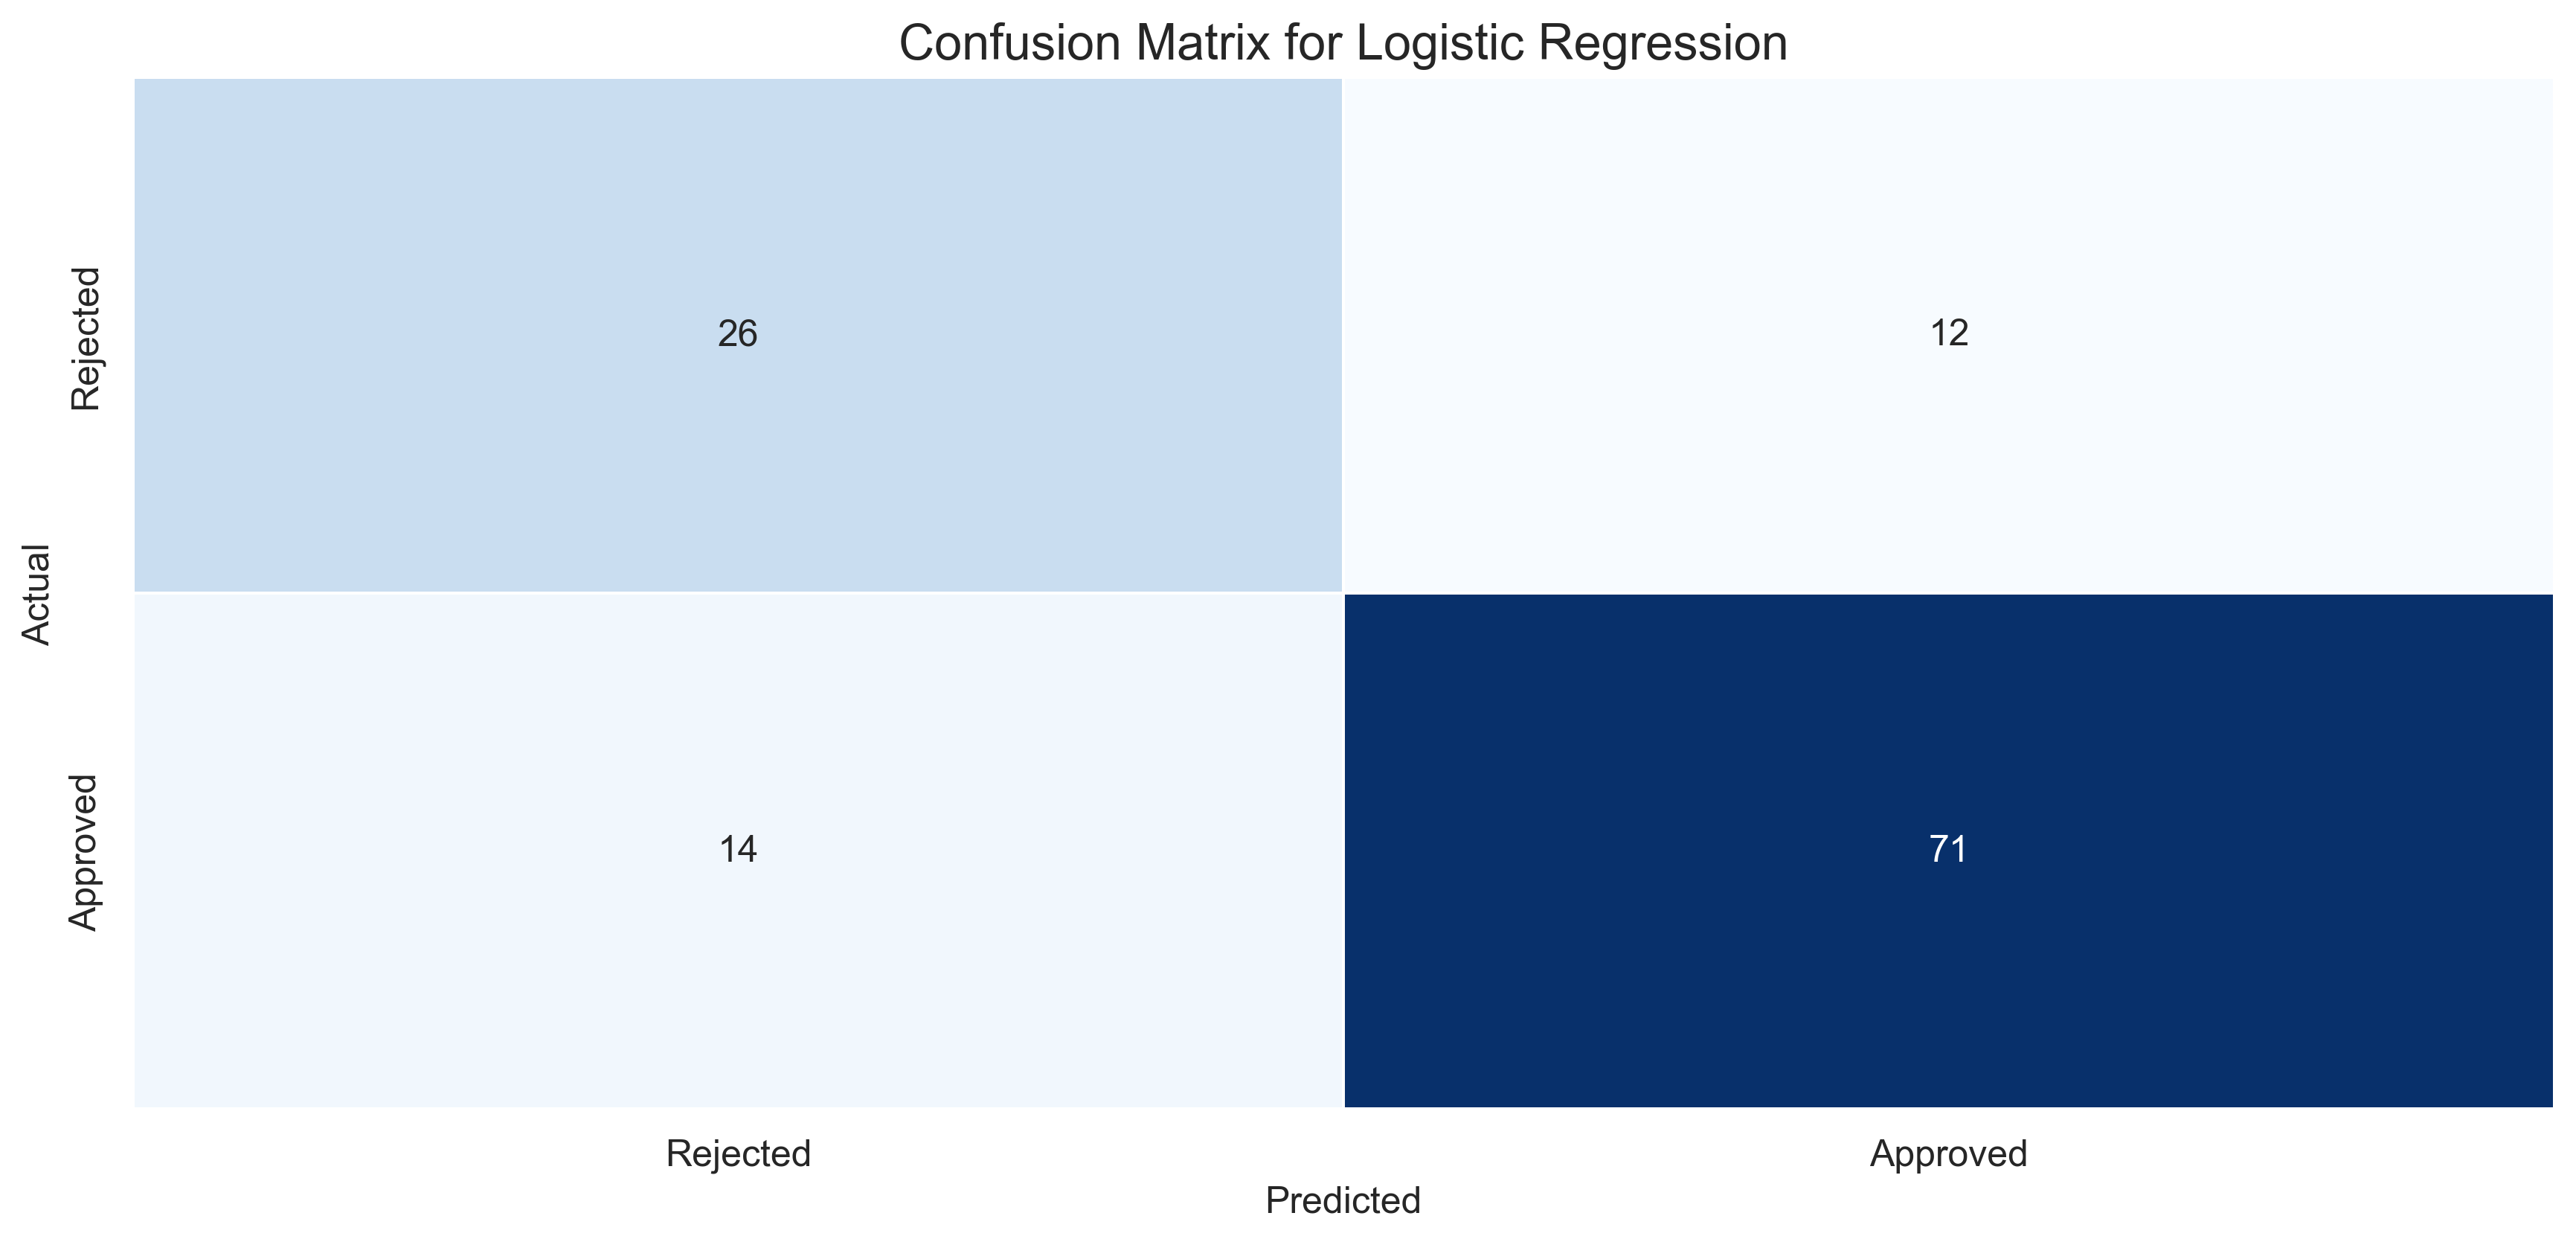

In [62]:
## figure  
plt.figure(figsize=(14, 6))
## plotting the confusion matrix  
confusion__matrix_lr = confusion_matrix(y_test,y_pred)
## plotting the confusion matrix
sns.heatmap(confusion__matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

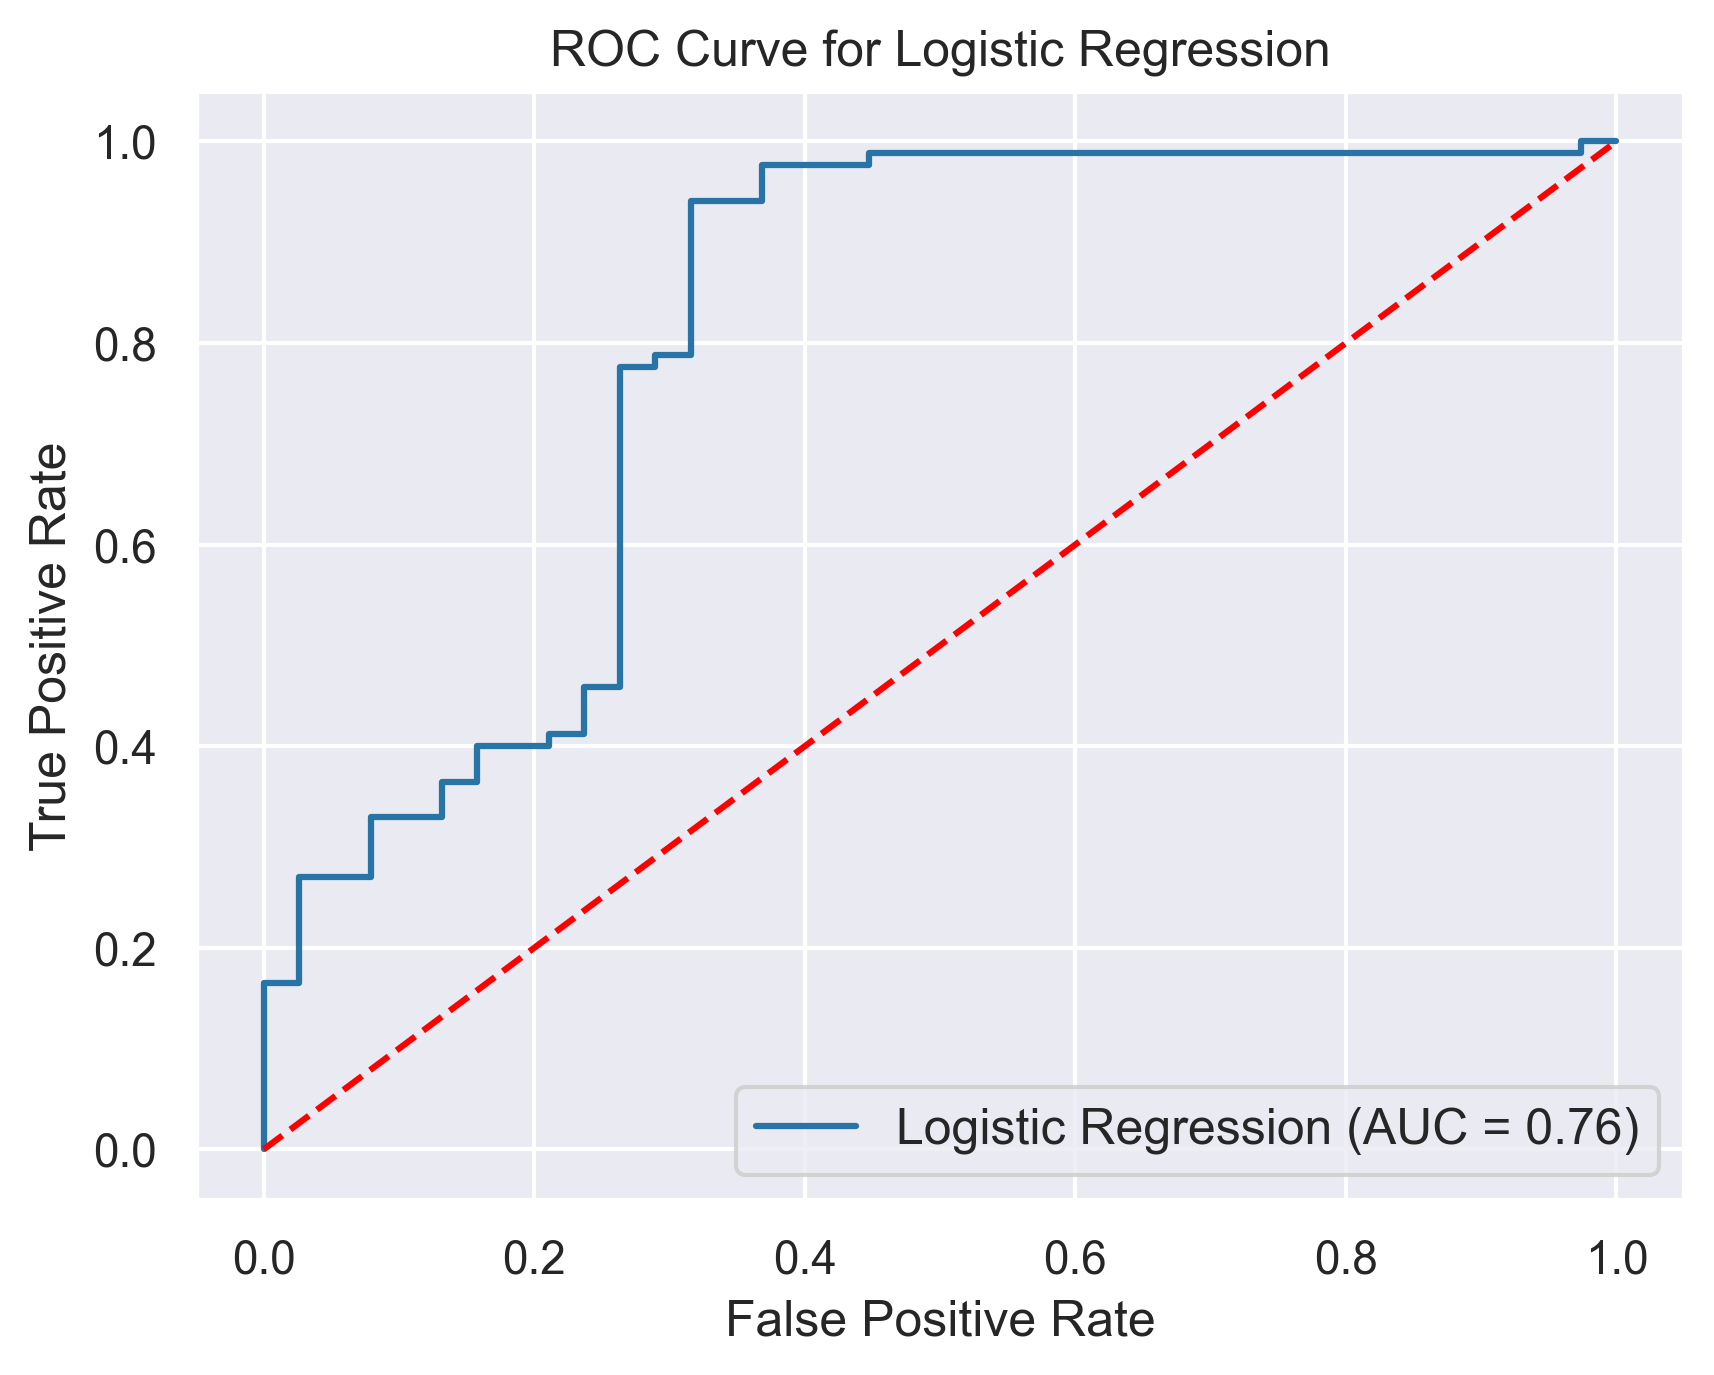

In [63]:
## ROC CURVE 
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

plt.plot(fpr_lr, tpr_lr, color='#2874a6', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Logistic Regression', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

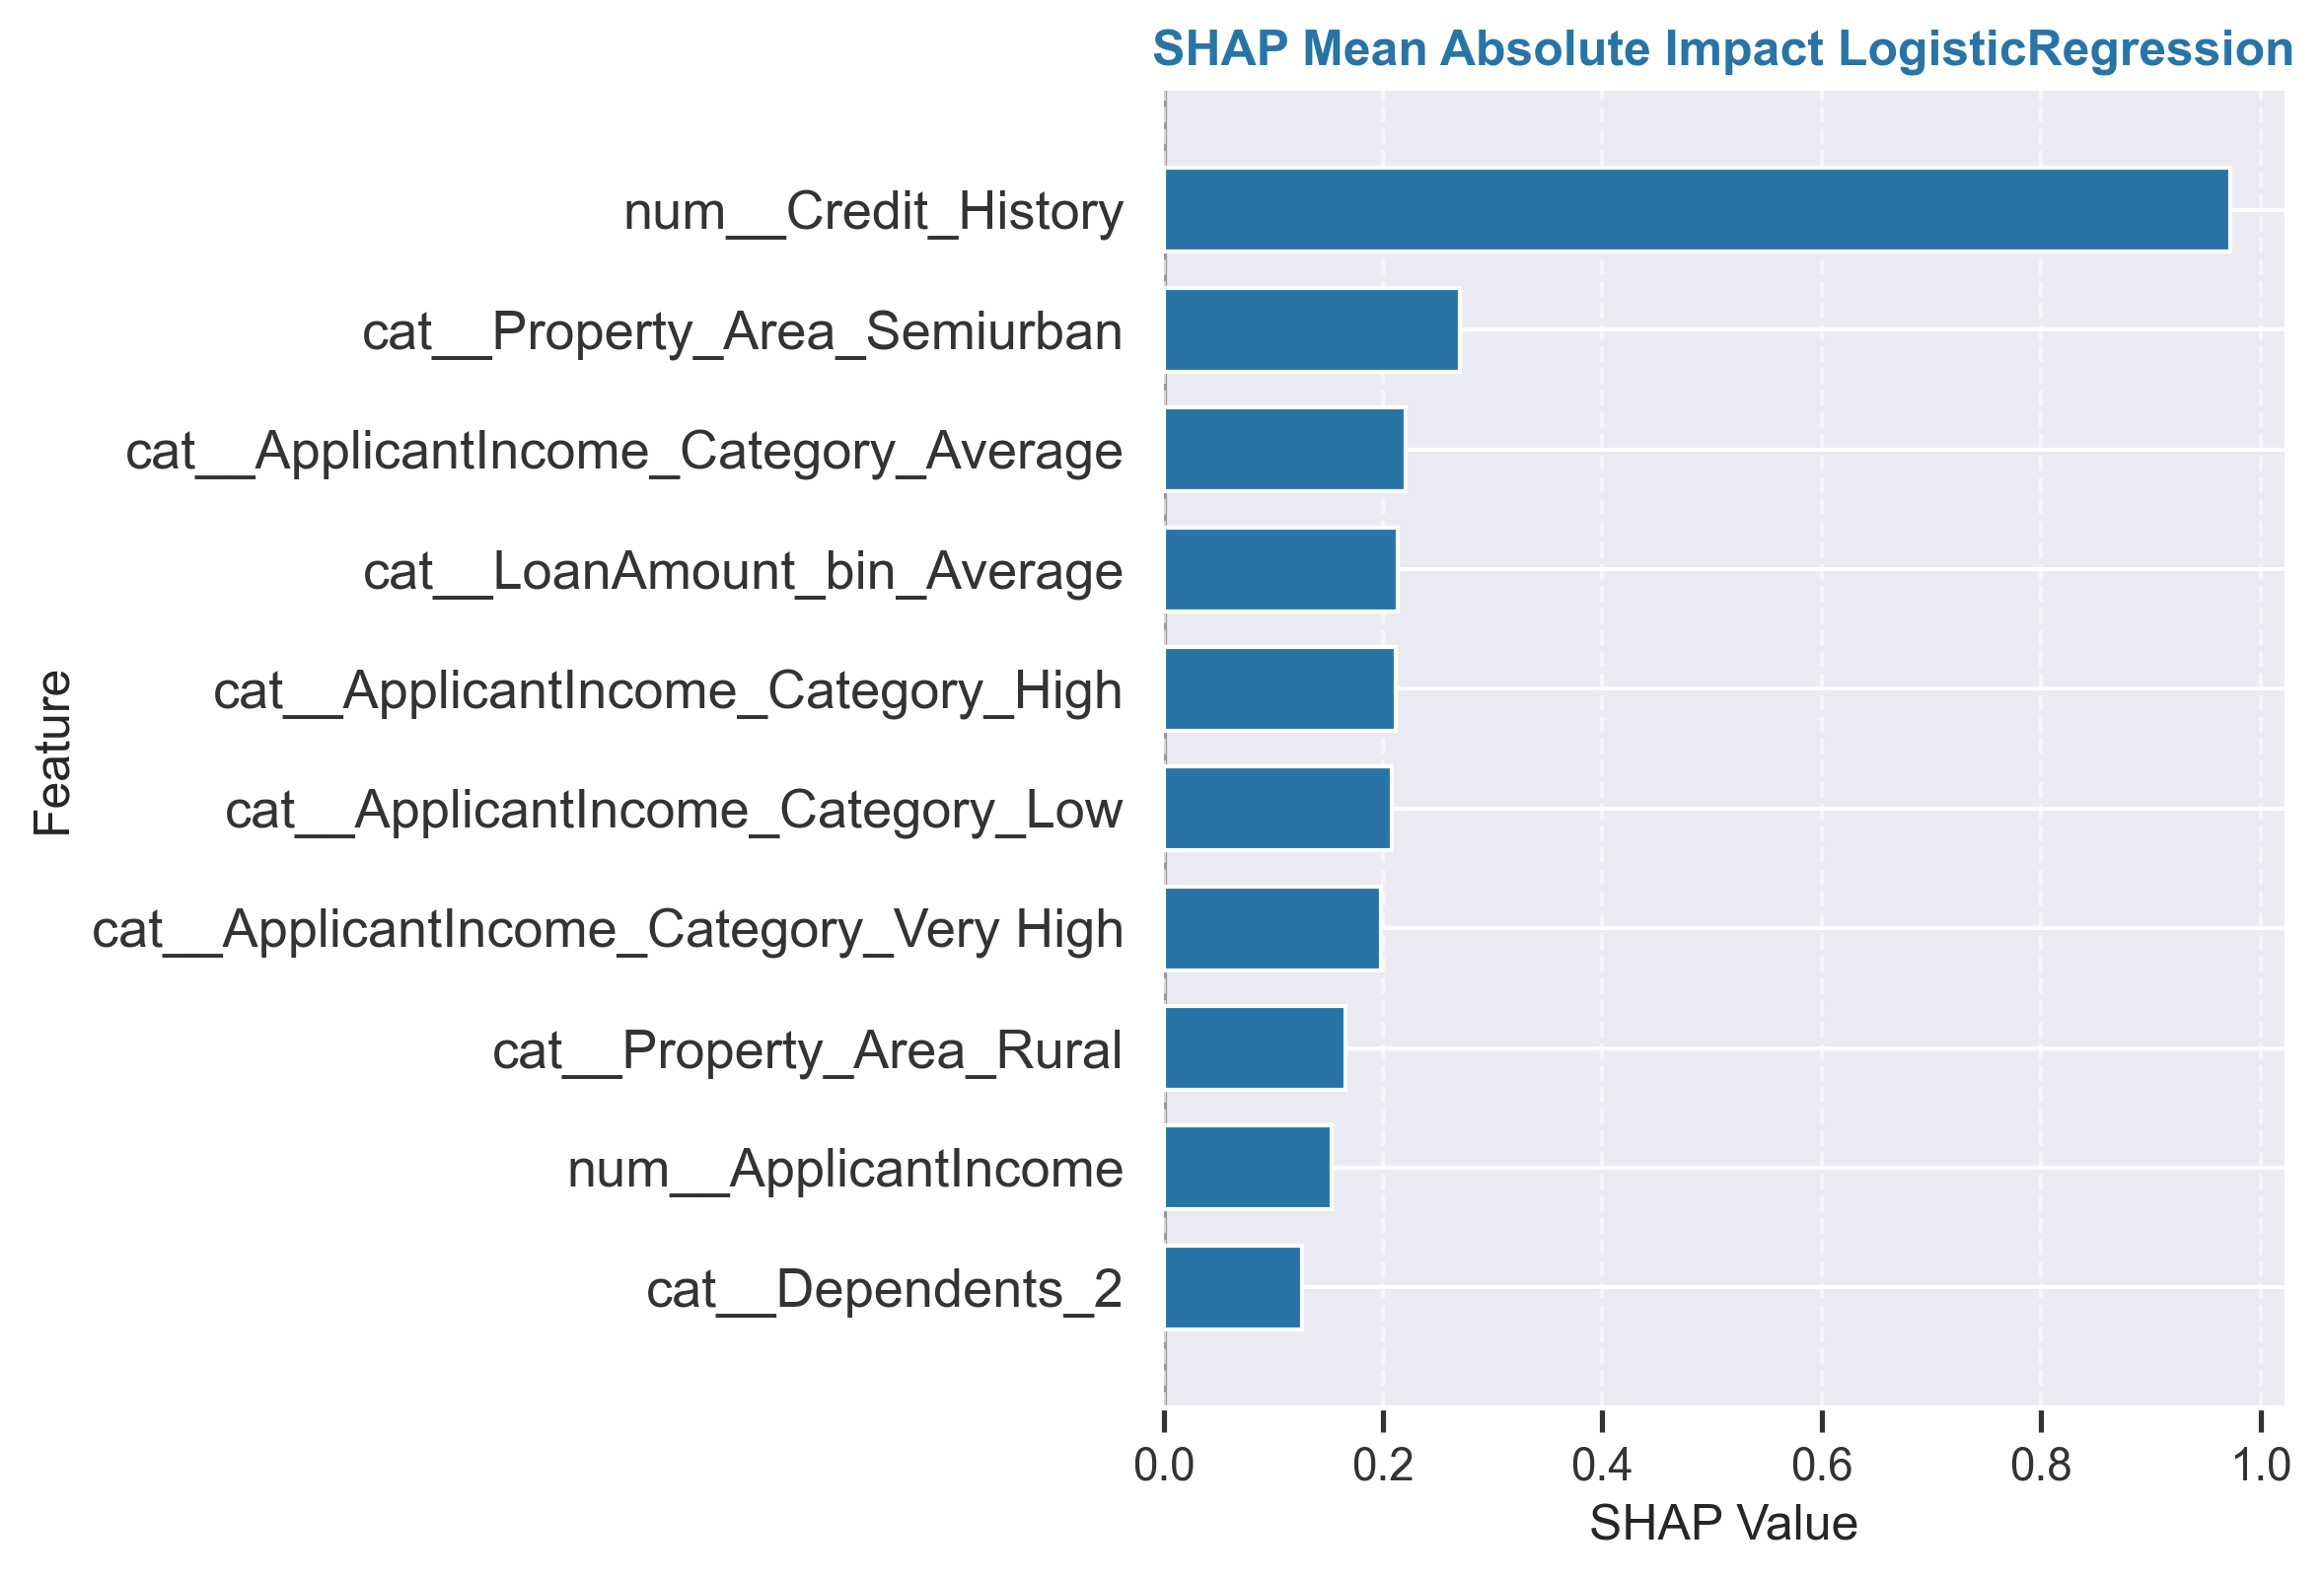

In [64]:
### Feature Importance using SHAP values
# Create SHAP explainer for linear models
explainer = shap.LinearExplainer(pipeline.named_steps['classifier'], pipeline.named_steps['preprocessor'].transform(X_train))

# Compute SHAP values for the test set
shap_values = explainer.shap_values(pipeline.named_steps['preprocessor'].transform(X_test))

# Convert transformed data back to a DataFrame with original feature names
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
transformed_X_test = pd.DataFrame(
	pipeline.named_steps['preprocessor'].transform(X_test),
	columns=transformed_feature_names
)

# Plot SHAP summary plot
fig = shap.summary_plot(shap_values, transformed_X_test, plot_type="bar", max_display=10, show=False,color="#2874a6",title="SHAP Summary Plot for Logistic Regression")
## title 
plt.title("SHAP Mean Absolute Impact LogisticRegression", fontsize=12,fontweight='bold',color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
## showing the values inside the bars  




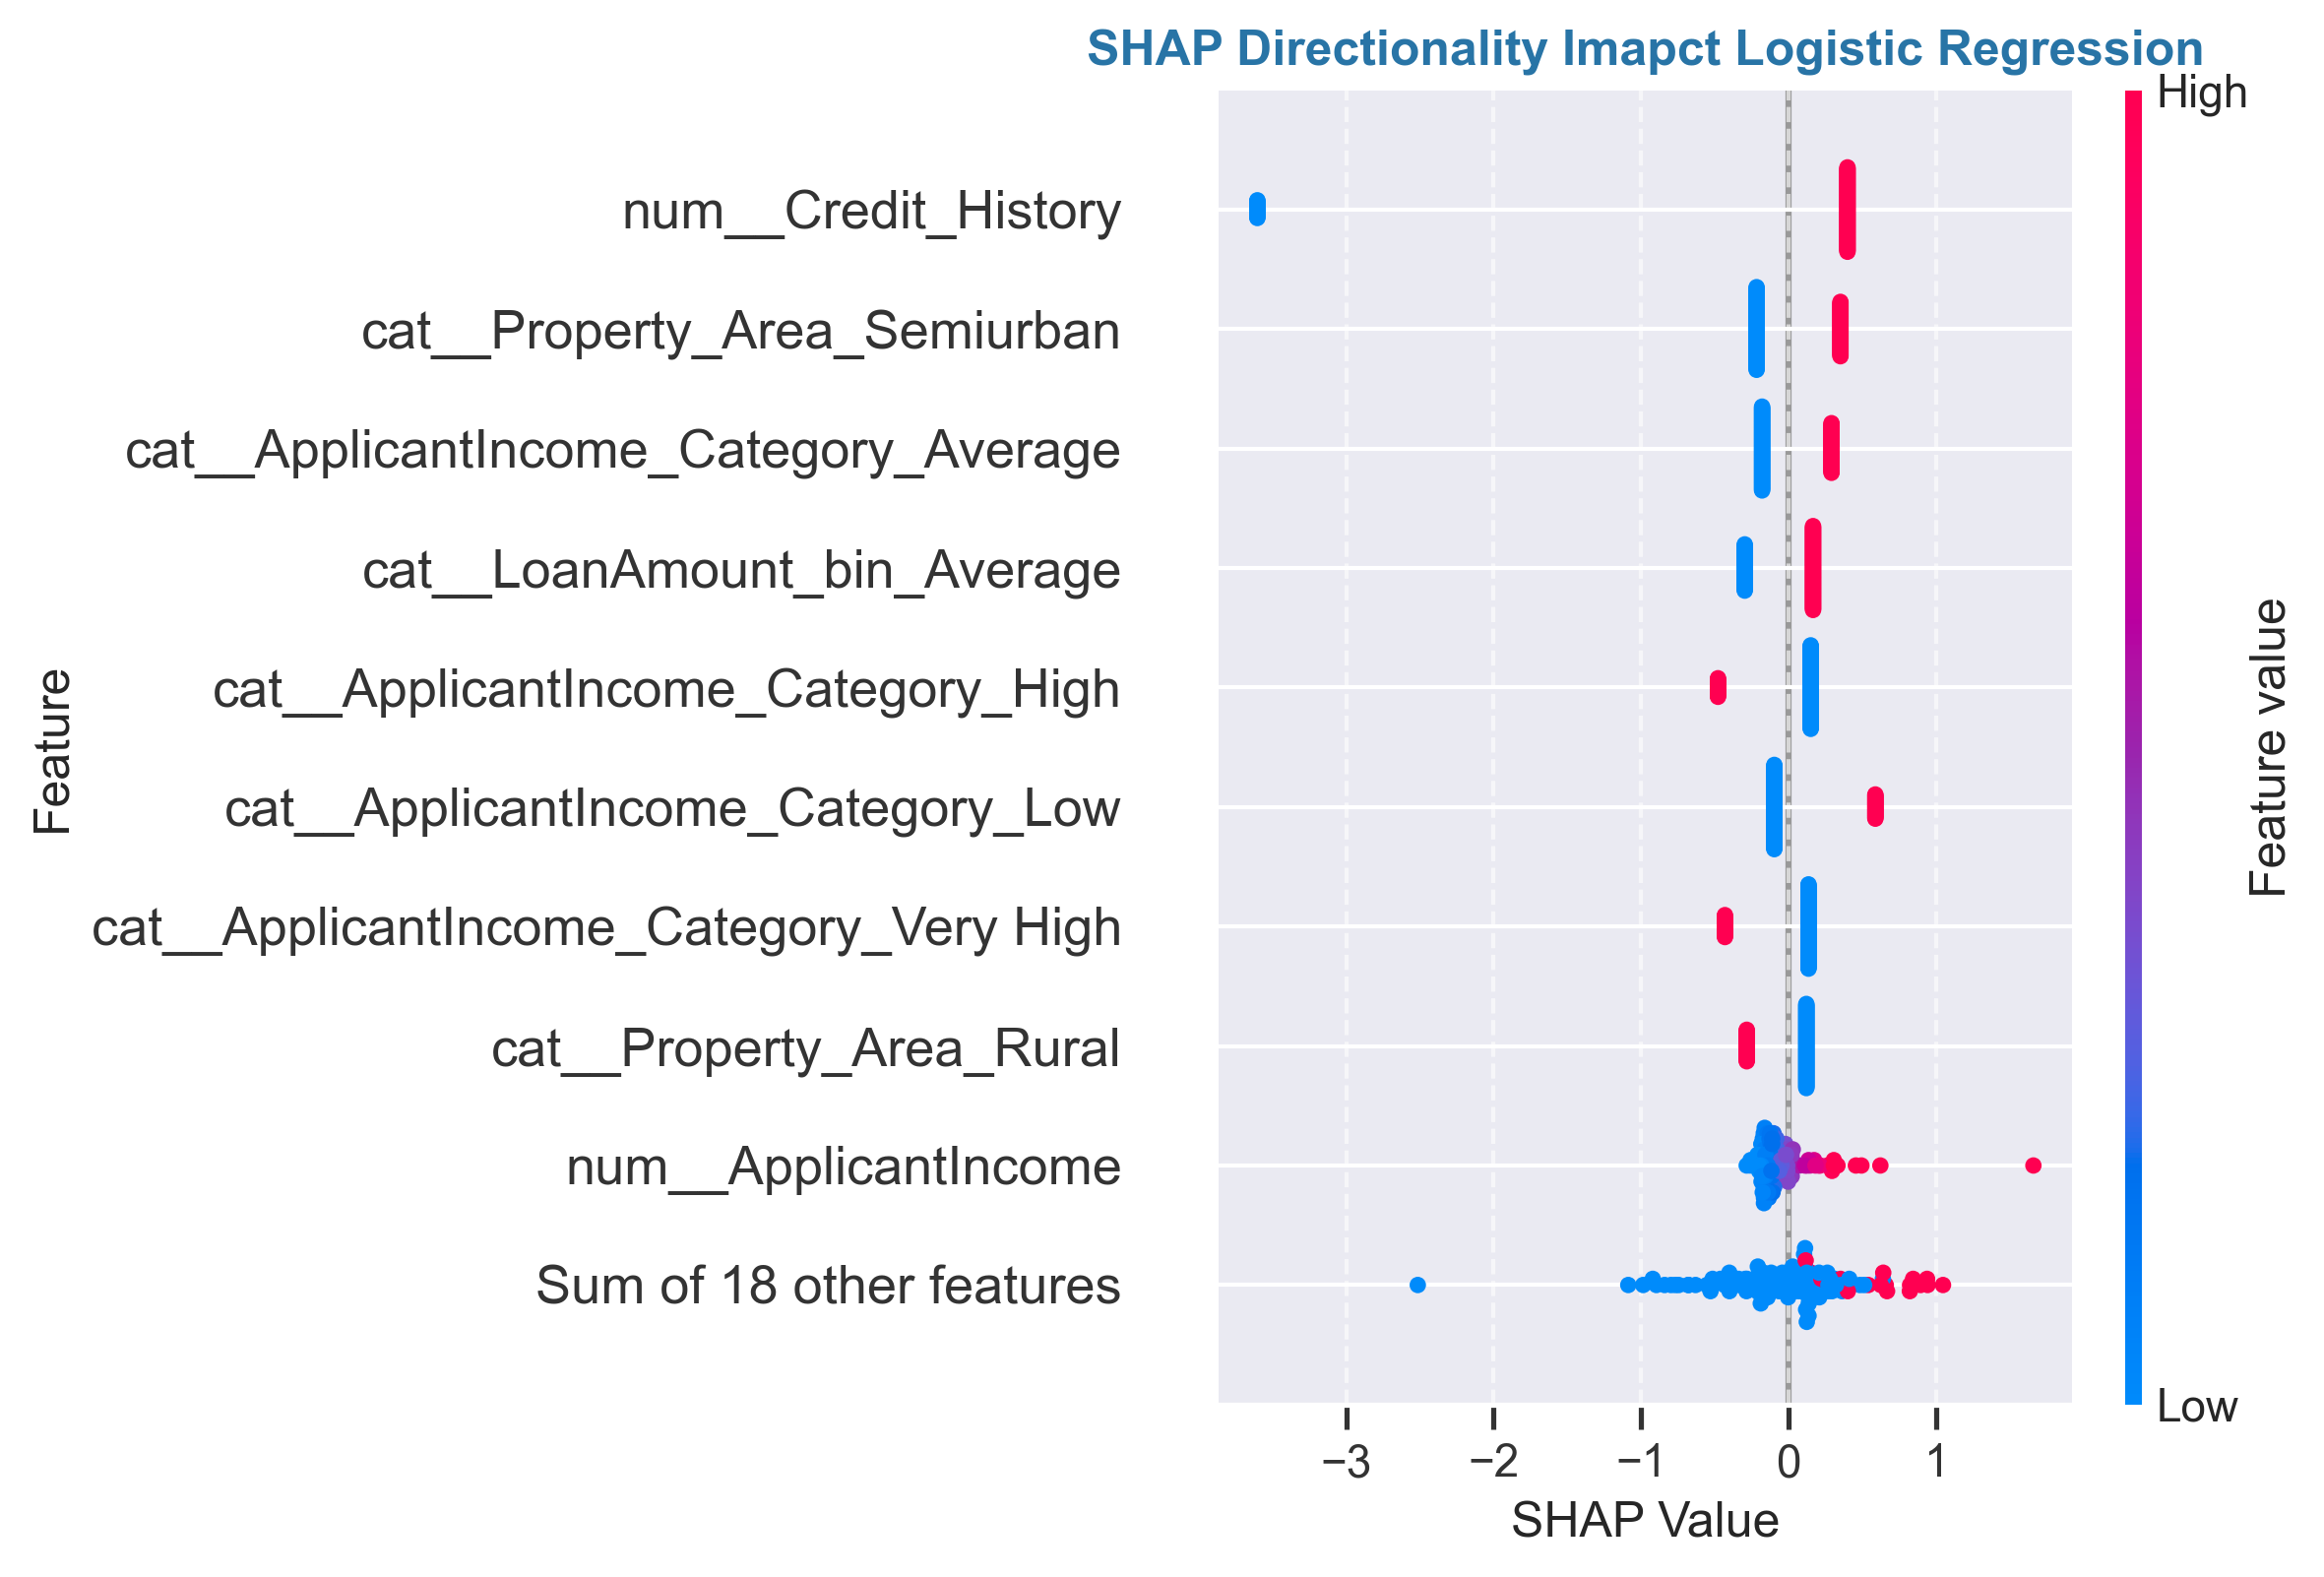

In [65]:
## Convert shap_values and feature names into a SHAP Explanation object
shap_explanation = shap.Explanation(
	values=shap_values,
	feature_names=transformed_feature_names,
	data=transformed_X_test
)

## Beeswarm plot
shap.plots.beeswarm(shap_explanation, max_display=10, show=False)
plt.title("SHAP Directionality Imapct Logistic Regression", fontsize=12, fontweight='bold', color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
transformed_X_test

num__ApplicantIncome  num__CoapplicantIncome  num__LoanAmount  \
0                  0.1158                 -0.5632          -0.3344   
1                 -0.2093                  0.2643           0.4159   
2                  0.6872                 -0.5632           0.3925   
3                 -0.0046                 -0.1111           0.2752   
4                 -0.4960                  1.0466          -0.5454   
..                    ...                     ...              ...   
118               -0.3902                  0.5252          -0.6040   
119               -0.2289                  0.3073           0.1345   
120               -0.3866                  0.3353           0.1345   
121                0.6166                 -0.5632           0.4745   
122               -0.3826                  0.1498          -0.4165   

     num__Loan_Amount_Term  num__Credit_History  cat__Gender_Female  \
0                   0.2807              -2.5156              0.0000   
1                   0.2807               0.3975              1.0000   
2                   0.2807               0.3975              0.0000   
3                   0.2807               0.3975              0.0000   
4                   0.2807               0.3975              1.0000   
..                     ...                  ...                 ...   
118                -0.6418               0.3975              0.0000   
119                 0.2807              -2.5156              0.0000   
120                 0.2807              -2.5156              0.0000   
121                 0.2807               0.3975              0.0000   
122                -2.4868              -2.5156              0.0000   

     cat__Gender_Male  cat__Married_No  cat__Married_Yes  \
0              1.0000           1.0000            0.0000   
1              0.0000           0.0000            1.0000   
2              1.0000           0.0000            1.0000   
3              1.0000           0.0000            1.0000   
4              0.0000           0.0000            1.0000   
..                ...              ...               ...   
118            1.0000           0.0000            1.0000   
119            1.0000           1.0000            0.0000   
120            1.0000           0.0000            1.0000   
121            1.0000           1.0000            0.0000   
122            1.0000           1.0000            0.0000   

     cat__Education_Graduate  cat__Education_Not Graduate  \
0                     1.0000                       0.0000   
1                     1.0000                       0.0000   
2                     1.0000                       0.0000   
3                     1.0000                       0.0000   
4                     1.0000                       0.0000   
..                       ...                          ...   
118                   1.0000                       0.0000   
119                   0.0000                       1.0000   
120                   1.0000                       0.0000   
121                   1.0000                       0.0000   
122                   1.0000                       0.0000   

     cat__Education_Graduate  cat__Education_Not Graduate  \
0                     1.0000                       0.0000   
1                     1.0000                       0.0000   
2                     1.0000                       0.0000   
3                     1.0000                       0.0000   
4                     1.0000                       0.0000   
..                       ...                          ...   
118                   1.0000                       0.0000   
119                   0.0000                       1.0000   
120                   1.0000                       0.0000   
121                   1.0000                       0.0000   
122                   1.0000                       0.0000   

     cat__Property_Area_Rural  cat__Property_Area_Semiurban  \
0                      1.0000                        0.0000  

In [67]:
# ## Force plot for a single prediction
# feature_name = 'num__Credit_History'  
# if feature_name.startswith('cat__'):
#     shap.dependence_plot(feature_name, shap_values, transformed_X_test, x_jitter=0.1, show=False)
# else:
#     shap.dependence_plot(feature_name, shap_values, transformed_X_test, show=False)

# plt.title(f"SHAP Dependence Plot for {feature_name}", fontsize=12, fontweight='bold', color="#2874a6")
# plt.xlabel("Feature Value", fontsize=12)
# plt.ylabel("SHAP Value", fontsize=12)
# plt.grid(axis='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

##### **Xgboost Model Pipeline**

In [68]:


numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
xgboost = XGBClassifier( 
    objective="binary:logistic",
    eval_metric="logloss",  
)
## crreating a full pipeline with thee model  
pipeline_xgb = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",xgboost)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_xgb.fit(X_train , y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('sm...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

The Accuracy of the XGBoost Model is: 82.1138%


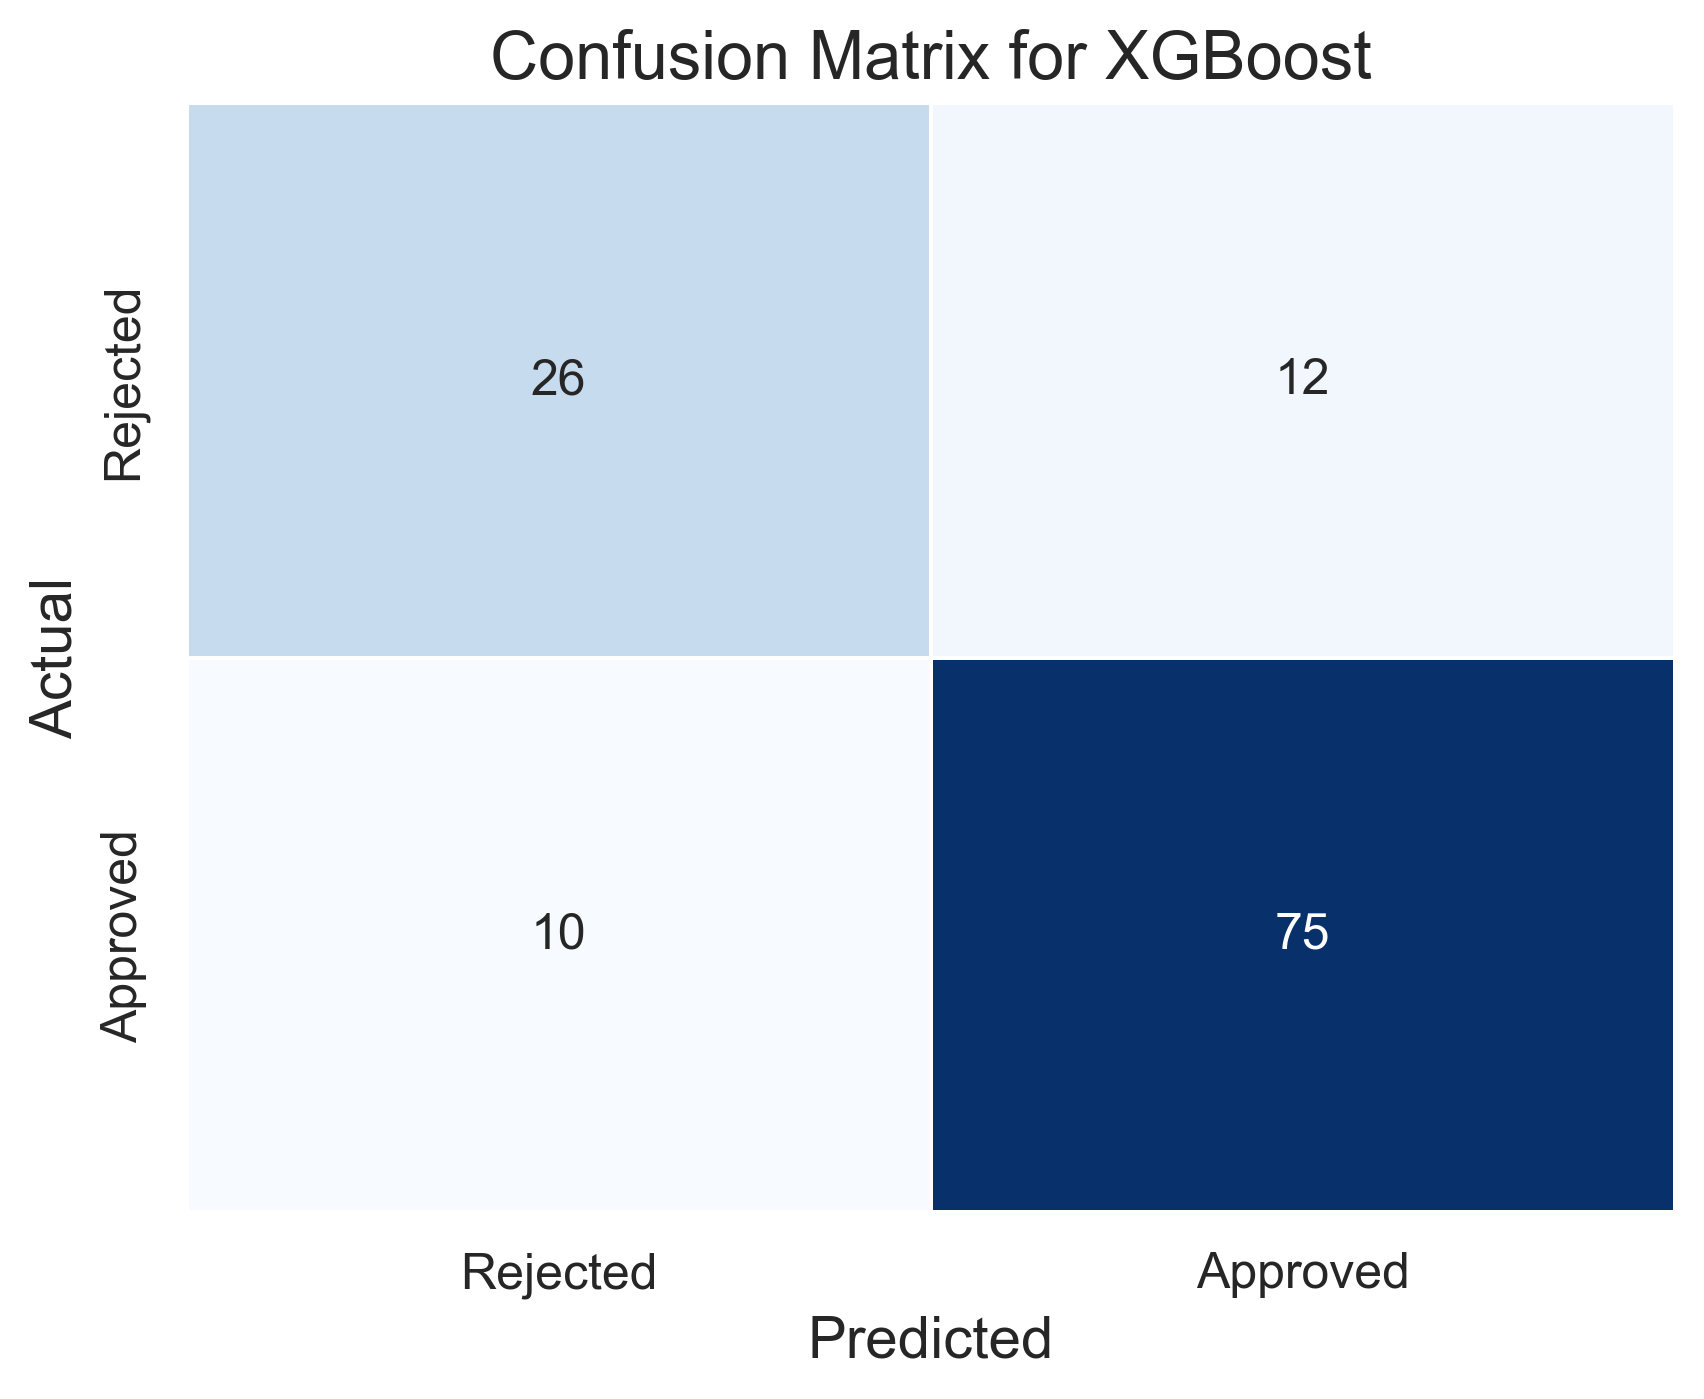

In [69]:
## model evaluation
y_pred_xgb = pipeline_xgb.predict(X_test)
## checking the accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
## print
print(f"The Accuracy of the XGBoost Model is: {accuracy_xgb * 100:.4f}%")
## plotting the confusion matrix
confusion__matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
## plotting the confusion matrix

sns.heatmap(confusion__matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for XGBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

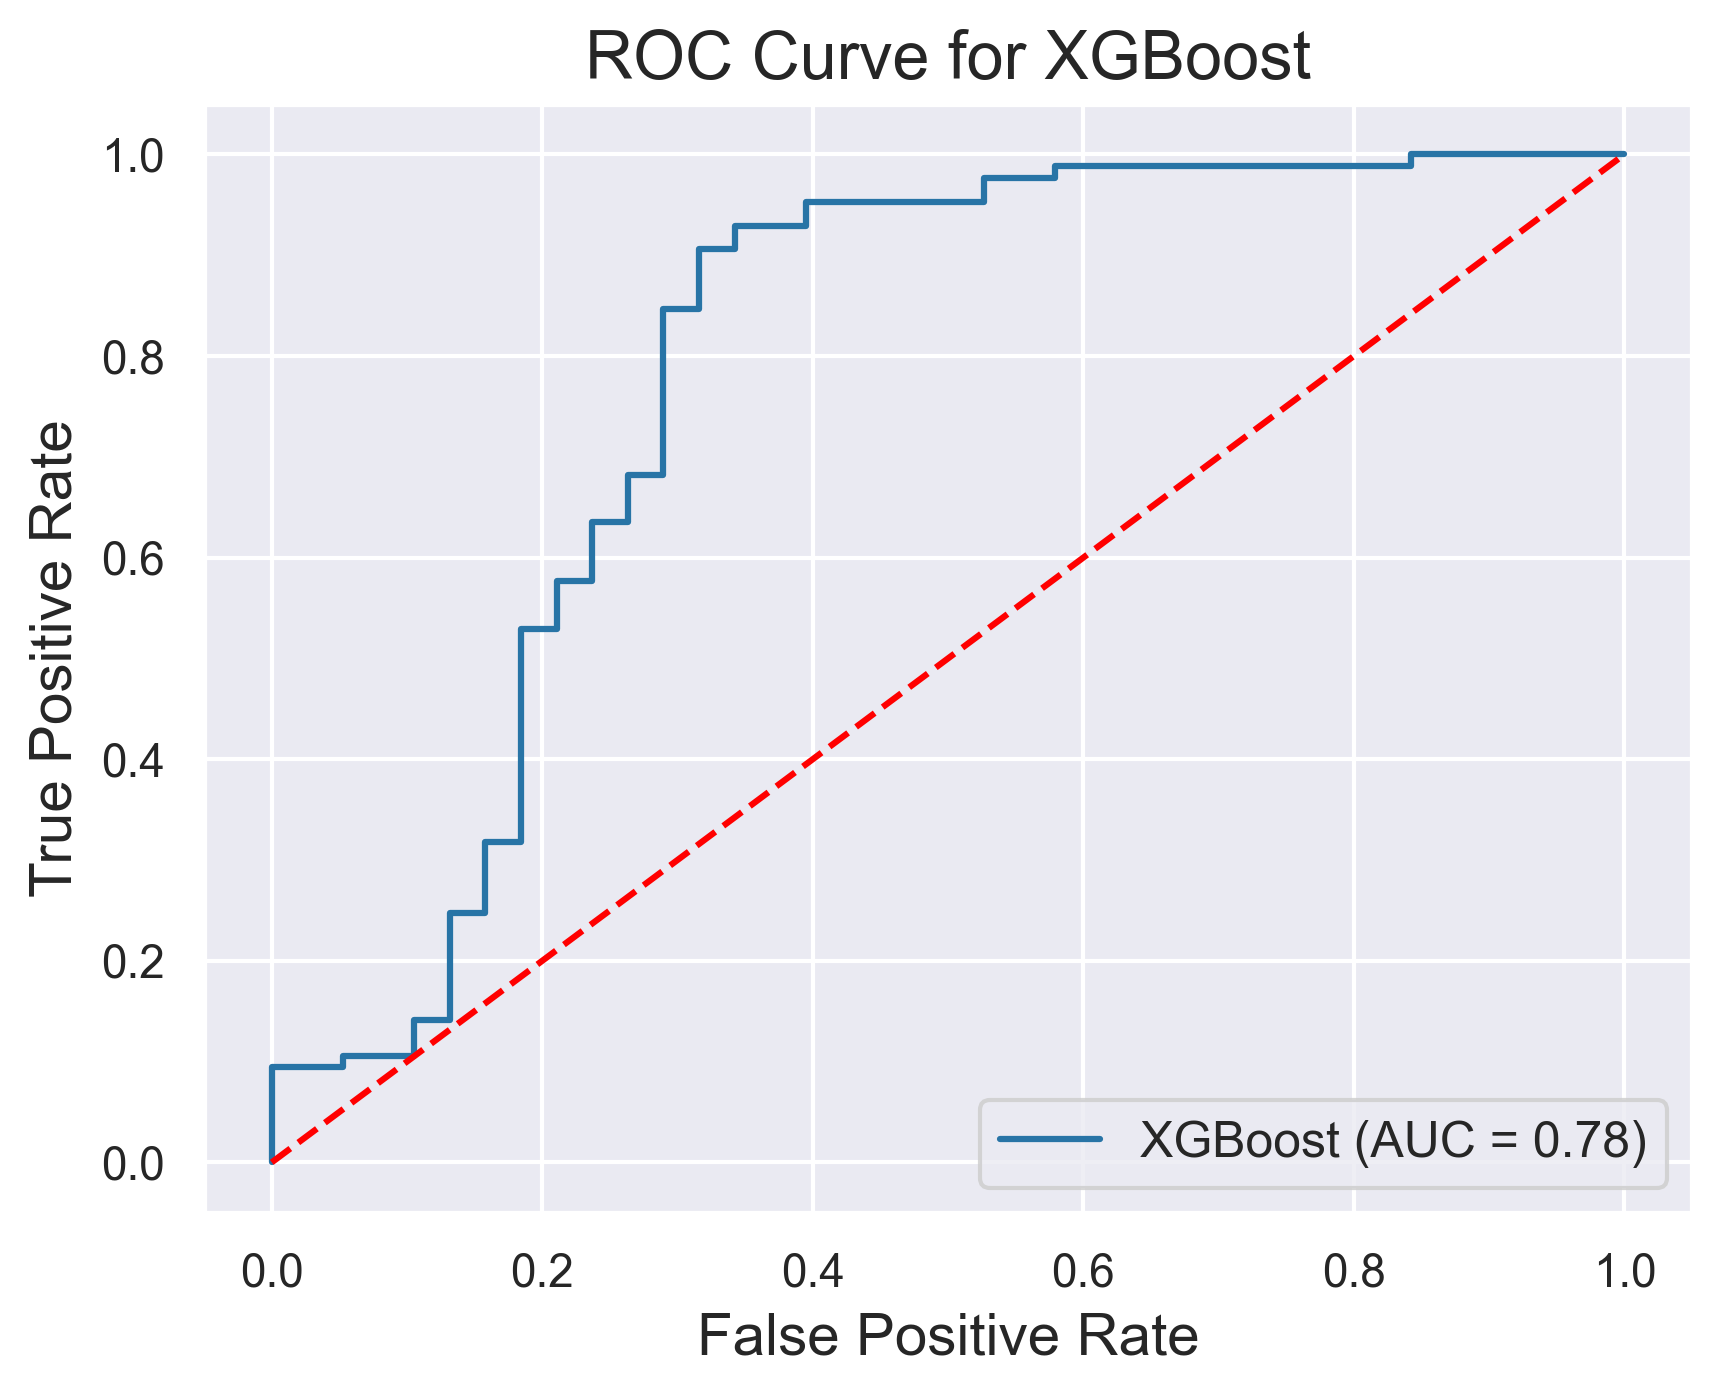

In [70]:
## ROC AUC score
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pipeline_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, color='#2874a6', label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_xgb)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for XGBoost', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


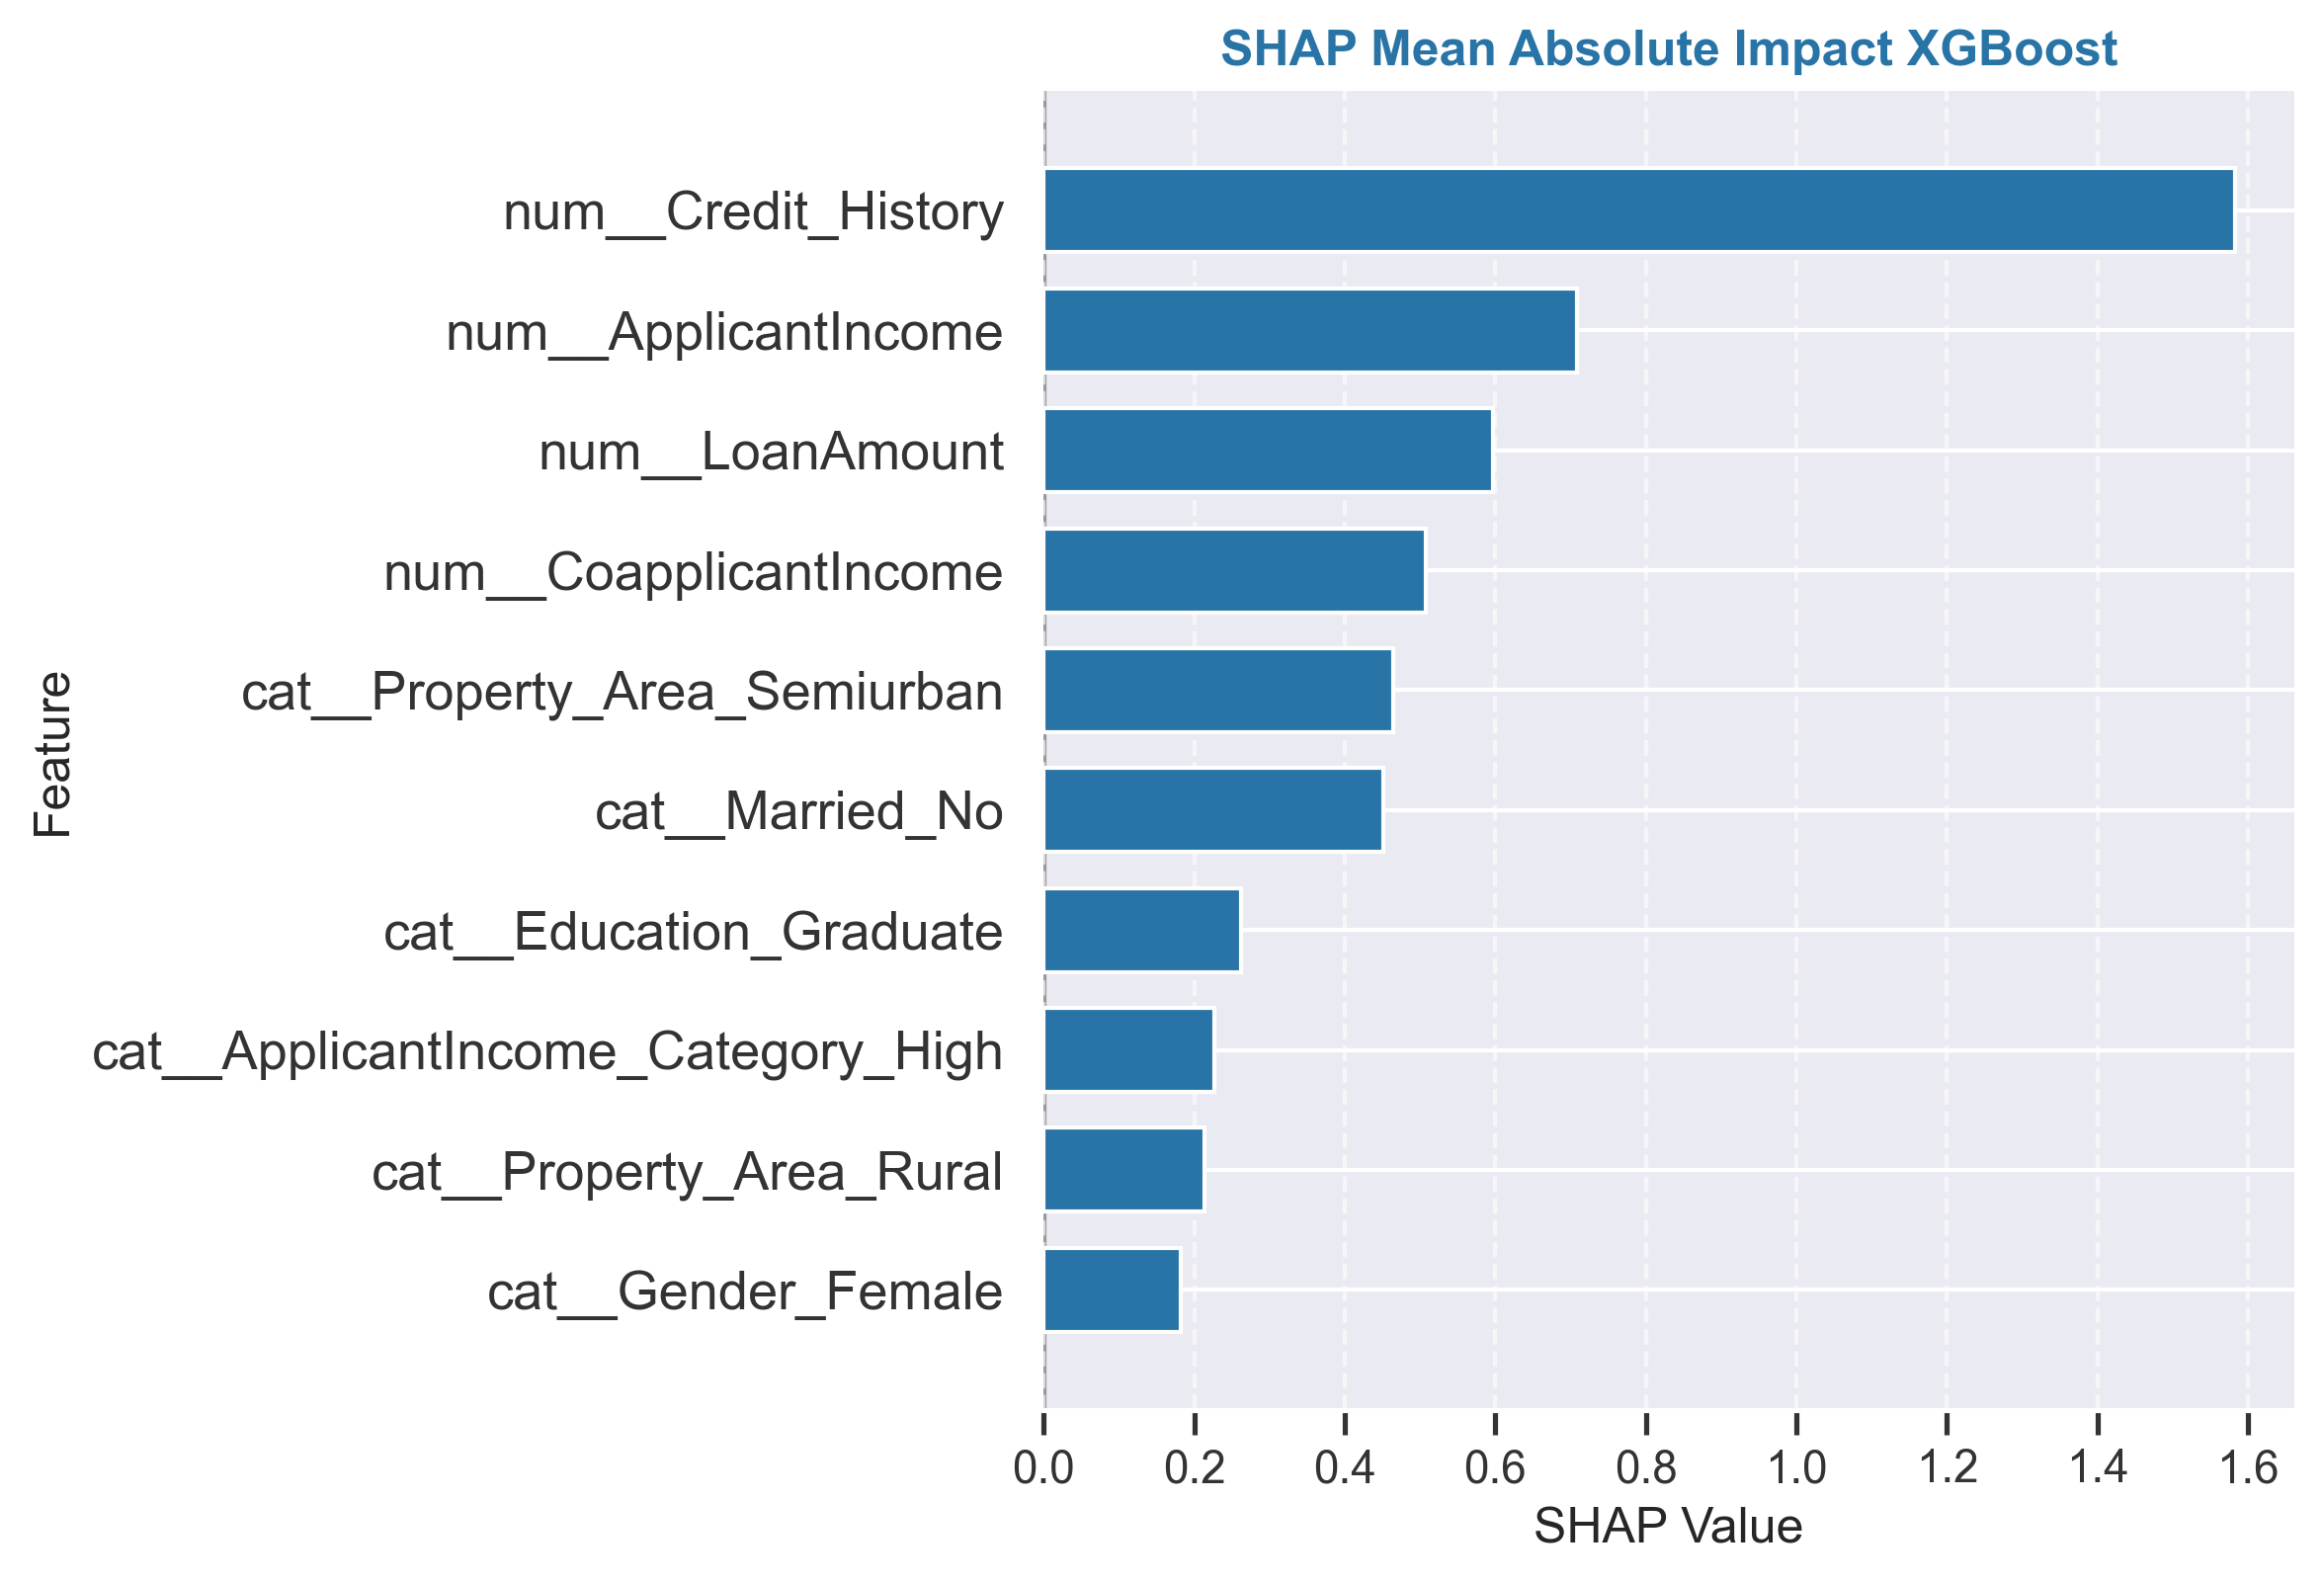

In [102]:
## create shap explainer for using TreeExplainer for XGBoost
explainer_xgb = shap.TreeExplainer(pipeline_xgb.named_steps['classifier'])
# Compute SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(pipeline_xgb.named_steps['preprocessor'].transform(X_test))
# Convert transformed data back to a DataFrame with original feature names
transformed_feature_names_xgb = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()
transformed_X_test_xgb = pd.DataFrame(
    pipeline_xgb.named_steps['preprocessor'].transform(X_test),
    columns=transformed_feature_names_xgb
)
# Plot SHAP summary plot
shap.summary_plot(shap_values_xgb, transformed_X_test_xgb, plot_type="bar", max_display=10, color="#2874a6",show=False)

# Add title and labels
plt.title("SHAP Mean Absolute Impact XGBoost", fontsize=12, fontweight='bold', color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()


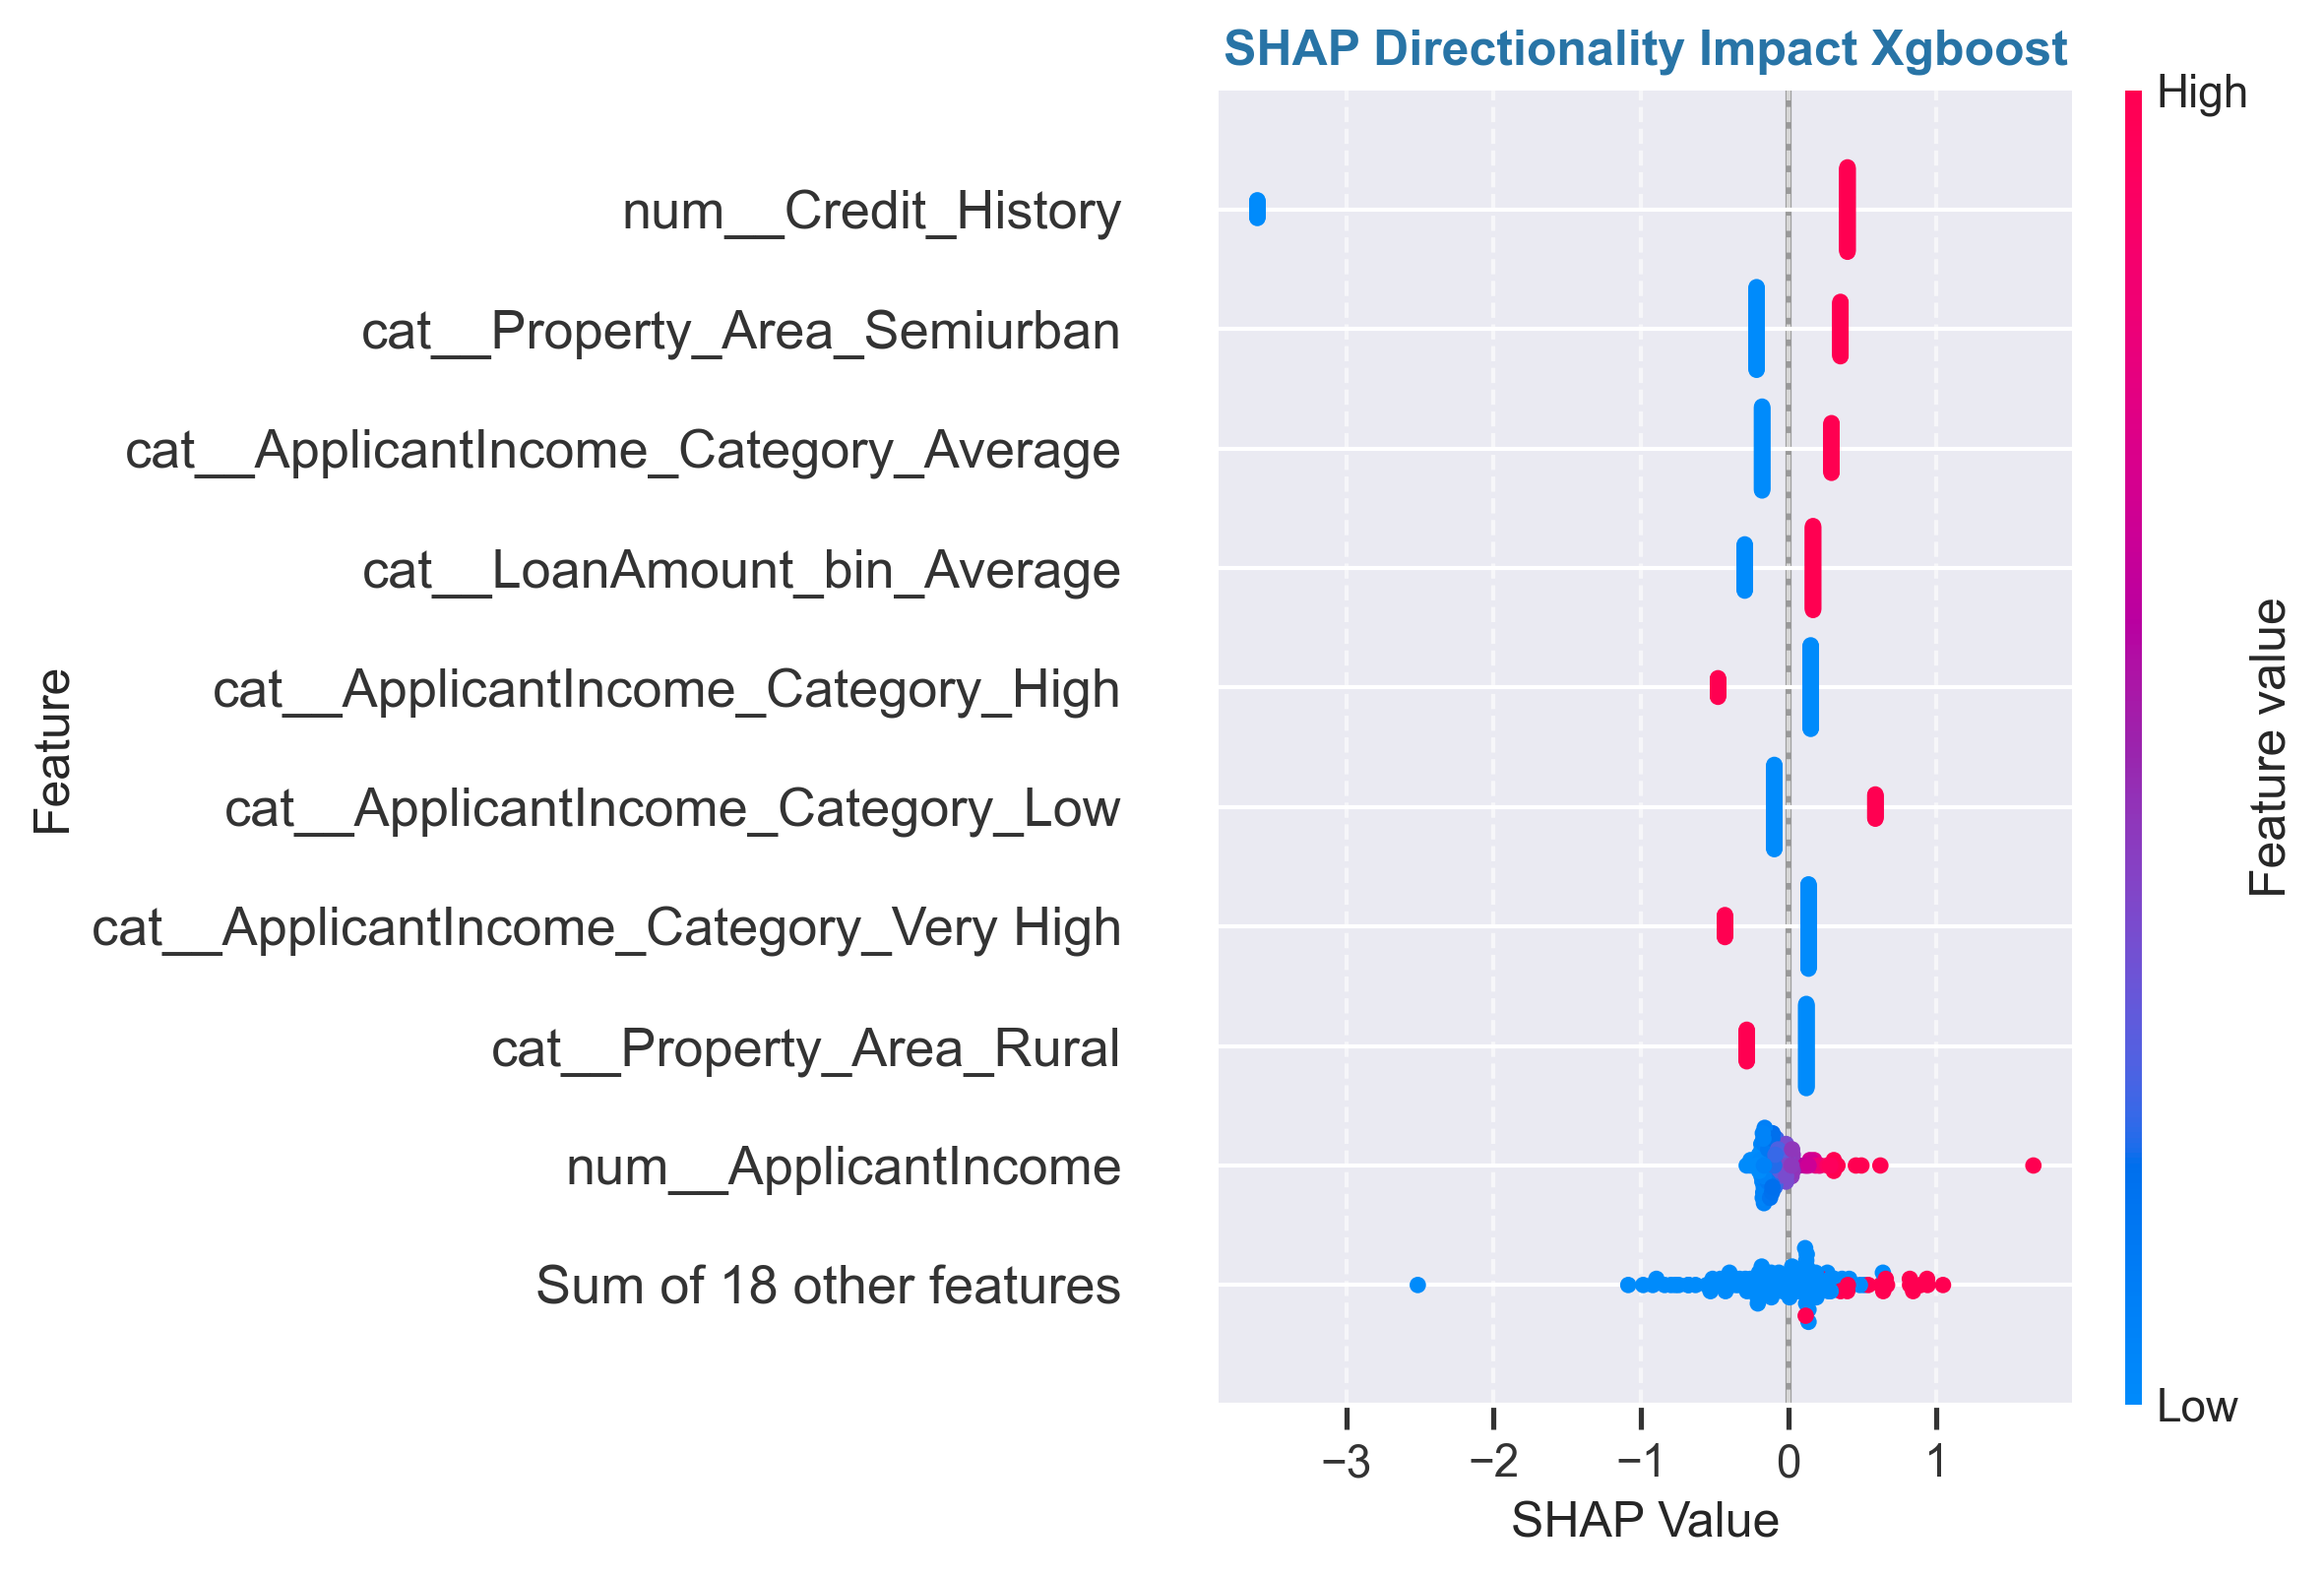

In [72]:
## Convert shap_values and feature names into a SHAP Explanation object
shap_explanation = shap.Explanation(
	values=shap_values,
	feature_names=transformed_feature_names,
	data=transformed_X_test_xgb
)

## Beeswarm plot
shap.plots.beeswarm(shap_explanation, max_display=10, show=False)
plt.title("SHAP Directionality Impact Xgboost", fontsize=12, fontweight='bold', color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Random Forest Classifier Pipeline**

In [73]:
## PIPELINE FOR RANDOM FOREST CLASSIFIER

numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

## crreating a full pipeline with thee model  
pipeline_rf = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",rf)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_rf.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

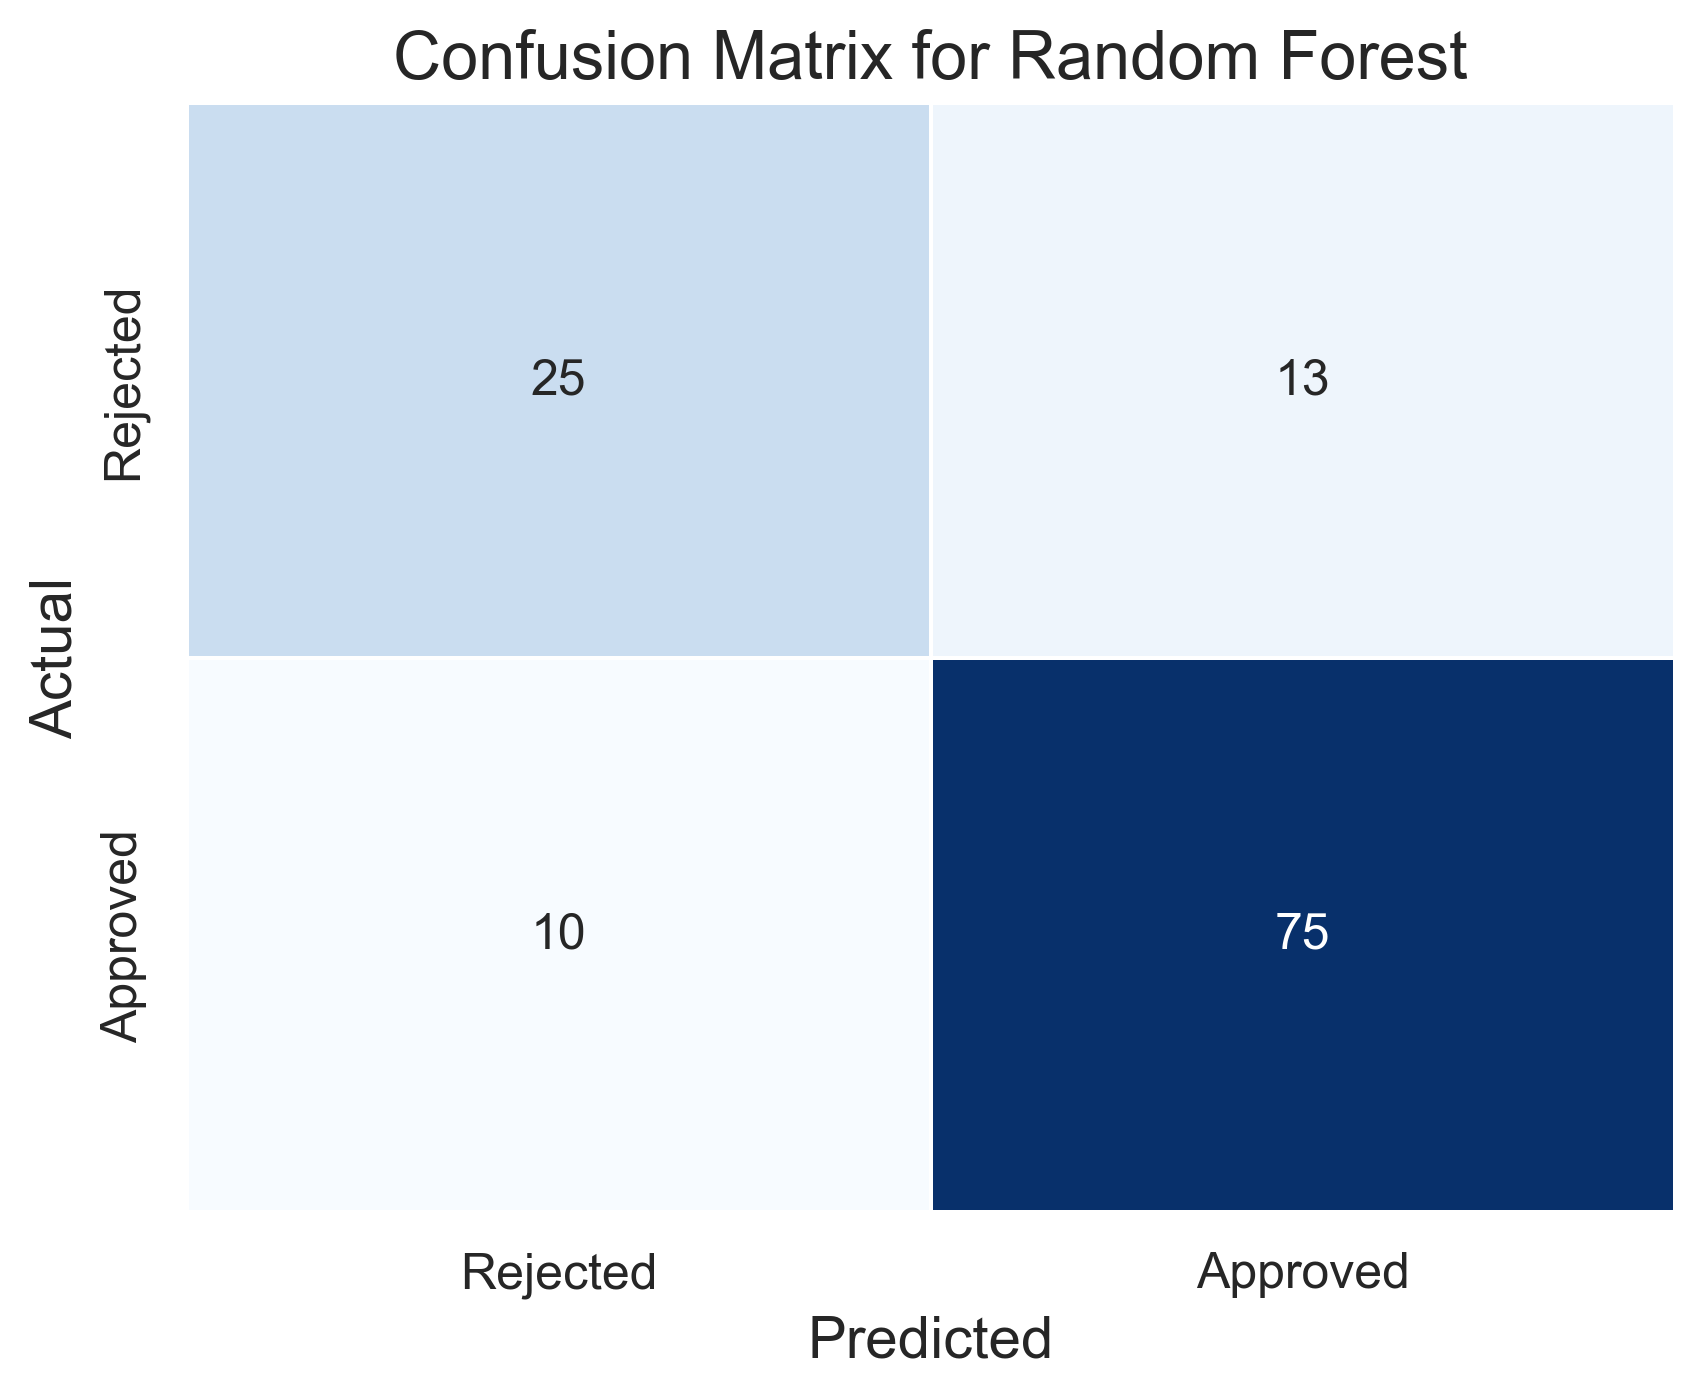

In [74]:
### confusion matrix for random forest
confusion__matrix_rf = confusion_matrix(y_test,pipeline_rf.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

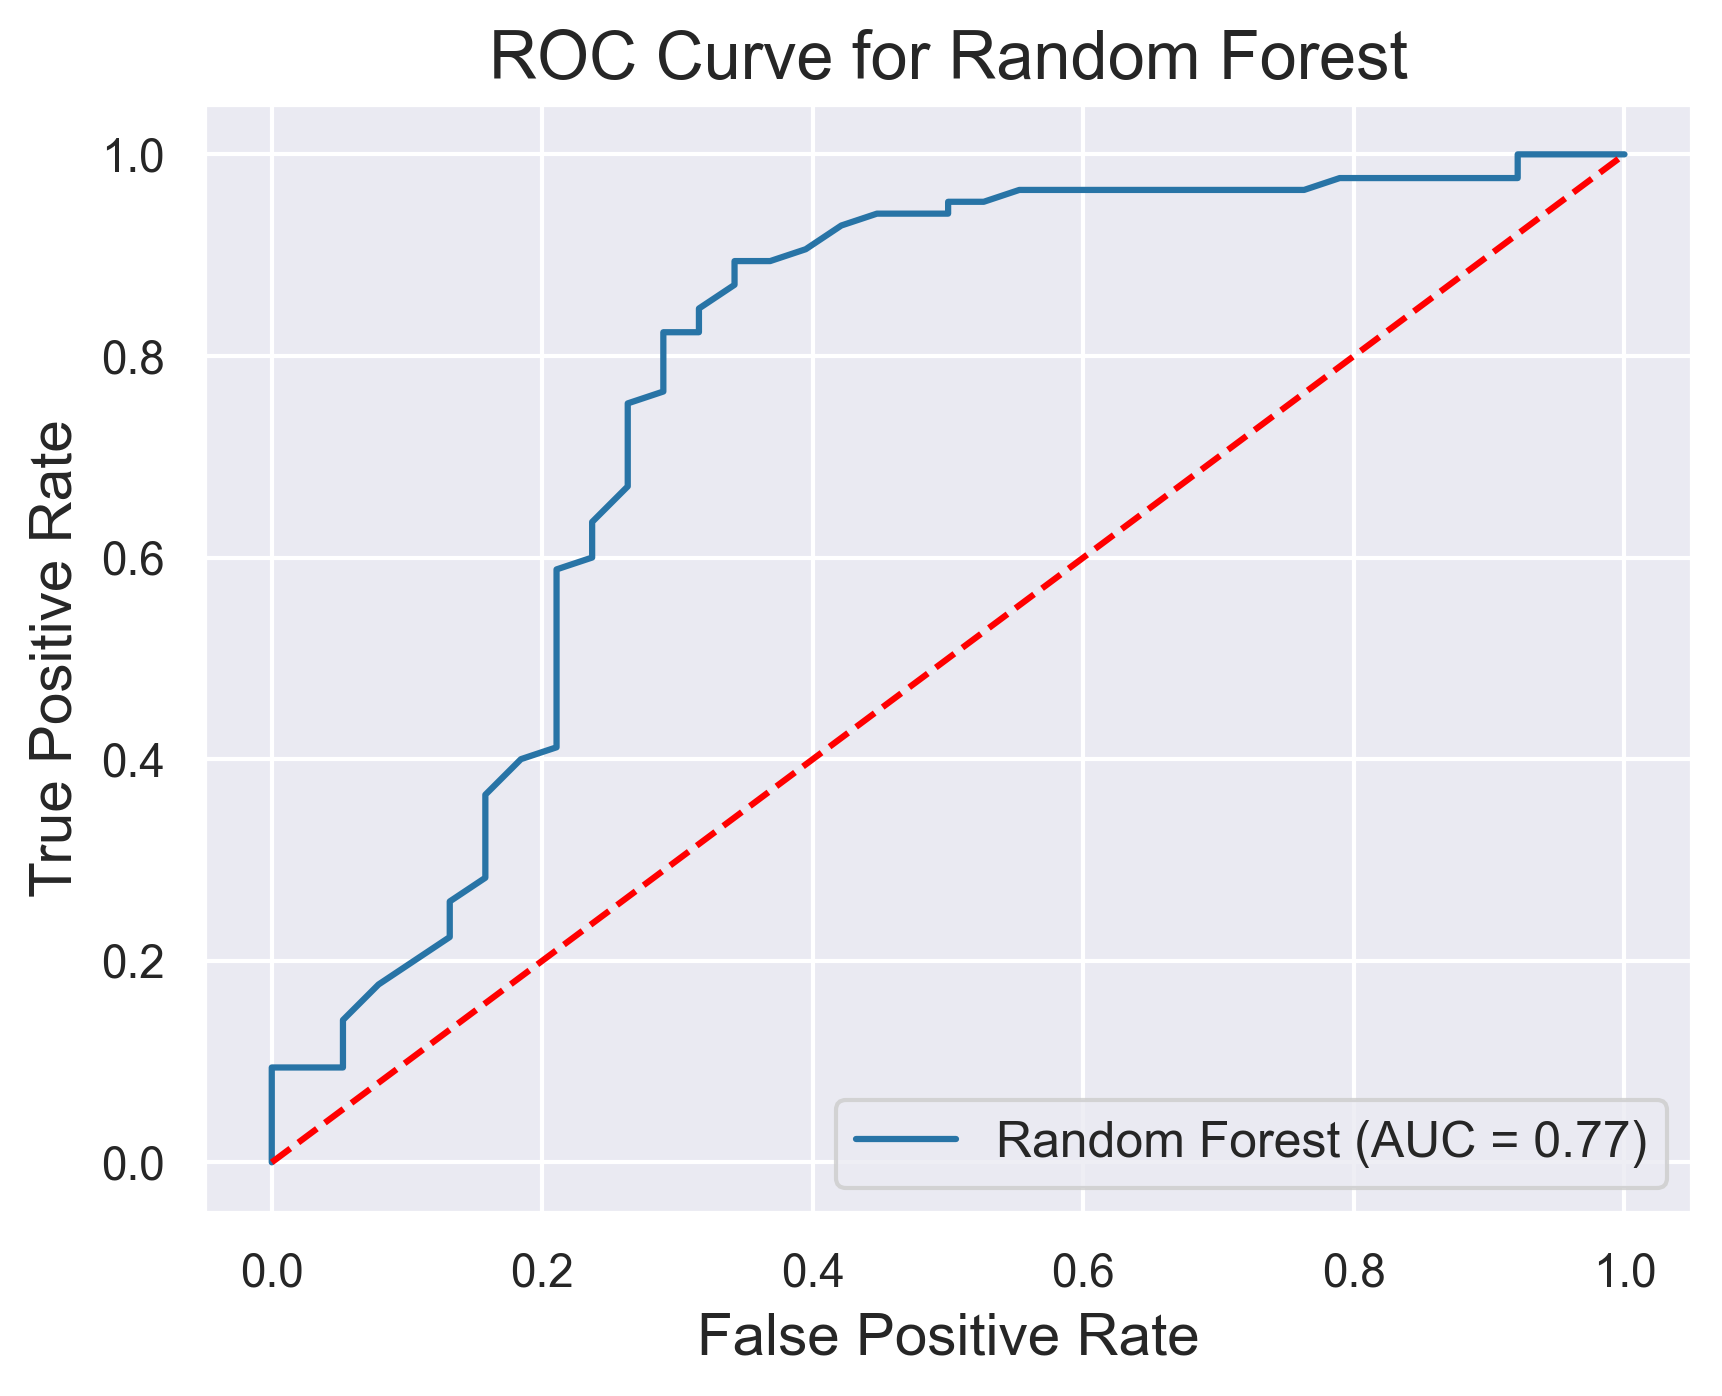

In [75]:
## getting the rouc curve for random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, color='#2874a6', label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_rf.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Random Forest', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

##### **LightGBM Classifier Pipeline**


In [76]:
## PIPELINE FOR RANDOM FOREST CLASSIFIER
numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
lightgbm = LGBMClassifier(
    objective="binary",
    metric="binary_logloss",
    random_state=42,
    n_jobs=-1, 
    verbose=-1
)   

## crreating a full pipeline with thee model  
pipeline_rf = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",lightgbm)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_rf.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(metric='binary_logloss', n_jobs=-1,
                                objective='binary', random_state=42,
                                verbose=-1))])

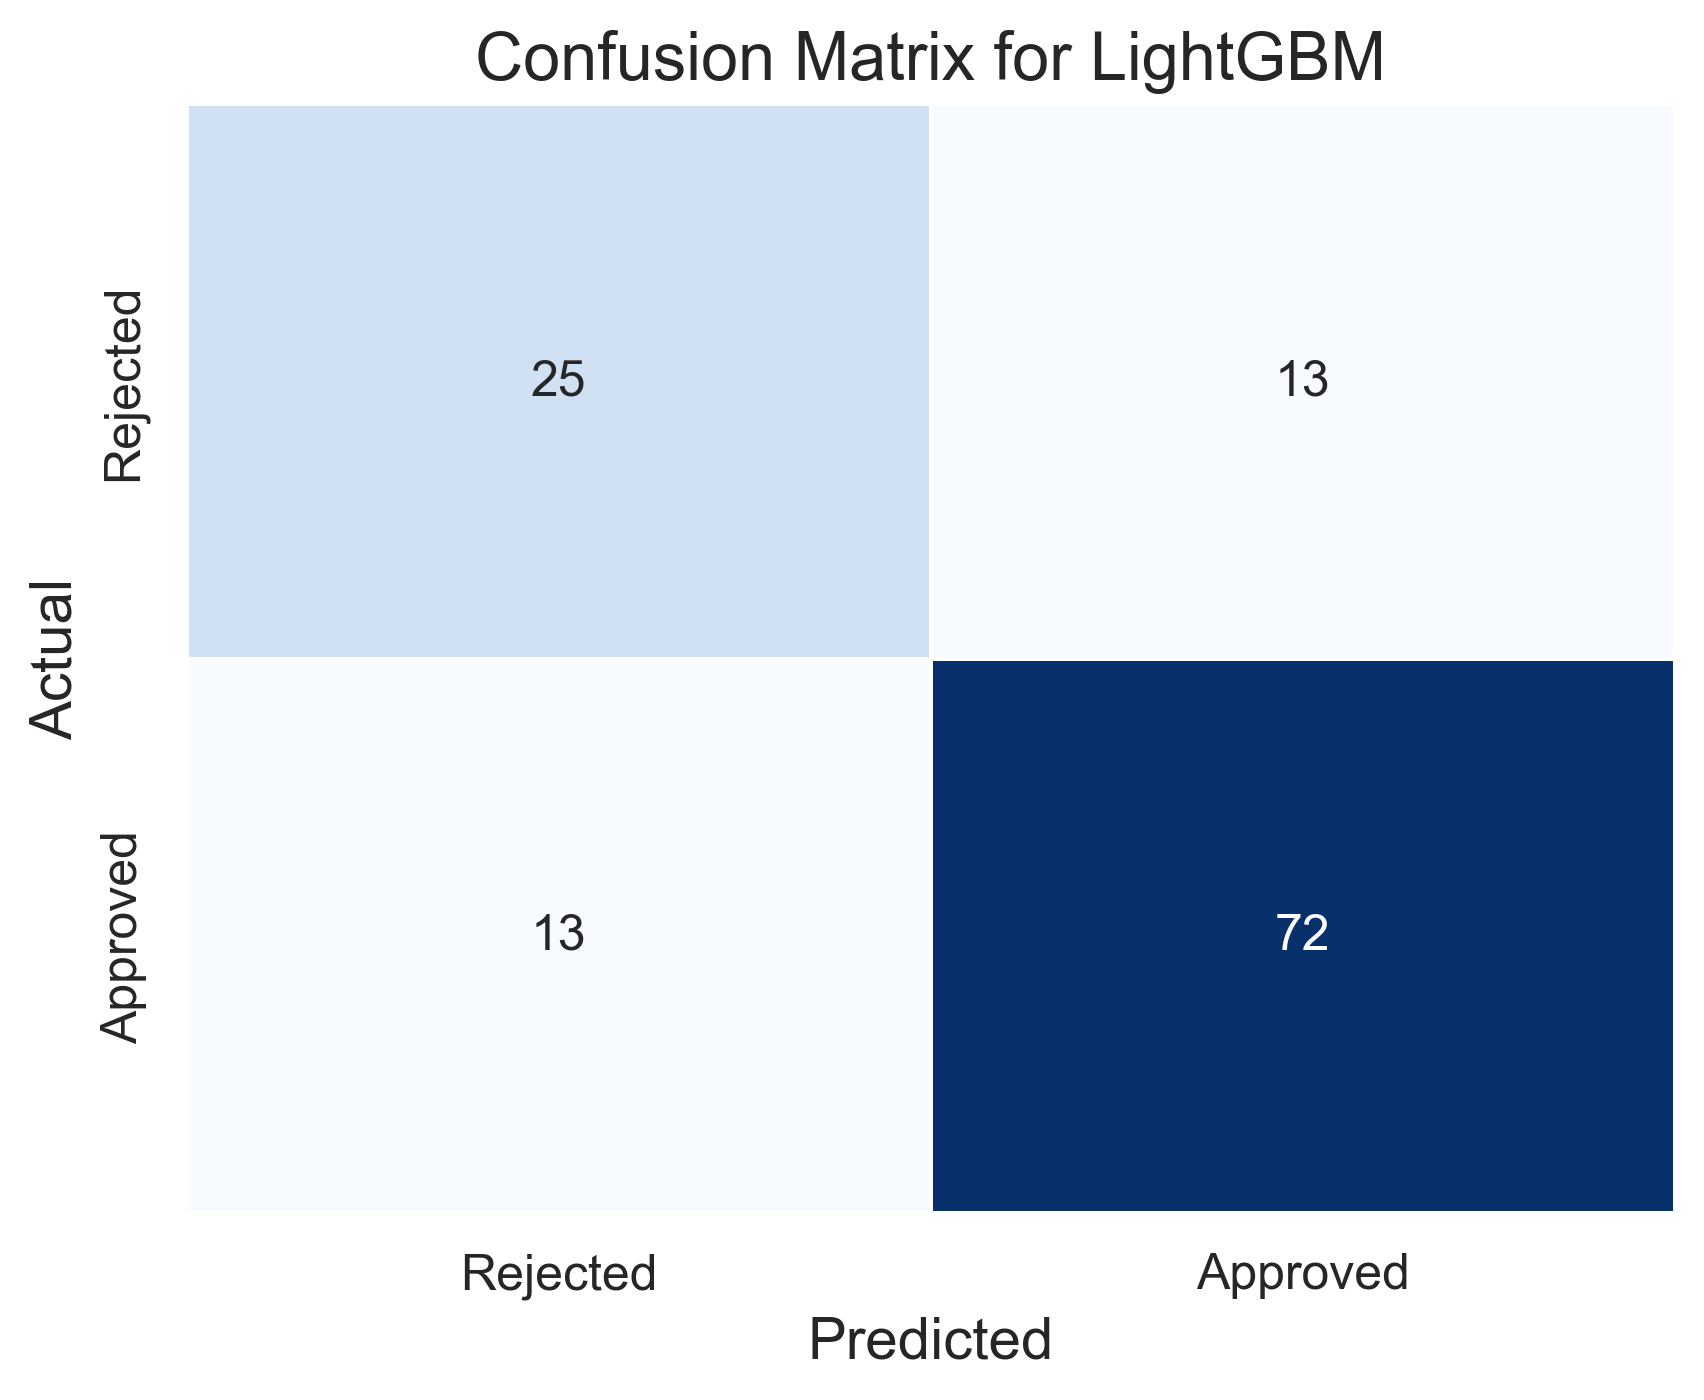

In [77]:
## confusion matrix for lightgbm
confusion__matrix_lgbm = confusion_matrix(y_test,pipeline_rf.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for LightGBM', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

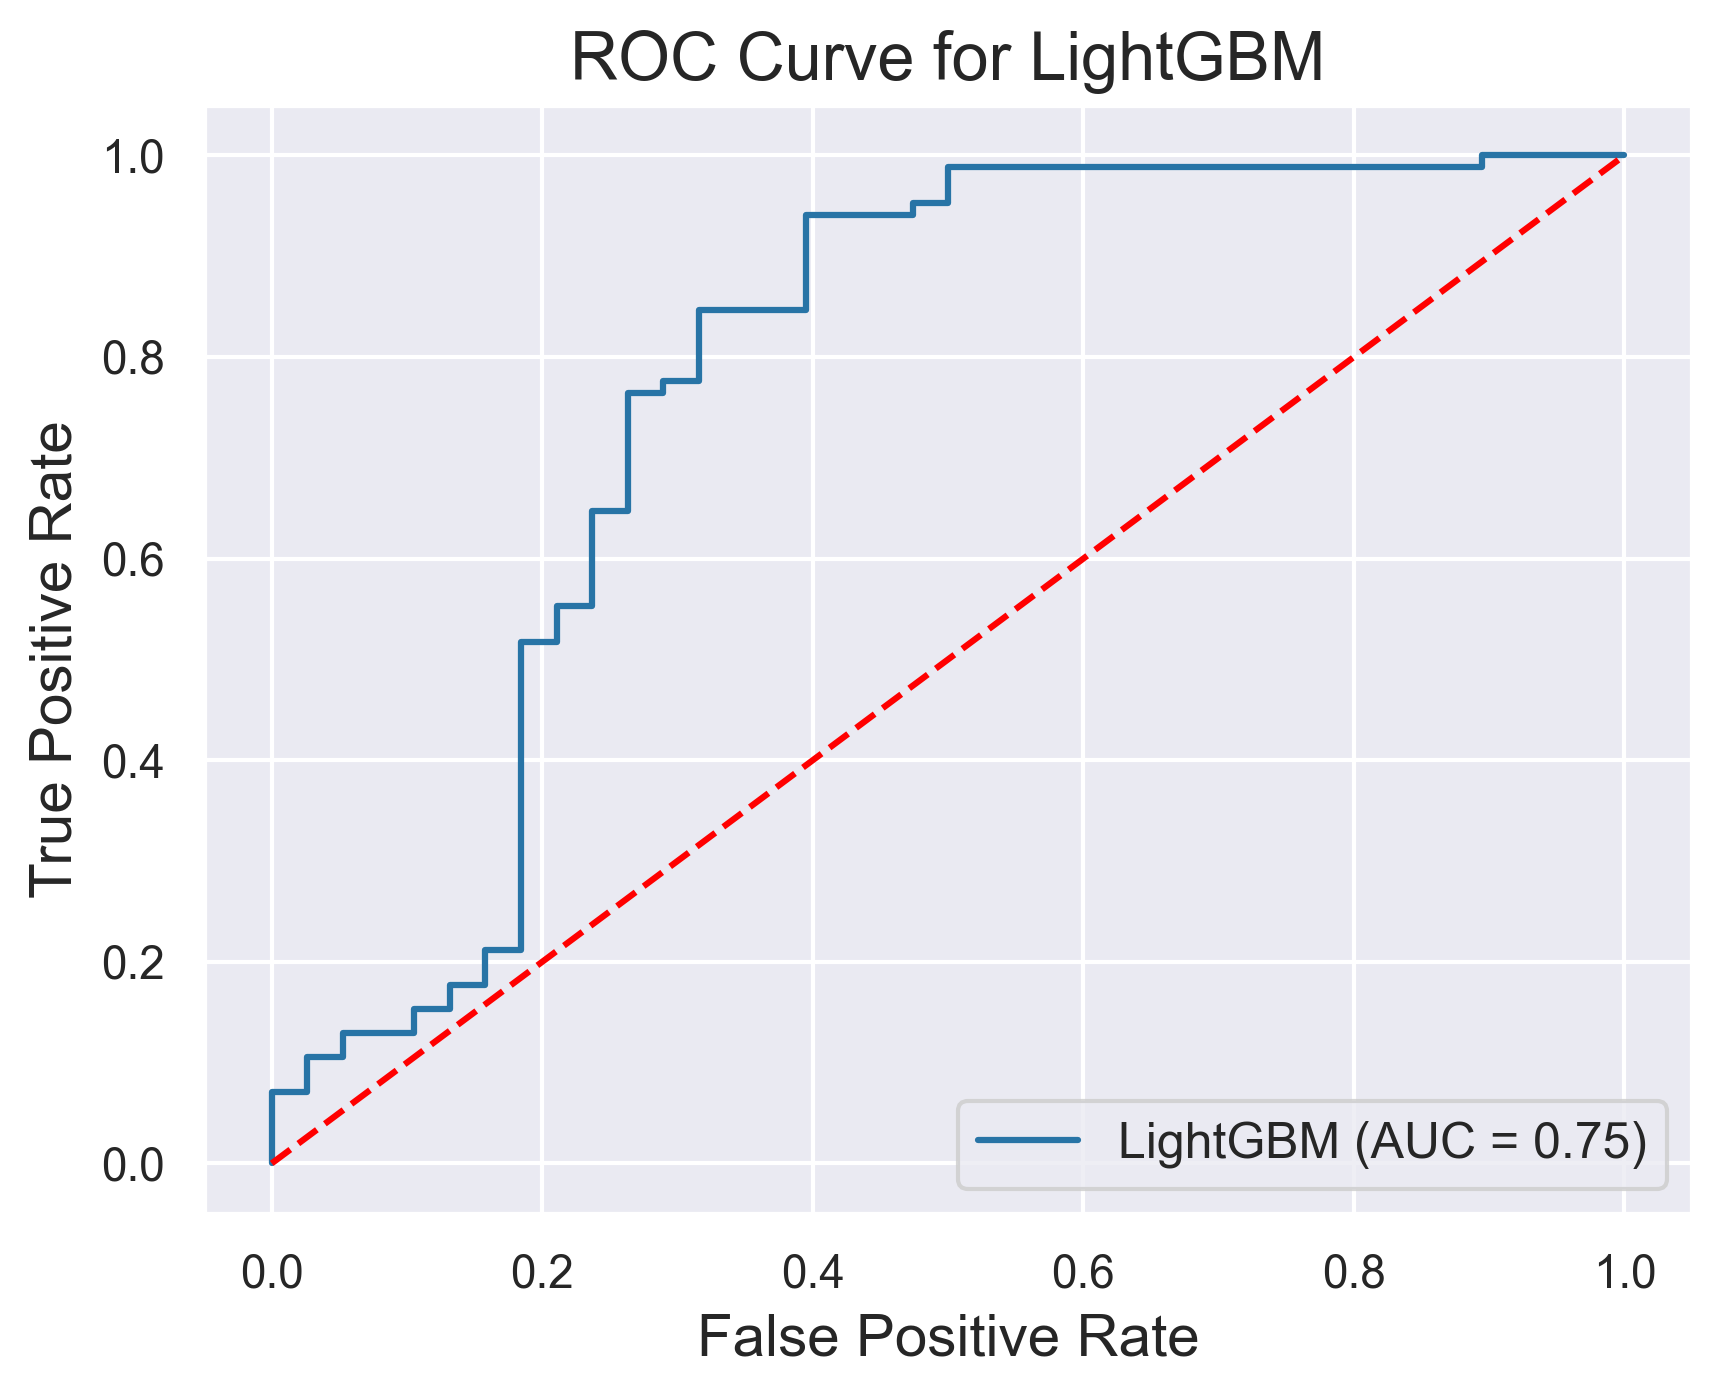

In [78]:
## getting the rouc curve for lightgbm
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_lgbm, tpr_lgbm, color='#2874a6', label='LightGBM (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_rf.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for LightGBM', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

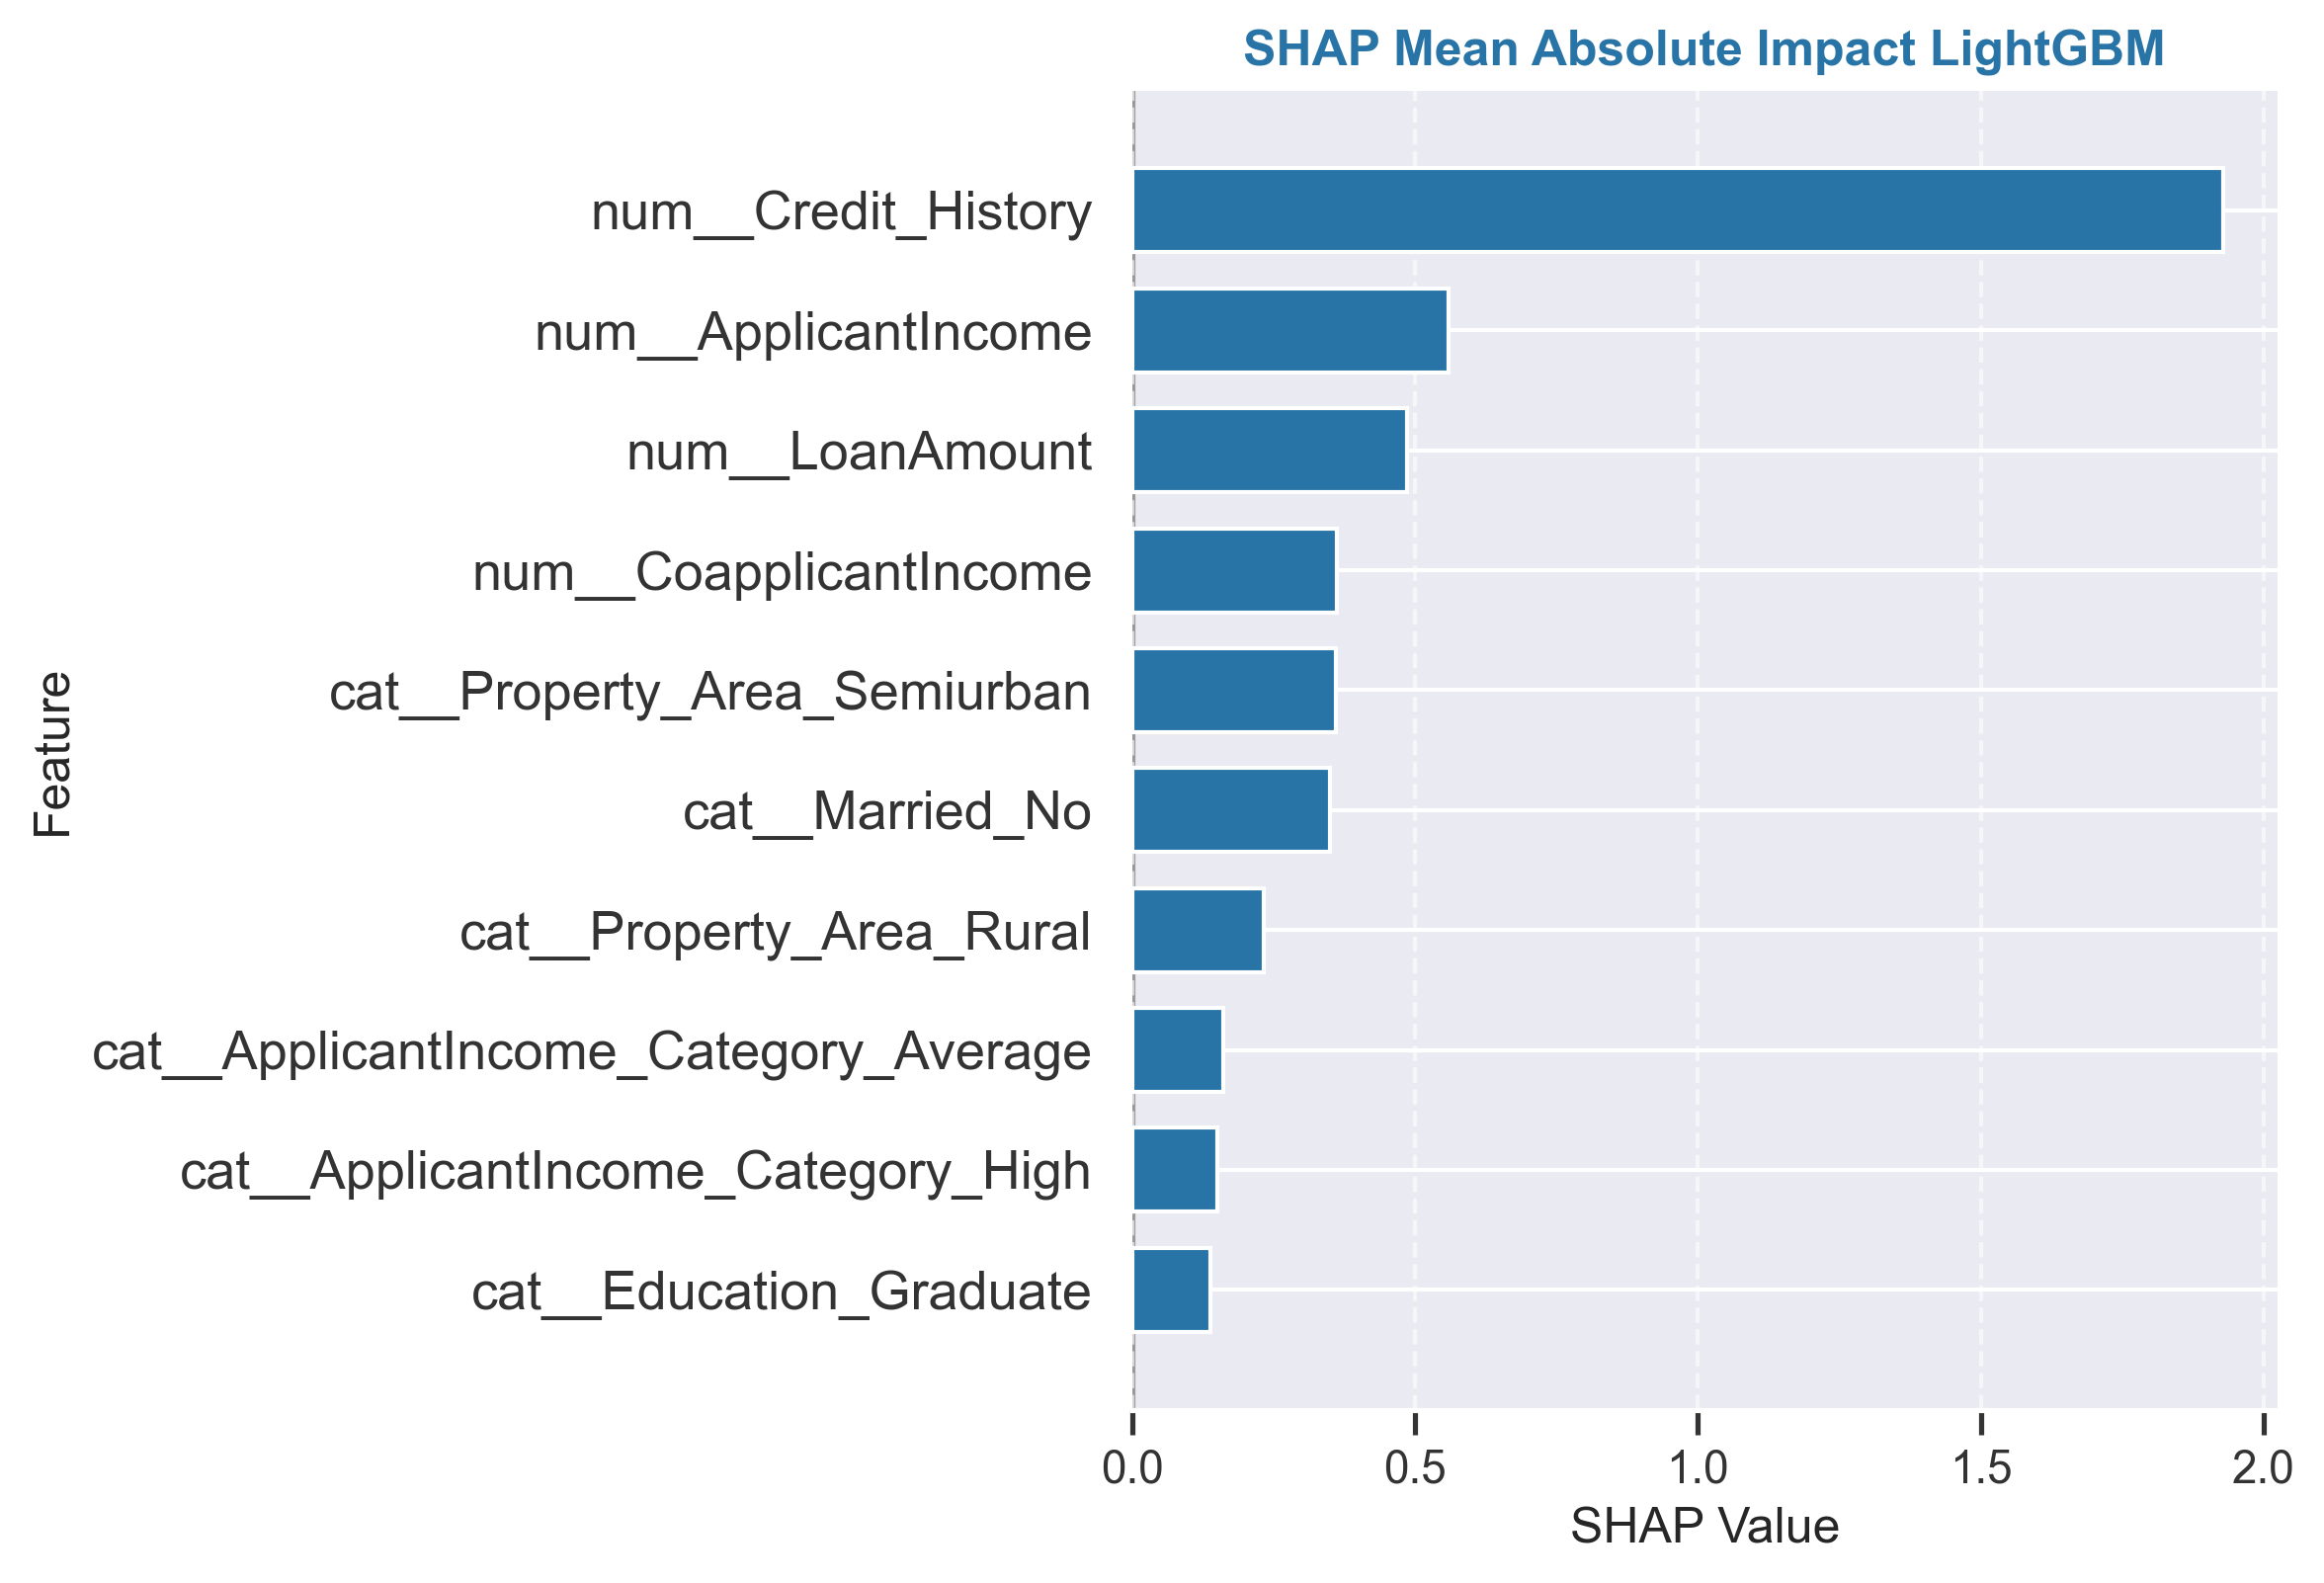

In [79]:
## SHAP values for LightGBM
explainer_lgbm = shap.TreeExplainer(pipeline_rf.named_steps['classifier'])
# Compute SHAP values for the test set
shap_values_lgbm = explainer_lgbm.shap_values(pipeline_rf.named_steps['preprocessor'].transform(X_test))
# Convert transformed data back to a DataFrame with original feature names
transformed_feature_names_lgbm = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()
transformed_X_test_lgbm = pd.DataFrame(
    pipeline_rf.named_steps['preprocessor'].transform(X_test),
    columns=transformed_feature_names_lgbm
)
# Plot SHAP summary plot
shap.summary_plot(shap_values_lgbm, transformed_X_test_lgbm, plot_type="bar", max_display=10, show=False,color="#2874a6")
## title
plt.title("SHAP Mean Absolute Impact LightGBM", fontsize=12,fontweight='bold',color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()

### **CatBoost Pipeline**

In [80]:

numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
catboost = CatBoostClassifier( 
    iterations=1000, 
    learning_rate=0.1, 
    depth=6, 
    eval_metric="Logloss", 
    random_seed=42, 
    verbose=0
)

## crreating a full pipeline with thee model  
pipeline_catboost = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",catboost)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_rf.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(metric='binary_logloss', n_jobs=-1,
                                objective='binary', random_state=42,
                                verbose=-1))])

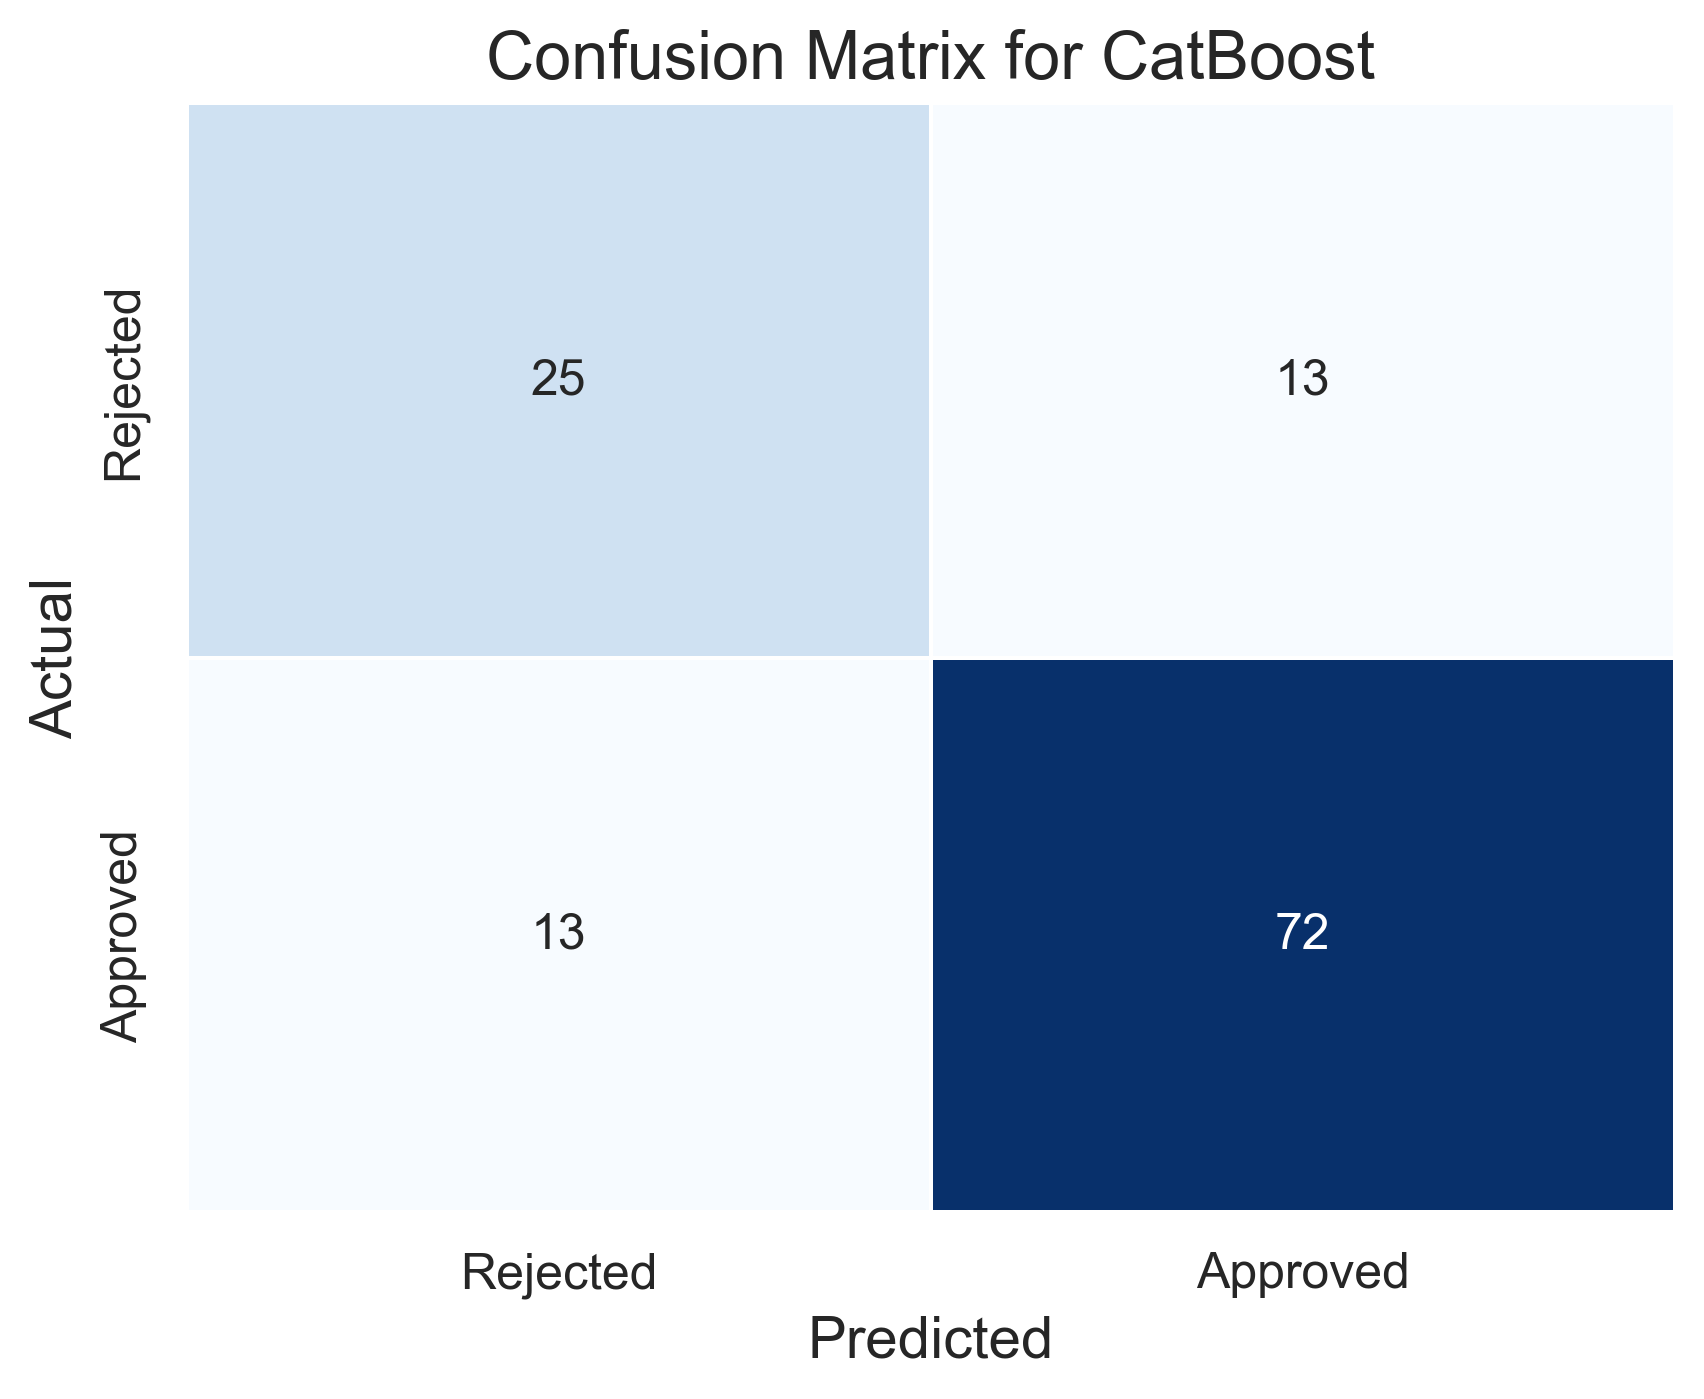

In [81]:
## confusion matrix for catbooost
confusion__matrix_catboost = confusion_matrix(y_test,pipeline_rf.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_catboost, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for CatBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

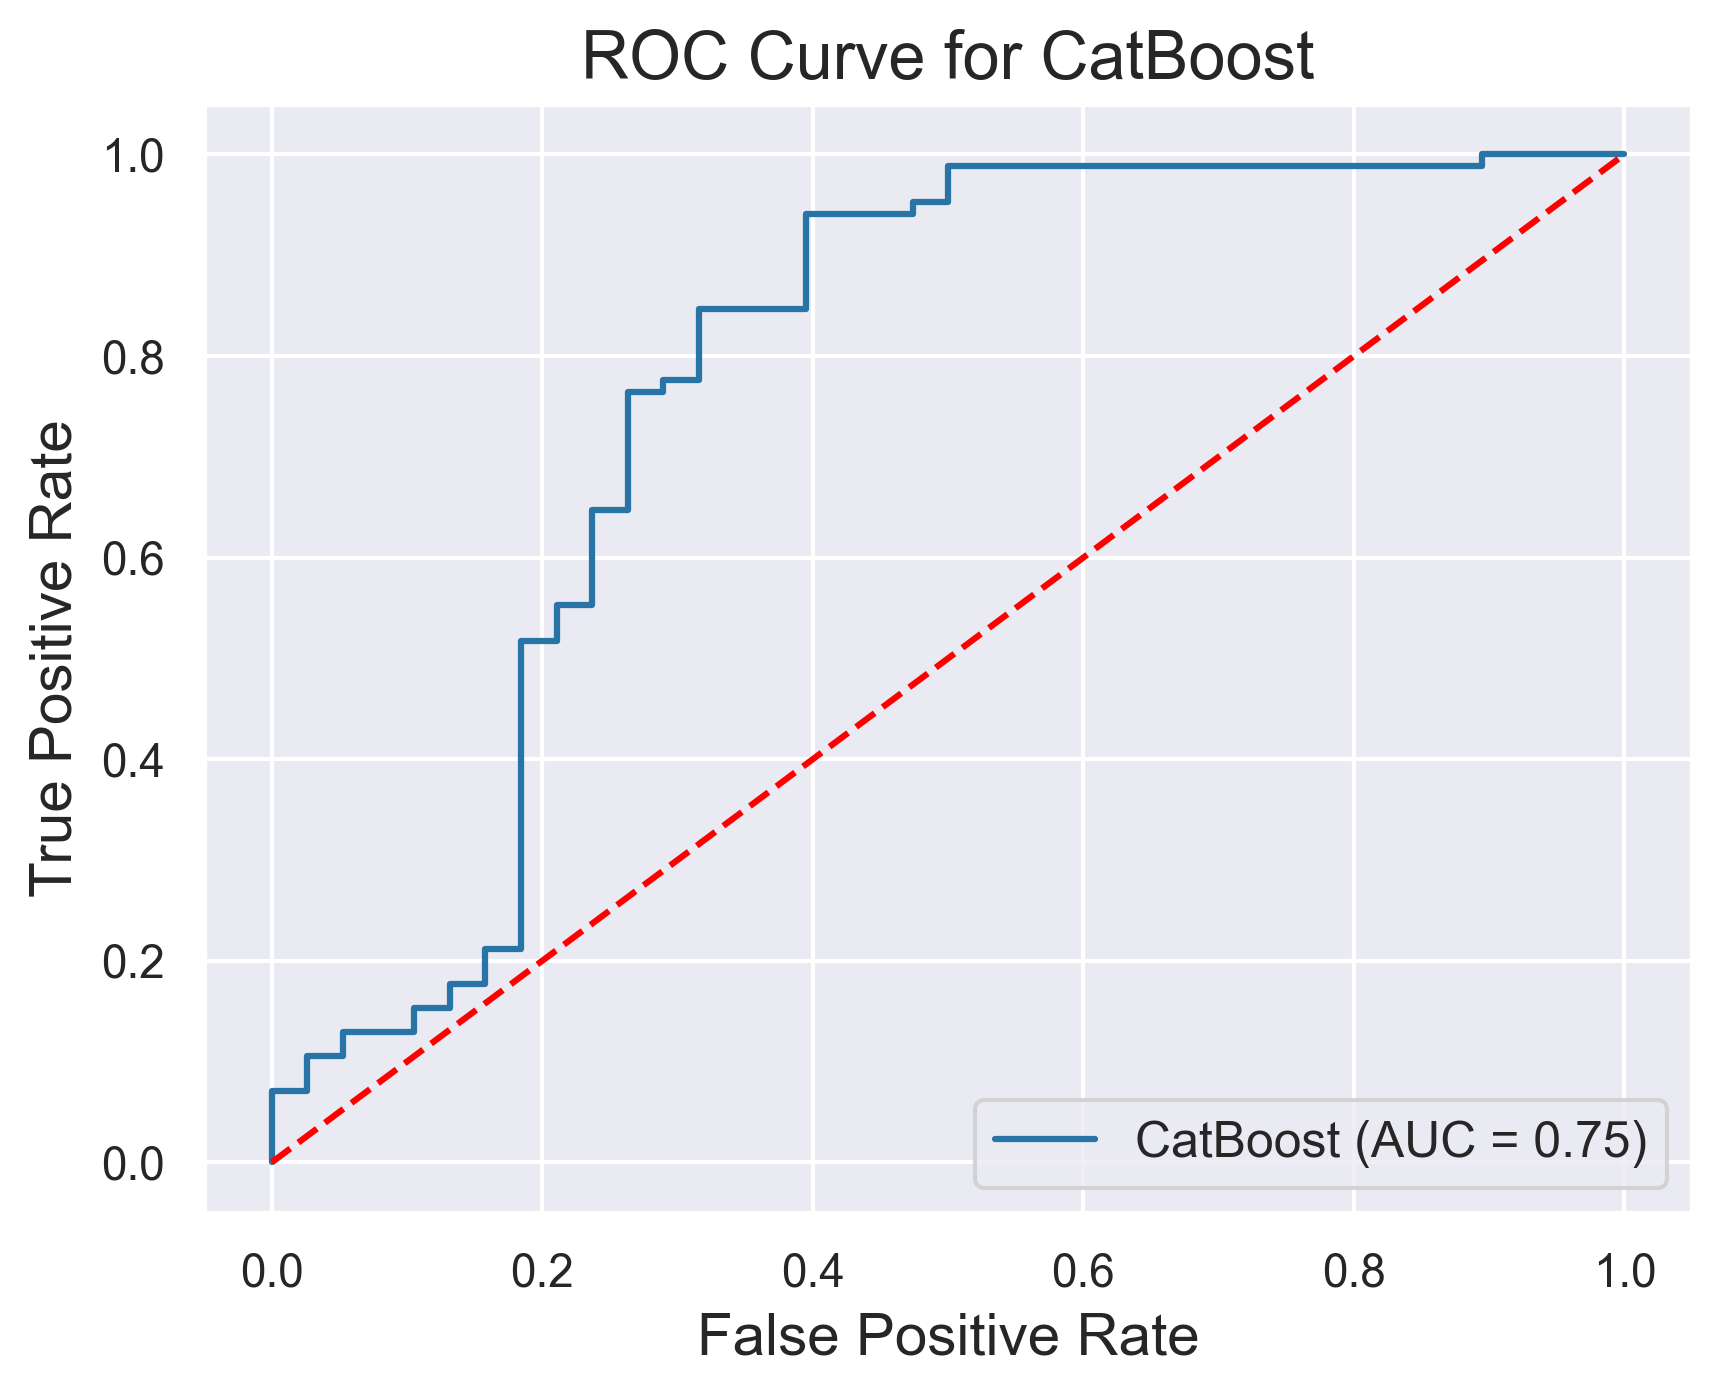

In [82]:
## roc curve for catboost
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_catboost, tpr_catboost, color='#2874a6', label='CatBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_rf.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for CatBoost', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

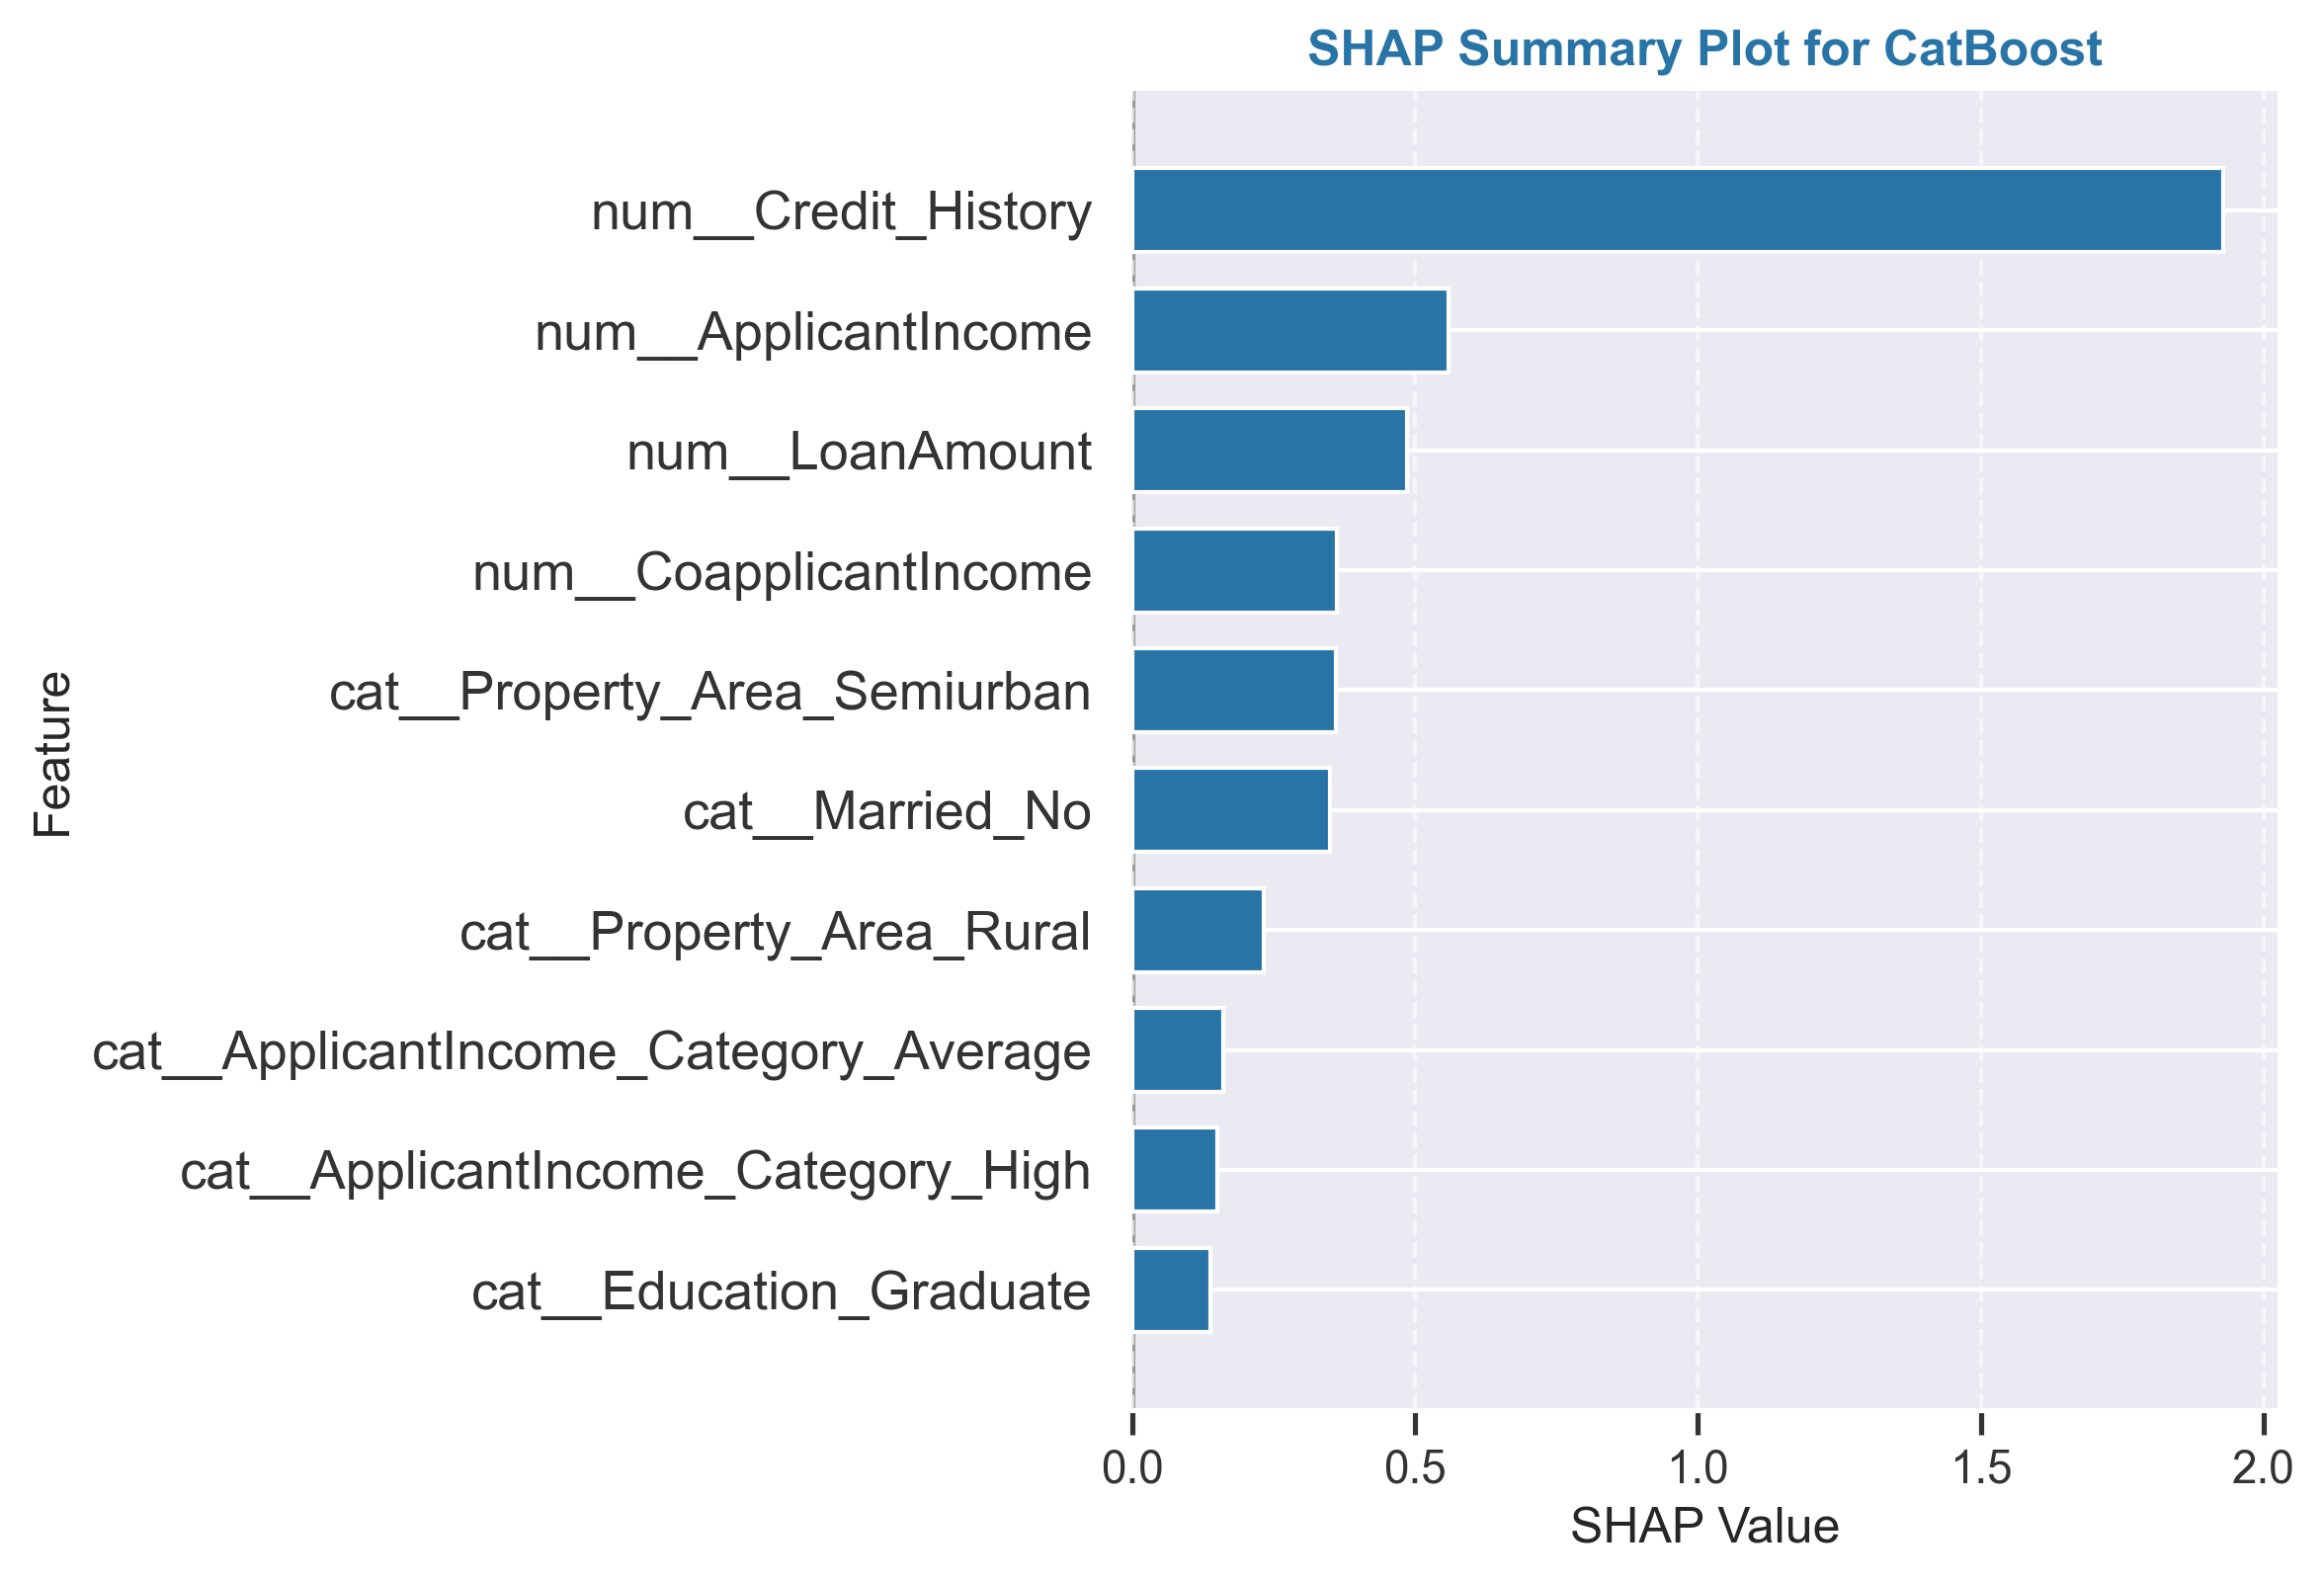

In [83]:
## shap for catboost
explainer_catboost = shap.TreeExplainer(pipeline_rf.named_steps['classifier'])
# Compute SHAP values for the test set
shap_values_catboost = explainer_catboost.shap_values(pipeline_rf.named_steps['preprocessor'].transform(X_test))
# Convert transformed data back to a DataFrame with original feature names
transformed_feature_names_catboost = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()
transformed_X_test_catboost = pd.DataFrame(
    pipeline_rf.named_steps['preprocessor'].transform(X_test),
    columns=transformed_feature_names_catboost
)
# Plot SHAP summary plot
shap.summary_plot(shap_values_catboost, transformed_X_test_catboost, plot_type="bar", max_display=10, show=False,color="#2874a6")
## title
plt.title("SHAP Summary Plot for CatBoost", fontsize=12,fontweight='bold',color="#2874a6")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Model Stacking Pipeline**

In [84]:
## Stacking the models
## defining the base models
estimator = [ 
    ('rf',RandomForestClassifier(random_state=42)),
    ('xgb',XGBClassifier(objective="binary:logistic",eval_metric="logloss",random_state=42)), 
  
]
## defining the meta model
meta_model = LogisticRegression(random_state=42)
## defining the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimator, 
    final_estimator=meta_model, 
    cv=5, 
    n_jobs=-1
)
## defining the pipeline

numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)

## crreating a full pipeline with thee model  
pipeline_stacked_model = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",stacking_model)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_stacked_model.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('sm...
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...))],
                                    final_estimator=LogisticRegression(random_state=42),
                                    n_jobs=-1))])

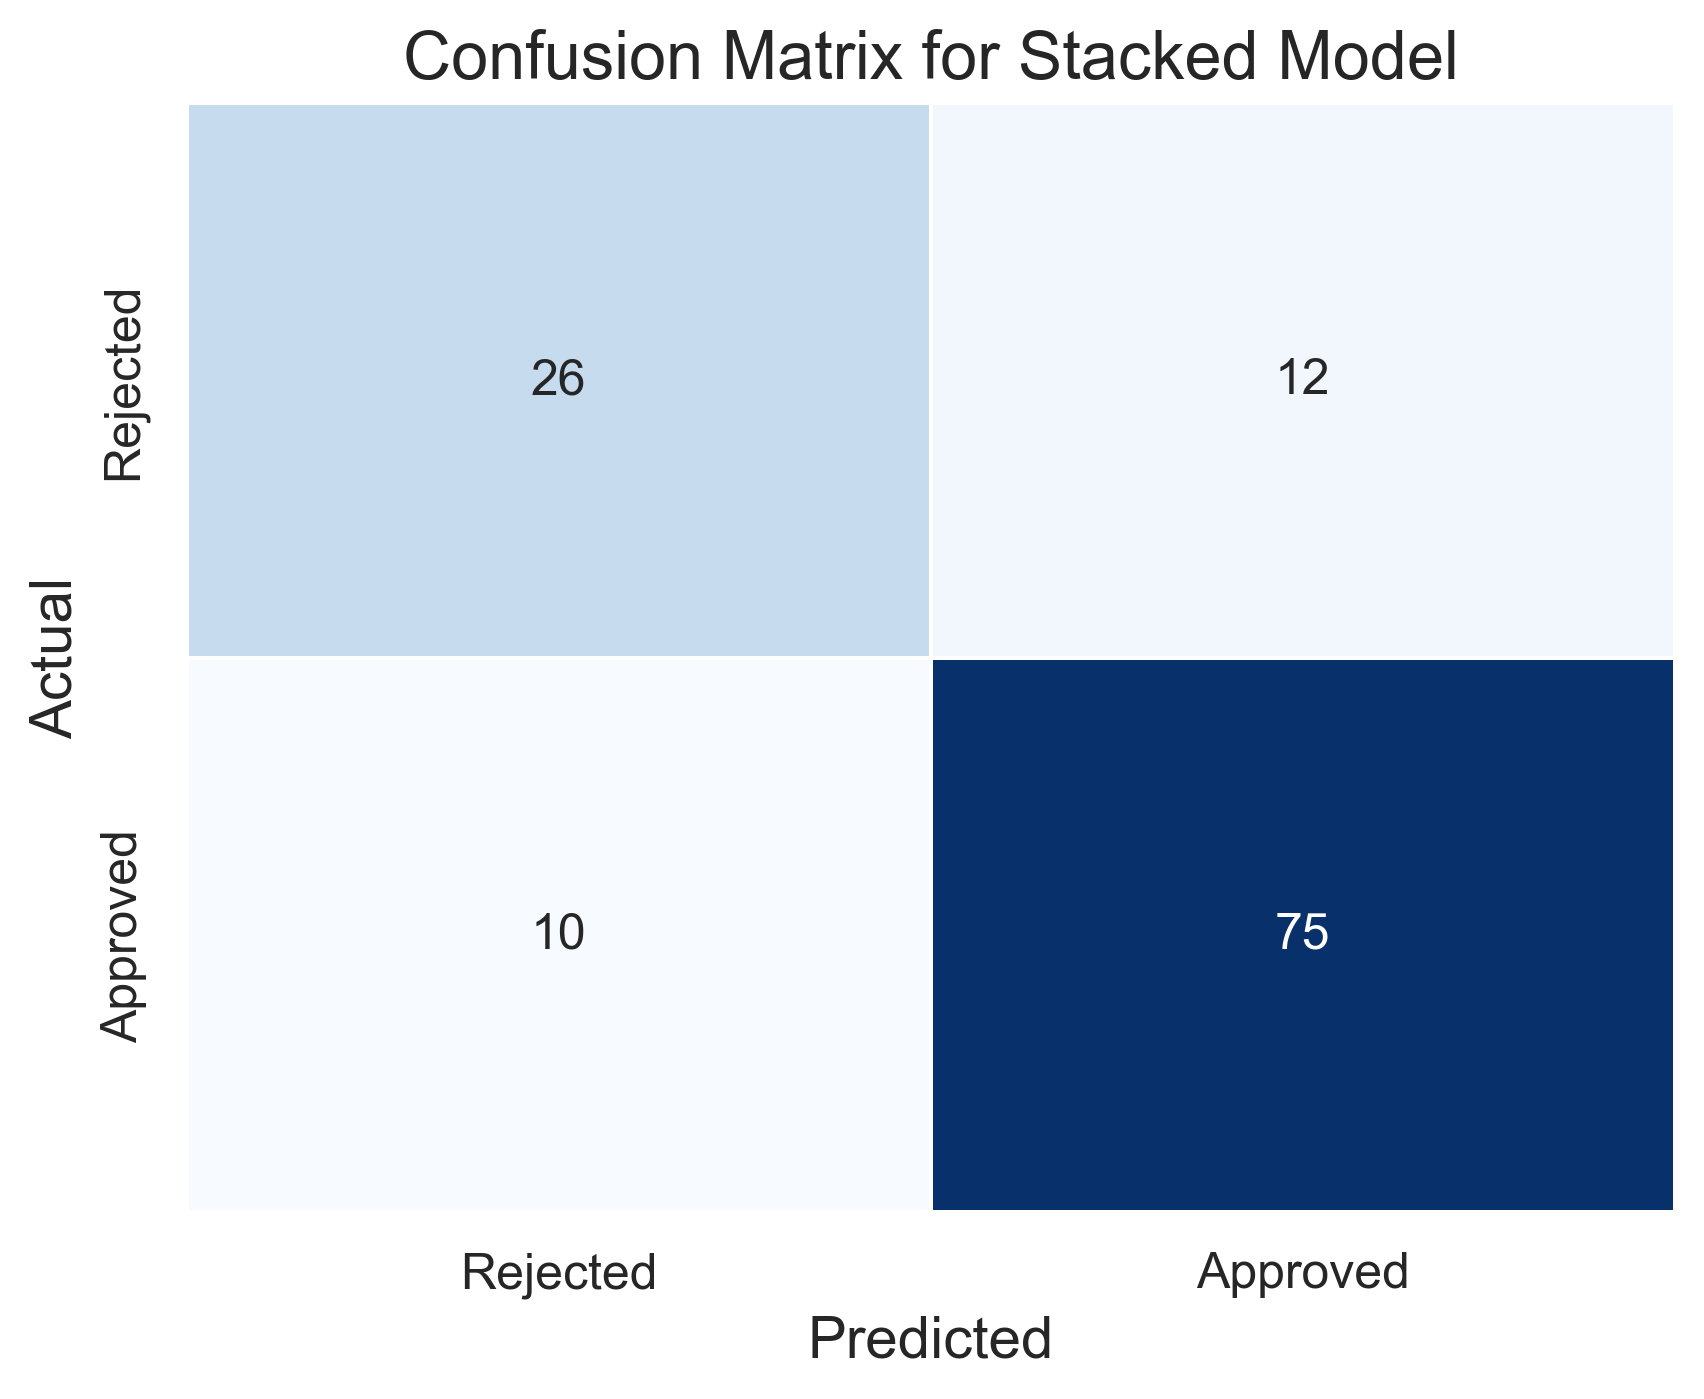

In [85]:
## confusion matrix for stacked model
confusion__matrix_stacked_model = confusion_matrix(y_test,pipeline_stacked_model.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_stacked_model, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for Stacked Model', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

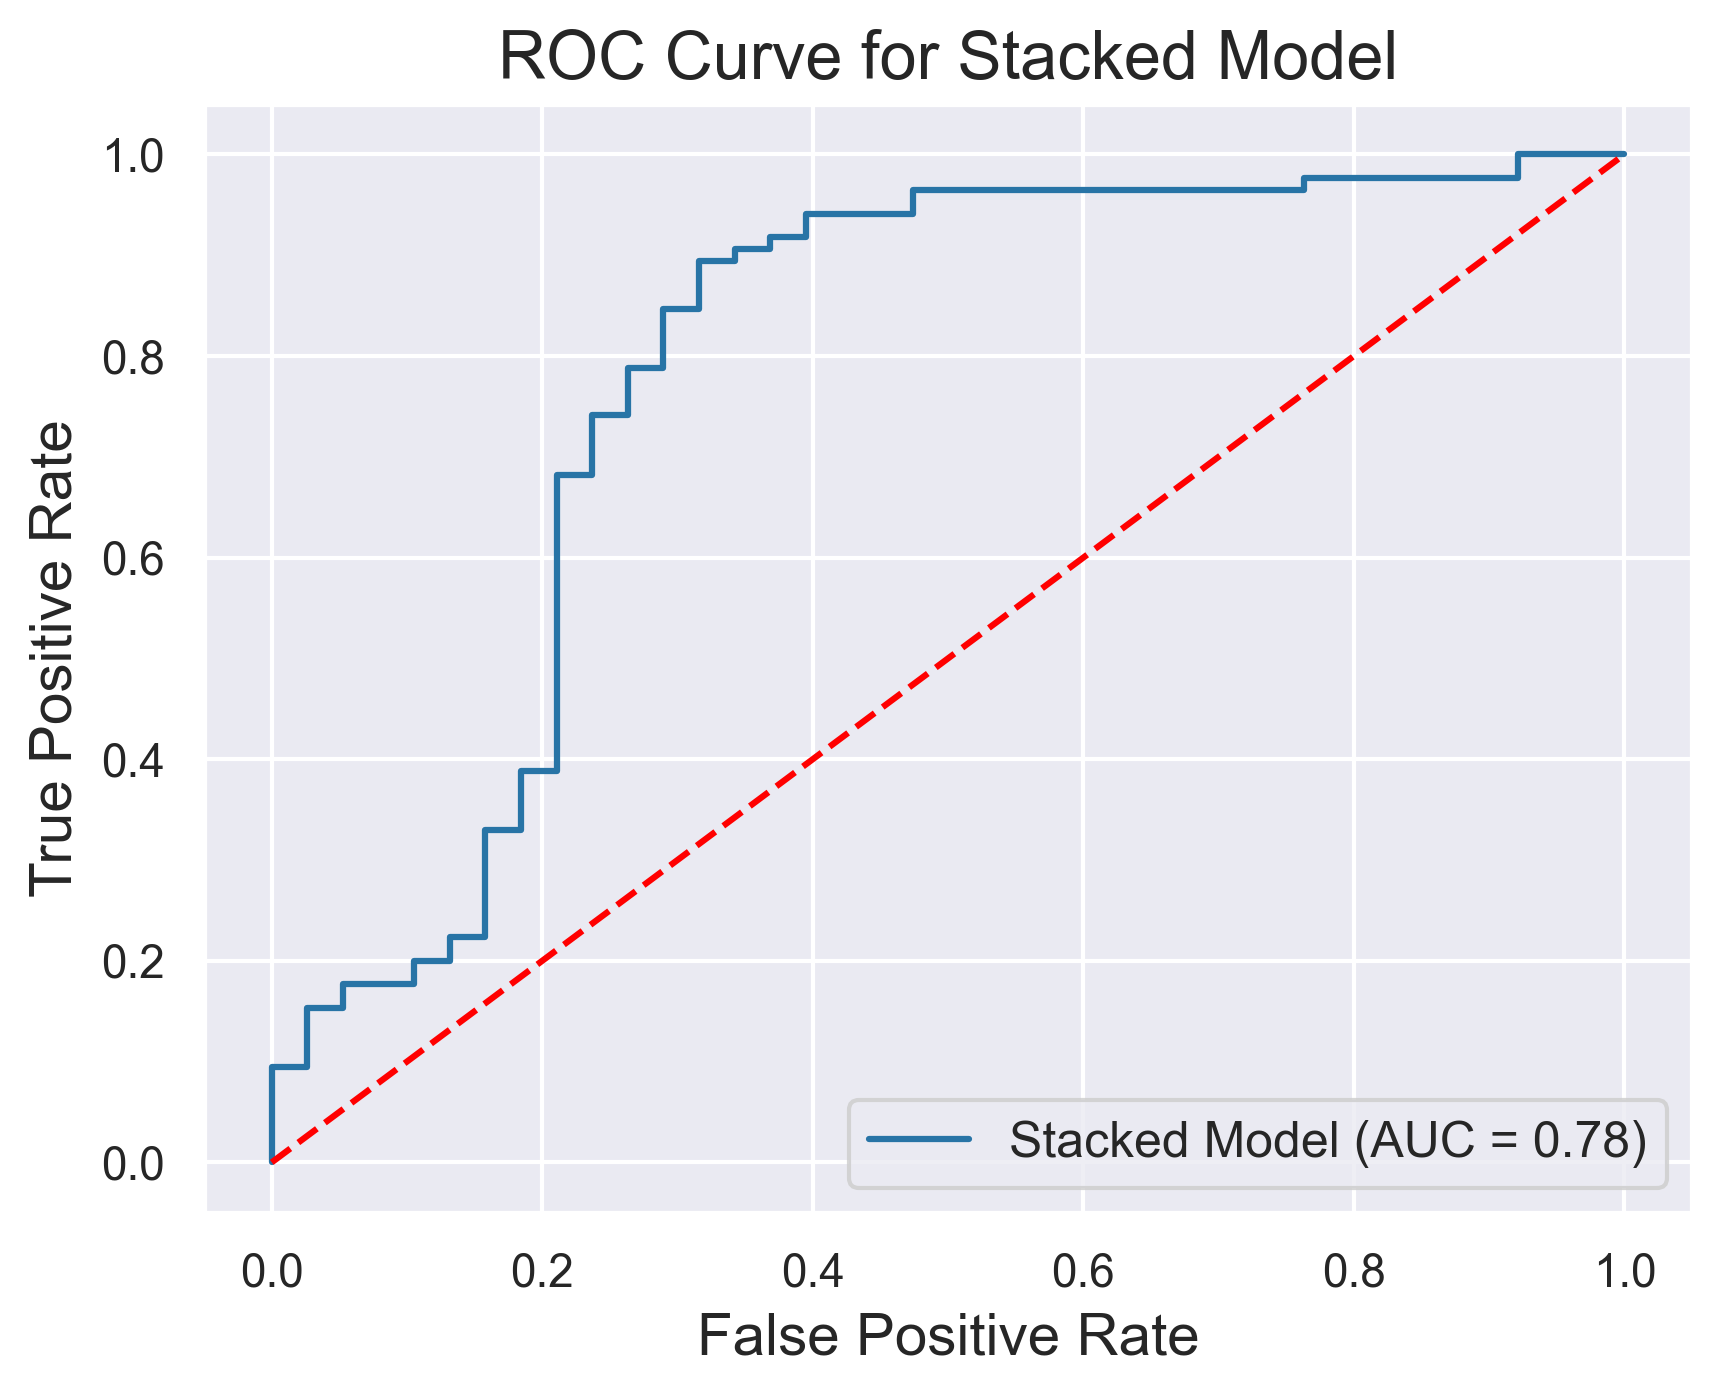

In [86]:
## rouc curve for stacked model
fpr_stacked_model, tpr_stacked_model, thresholds_stacked_model = roc_curve(y_test, pipeline_stacked_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_stacked_model, tpr_stacked_model, color='#2874a6', label='Stacked Model (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_stacked_model.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Stacked Model', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

#### **Decision Tree Classifier Pipeline**

In [87]:
    
numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
## defining the pipeline
dt = DecisionTreeClassifier(random_state=42)

## crreating a full pipeline with thee model  
pipeline_dt = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",dt)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_dt.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

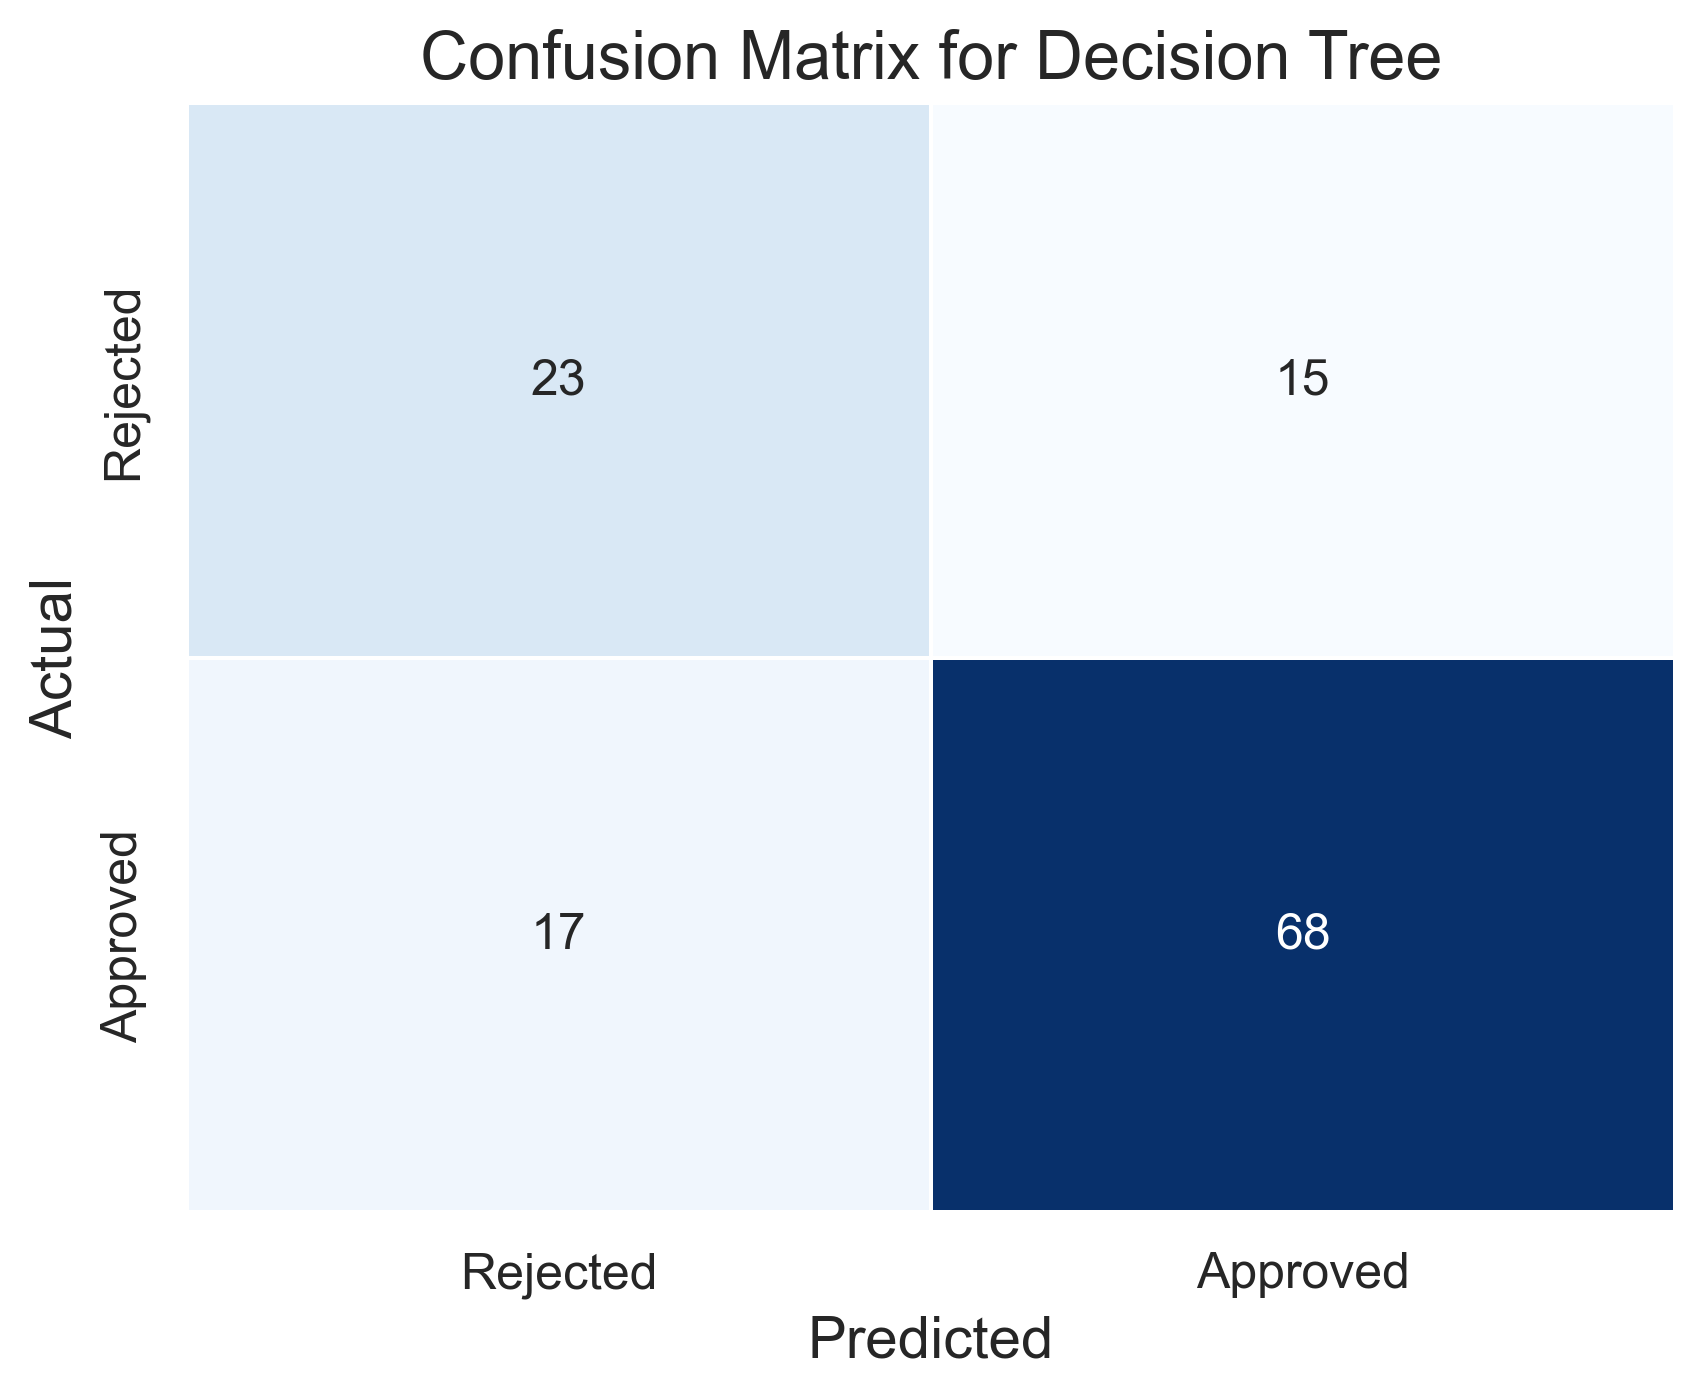

In [88]:
## confusion matrix for dt 
confusion__matrix_dt = confusion_matrix(y_test,pipeline_dt.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()


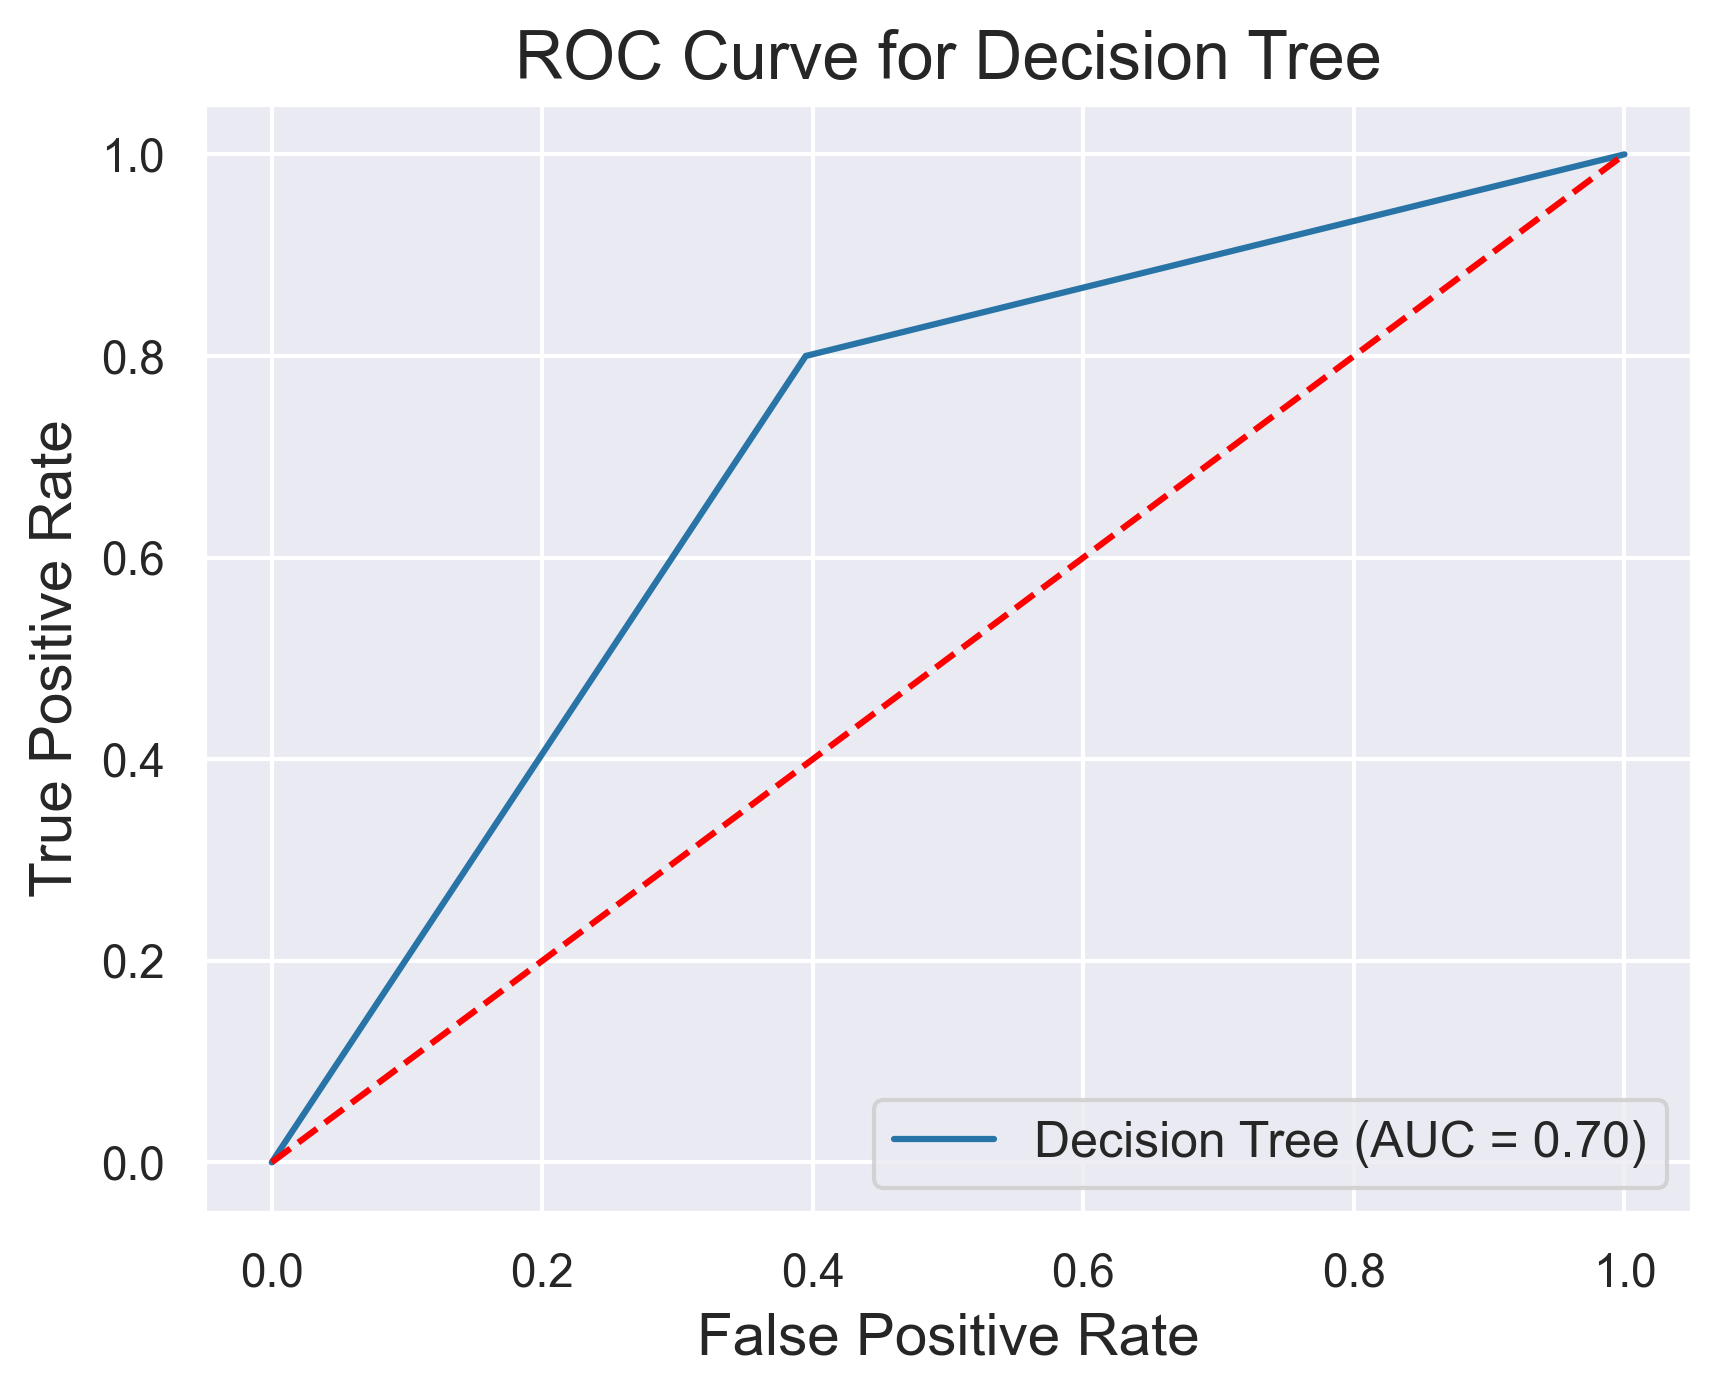

In [89]:
## roc curve for decision tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pipeline_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, color='#2874a6', label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_dt.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Decision Tree', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

##### **SVC PIPELINE**

In [90]:
## svc classifier pipeline
## Stacking the models
## defining the base models
estimator = [ 
    ('rf',RandomForestClassifier(random_state=42)),
    ('xgb',XGBClassifier(objective="binary:logistic",eval_metric="logloss",random_state=42)), 
  
]
## defining the meta model
meta_model = LogisticRegression(random_state=42)
## defining the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimator, 
    final_estimator=meta_model, 
    cv=5, 
    n_jobs=-1
)
## defining the pipeline

numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)
# svc  
svc = SVC(probability=True, random_state=42,kernel='linear', C=1.0, gamma='scale')

## crreating a full pipeline with thee model  
pipeline_svc = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",svc)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_svc.fit(X_train , y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(kernel='linear', probability=True, random_state=42))])

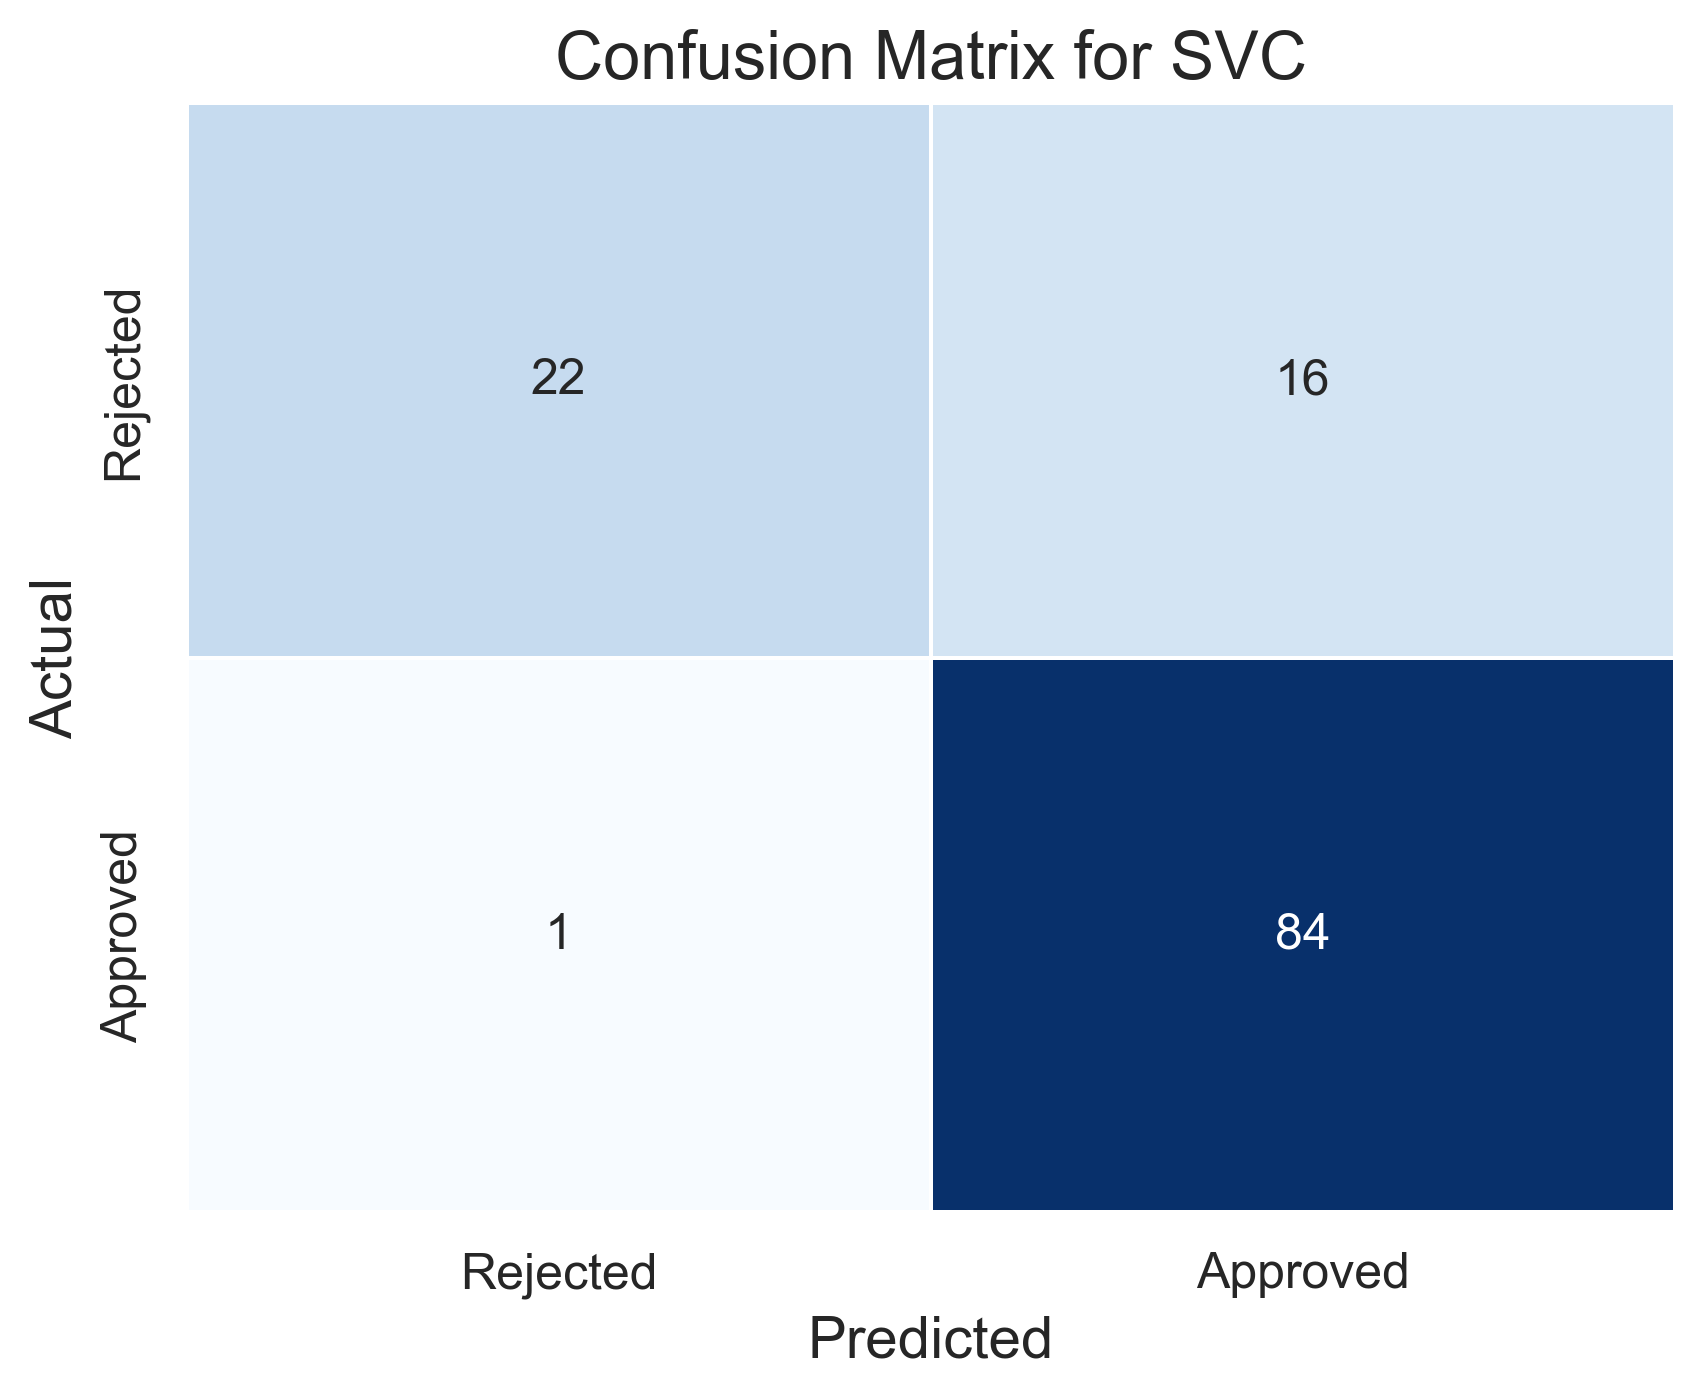

In [91]:
## confusion matrix for SVC
confusion__matrix_svc = confusion_matrix(y_test,pipeline_svc.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for SVC', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()


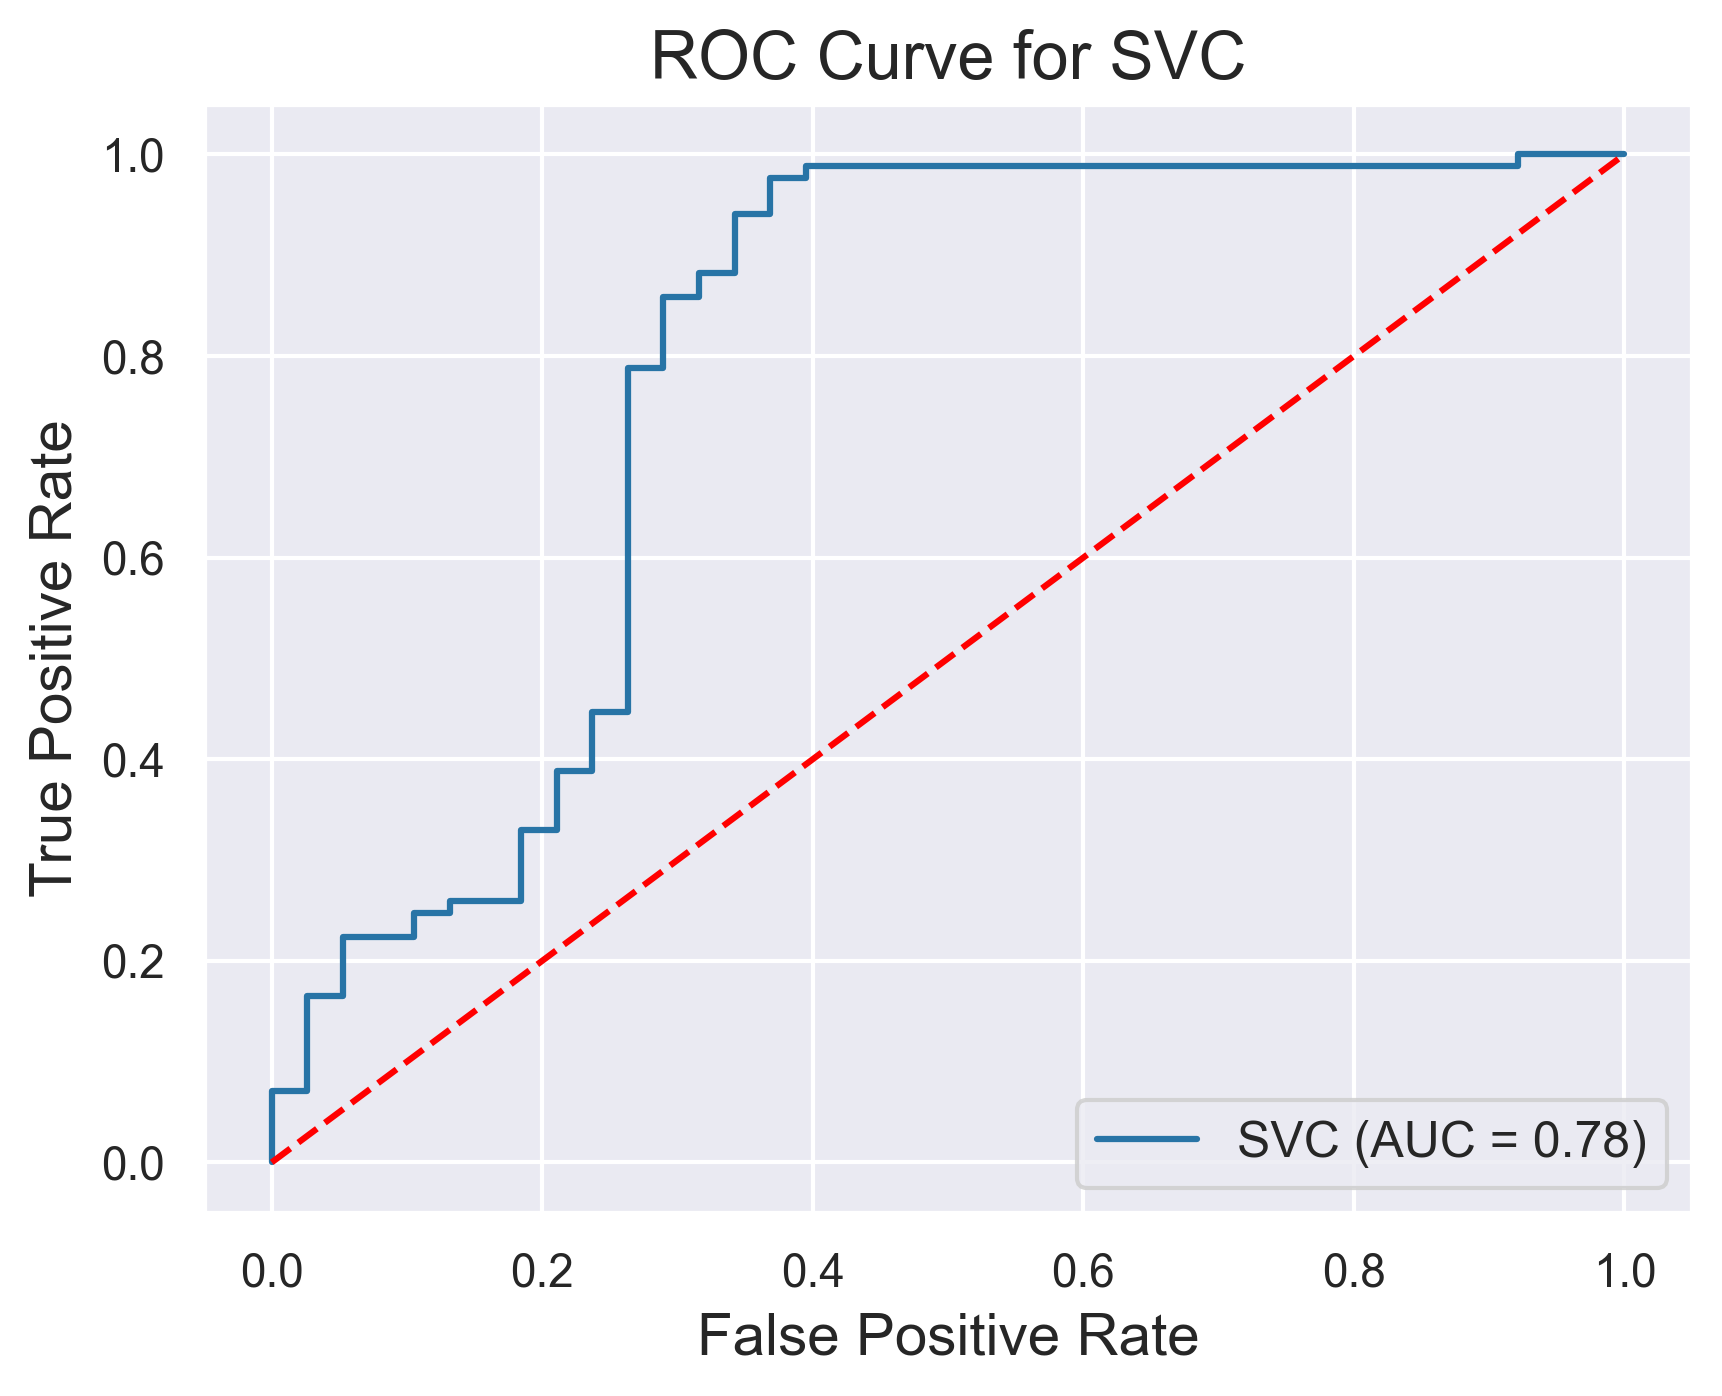

In [92]:
## roc curve for svc
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, pipeline_svc.predict_proba(X_test)[:, 1])
plt.plot(fpr_svc, tpr_svc, color='#2874a6', label='SVC (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_svc.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for SVC', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

##### **STACKED MODEL 2 PIPELINE**

In [93]:
## stacked model 2  with SVC as Base model
## defining the base models
estimator = [ 
    ('rf',RandomForestClassifier(random_state=42)),
    ('xgb',XGBClassifier(objective="binary:logistic",eval_metric="logloss",random_state=42)), 
    ('svc',SVC(probability=True, random_state=42,kernel='linear', C=1.0, gamma='scale'))
  
]
## defining the meta model
meta_model = LogisticRegression(random_state=42)
## defining the stacking classifier
stacking_model_2 = StackingClassifier(
    estimators=estimator, 
    final_estimator=meta_model, 
    cv=5, 
    n_jobs=-1
)
## defining the pipeline  
numerical_transformers = StandardScaler()
## categorical transformers  
categorical_transformers = OneHotEncoder(handle_unknown="ignore")
## combining the transformers 
preprocessor = ColumnTransformer( 
    transformers=[ 
        ("num",numerical_transformers,numerical_features), 
        ("cat",categorical_transformers,categorical_features)

    ]
)

## crreating a full pipeline with thee model  
pipeline_stacked_model_2 = ImbPipeline(  
    steps= [  
        ("preprocessor",preprocessor), 
        ("smote",SMOTE(random_state=42)), 
        ("classifier",stacking_model_2)
    ]
    
)
## fit the model on the X_train and y_train  
pipeline_stacked_model_2.fit(X_train , y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Education',
                                                   'Property_Area',
                                                   'ApplicantIncome_Category',
                                                   'LoanAmount_bin',
                                                   'Dependents'])])),
                ('sm...
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('svc',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=42))],
                                    final_estimator=LogisticRegression(random_state=42),
                                    n_jobs=-1))])

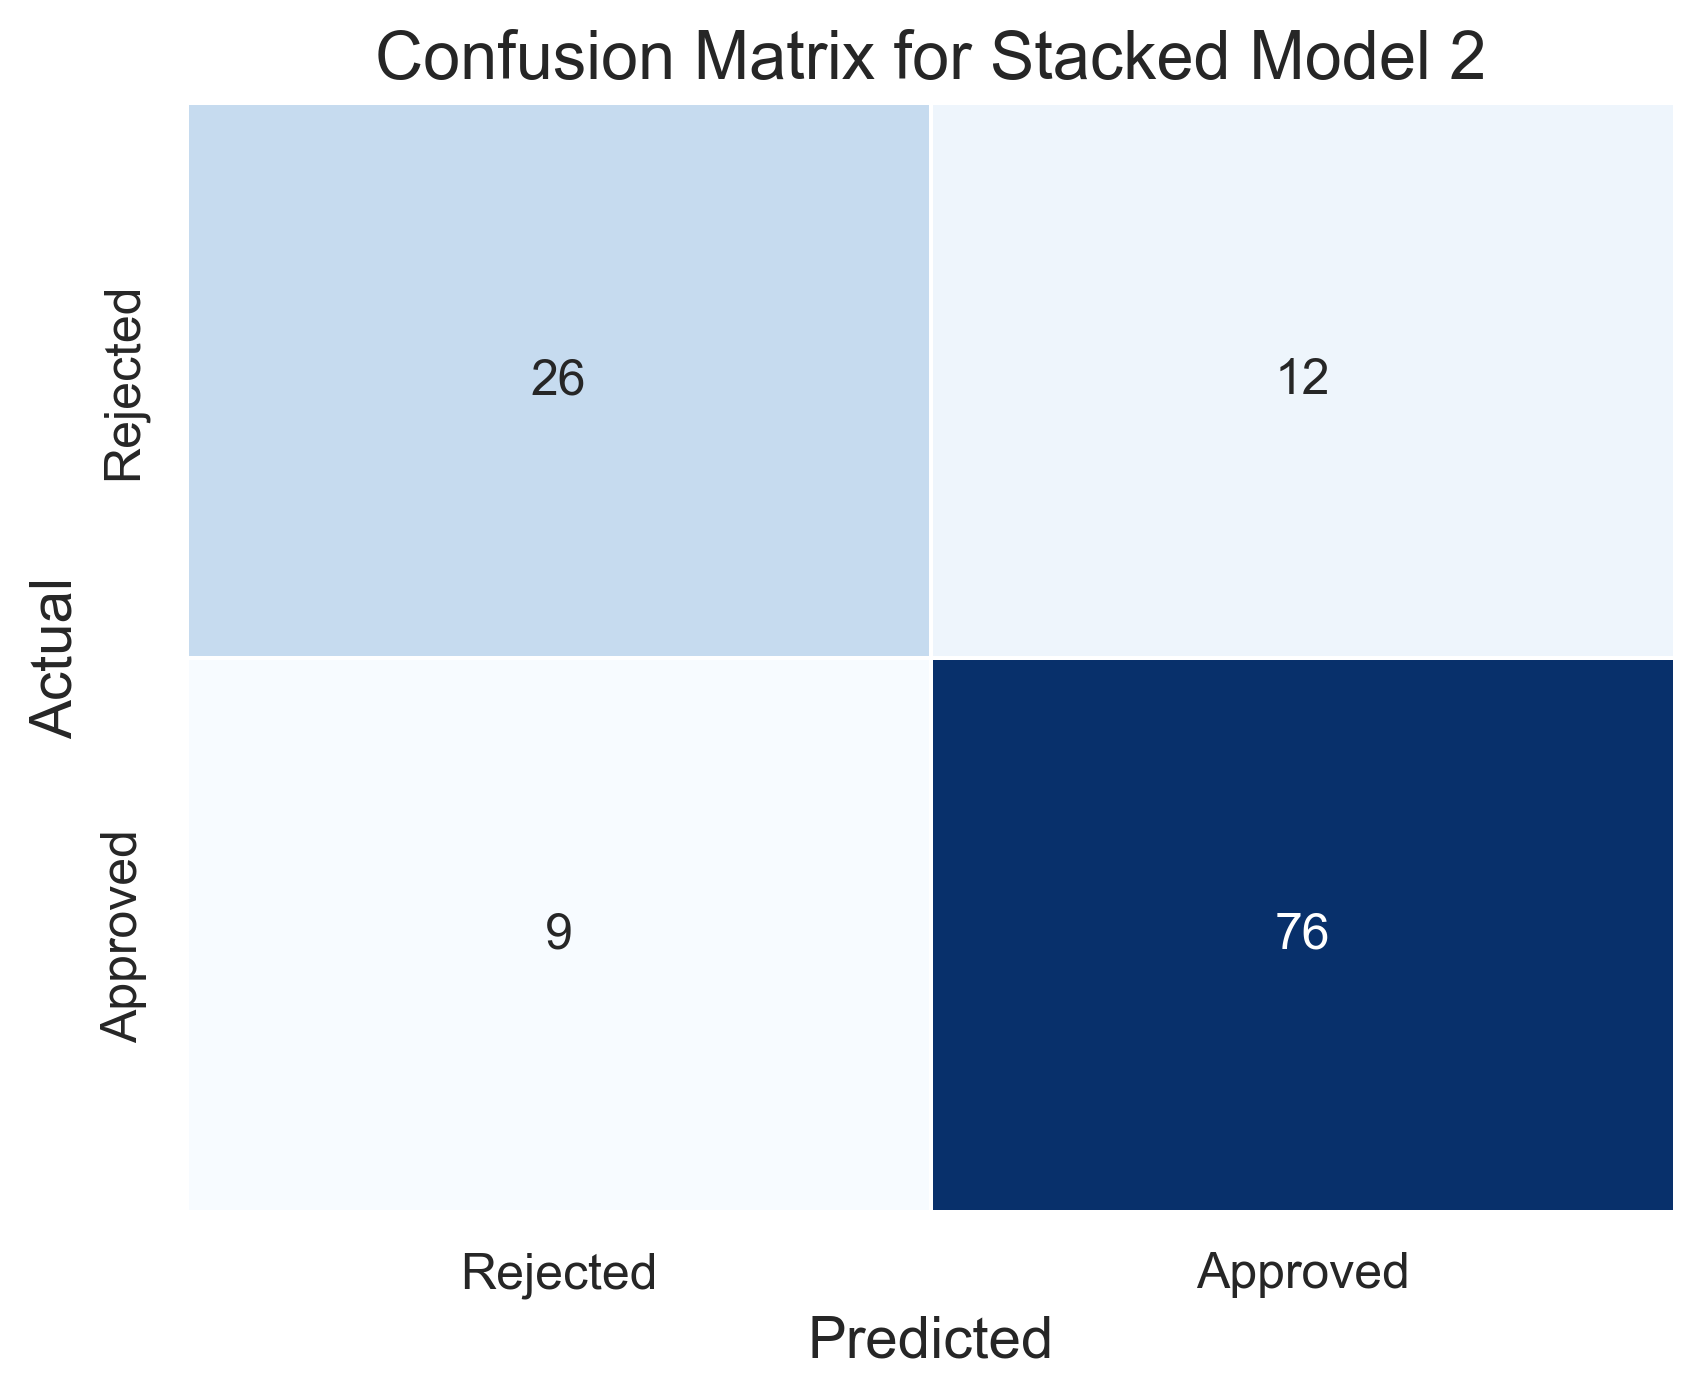

In [94]:
## confusion matrix for stacked model 2
confusion__matrix_stacked_model_2 = confusion_matrix(y_test,pipeline_stacked_model_2.predict(X_test))
## plotting the confusion matrix
sns.heatmap(confusion__matrix_stacked_model_2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix for Stacked Model 2', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Rejected', 'Approved'], fontsize=12)
plt.show()

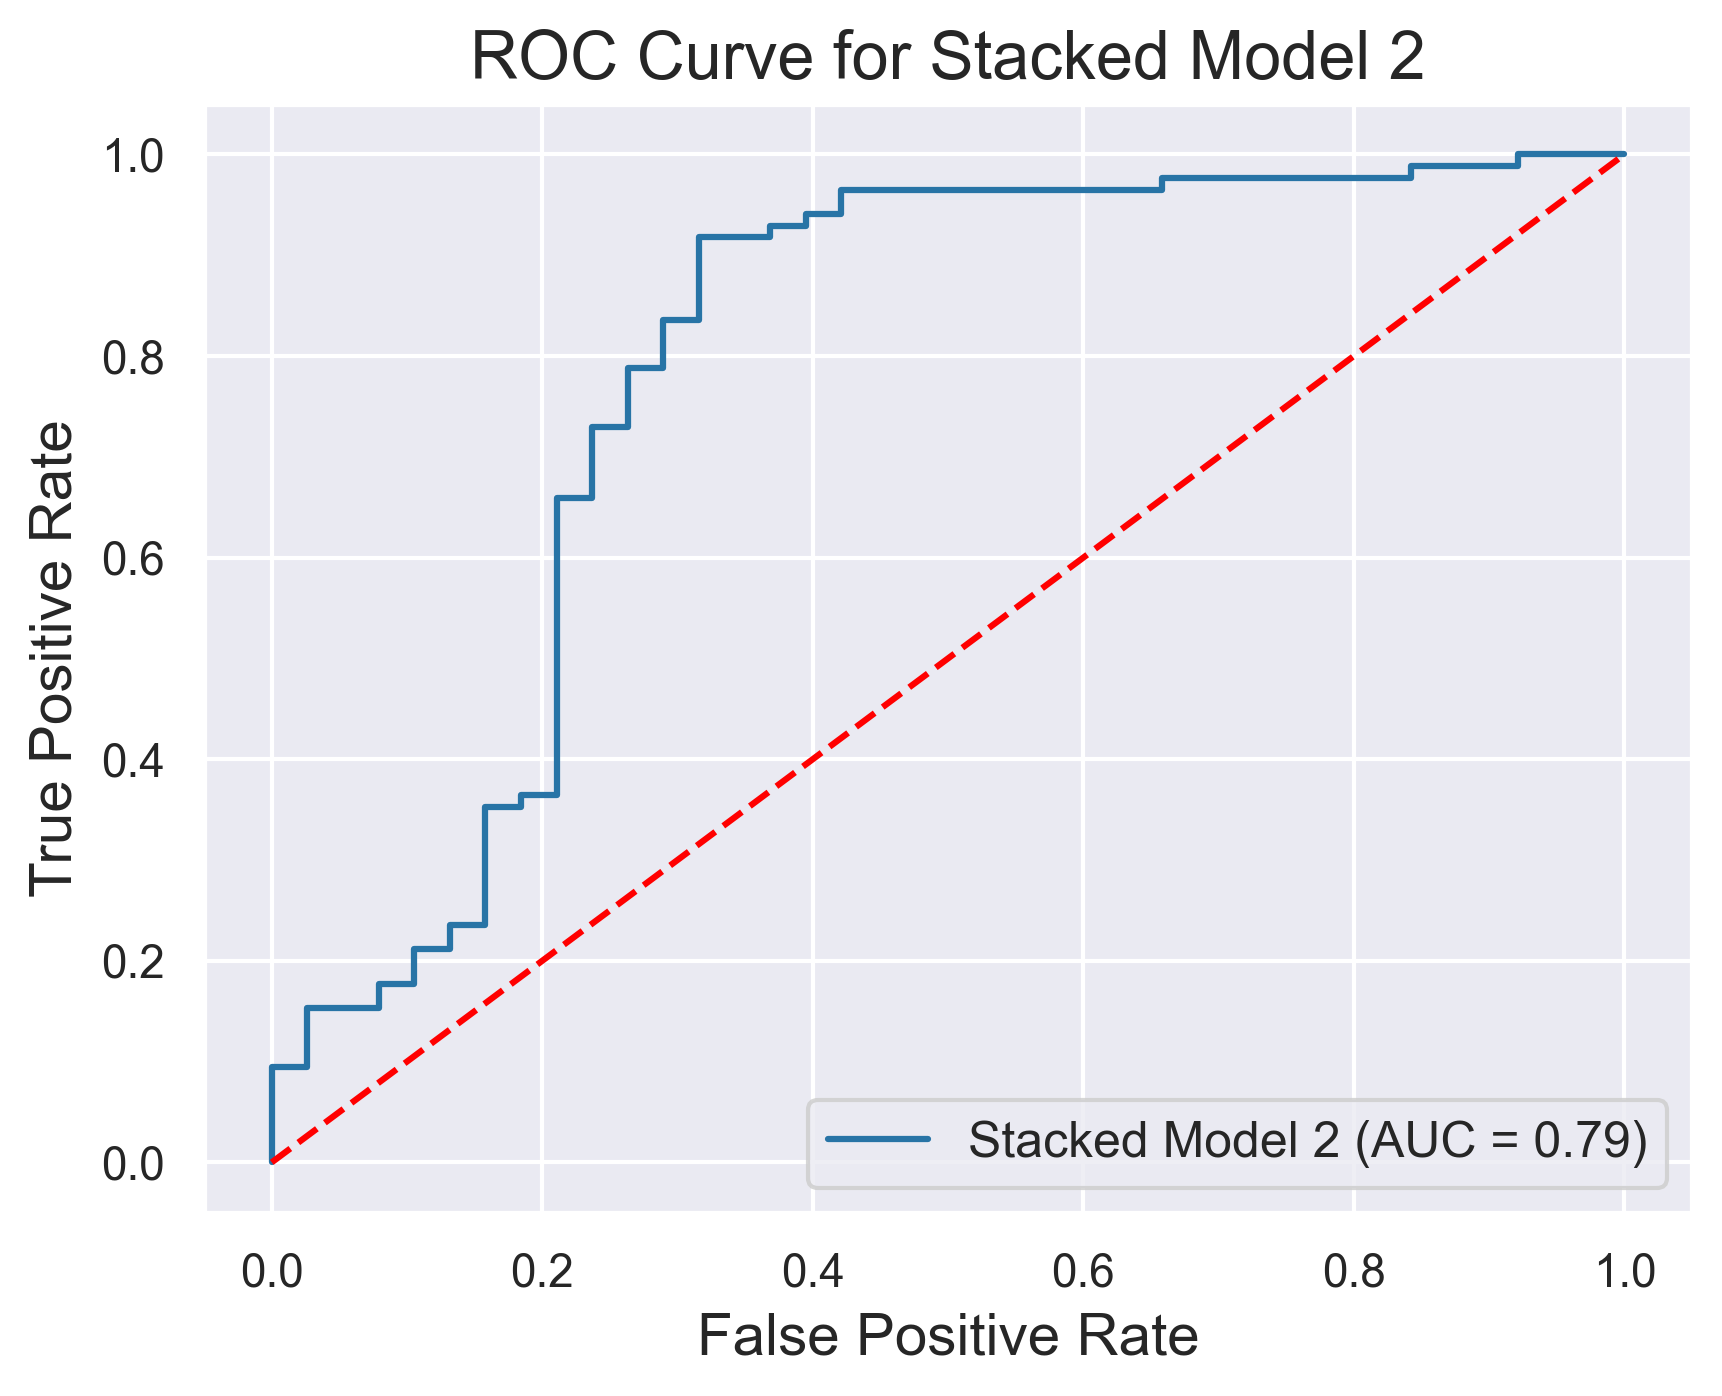

In [95]:
## roc curve for stacked model 2
fpr_stacked_model_2, tpr_stacked_model_2, thresholds_stacked_model_2 = roc_curve(y_test, pipeline_stacked_model_2.predict_proba(X_test)[:, 1])
plt.plot(fpr_stacked_model_2, tpr_stacked_model_2, color='#2874a6', label='Stacked Model 2 (AUC = {:.2f})'.format(roc_auc_score(y_test, pipeline_stacked_model_2.predict(X_test))))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Stacked Model 2', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

#### **MODEL COMPARSION**

In [96]:

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Using Lazy Predict for model comparison
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_resampled, X_test_preprocessed, y_train_resampled, y_test)



  0%|          | 0/32 [00:00<?, ?it/s]

In [97]:
## Filter models by index and sort by 'F1 Score'
filtered_models = models.loc[['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 
							  'LGBMClassifier',  'DecisionTreeClassifier', 'SVC','RidgeClassifierCV','AdaBoostClassifier']]
sorted_models = filtered_models.sort_values(by='F1 Score', ascending=True)
sorted_models.head(10)

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
SVC                       0.7398             0.6808   0.6808    0.7356   
DecisionTreeClassifier    0.7398             0.7026   0.7026    0.7416   
LogisticRegression        0.7886             0.7598   0.7598    0.7901   
AdaBoostClassifier        0.7886             0.7598   0.7598    0.7901   
LGBMClassifier            0.7967             0.7511   0.7511    0.7943   
RandomForestClassifier    0.8130             0.7701   0.7701    0.8108   
RidgeClassifierCV         0.8130             0.7774   0.7774    0.8123   
XGBClassifier             0.8211             0.7833   0.7833    0.8198   

                        Time Taken  
Model                               
SVC                         0.1218  
DecisionTreeClassifier      0.0372  
LogisticRegression          0.0968  
AdaBoostClassifier          0.3476  
LGBMClassifier              0.1810  
RandomForestClassifier      0.5451  
RidgeClassifierCV           0.0478  
XGBClassifier               0.1952

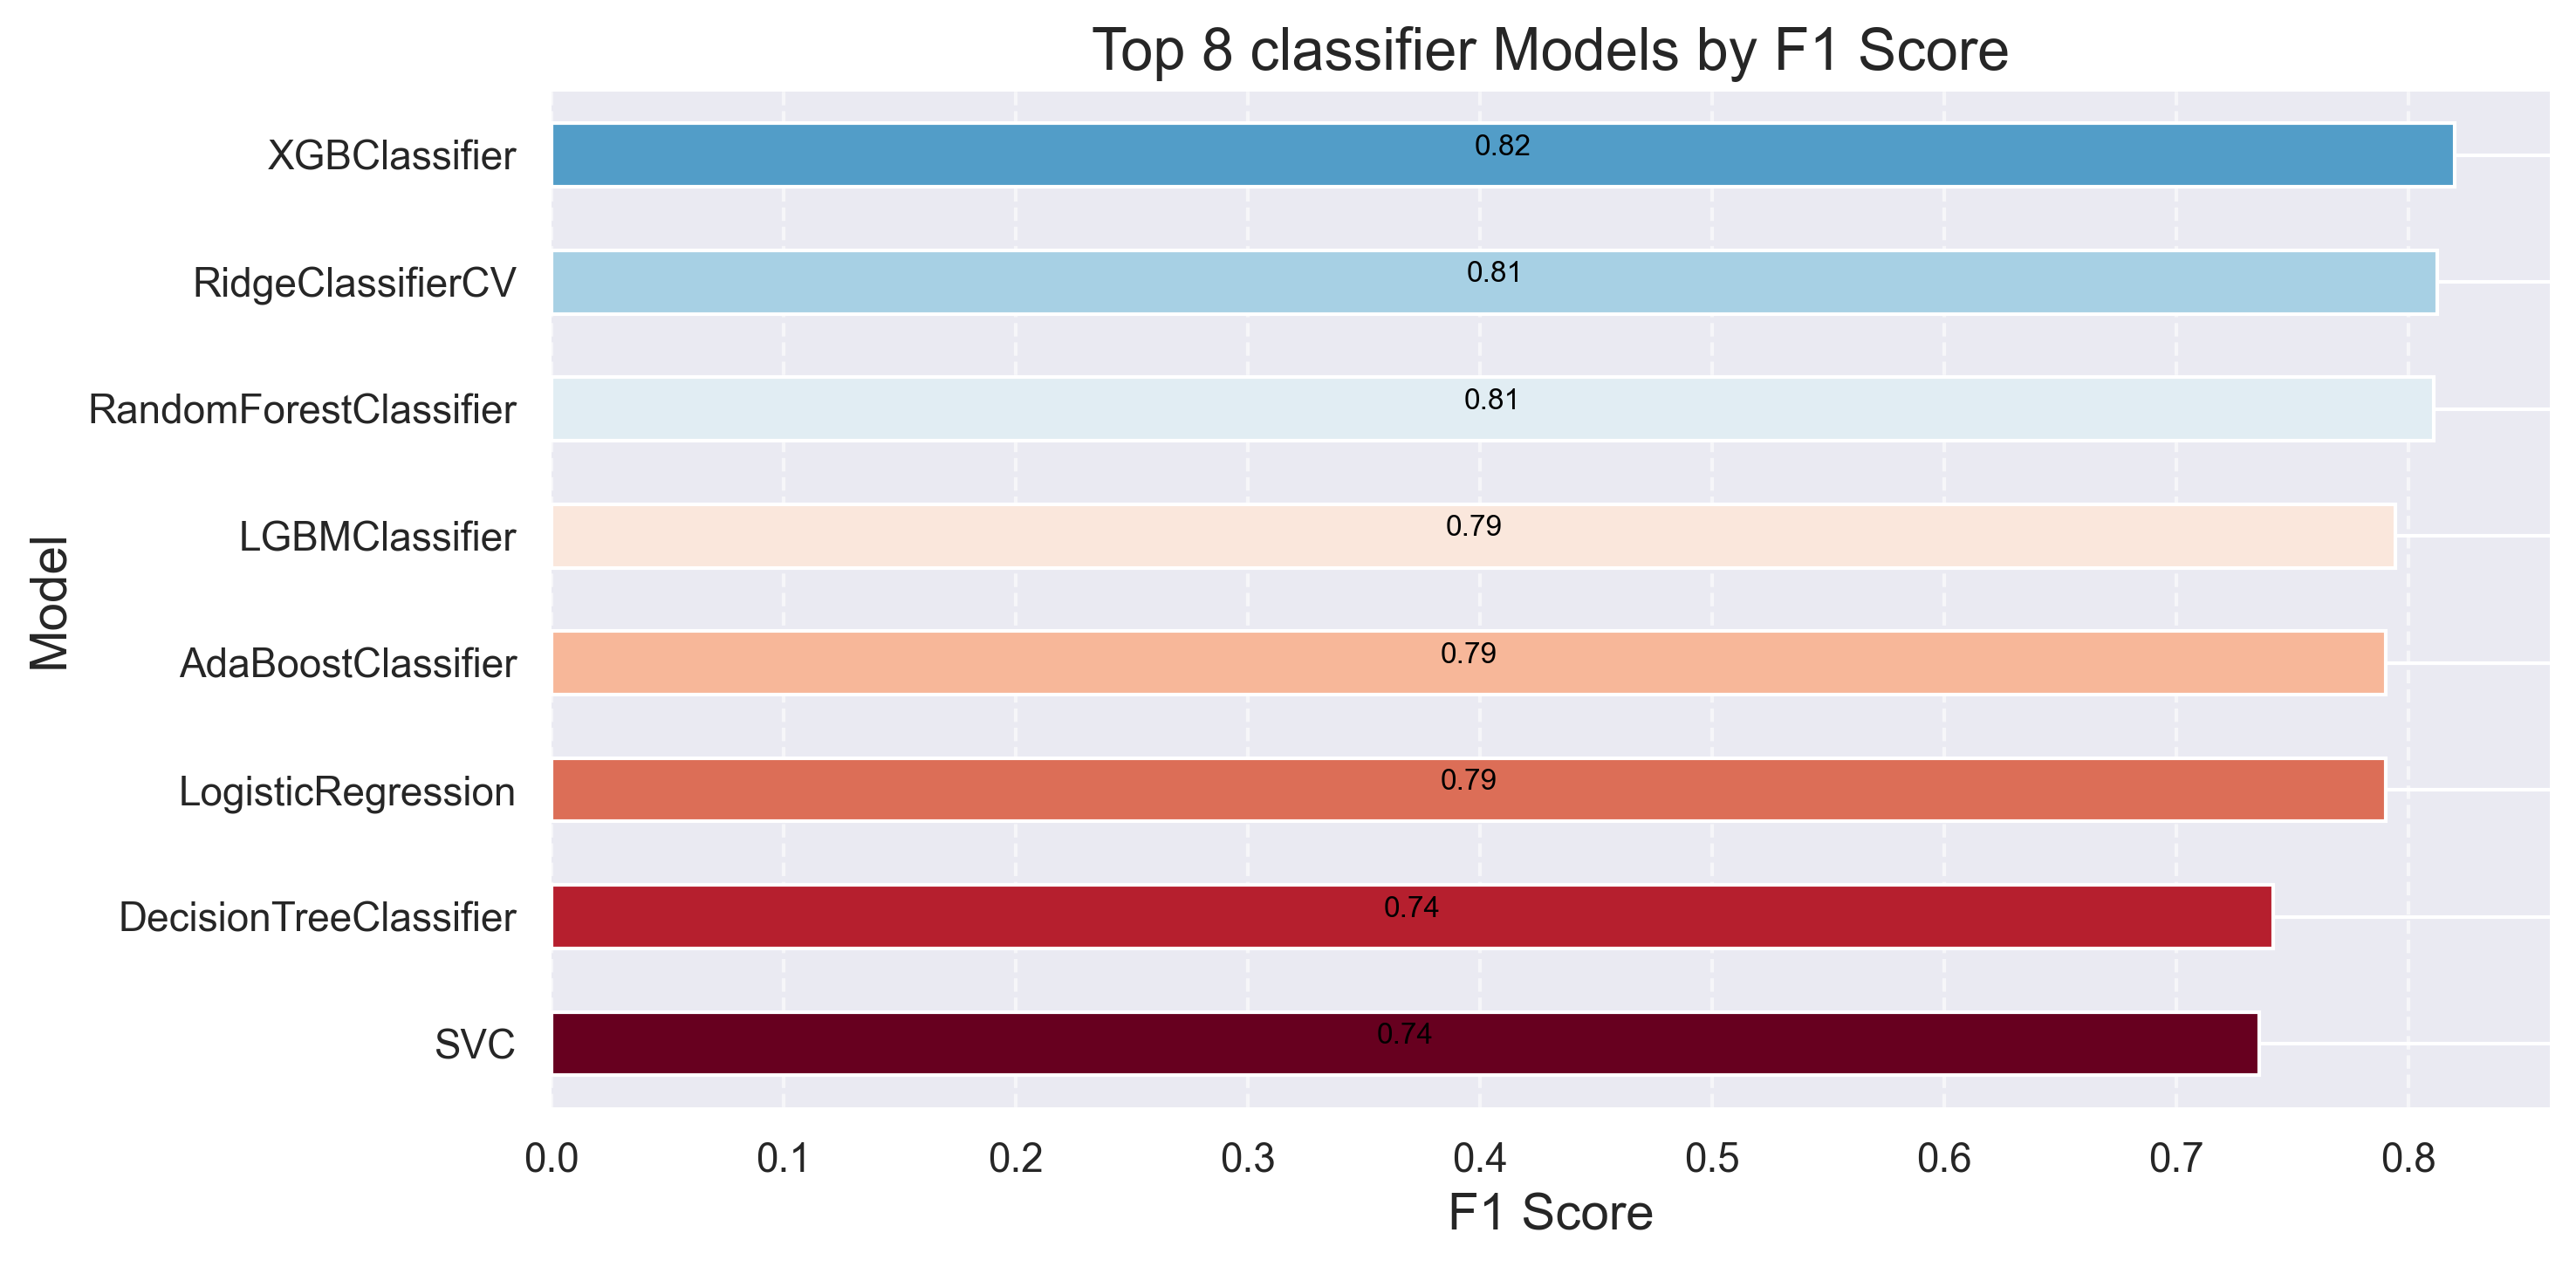

In [98]:
## plotting a bar plot of the top 10 models in descending order of their F1 score
plt.figure(figsize=(10, 5))
ax = sorted_models['F1 Score'].head(8).plot(kind='barh', color=plt.cm.RdBu(np.linspace(0, 1, 10)))
plt.title('Top 8 classifier Models by F1 Score', fontsize=16)
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
for spine in ["top","right","bottom","left"]:
    plt.gca().spines[spine].set_visible(False)
for patch in ax.patches:
    plt.text(
        patch.get_x() + patch.get_width() / 2,  
        patch.get_y() + patch.get_height() / 2, 
        f'{patch.get_width():.2f}',  
        ha='center',  
        fontsize=8,
        color='black'  

    )
plt.show()



#### **SECTION E** : **MODEL DEPLOYMENT**

In [100]:
## laoding  the model  
with open('pipeline.pkl','wb') as file: 
    pickle.dump(pipeline,file)